Grupo 13:
  - Rodrigo Andres Marquez Brizuela
  - José Ignacio Dagrava
--------------------------------------


Comenzamos importando las librerías necesarias para ejecutar el código. Posteriormente se cargará el dataframe en crudo al cual se le aplicarán las transformaciones necesarias en el proceso de ETL.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.simplefilter(action='ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rmarquez93/data_masterbdds2022/main/crimedata.csv', encoding = 'latin-1', na_values = ["?"])

Para entender el dataframe, comenzamos obteniendo los principales datos sobre forma, contenido, faltantes y duplicados.

In [ ]:
print(df.shape)

(2215, 147)


Definimos una función que divida por la regla de Sturges los buckets de datos continuos.

In [ ]:
def freq_table(column):
  #Regla Sturges para dividir en buckets los datos contínuos
  # print(1+3.22*np.log10(len(df_full)))
  freq = pd.cut(column, round(1+3.22*np.log10(len(df))), duplicates = "drop")
  freq.sort_values(inplace=True)
  plt.figure(figsize=(20, 10))
  histo  = freq.value_counts(sort = False).plot( kind = 'bar', ylabel = 'frequency')
  plt.xticks(rotation = 45)
  return print(freq.value_counts(sort= False)) , histo

In [ ]:

duplicated_rows = df.duplicated()
print("Cantidad de filas duplicadas: {} ".format(len(duplicated_rows[duplicated_rows == True])))

for i in df:
  print("\nCantidad de nulos: {0} \nPorcentaje sobre el total de observaciones: {1}".format(
      df[i].isna().sum(),
      round((df[i].isna().sum() / len(df))*100,2)
  ), "\n","*"*90, "\n\n")


Cantidad de filas duplicadas: 0 

Cantidad de nulos: 0 
Porcentaje sobre el total de observaciones: 0.0 
 ****************************************************************************************** 



Cantidad de nulos: 0 
Porcentaje sobre el total de observaciones: 0.0 
 ****************************************************************************************** 



Cantidad de nulos: 1221 
Porcentaje sobre el total de observaciones: 55.12 
 ****************************************************************************************** 



Cantidad de nulos: 1224 
Porcentaje sobre el total de observaciones: 55.26 
 ****************************************************************************************** 



Cantidad de nulos: 0 
Porcentaje sobre el total de observaciones: 0.0 
 ****************************************************************************************** 



Cantidad de nulos: 0 
Porcentaje sobre el total de observaciones: 0.0 
 *************************************************

Como se nota del output anterior, hay variables que poseen un alto porcentaje de valores nulos. Para dichos casos, se procederá a eliminar la variable completamente.

In [ ]:
#Elimino aquellas variables que contienen un alto porcentaje de valores nulos.

df.drop(labels = ["countyCode","communityCode","LemasSwornFT",
                  "LemasSwFTPerPop","LemasSwFTFieldOps","LemasSwFTFieldPerPop",
                  "LemasTotalReq","LemasTotReqPerPop","PolicReqPerOffic","PolicPerPop","RacialMatchCommPol",
                  "PctPolicWhite","PctPolicBlack","PctPolicHisp","PctPolicAsian","PctPolicMinor","OfficAssgnDrugUnits",
                  "NumKindsDrugsSeiz","PolicAveOTWorked","PolicCars","PolicOperBudg","LemasPctPolicOnPatr",
                  "LemasGangUnitDeploy","PolicBudgPerPop"], axis = 1, inplace = True )

df.dropna(inplace = True)

df.head()





Êcommunityname state  fold  population  householdsize  \
0  BerkeleyHeightstownship    NJ     1       11980           3.10   
1           Marpletownship    PA     1       23123           2.82   
2               Tigardcity    OR     1       29344           2.43   
5          Springfieldcity    MO     1      140494           2.45   
6              Norwoodtown    MA     1       28700           2.60   

   racepctblack  racePctWhite  racePctAsian  racePctHisp  agePct12t21  \
0          1.37         91.78          6.50         1.88        12.47   
1          0.80         95.57          3.44         0.85        11.01   
2          0.74         94.33          3.43         2.35        11.36   
5          2.51         95.65          0.90         0.95        18.09   
6          1.60         96.57          1.47         1.10        11.17   

   agePct12t29  agePct16t24  agePct65up  numbUrban  pctUrban  medIncome  \
0        21.44        10.93       11.33      11980     100.0      75122   
1        21.30        10.48       17.18      23123     100.0      47917   
2        25.88        11.01       10.28      29344     100.0      35669   
5        32.89        20.04       13.26     140494     100.0      21577   
6        27.41        12.76       14.42      28700     100.0      42805   

   pctWWage  pctWFarmSelf  pctWInvInc  pctWSocSec  pctWPubAsst  pctWRetire  \
0     89.24          1.55       70.20       23.62         1.03       18.39   
1     78.99          1.11       64.11       35.50         2.75       22.85   
2     82.00          1.15       55.73       22.25         2.94       14.56   
5     75.78          1.00       41.15       29.31         7.12       14.09   
6     79.47          0.39       47.70       30.23         5.41       17.23   

   medFamInc  perCapInc  whitePerCap  blackPerCap  indianPerCap  AsianPerCap  \
0      79584      29711        30233        13600          5725        27101   
1      55323      20148        20191        18137             0        20074   
2      42112      16946        17103        16644         21606        15528   
5      27705      11878        12029         7382         10264        10753   
6      50394      18193        18276        17342         21482        12639   

   OtherPerCap  HispPerCap  NumUnderPov  PctPopUnderPov  PctLess9thGrade  \
0       5115.0       22838          227            1.96             5.81   
1       5250.0       12222          885            3.98             5.61   
2       5954.0        8405         1389            4.75             2.80   
5       7192.0        8104        23223           17.78             8.76   
6      21852.0       22594         1126            4.01             4.49   

   PctNotHSGrad  PctBSorMore  PctUnemployed  PctEmploy  PctEmplManu  \
0          9.90        48.18           2.70      64.55        14.65   
1         13.72        29.89           2.43      61.96        12.26   
2          9.09        30.13           4.01      69.80        15.95   
5         23.03        20.66           5.72      59.02        14.31   
6         13.89        27.01           4.85      65.42        14.02   

   PctEmplProfServ  PctOccupManu  PctOccupMgmtProf  MalePctDivorce  \
0            28.82          5.49             50.73            3.67   
1            29.28          6.39             37.64            4.23   
2            21.52          8.79             32.48           10.10   
5            26.83         14.72             23.42           11.40   
6            27.17          8.50             32.78            5.97   

   MalePctNevMarr  FemalePctDiv  TotalPctDiv  PersPerFam  PctFam2Par  \
0           26.38          5.22         4.47        3.22       91.43   
1           27.99          6.45         5.42        3.11       86.91   
2           25.78         14.76        12.55        2.95       78.54   
5           33.32         14.46        13.04        2.89       71.94   
6           36.05          9.06         7.64        3.14       79.53   

   PctKids2Par  Pct

Una vez limpiado de valores nulos y duplicados el dataframe, procedemos a generar una iteración que devuelve un histograma, un boxplot y los estadísticos mas importantes de cada variable que se mantiene en el dataframe una vez efectuada la limpieza de nulos.

Columna: Êcommunityname

 ****************************************************************************************** 


Columna: state

 ****************************************************************************************** 


Columna: fold

Histograma:
(0.991, 1.75]    193
(1.75, 2.5]      186
(2.5, 3.25]      193
(3.25, 4.0]      187
(4.0, 4.75]        0
(4.75, 5.5]      195
(5.5, 6.25]      186
(6.25, 7.0]      186
(7.0, 7.75]        0
(7.75, 8.5]      185
(8.5, 9.25]      191
(9.25, 10.0]     199
Name: fold, dtype: int64


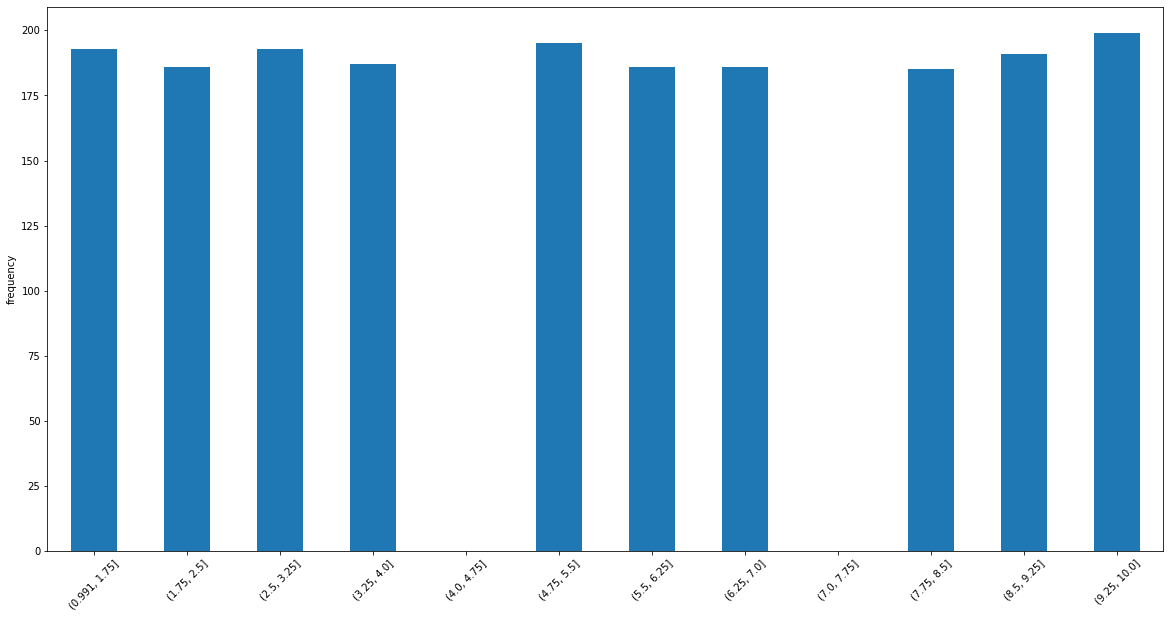


Boxplot:


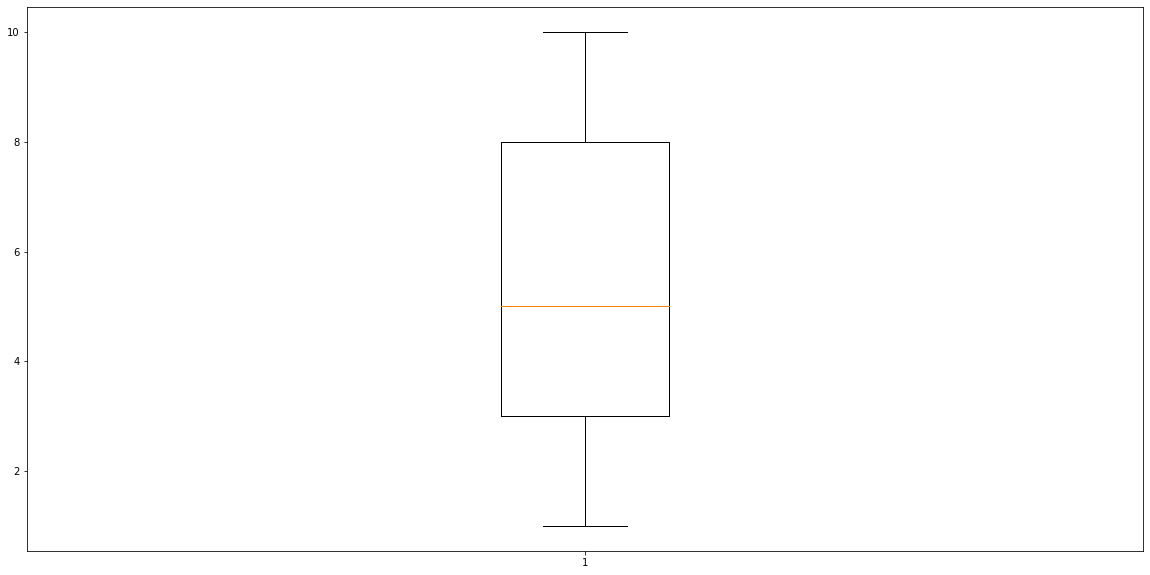


Principales estadísticos: 
count    1901.000000
mean        5.509732
std         2.888550
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: fold, dtype: float64

Asimetría: 0.0036898732018157427
Curtosis: -1.2302366523622652

 ****************************************************************************************** 


Columna: population

Histograma:
(2692.441, 619384.917]        1887
(619384.917, 1228764.833]       11
(1228764.833, 1838144.75]        1
(1838144.75, 2447524.667]        0
(2447524.667, 3056904.583]       0
(3056904.583, 3666284.5]         1
(3666284.5, 4275664.417]         0
(4275664.417, 4885044.333]       0
(4885044.333, 5494424.25]        0
(5494424.25, 6103804.167]        0
(6103804.167, 6713184.083]       0
(6713184.083, 7322564.0]         1
Name: population, dtype: int64


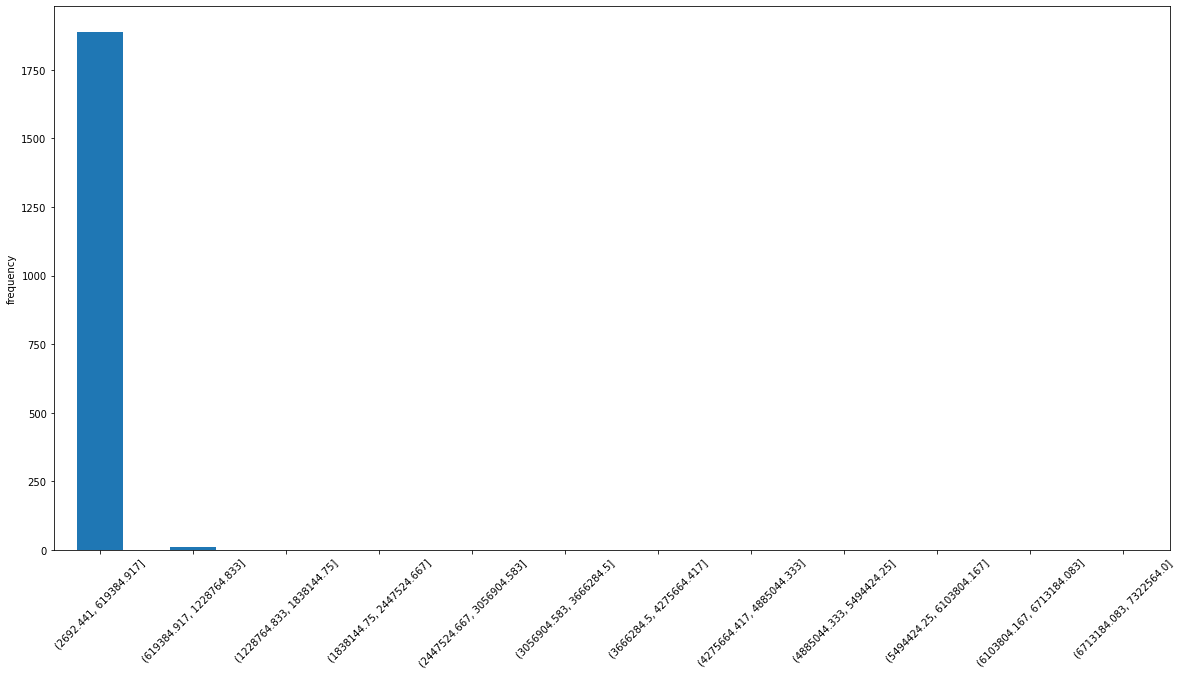


Boxplot:


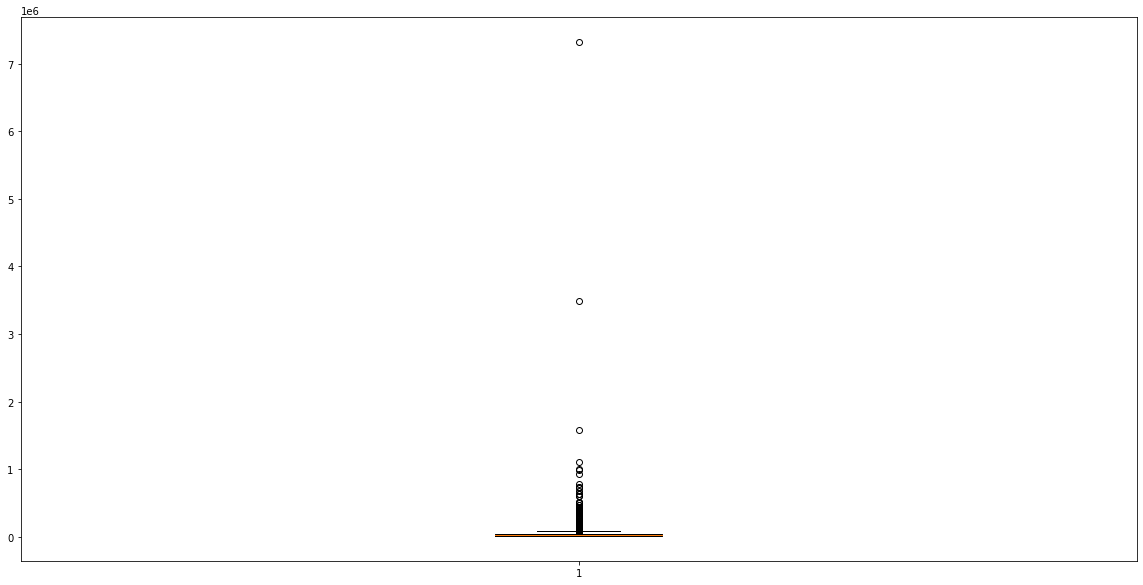


Principales estadísticos: 
count    1.901000e+03
mean     5.249963e+04
std      2.061177e+05
min      1.000500e+04
25%      1.431200e+04
50%      2.268600e+04
75%      4.326400e+04
max      7.322564e+06
Name: population, dtype: float64

Asimetría: 26.205430704485437
Curtosis: 857.9917298085722

 ****************************************************************************************** 


Columna: householdsize

Histograma:
(1.596, 1.907]      5
(1.907, 2.213]     49
(2.213, 2.52]     505
(2.52, 2.827]     809
(2.827, 3.133]    372
(3.133, 3.44]      91
(3.44, 3.747]      34
(3.747, 4.053]     18
(4.053, 4.36]      12
(4.36, 4.667]       4
(4.667, 4.973]      1
(4.973, 5.28]       1
Name: householdsize, dtype: int64


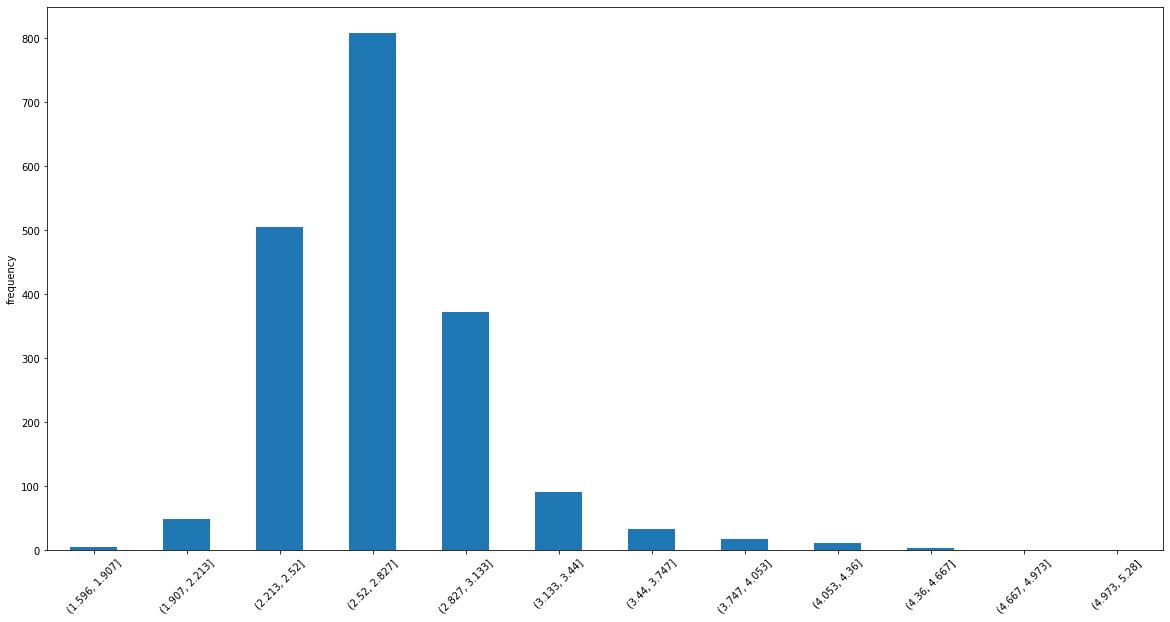


Boxplot:


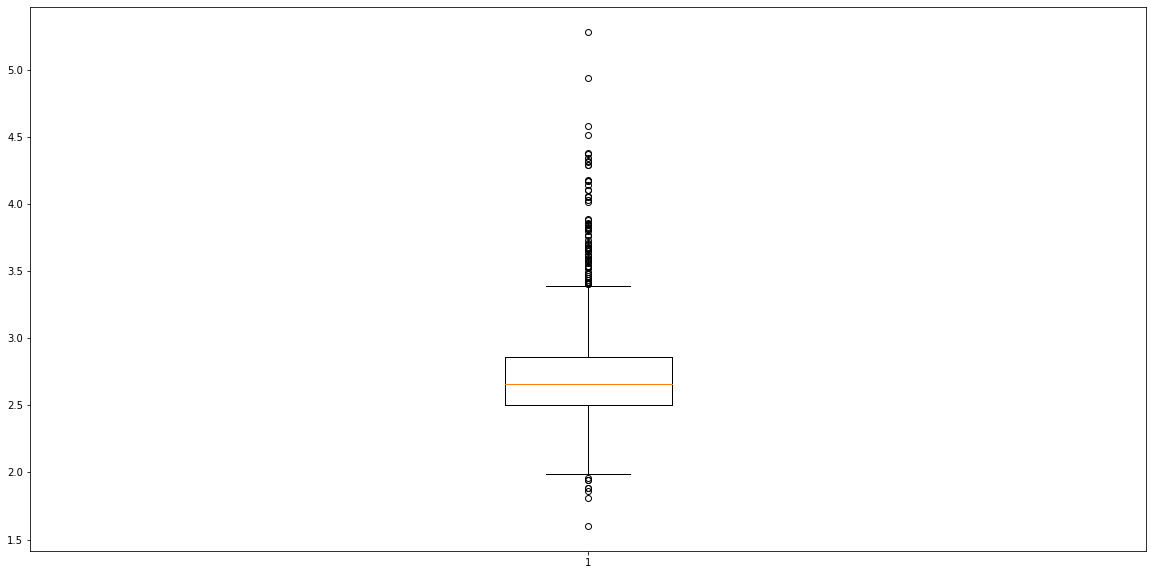


Principales estadísticos: 
count    1901.000000
mean        2.712167
std         0.347454
min         1.600000
25%         2.500000
50%         2.660000
75%         2.860000
max         5.280000
Name: householdsize, dtype: float64

Asimetría: 1.6740979482599407
Curtosis: 6.0192178715431535

 ****************************************************************************************** 


Columna: racepctblack

Histograma:
(-0.0967, 8.056]    1316
(8.056, 16.112]      213
(16.112, 24.168]     127
(24.168, 32.223]      87
(32.223, 40.279]      54
(40.279, 48.335]      46
(48.335, 56.391]      29
(56.391, 64.447]      13
(64.447, 72.503]      11
(72.503, 80.558]       1
(80.558, 88.614]       1
(88.614, 96.67]        3
Name: racepctblack, dtype: int64


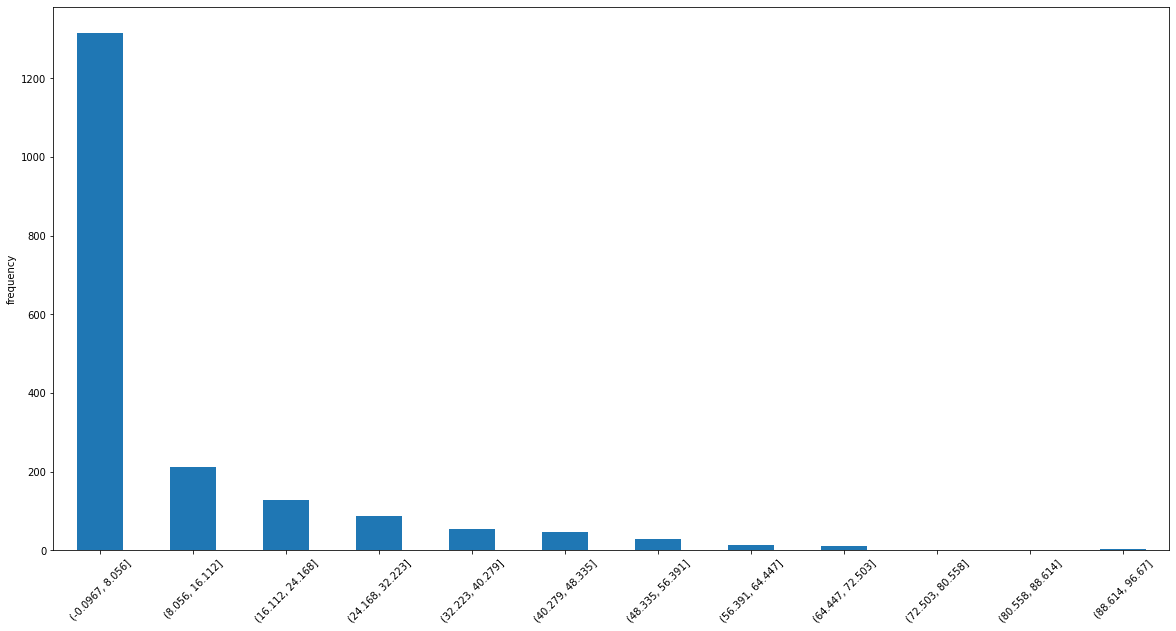


Boxplot:


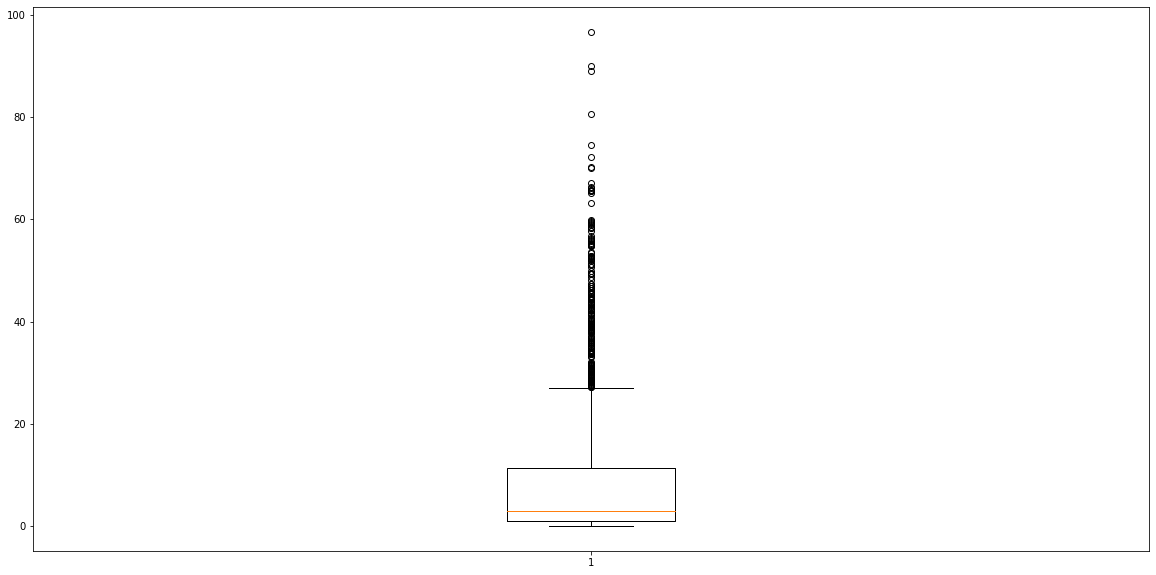


Principales estadísticos: 
count    1901.000000
mean        9.358958
std        13.935927
min         0.000000
25%         0.930000
50%         3.040000
75%        11.430000
max        96.670000
Name: racepctblack, dtype: float64

Asimetría: 2.268875445260219
Curtosis: 5.505827809942026

 ****************************************************************************************** 


Columna: racePctWhite

Histograma:
(2.583, 10.759]       4
(10.759, 18.838]      2
(18.838, 26.917]      9
(26.917, 34.997]     15
(34.997, 43.076]     35
(43.076, 51.155]     38
(51.155, 59.234]     87
(59.234, 67.313]    112
(67.313, 75.392]    166
(75.392, 83.472]    240
(83.472, 91.551]    357
(91.551, 99.63]     836
Name: racePctWhite, dtype: int64


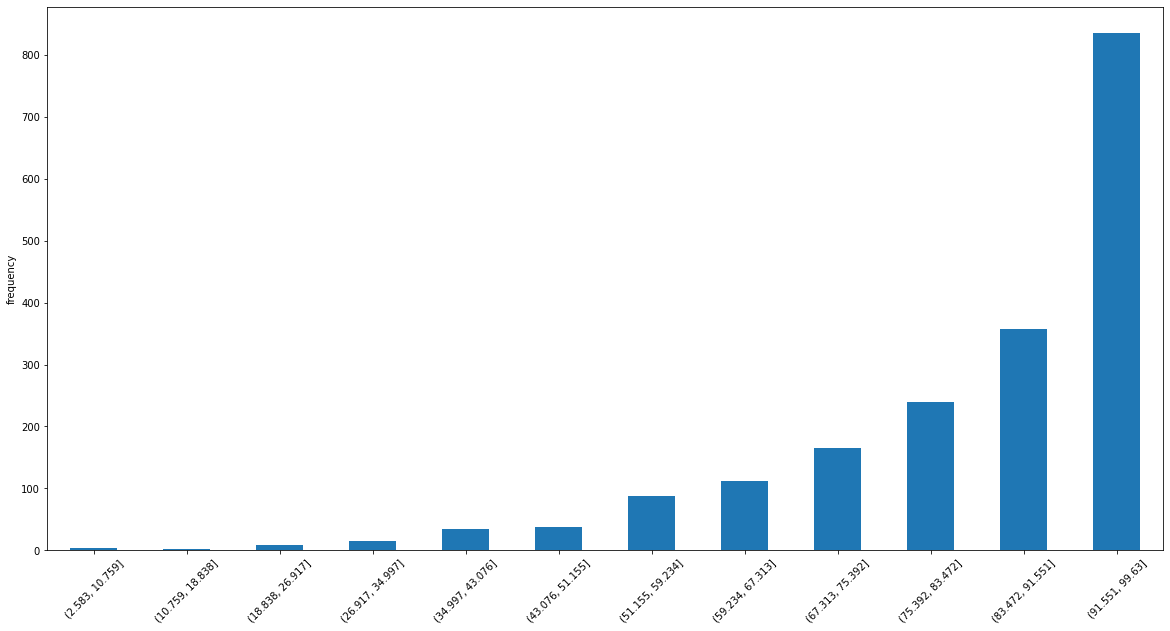


Boxplot:


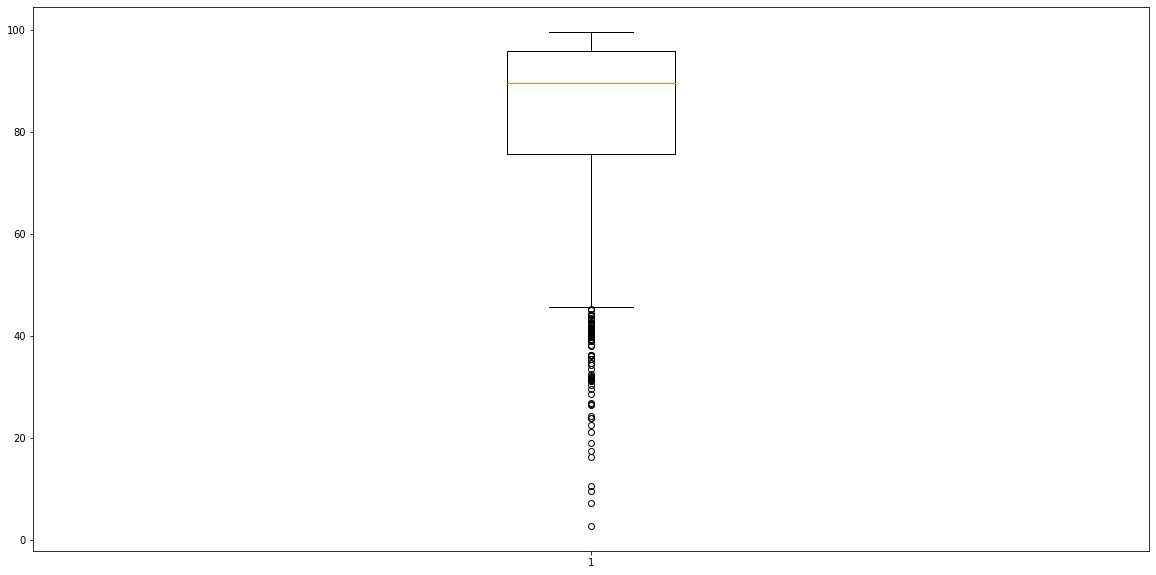


Principales estadísticos: 
count    1901.000000
mean       83.466423
std        16.357057
min         2.680000
25%        75.770000
50%        89.610000
75%        95.960000
max        99.630000
Name: racePctWhite, dtype: float64

Asimetría: -1.4896704163501877
Curtosis: 2.116812940282063

 ****************************************************************************************** 


Columna: racePctAsian

Histograma:
(0.0026, 4.843]     1626
(4.843, 9.627]       167
(9.627, 14.41]        46
(14.41, 19.193]       23
(19.193, 23.977]      22
(23.977, 28.76]        3
(28.76, 33.543]        6
(33.543, 38.327]       4
(38.327, 43.11]        0
(43.11, 47.893]        3
(47.893, 52.677]       0
(52.677, 57.46]        1
Name: racePctAsian, dtype: int64


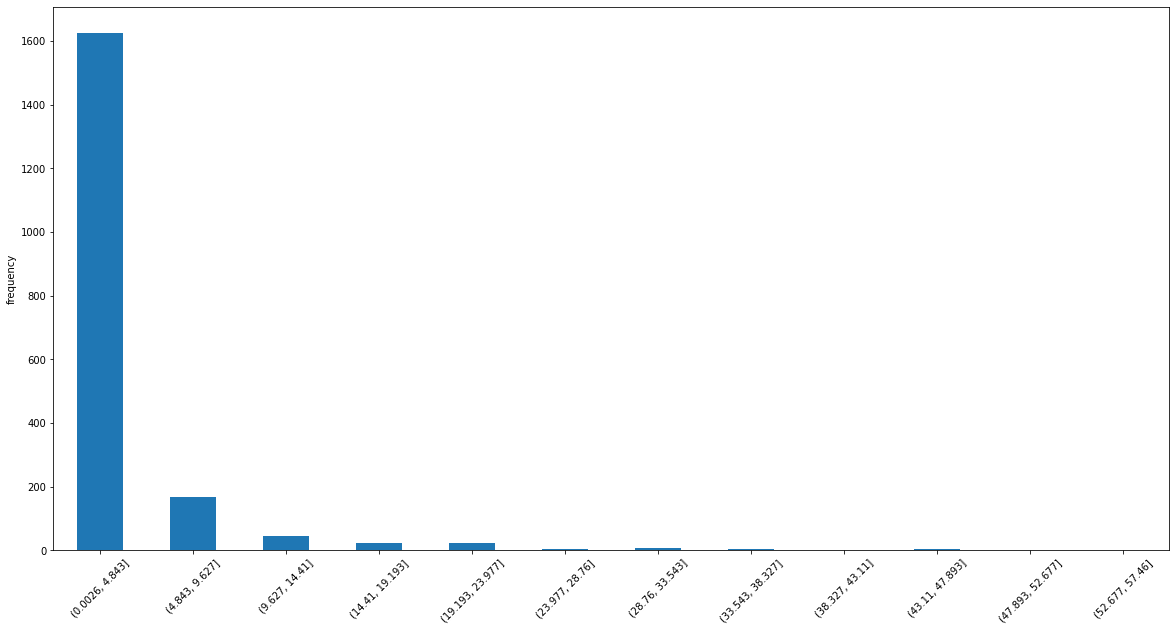


Boxplot:


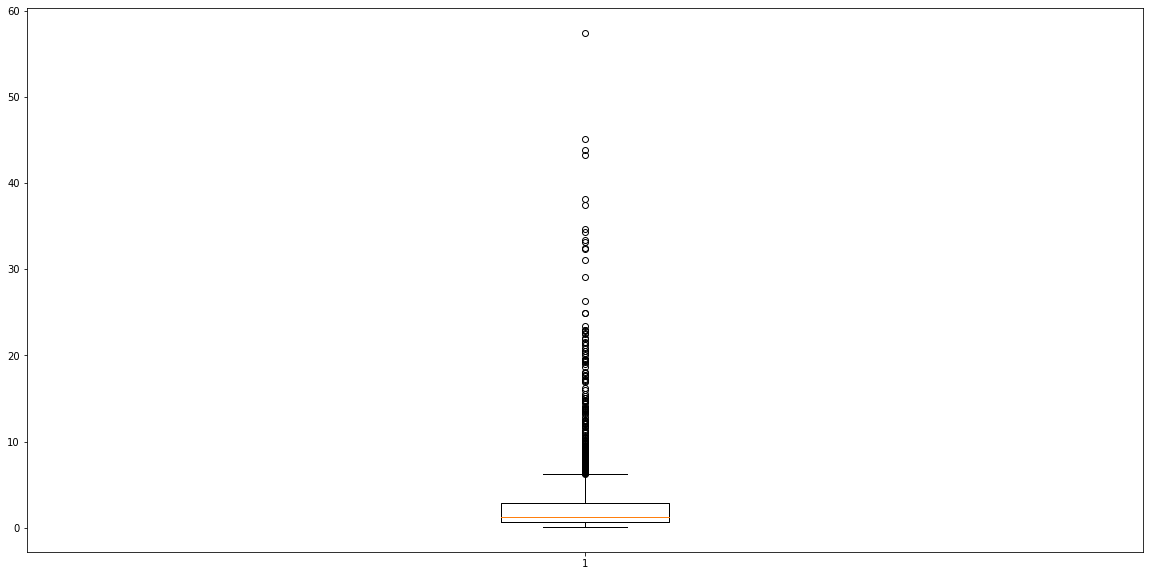


Principales estadísticos: 
count    1901.000000
mean        2.822799
std         4.738172
min         0.060000
25%         0.630000
50%         1.270000
75%         2.880000
max        57.460000
Name: racePctAsian, dtype: float64

Asimetría: 4.663648402366171
Curtosis: 30.127677236113563

 ****************************************************************************************** 


Columna: racePctHisp

Histograma:
(0.0248, 8.051]     1386
(8.051, 15.982]      229
(15.982, 23.912]      98
(23.912, 31.843]      52
(31.843, 39.774]      40
(39.774, 47.705]      18
(47.705, 55.636]      19
(55.636, 63.567]      15
(63.567, 71.498]      11
(71.498, 79.428]       9
(79.428, 87.359]       9
(87.359, 95.29]       15
Name: racePctHisp, dtype: int64


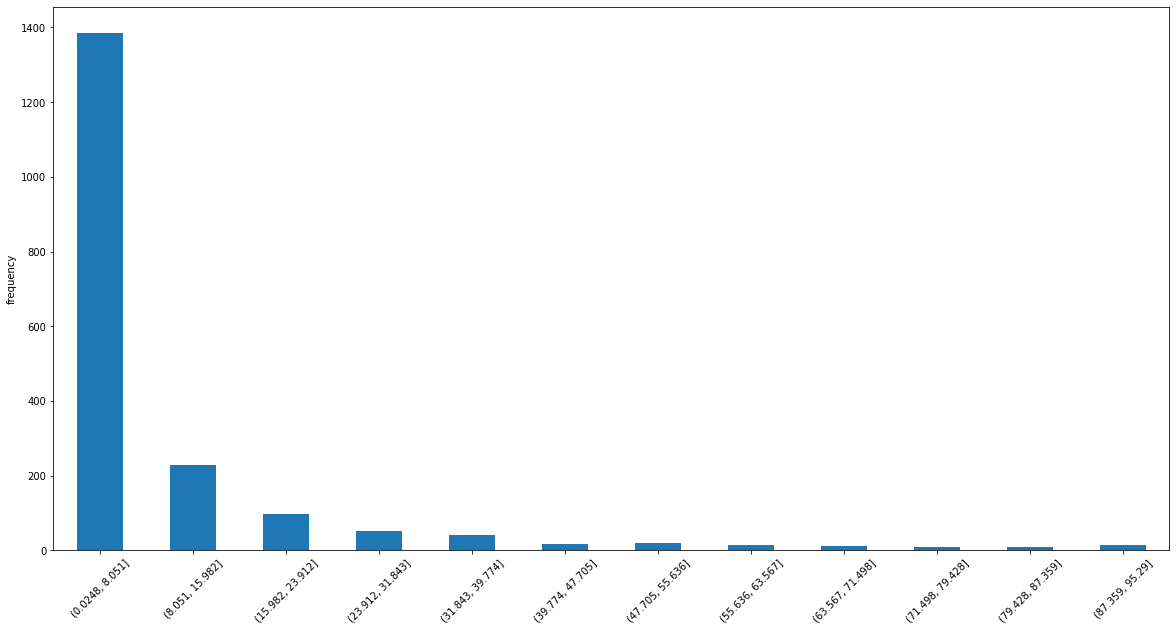


Boxplot:


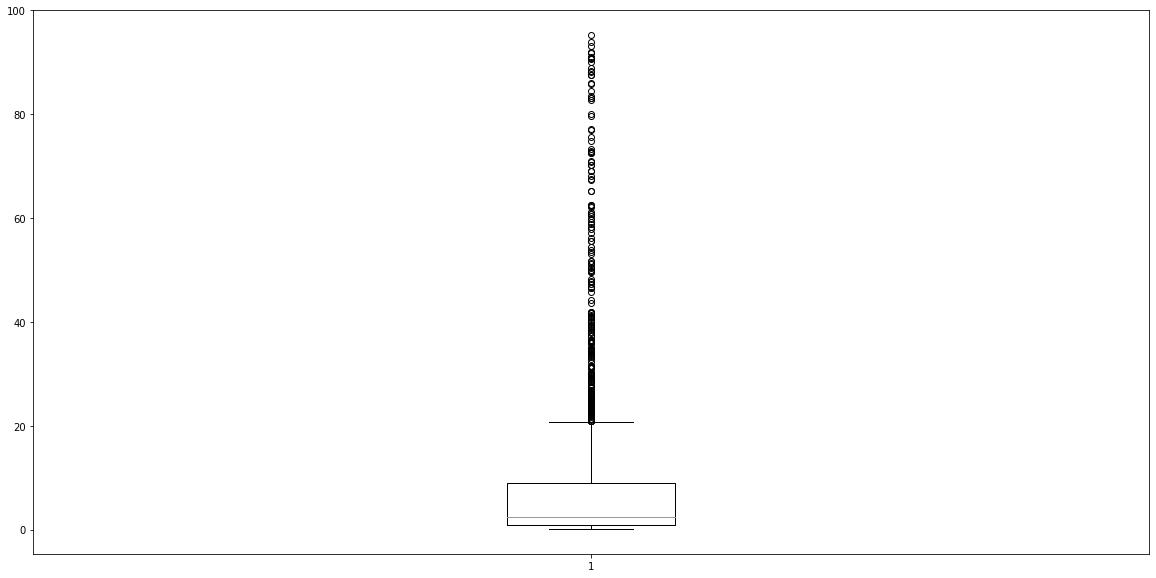


Principales estadísticos: 
count    1901.000000
mean        8.718985
std        15.449951
min         0.120000
25%         0.950000
50%         2.430000
75%         8.920000
max        95.290000
Name: racePctHisp, dtype: float64

Asimetría: 3.1496324369637207
Curtosis: 10.867894339934535

 ****************************************************************************************** 


Columna: agePct12t21

Histograma:
(4.53, 8.732]        37
(8.732, 12.883]     650
(12.883, 17.035]    950
(17.035, 21.187]    173
(21.187, 25.338]     38
(25.338, 29.49]      21
(29.49, 33.642]       8
(33.642, 37.793]     10
(37.793, 41.945]      6
(41.945, 46.097]      3
(46.097, 50.248]      3
(50.248, 54.4]        2
Name: agePct12t21, dtype: int64


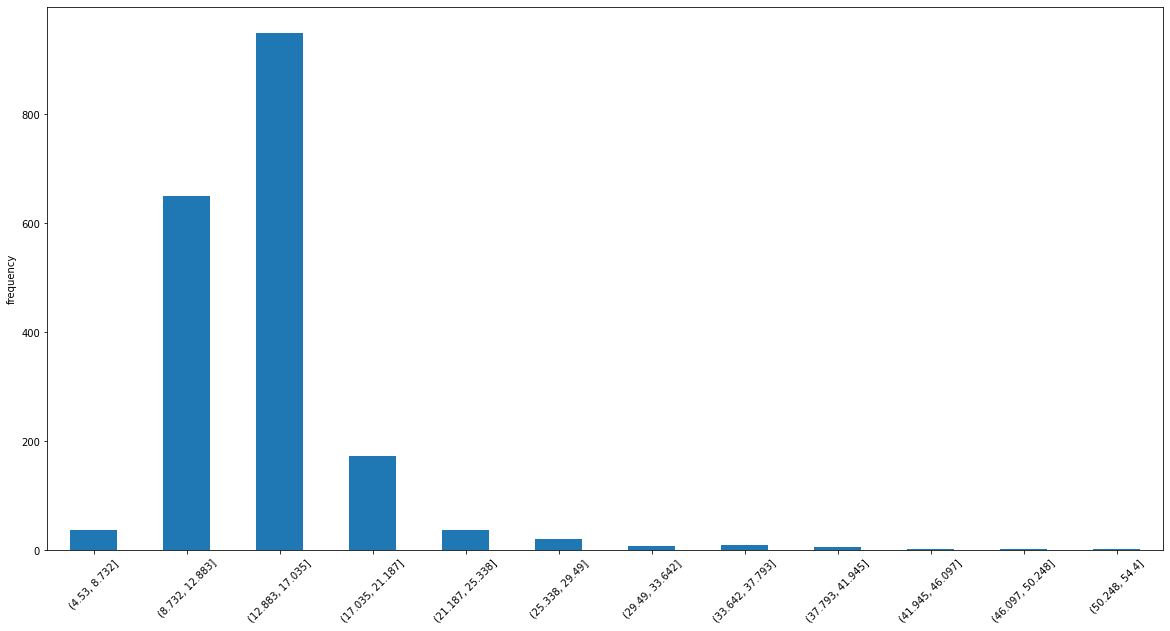


Boxplot:


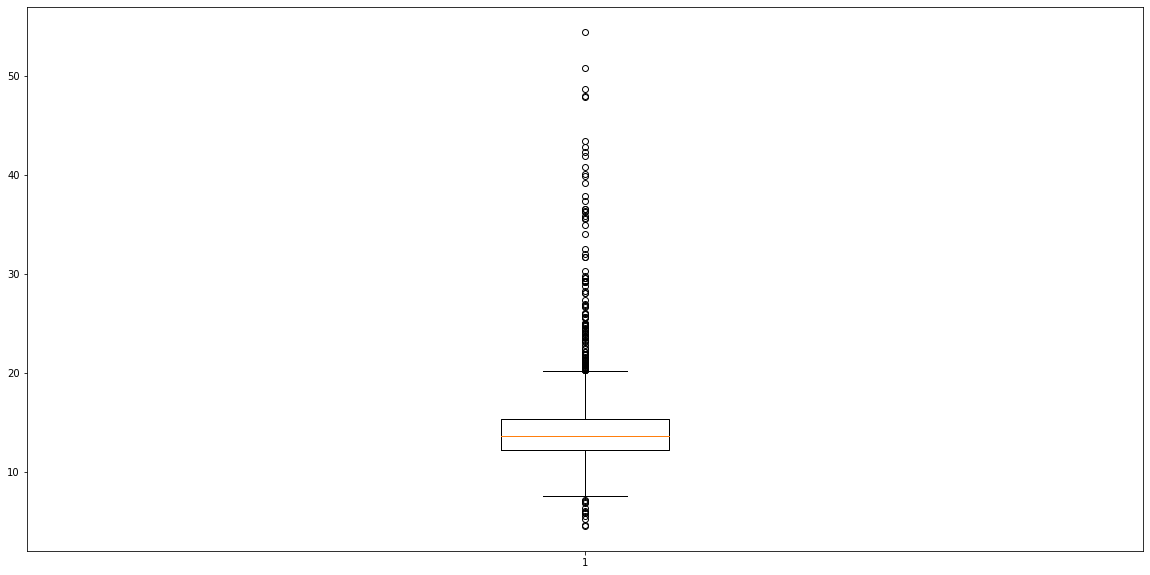


Principales estadísticos: 
count    1901.000000
mean       14.414119
std         4.493195
min         4.580000
25%        12.210000
50%        13.620000
75%        15.410000
max        54.400000
Name: agePct12t21, dtype: float64

Asimetría: 3.4157498507464745
Curtosis: 18.556341203151987

 ****************************************************************************************** 


Columna: agePct12t29

Histograma:
(9.319, 14.474]       6
(14.474, 19.568]     45
(19.568, 24.662]    482
(24.662, 29.757]    965
(29.757, 34.851]    263
(34.851, 39.945]     67
(39.945, 45.039]     24
(45.039, 50.133]     21
(50.133, 55.228]     12
(55.228, 60.322]      7
(60.322, 65.416]      4
(65.416, 70.51]       5
Name: agePct12t29, dtype: int64


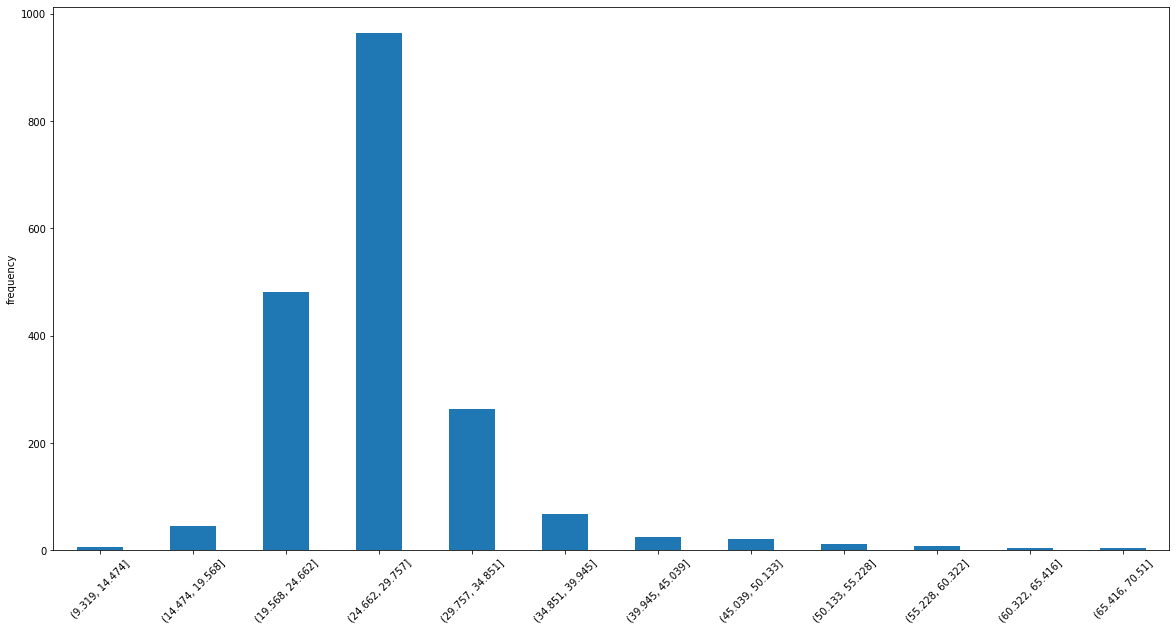


Boxplot:


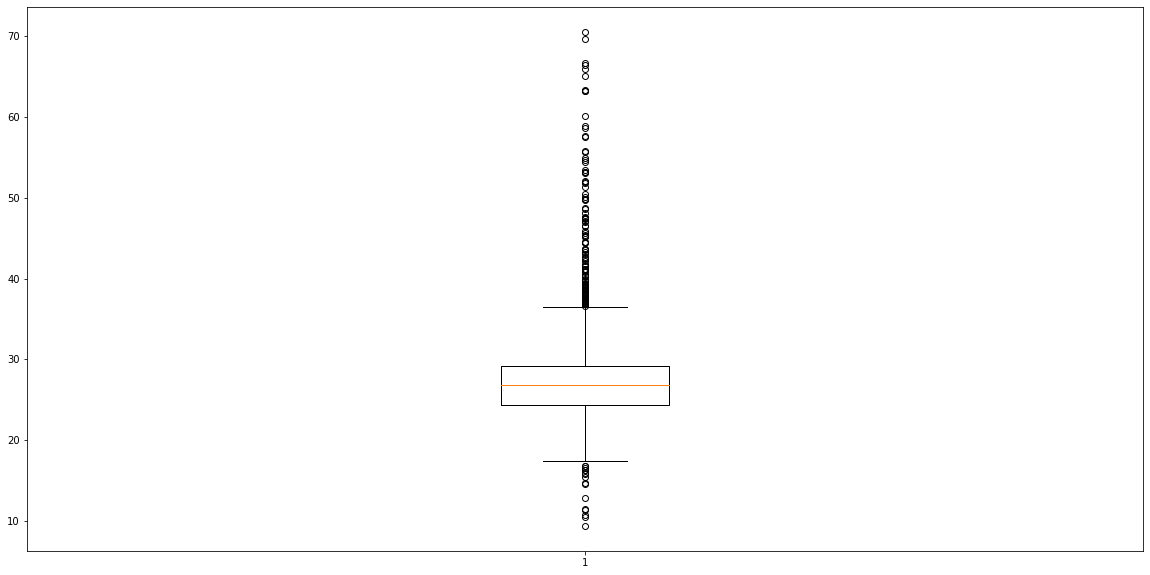


Principales estadísticos: 
count    1901.000000
mean       27.601094
std         6.153583
min         9.380000
25%        24.370000
50%        26.780000
75%        29.200000
max        70.510000
Name: agePct12t29, dtype: float64

Asimetría: 2.478678812915338
Curtosis: 10.80737239741901

 ****************************************************************************************** 


Columna: agePct16t24

Histograma:
(4.581, 9.555]      100
(9.555, 14.47]     1342
(14.47, 19.385]     305
(19.385, 24.3]       68
(24.3, 29.215]       25
(29.215, 34.13]      19
(34.13, 39.045]      17
(39.045, 43.96]       8
(43.96, 48.875]       5
(48.875, 53.79]       5
(53.79, 58.705]       4
(58.705, 63.62]       3
Name: agePct16t24, dtype: int64


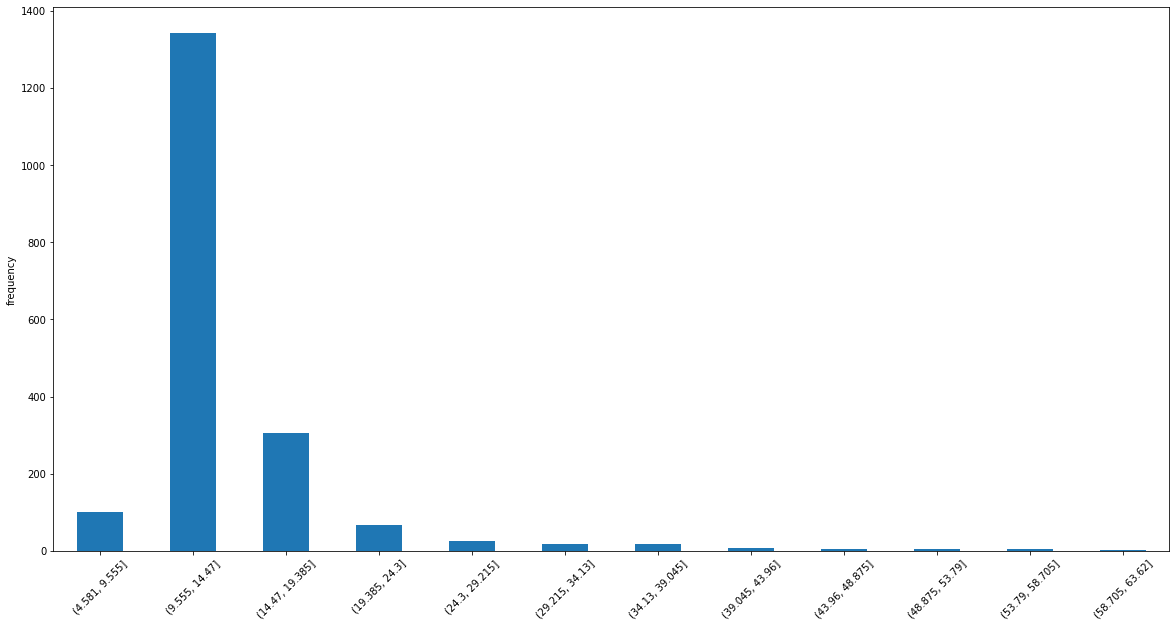


Boxplot:


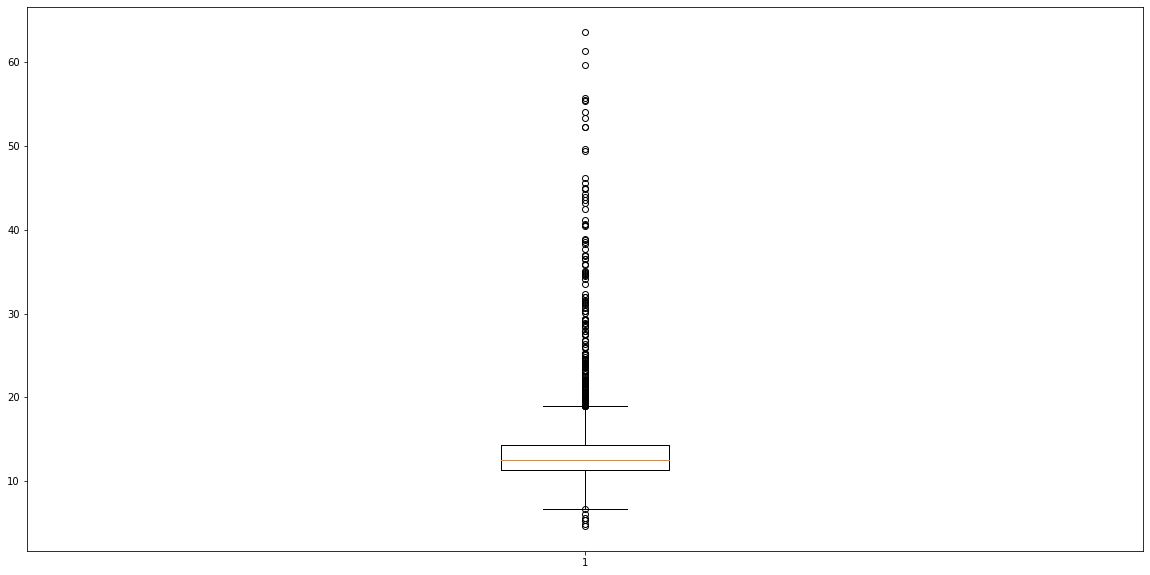


Principales estadísticos: 
count    1901.000000
mean       13.967933
std         5.889551
min         4.640000
25%        11.310000
50%        12.520000
75%        14.370000
max        63.620000
Name: agePct16t24, dtype: float64

Asimetría: 3.979075039009759
Curtosis: 20.69437451258476

 ****************************************************************************************** 


Columna: agePct65up

Histograma:
(1.609, 5.919]      149
(5.919, 10.178]     526
(10.178, 14.438]    741
(14.438, 18.697]    377
(18.697, 22.956]     71
(22.956, 27.215]     16
(27.215, 31.474]     11
(31.474, 35.733]      2
(35.733, 39.992]      3
(39.992, 44.252]      1
(44.252, 48.511]      3
(48.511, 52.77]       1
Name: agePct65up, dtype: int64


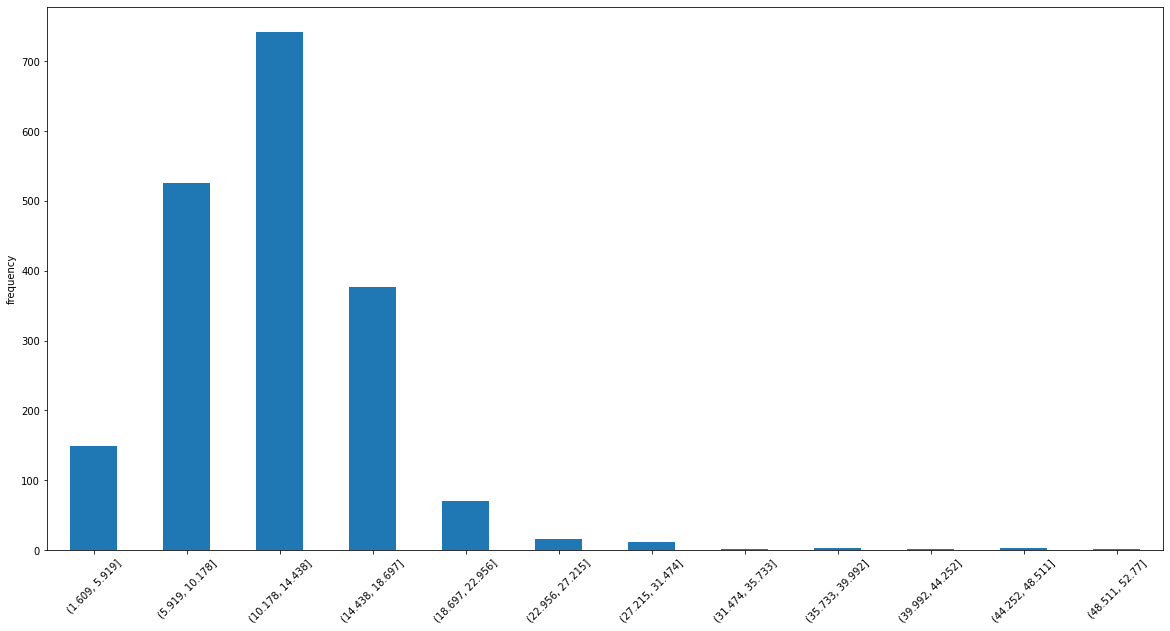


Boxplot:


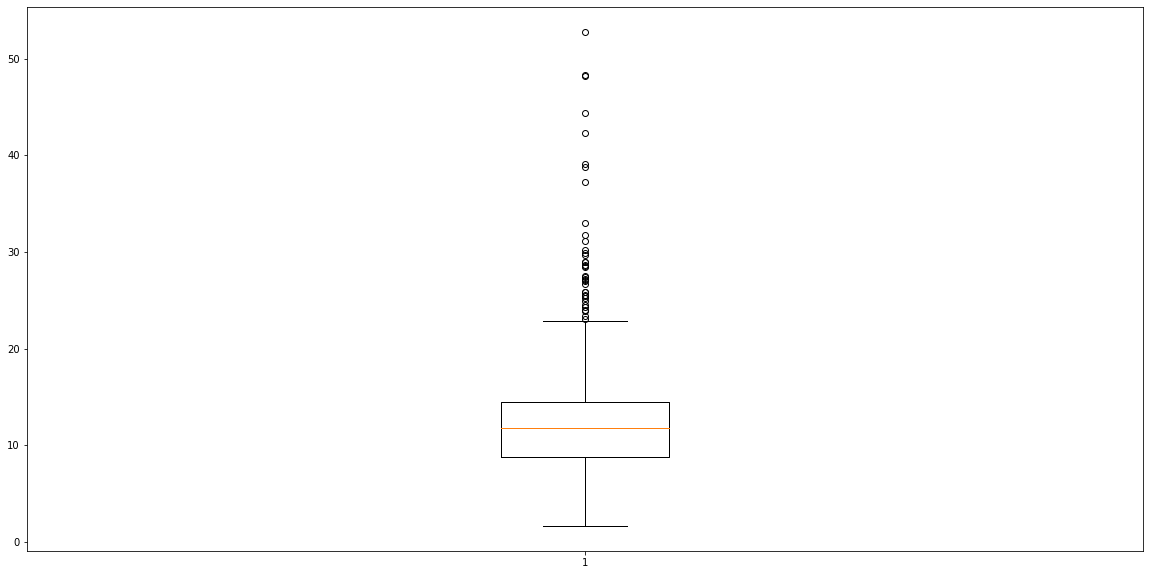


Principales estadísticos: 
count    1901.000000
mean       11.978538
std         4.854347
min         1.660000
25%         8.840000
50%        11.830000
75%        14.510000
max        52.770000
Name: agePct65up, dtype: float64

Asimetría: 1.6865758144598344
Curtosis: 9.125536908180951

 ****************************************************************************************** 


Columna: numbUrban

Histograma:
(-7322.564, 610213.667]       1886
(610213.667, 1220427.333]       12
(1220427.333, 1830641.0]         1
(1830641.0, 2440854.667]         0
(2440854.667, 3051068.333]       0
(3051068.333, 3661282.0]         1
(3661282.0, 4271495.667]         0
(4271495.667, 4881709.333]       0
(4881709.333, 5491923.0]         0
(5491923.0, 6102136.667]         0
(6102136.667, 6712350.333]       0
(6712350.333, 7322564.0]         1
Name: numbUrban, dtype: int64


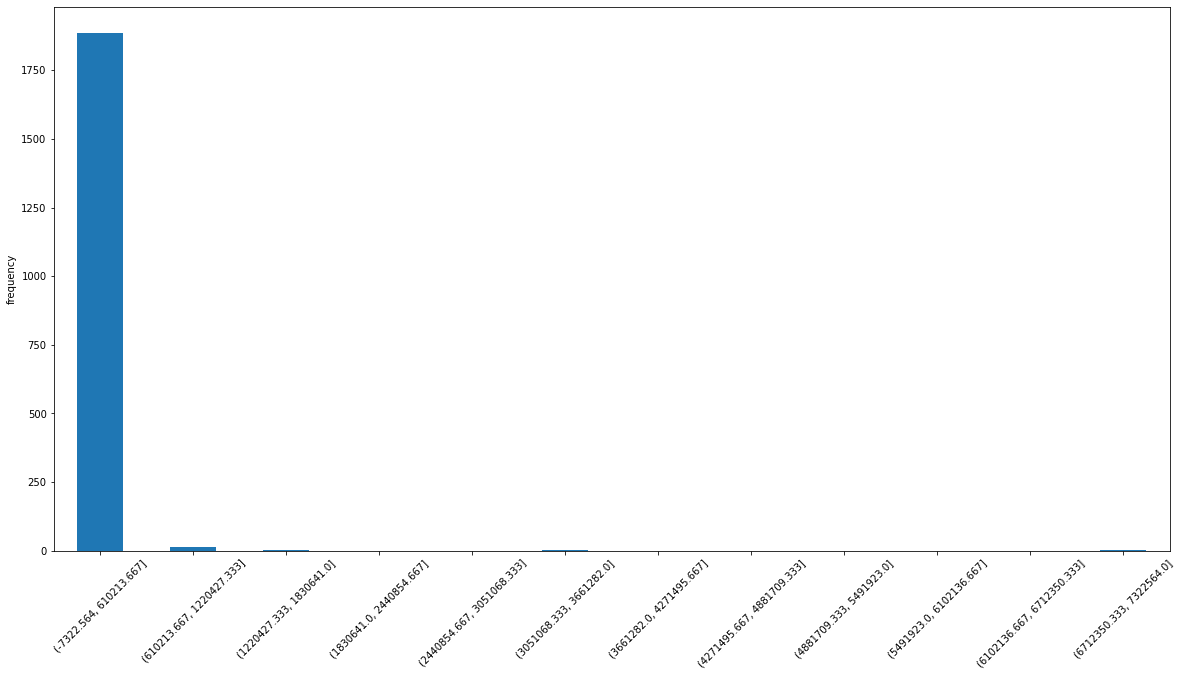


Boxplot:


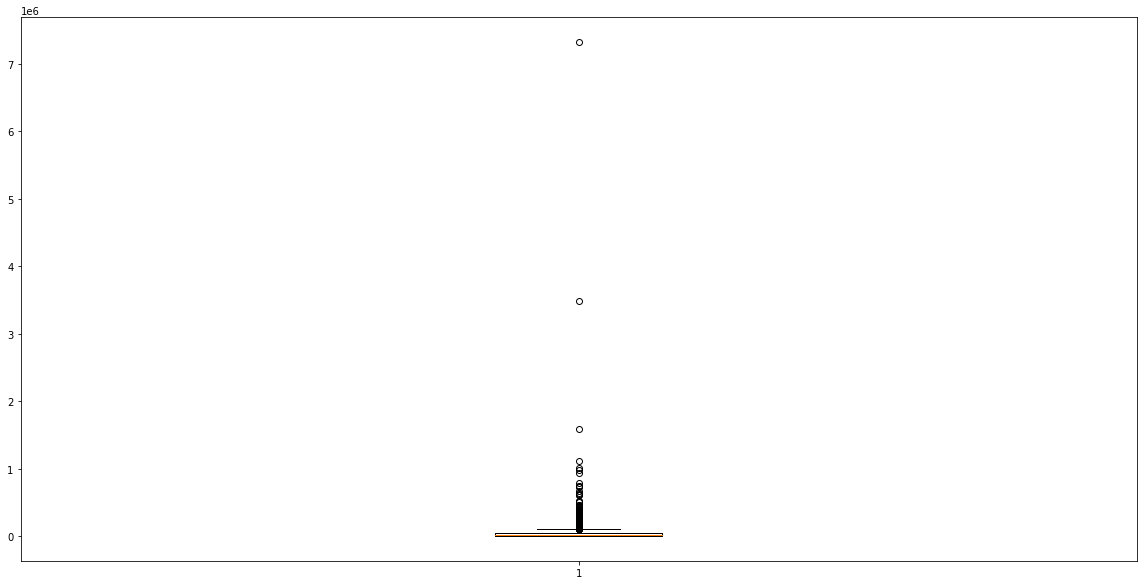


Principales estadísticos: 
count    1.901000e+03
mean     4.697214e+04
std      2.070960e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.733600e+04
75%      4.195800e+04
max      7.322564e+06
Name: numbUrban, dtype: float64

Asimetría: 25.91128555691108
Curtosis: 844.6004574881804

 ****************************************************************************************** 


Columna: pctUrban

Histograma:
(-0.1, 8.333]        526
(8.333, 16.667]        4
(16.667, 25.0]         4
(25.0, 33.333]         3
(33.333, 41.667]       3
(41.667, 50.0]         5
(50.0, 58.333]         8
(58.333, 66.667]      14
(66.667, 75.0]        18
(75.0, 83.333]        36
(83.333, 91.667]      54
(91.667, 100.0]     1226
Name: pctUrban, dtype: int64


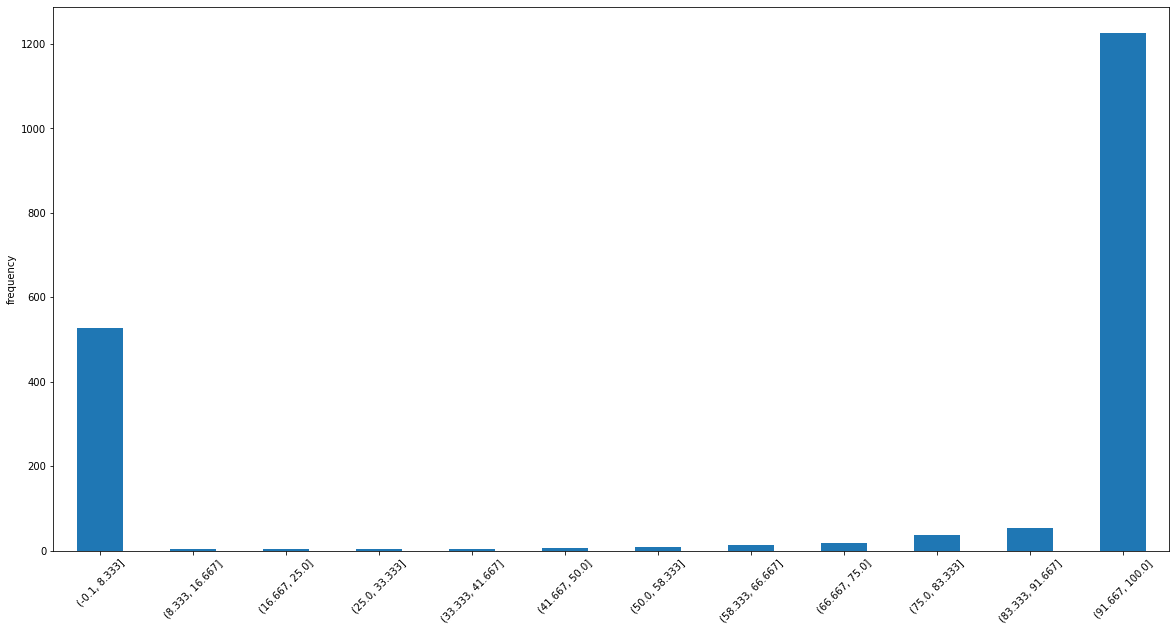


Boxplot:


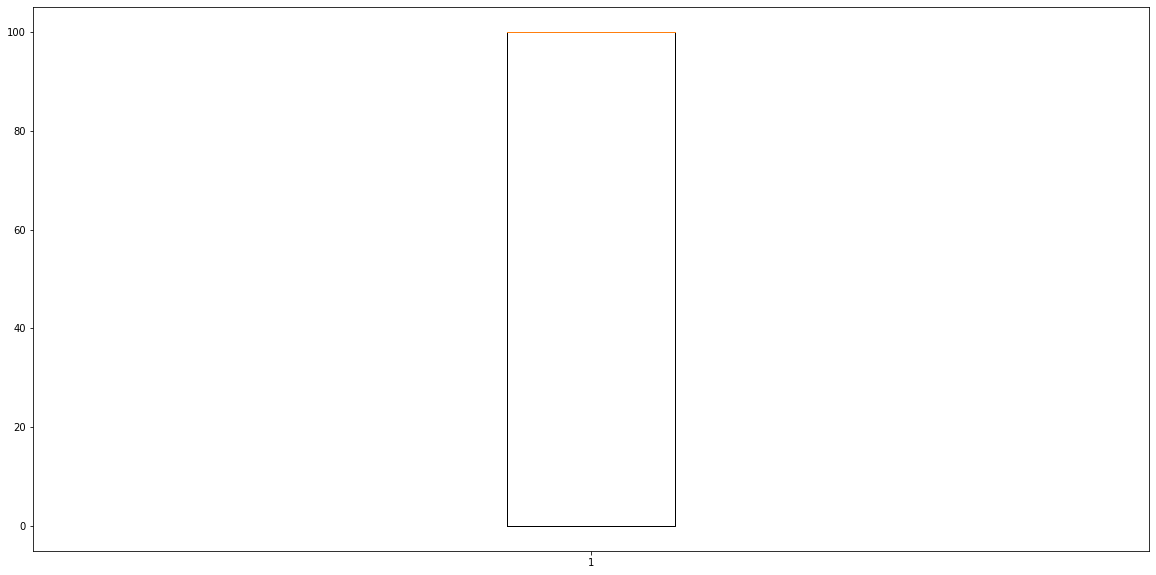


Principales estadísticos: 
count    1901.000000
mean       69.997733
std        44.253296
min         0.000000
25%         0.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: pctUrban, dtype: float64

Asimetría: -0.9065955919490886
Curtosis: -1.1228028306912416

 ****************************************************************************************** 


Columna: medIncome

Histograma:
(12797.283, 22134.417]      354
(22134.417, 31360.833]      600
(31360.833, 40587.25]       434
(40587.25, 49813.667]       276
(49813.667, 59040.083]      136
(59040.083, 68266.5]         63
(68266.5, 77492.917]         19
(77492.917, 86719.333]       11
(86719.333, 95945.75]         4
(95945.75, 105172.167]        2
(105172.167, 114398.583]      1
(114398.583, 123625.0]        1
Name: medIncome, dtype: int64


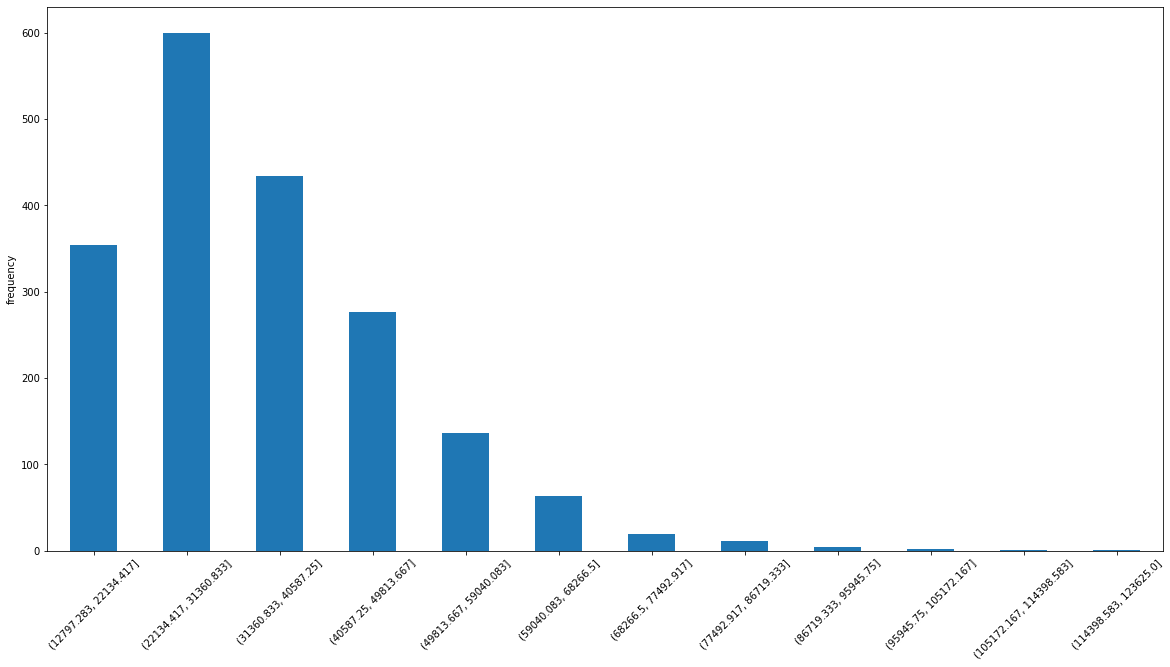


Boxplot:


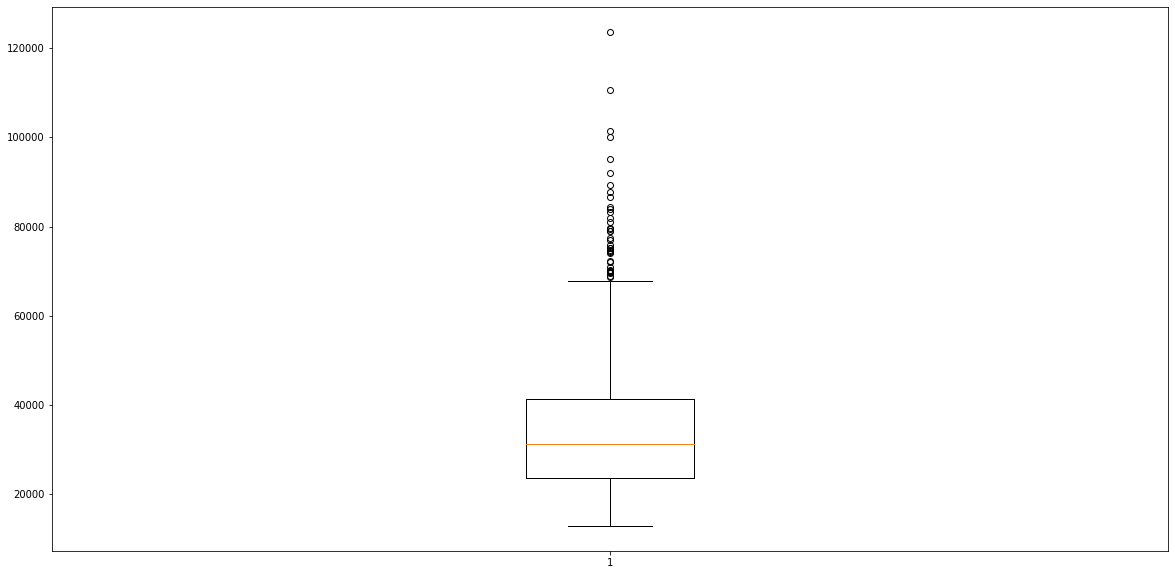


Principales estadísticos: 
count      1901.000000
mean      33956.236191
std       13495.727271
min       12908.000000
25%       23726.000000
50%       31270.000000
75%       41489.000000
max      123625.000000
Name: medIncome, dtype: float64

Asimetría: 1.339297950490698
Curtosis: 2.955595722503825

 ****************************************************************************************** 


Columna: pctWWage

Histograma:
(31.615, 37.092]      1
(37.092, 42.503]      2
(42.503, 47.915]      2
(47.915, 53.327]      7
(53.327, 58.738]     15
(58.738, 64.15]      55
(64.15, 69.562]     158
(69.562, 74.973]    343
(74.973, 80.385]    554
(80.385, 85.797]    453
(85.797, 91.208]    256
(91.208, 96.62]      55
Name: pctWWage, dtype: int64


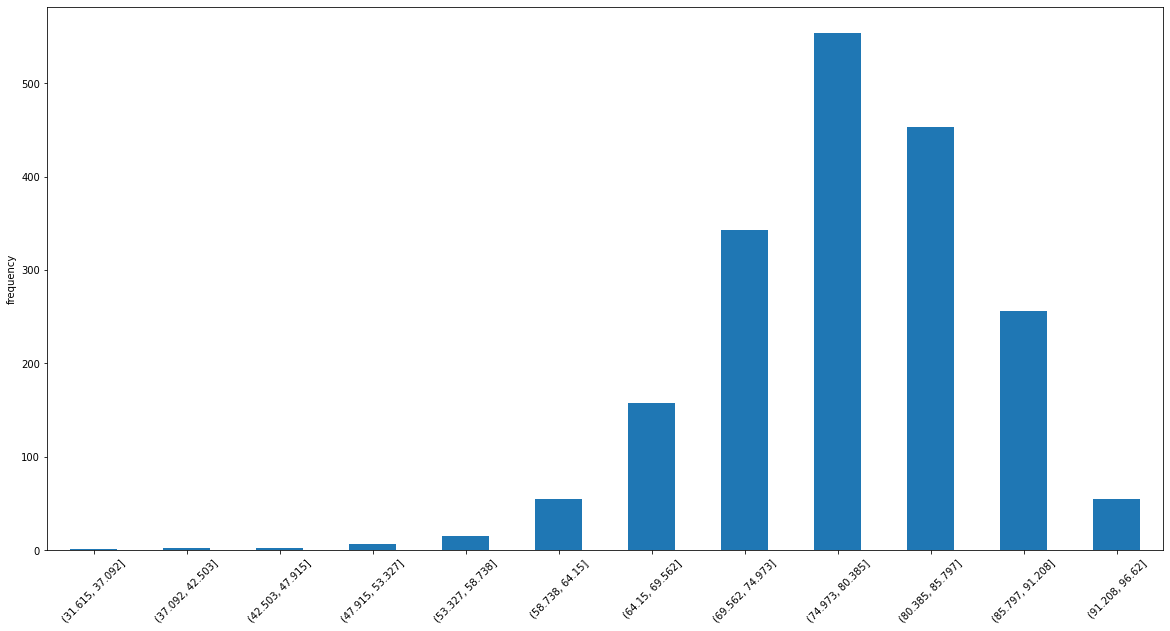


Boxplot:


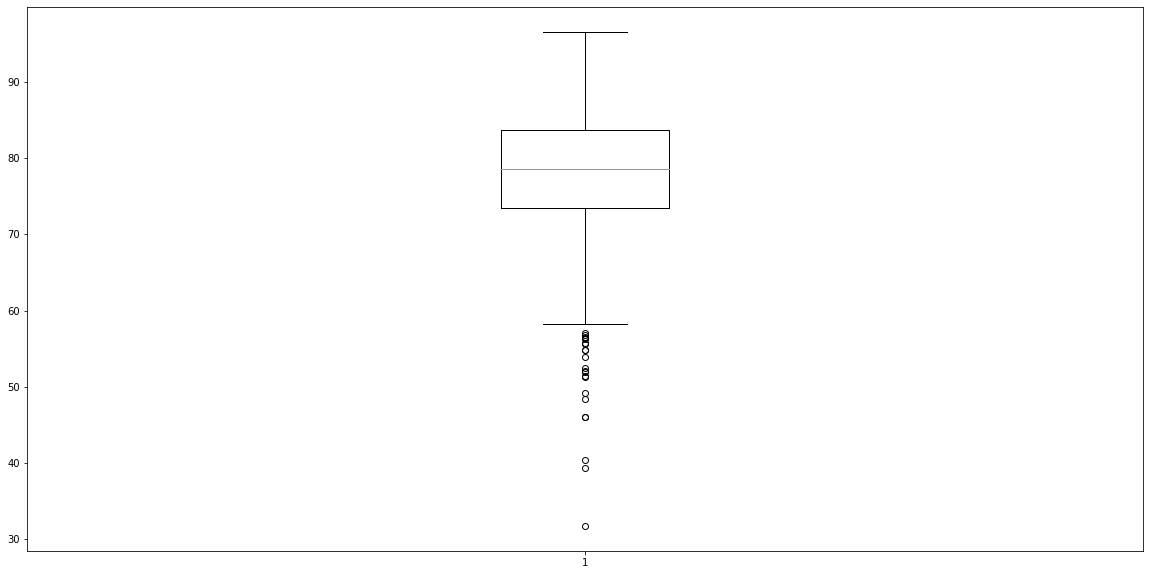


Principales estadísticos: 
count    1901.000000
mean       78.189863
std         7.841396
min        31.680000
25%        73.450000
50%        78.550000
75%        83.760000
max        96.620000
Name: pctWWage, dtype: float64

Asimetría: -0.6492925019634864
Curtosis: 1.4247928028361136

 ****************************************************************************************** 


Columna: pctWFarmSelf

Histograma:
(-0.00653, 0.544]    655
(0.544, 1.088]       761
(1.088, 1.632]       270
(1.632, 2.177]       123
(2.177, 2.721]        44
(2.721, 3.265]        19
(3.265, 3.809]        12
(3.809, 4.353]         8
(4.353, 4.898]         5
(4.898, 5.442]         2
(5.442, 5.986]         1
(5.986, 6.53]          1
Name: pctWFarmSelf, dtype: int64


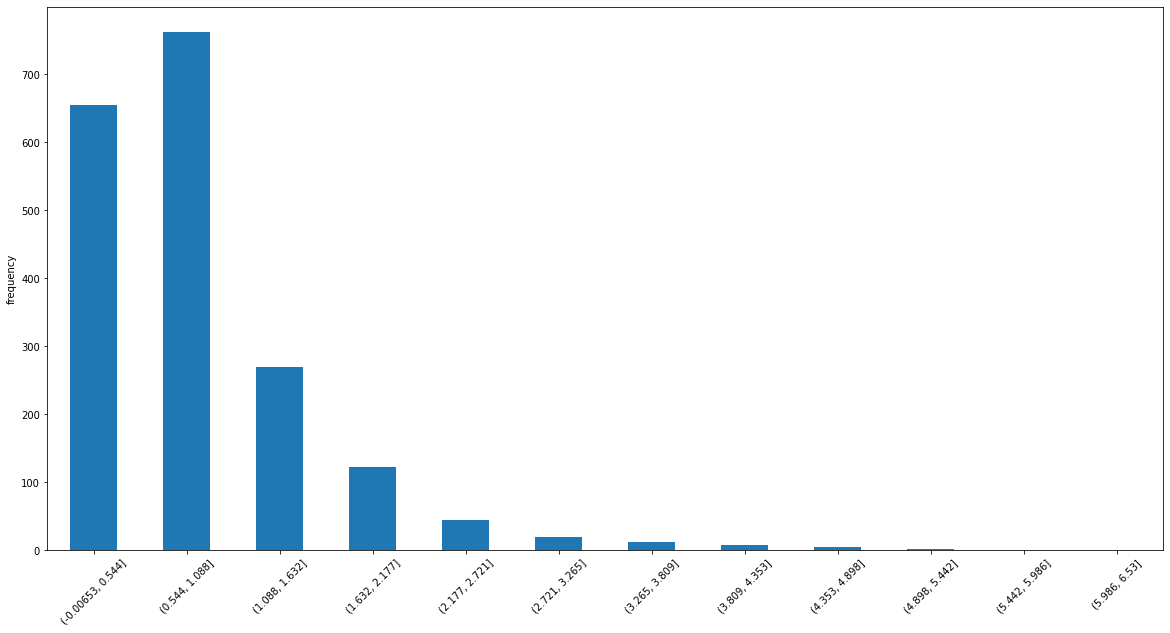


Boxplot:


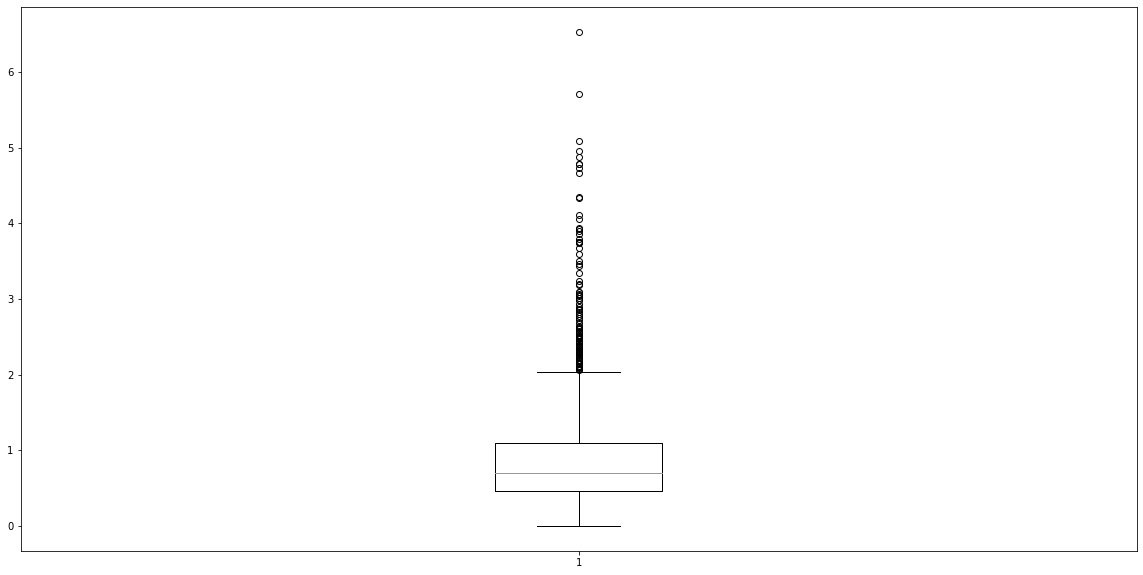


Principales estadísticos: 
count    1901.000000
mean        0.888006
std         0.689253
min         0.000000
25%         0.470000
50%         0.700000
75%         1.100000
max         6.530000
Name: pctWFarmSelf, dtype: float64

Asimetría: 2.5506782626183497
Curtosis: 10.119733298053129

 ****************************************************************************************** 


Columna: pctWInvInc

Histograma:
(8.94, 15.688]       14
(15.688, 22.357]     55
(22.357, 29.025]    169
(29.025, 35.693]    313
(35.693, 42.362]    394
(42.362, 49.03]     332
(49.03, 55.698]     290
(55.698, 62.367]    167
(62.367, 69.035]    109
(69.035, 75.703]     50
(75.703, 82.372]      7
(82.372, 89.04]       1
Name: pctWInvInc, dtype: int64


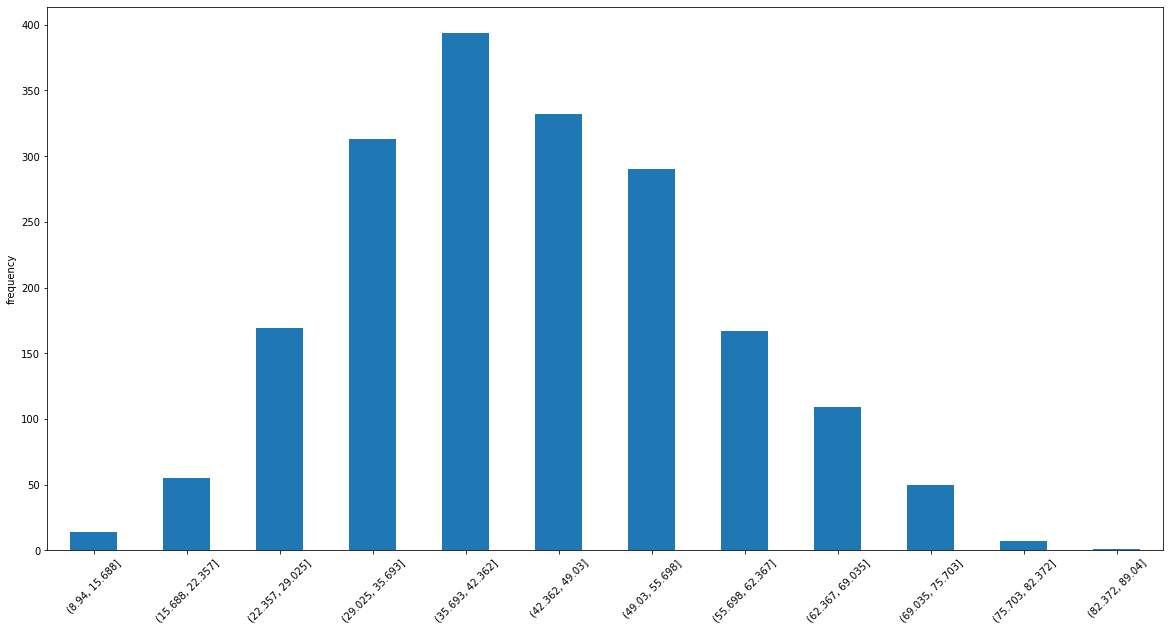


Boxplot:


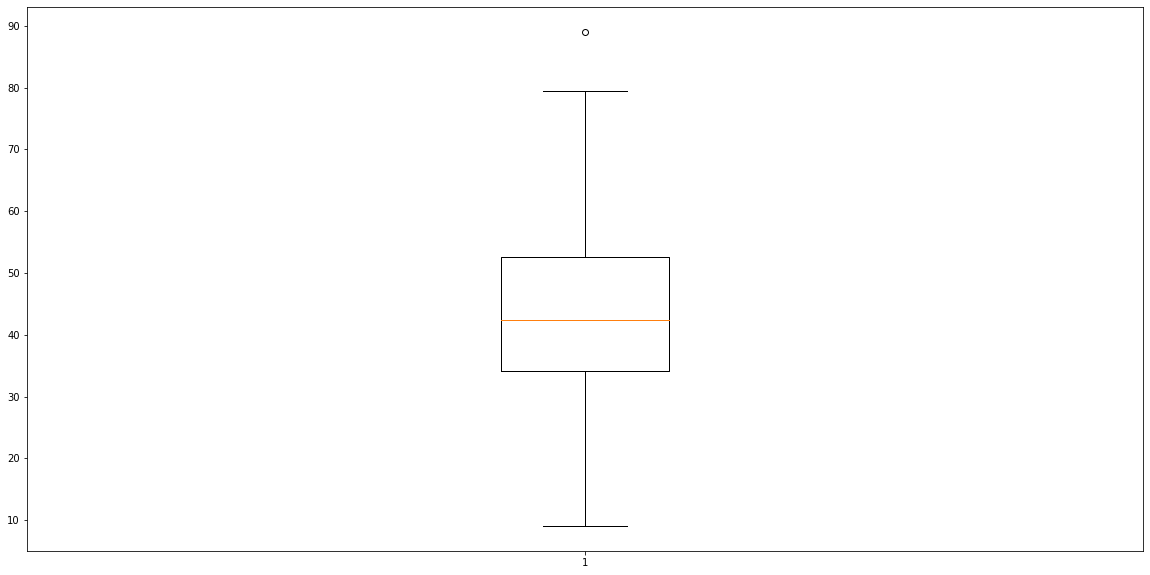


Principales estadísticos: 
count    1901.000000
mean       43.471999
std        12.801797
min         9.020000
25%        34.210000
50%        42.440000
75%        52.550000
max        89.040000
Name: pctWInvInc, dtype: float64

Asimetría: 0.24740372767748461
Curtosis: -0.3181245040421512

 ****************************************************************************************** 


Columna: pctWSocSec

Histograma:
(4.738, 10.775]     47
(10.775, 16.74]    164
(16.74, 22.705]    394
(22.705, 28.67]    530
(28.67, 34.635]    499
(34.635, 40.6]     195
(40.6, 46.565]      48
(46.565, 52.53]     15
(52.53, 58.495]      3
(58.495, 64.46]      3
(64.46, 70.425]      1
(70.425, 76.39]      2
Name: pctWSocSec, dtype: int64


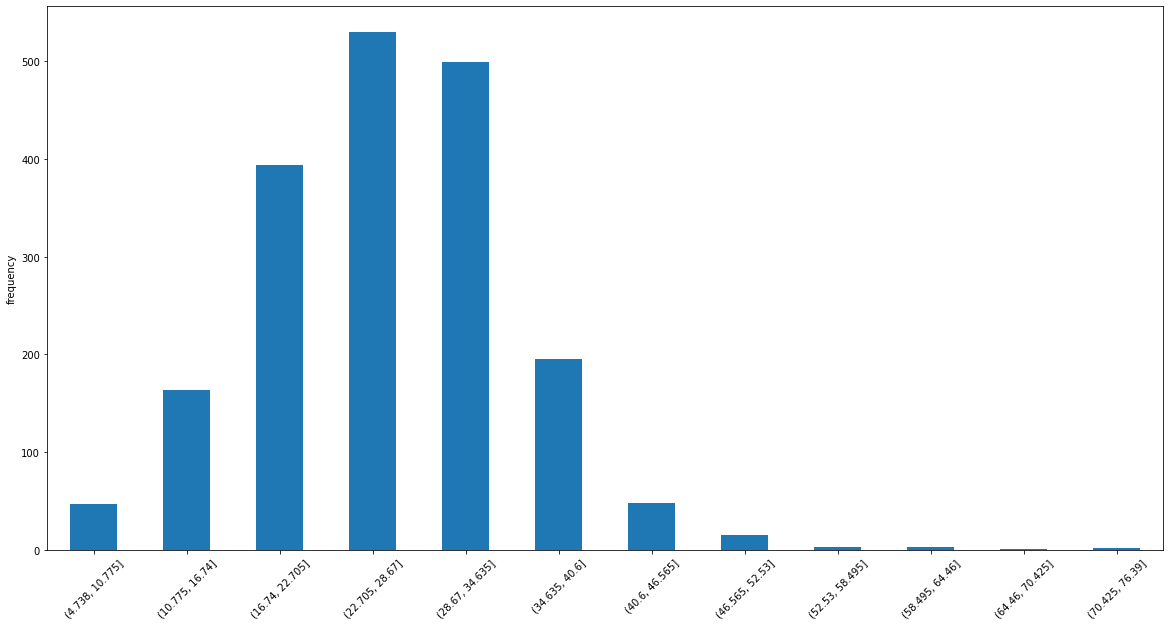


Boxplot:


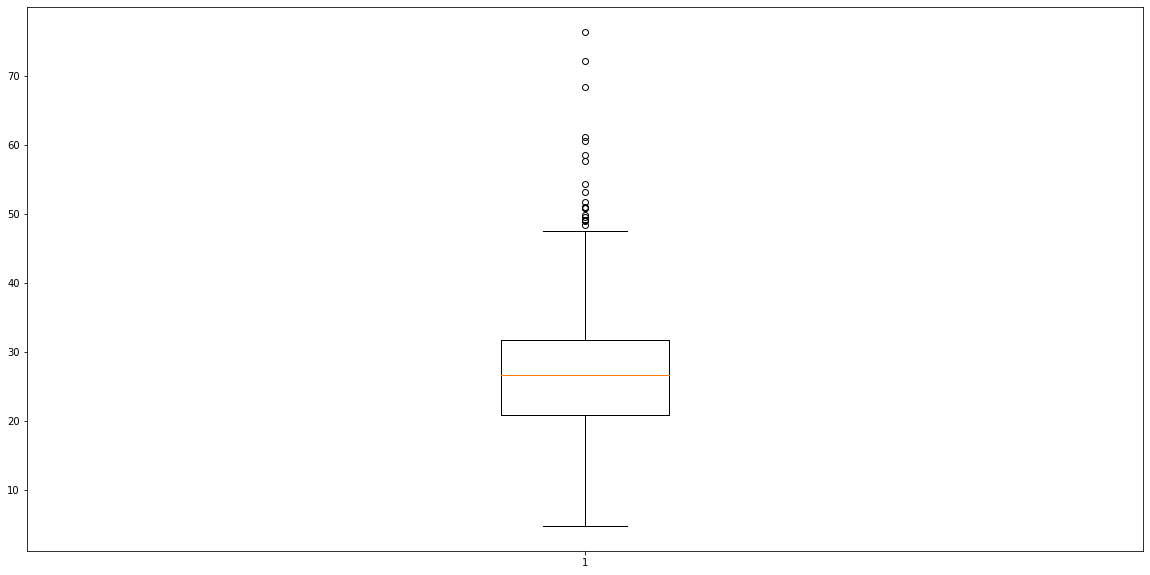


Principales estadísticos: 
count    1901.00000
mean       26.57788
std         8.25283
min         4.81000
25%        20.90000
50%        26.66000
75%        31.72000
max        76.39000
Name: pctWSocSec, dtype: float64

Asimetría: 0.43448079247979465
Curtosis: 1.6407679448456869

 ****************************************************************************************** 


Columna: pctWPubAsst

Histograma:
(0.474, 2.702]      313
(2.702, 4.903]      503
(4.903, 7.105]      381
(7.105, 9.307]      250
(9.307, 11.508]     179
(11.508, 13.71]     118
(13.71, 15.912]      62
(15.912, 18.113]     40
(18.113, 20.315]     28
(20.315, 22.517]     15
(22.517, 24.718]     11
(24.718, 26.92]       1
Name: pctWPubAsst, dtype: int64


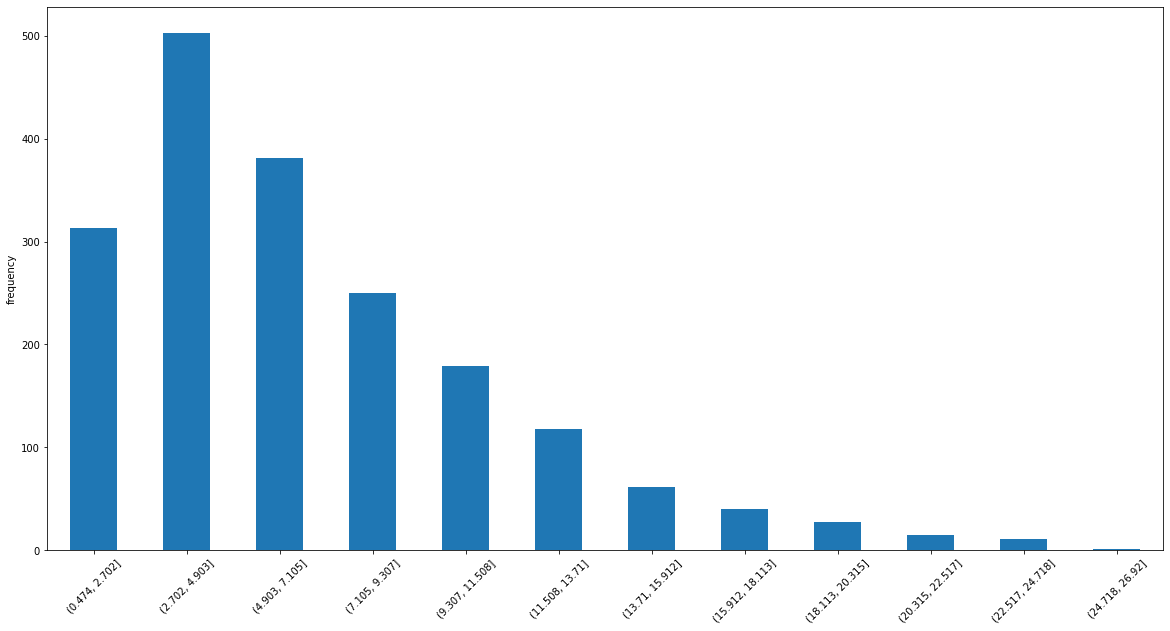


Boxplot:


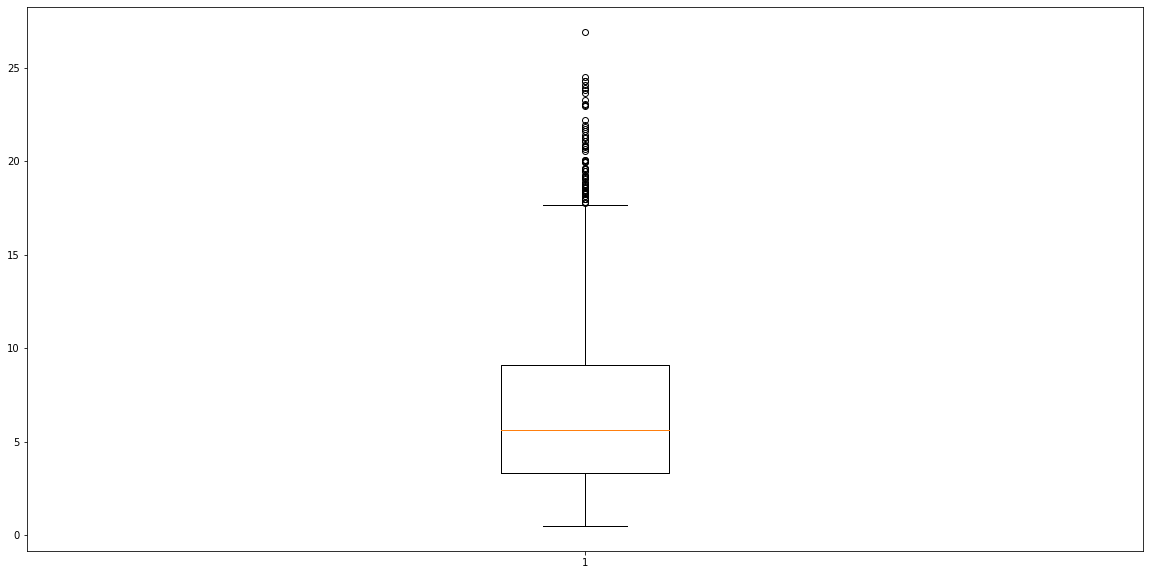


Principales estadísticos: 
count    1901.000000
mean        6.755381
std         4.482357
min         0.500000
25%         3.360000
50%         5.620000
75%         9.090000
max        26.920000
Name: pctWPubAsst, dtype: float64

Asimetría: 1.2626636148689763
Curtosis: 1.5592565045170645

 ****************************************************************************************** 


Columna: pctWRetire

Histograma:
(3.418, 6.964]       21
(6.964, 10.468]     143
(10.468, 13.972]    485
(13.972, 17.477]    600
(17.477, 20.981]    416
(20.981, 24.485]    158
(24.485, 27.989]     52
(27.989, 31.493]     16
(31.493, 34.997]      5
(34.997, 38.502]      1
(38.502, 42.006]      2
(42.006, 45.51]       2
Name: pctWRetire, dtype: int64


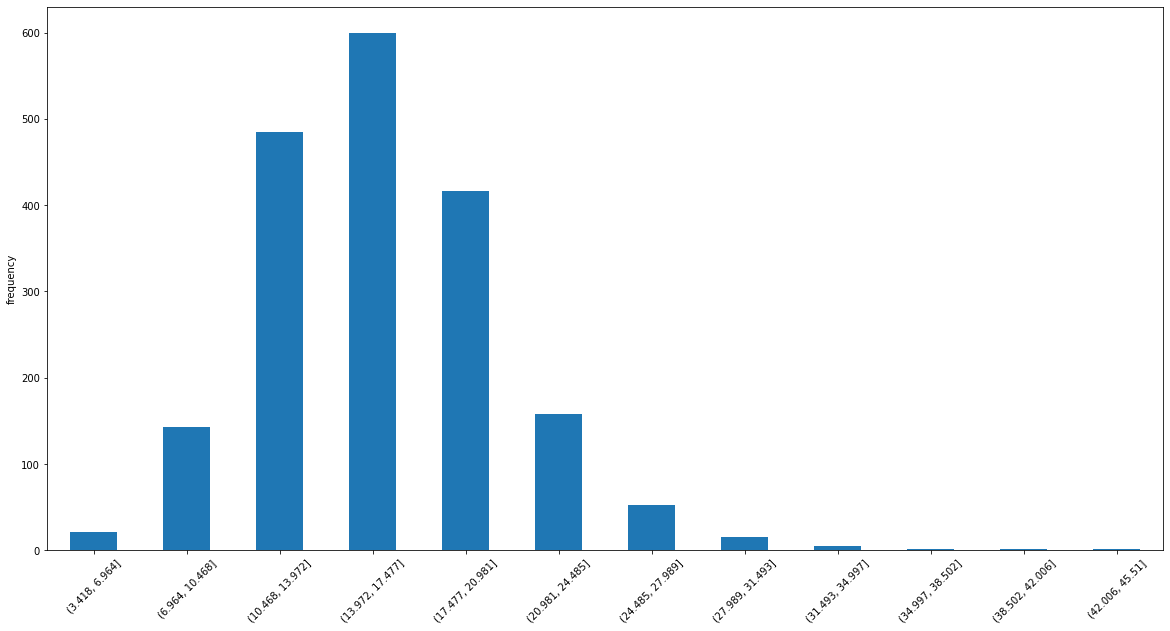


Boxplot:


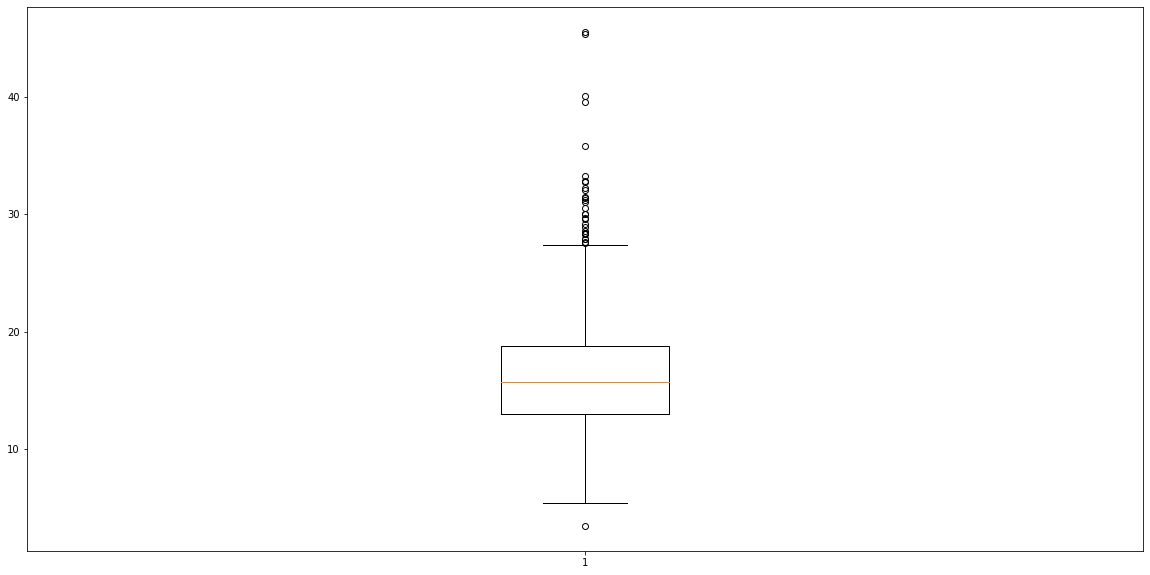


Principales estadísticos: 
count    1901.000000
mean       16.085366
std         4.583207
min         3.460000
25%        13.000000
50%        15.700000
75%        18.790000
max        45.510000
Name: pctWRetire, dtype: float64

Asimetría: 0.8559657750214277
Curtosis: 2.7258357496013104

 ****************************************************************************************** 


Columna: medFamInc

Histograma:
(14139.942, 24011.833]      124
(24011.833, 33766.667]      676
(33766.667, 43521.5]        487
(43521.5, 53276.333]        321
(53276.333, 63031.167]      164
(63031.167, 72786.0]         72
(72786.0, 82540.833]         32
(82540.833, 92295.667]       13
(92295.667, 102050.5]         5
(102050.5, 111805.333]        5
(111805.333, 121560.167]      1
(121560.167, 131315.0]        1
Name: medFamInc, dtype: int64


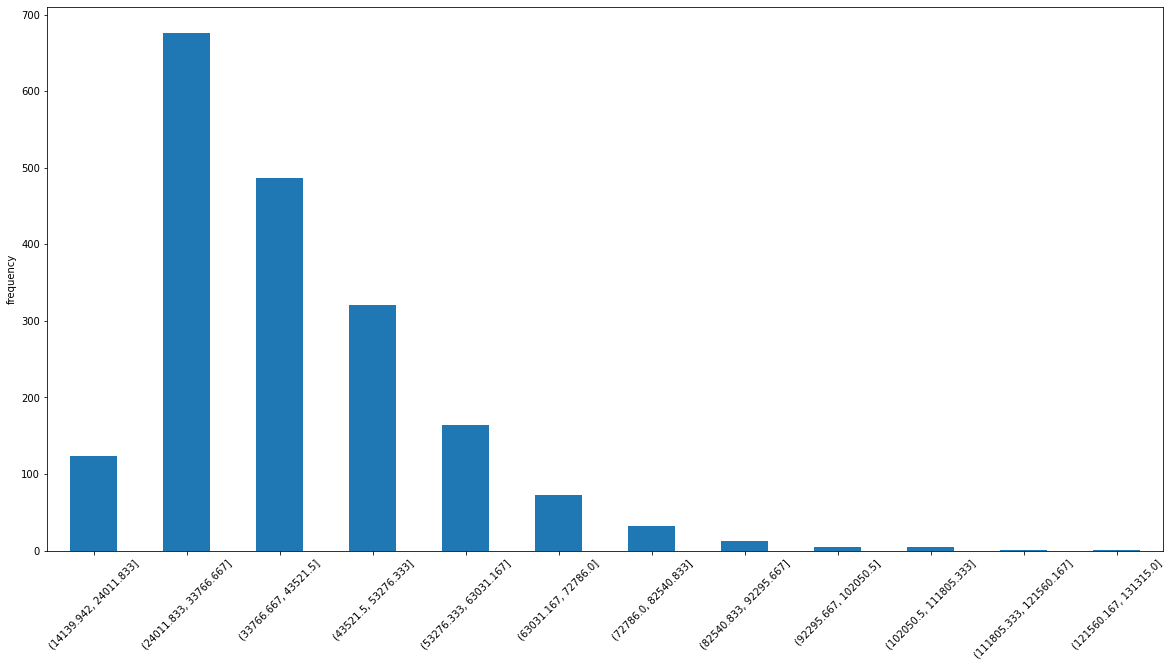


Boxplot:


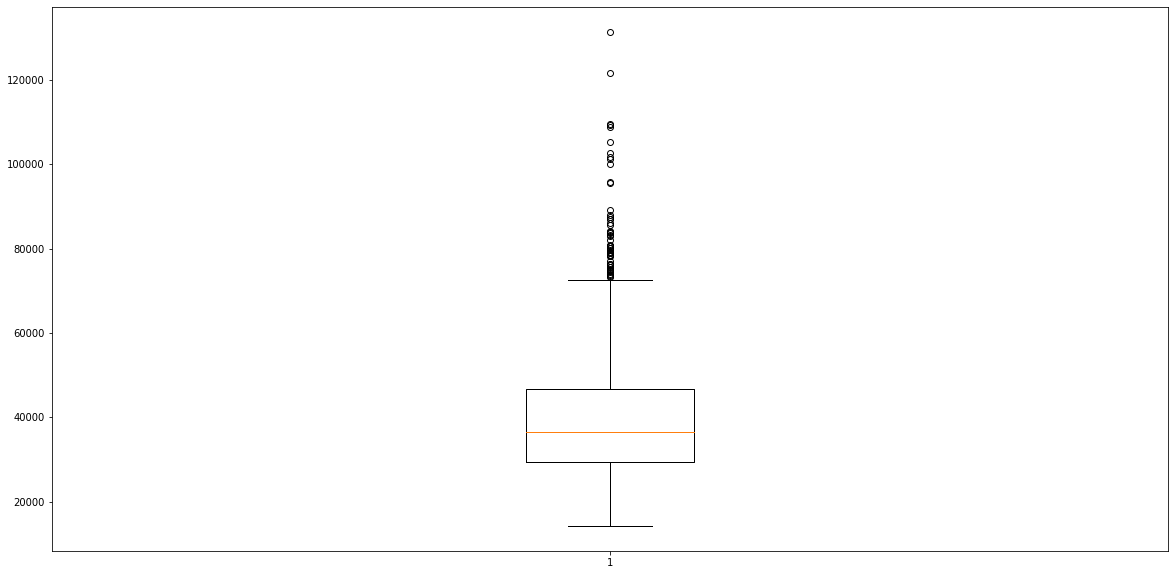


Principales estadísticos: 
count      1901.000000
mean      39769.228827
std       14320.128856
min       14257.000000
25%       29345.000000
50%       36533.000000
75%       46847.000000
max      131315.000000
Name: medFamInc, dtype: float64

Asimetría: 1.4090443265389223
Curtosis: 3.222697009571078

 ****************************************************************************************** 


Columna: perCapInc

Histograma:
(5178.935, 10075.75]    198
(10075.75, 14914.5]     882
(14914.5, 19753.25]     496
(19753.25, 24592.0]     179
(24592.0, 29430.75]      80
(29430.75, 34269.5]      34
(34269.5, 39108.25]      11
(39108.25, 43947.0]       8
(43947.0, 48785.75]       5
(48785.75, 53624.5]       5
(53624.5, 58463.25]       1
(58463.25, 63302.0]       2
Name: perCapInc, dtype: int64


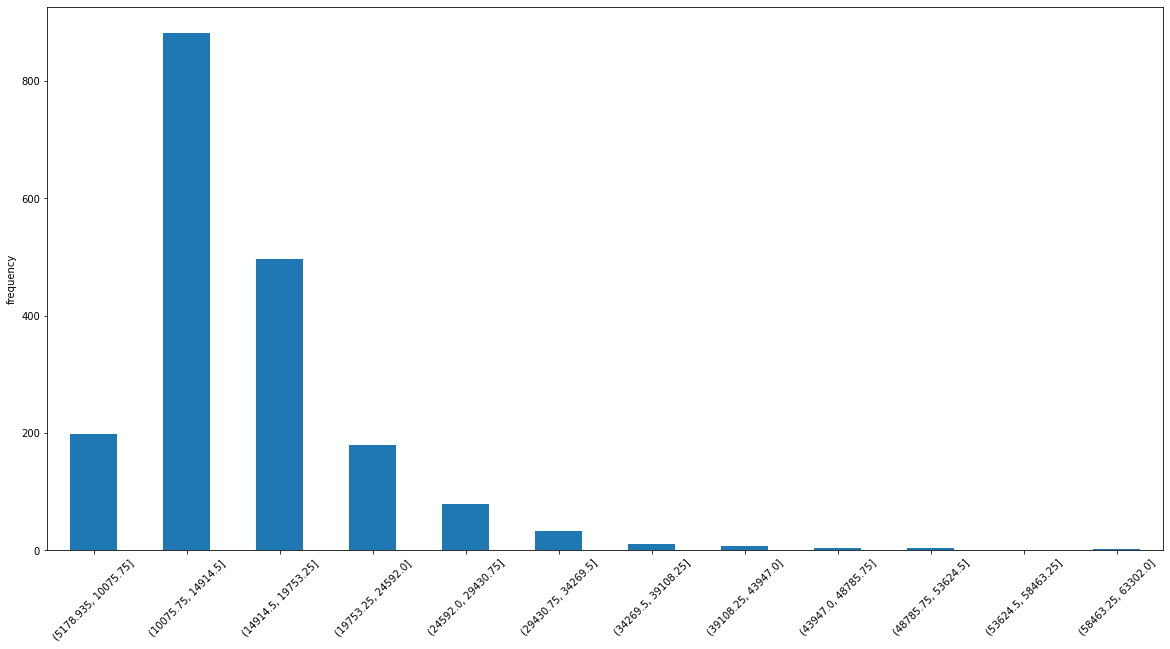


Boxplot:


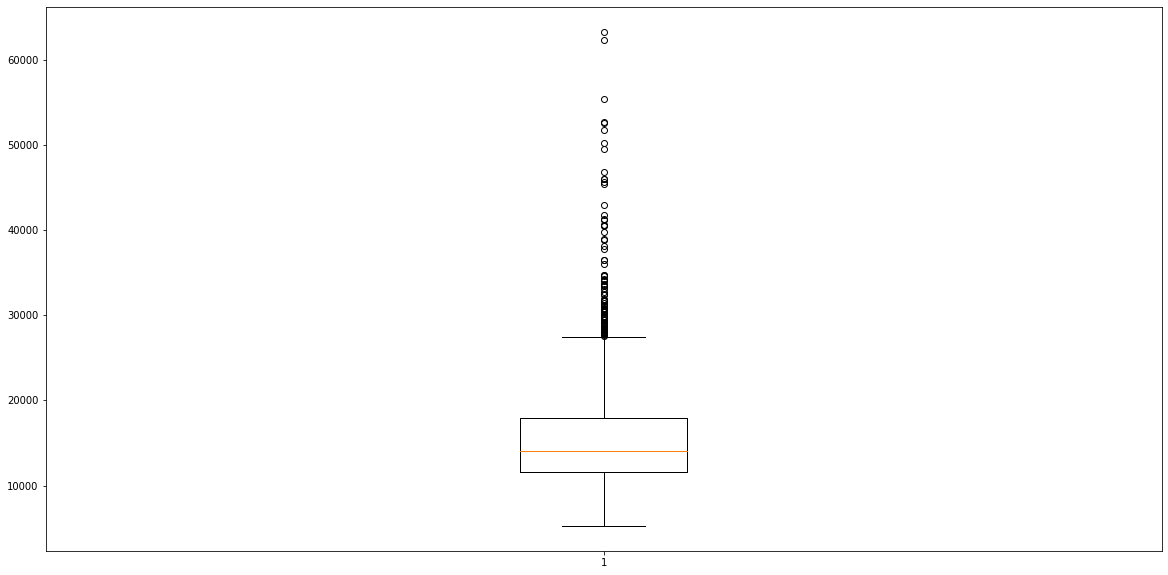


Principales estadísticos: 
count     1901.000000
mean     15604.296160
std       6289.037905
min       5237.000000
25%      11563.000000
50%      14087.000000
75%      17910.000000
max      63302.000000
Name: perCapInc, dtype: float64

Asimetría: 2.2947717371633227
Curtosis: 8.919437081594651

 ****************************************************************************************** 


Columna: whitePerCap

Histograma:
(5408.622, 10753.5]    164
(10753.5, 16035.0]     941
(16035.0, 21316.5]     501
(21316.5, 26598.0]     172
(26598.0, 31879.5]      66
(31879.5, 37161.0]      28
(37161.0, 42442.5]      12
(42442.5, 47724.0]       8
(47724.0, 53005.5]       4
(53005.5, 58287.0]       2
(58287.0, 63568.5]       2
(63568.5, 68850.0]       1
Name: whitePerCap, dtype: int64


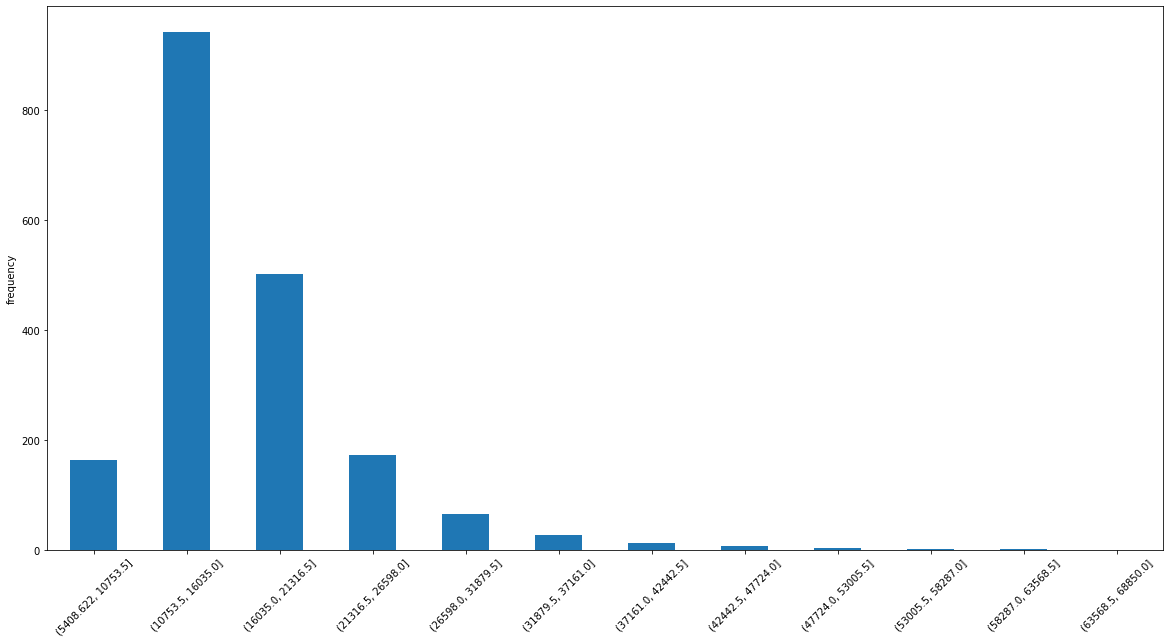


Boxplot:


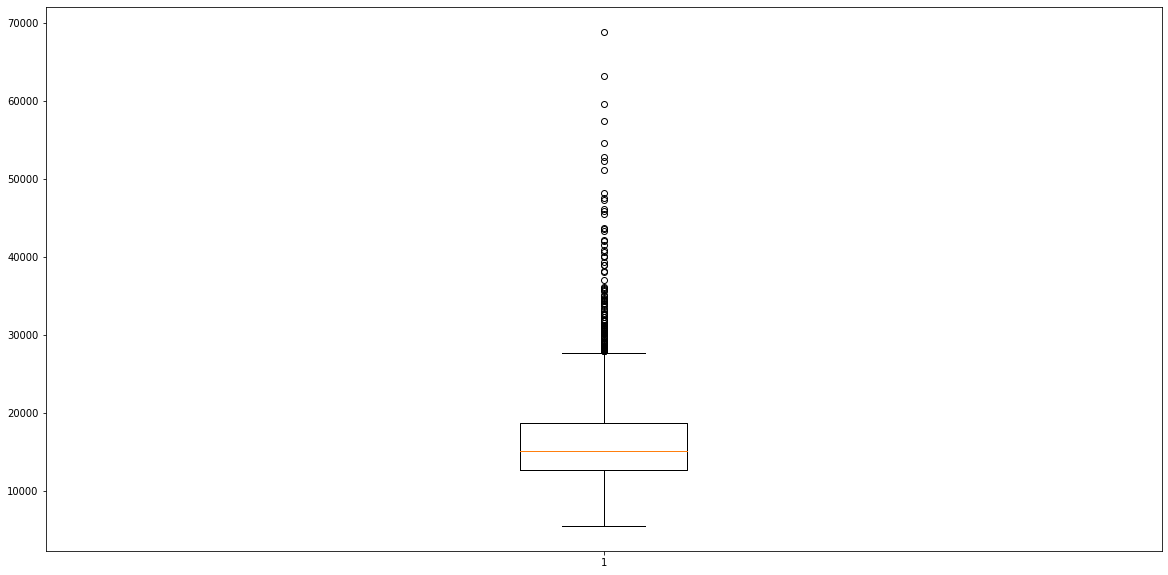


Principales estadísticos: 
count     1901.000000
mean     16616.188322
std       6381.751863
min       5472.000000
25%      12643.000000
50%      15087.000000
75%      18710.000000
max      68850.000000
Name: whitePerCap, dtype: float64

Asimetría: 2.4309749763102184
Curtosis: 10.056251280040629

 ****************************************************************************************** 


Columna: blackPerCap

Histograma:
(-212.12, 17676.667]        1632
(17676.667, 35353.333]       245
(35353.333, 53030.0]          14
(53030.0, 70706.667]           3
(70706.667, 88383.333]         3
(88383.333, 106060.0]          1
(106060.0, 123736.667]         2
(123736.667, 141413.333]       0
(141413.333, 159090.0]         0
(159090.0, 176766.667]         0
(176766.667, 194443.333]       0
(194443.333, 212120.0]         1
Name: blackPerCap, dtype: int64


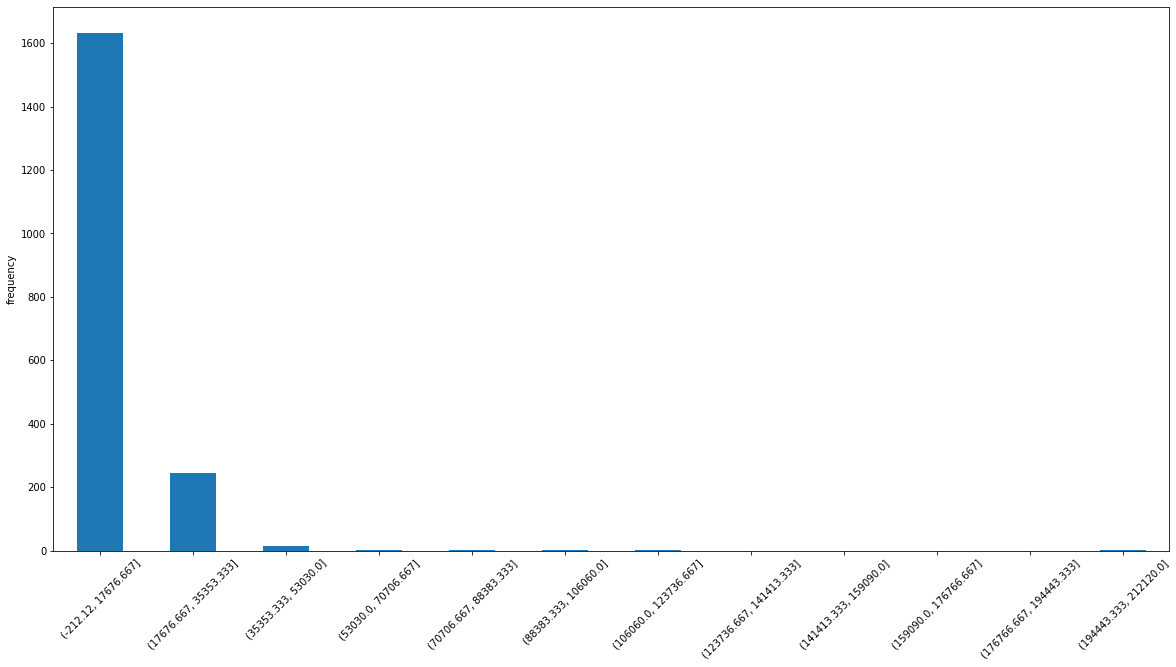


Boxplot:


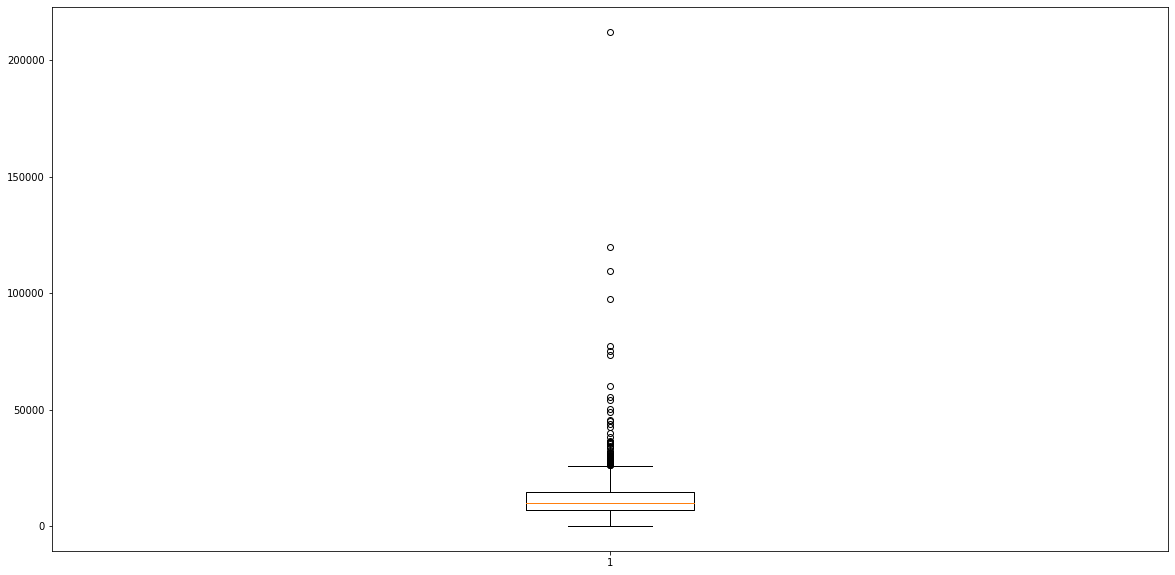


Principales estadísticos: 
count      1901.000000
mean      11582.885324
std        9374.183691
min           0.000000
25%        6748.000000
50%        9784.000000
75%       14549.000000
max      212120.000000
Name: blackPerCap, dtype: float64

Asimetría: 8.044357335830279
Curtosis: 132.69070090859077

 ****************************************************************************************** 


Columna: indianPerCap

Histograma:
(-480.0, 40000.0]       1852
(40000.0, 80000.0]        43
(80000.0, 120000.0]        3
(120000.0, 160000.0]       2
(160000.0, 200000.0]       0
(200000.0, 240000.0]       0
(240000.0, 280000.0]       0
(280000.0, 320000.0]       0
(320000.0, 360000.0]       0
(360000.0, 400000.0]       0
(400000.0, 440000.0]       0
(440000.0, 480000.0]       1
Name: indianPerCap, dtype: int64


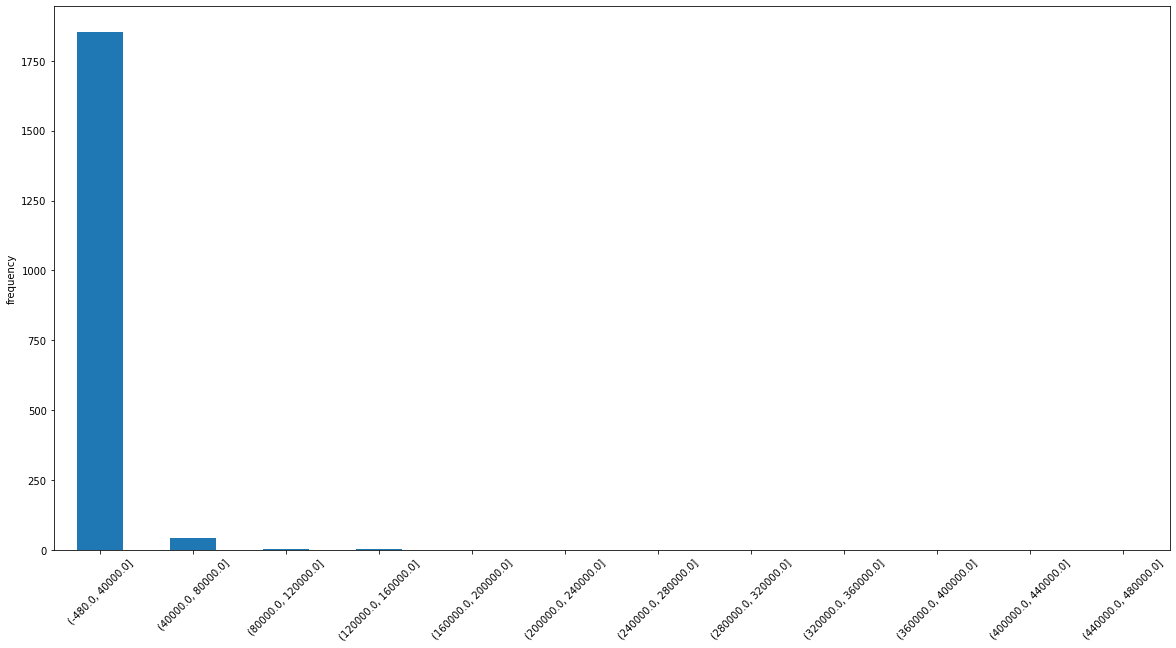


Boxplot:


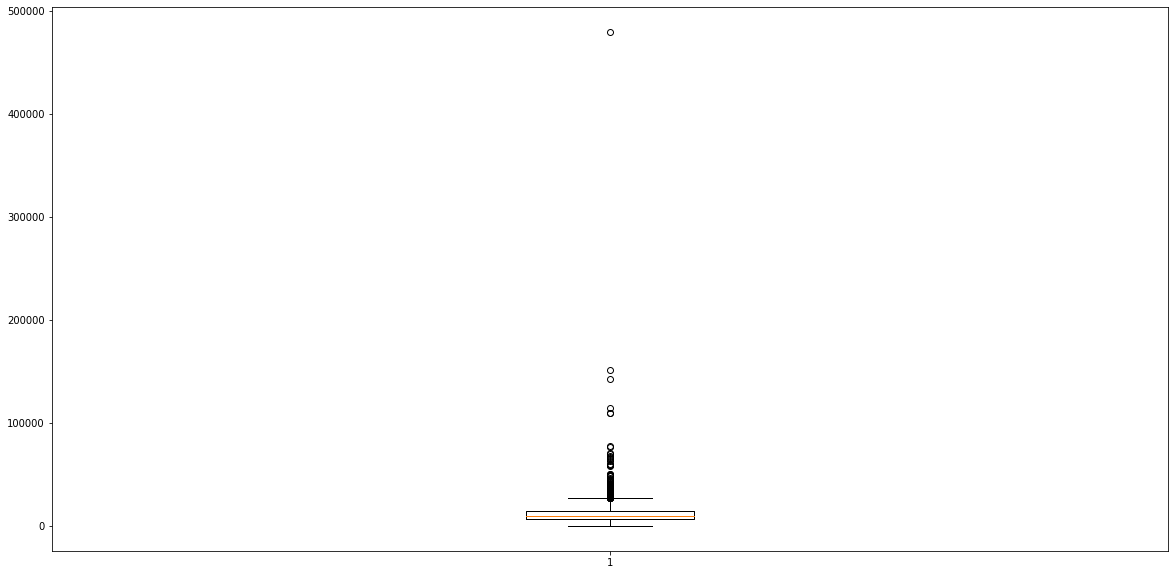


Principales estadísticos: 
count      1901.000000
mean      12328.749079
std       15519.246128
min           0.000000
25%        6405.000000
50%        9943.000000
75%       14807.000000
max      480000.000000
Name: indianPerCap, dtype: float64

Asimetría: 16.016926606154907
Curtosis: 442.7240645659047

 ****************************************************************************************** 


Columna: AsianPerCap

Histograma:
(-106.165, 8847.083]      512
(8847.083, 17694.167]     934
(17694.167, 26541.25]     290
(26541.25, 35388.333]     100
(35388.333, 44235.417]     36
(44235.417, 53082.5]       13
(53082.5, 61929.583]        6
(61929.583, 70776.667]      6
(70776.667, 79623.75]       1
(79623.75, 88470.833]       1
(88470.833, 97317.917]      0
(97317.917, 106165.0]       2
Name: AsianPerCap, dtype: int64


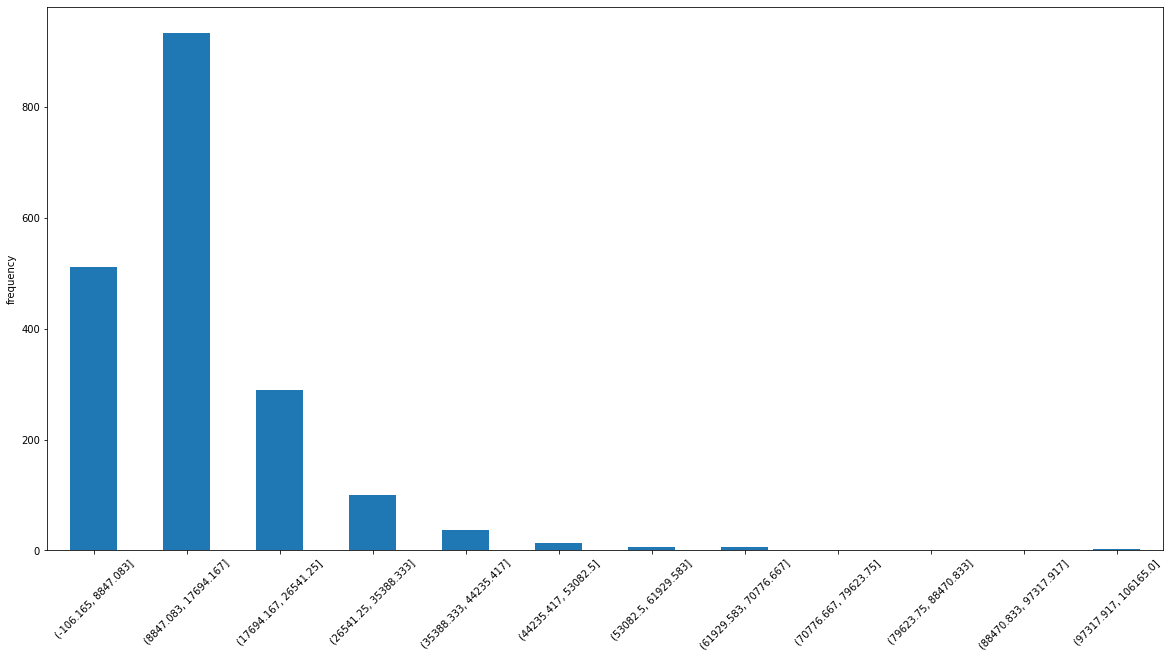


Boxplot:


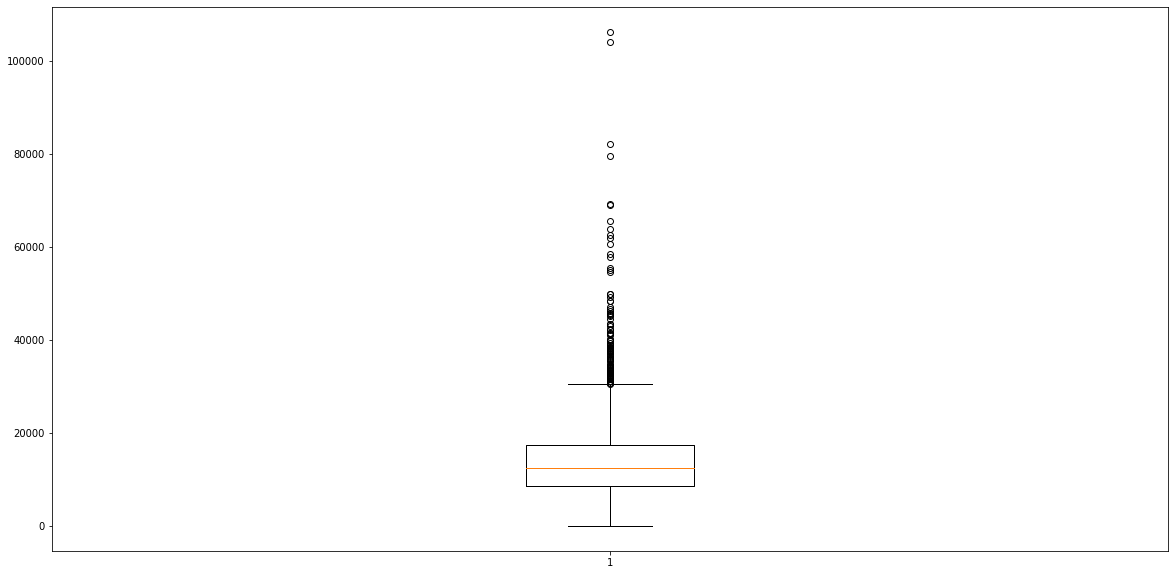


Principales estadísticos: 
count      1901.000000
mean      14293.126775
std        9627.835796
min           0.000000
25%        8542.000000
50%       12393.000000
75%       17351.000000
max      106165.000000
Name: AsianPerCap, dtype: float64

Asimetría: 2.6449118857754192
Curtosis: 14.151044800809467

 ****************************************************************************************** 


Columna: OtherPerCap

Histograma:
(-137.0, 11416.667]         1422
(11416.667, 22833.333]       397
(22833.333, 34250.0]          56
(34250.0, 45666.667]          17
(45666.667, 57083.333]         4
(57083.333, 68500.0]           0
(68500.0, 79916.667]           2
(79916.667, 91333.333]         1
(91333.333, 102750.0]          0
(102750.0, 114166.667]         0
(114166.667, 125583.333]       1
(125583.333, 137000.0]         1
Name: OtherPerCap, dtype: int64


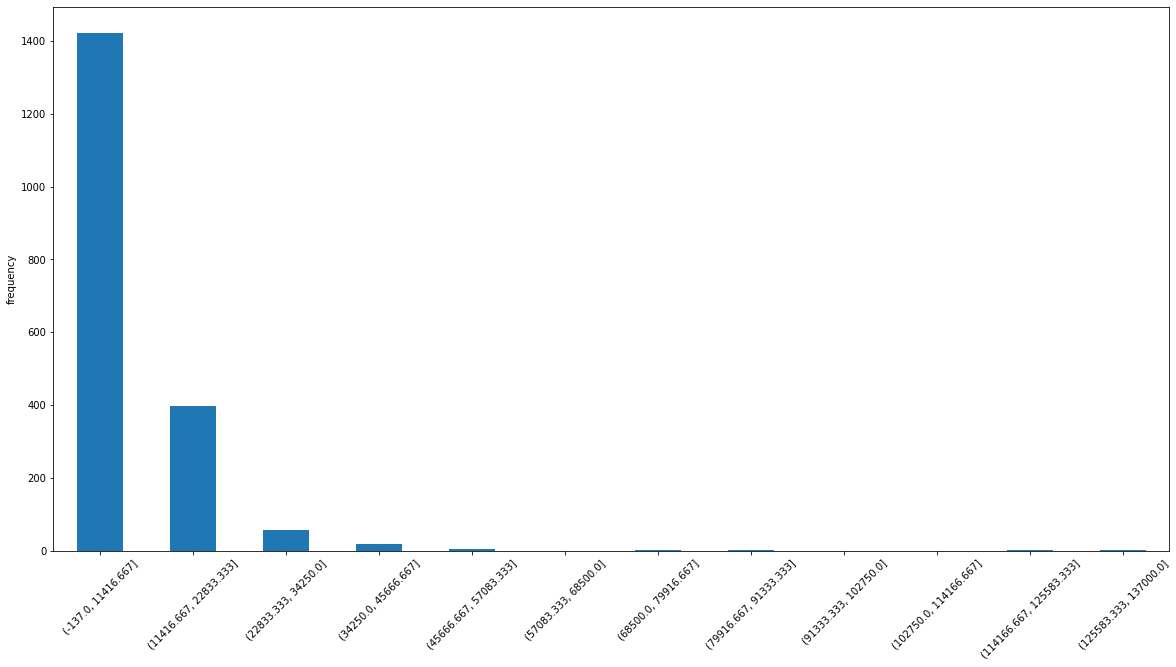


Boxplot:


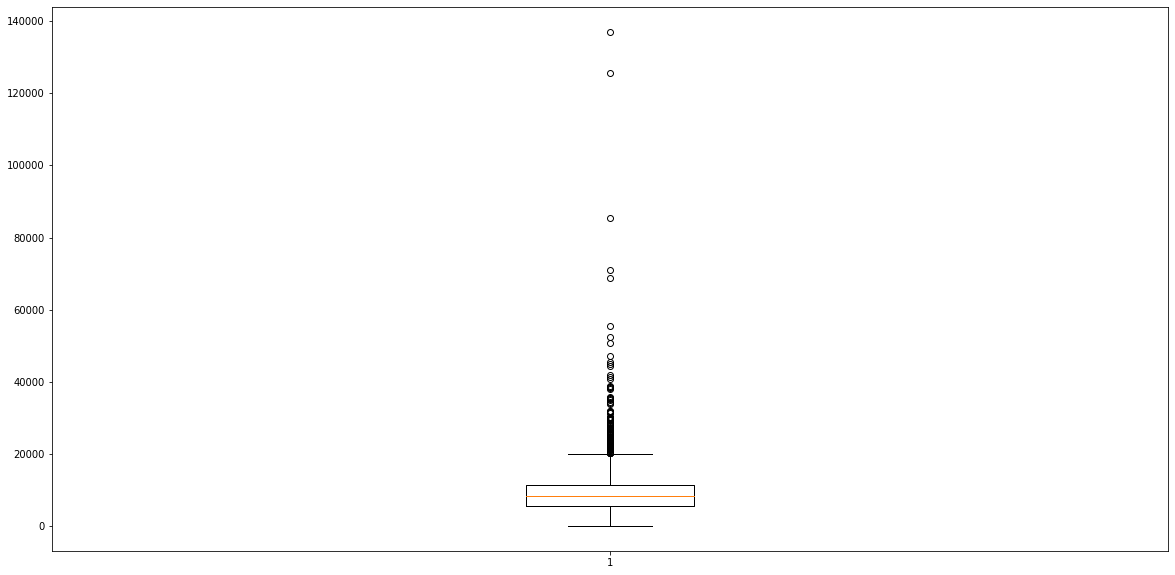


Principales estadísticos: 
count      1901.000000
mean       9480.354024
std        8070.968529
min           0.000000
25%        5615.000000
50%        8205.000000
75%       11471.000000
max      137000.000000
Name: OtherPerCap, dtype: float64

Asimetría: 5.5565295943418835
Curtosis: 64.39071415042974

 ****************************************************************************************** 


Columna: HispPerCap

Histograma:
(-54.648, 4554.0]      78
(4554.0, 9108.0]      755
(9108.0, 13662.0]     616
(13662.0, 18216.0]    289
(18216.0, 22770.0]     92
(22770.0, 27324.0]     34
(27324.0, 31878.0]     17
(31878.0, 36432.0]      9
(36432.0, 40986.0]      3
(40986.0, 45540.0]      3
(45540.0, 50094.0]      1
(50094.0, 54648.0]      4
Name: HispPerCap, dtype: int64


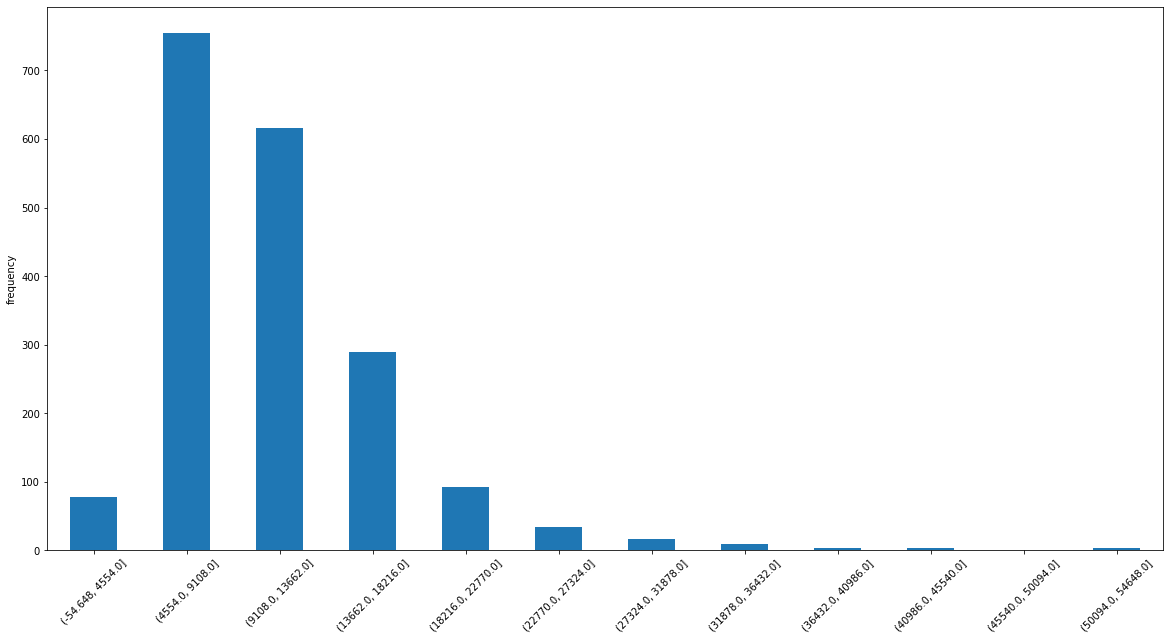


Boxplot:


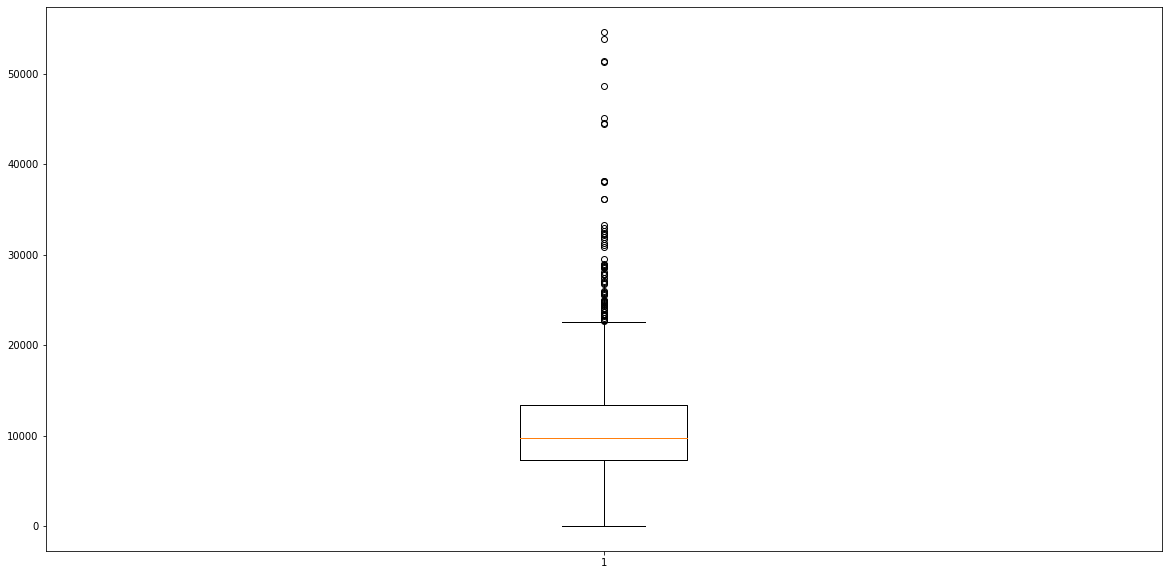


Principales estadísticos: 
count     1901.000000
mean     11036.994740
std       5774.773908
min          0.000000
25%       7288.000000
50%       9709.000000
75%      13431.000000
max      54648.000000
Name: HispPerCap, dtype: float64

Asimetría: 2.255226005387108
Curtosis: 9.659526589777625

 ****************************************************************************************** 


Columna: NumUnderPov

Histograma:
(-1306.916, 115487.667]       1889
(115487.667, 230897.333]         9
(230897.333, 346307.0]           1
(346307.0, 461716.667]           0
(461716.667, 577126.333]         0
(577126.333, 692536.0]           1
(692536.0, 807945.667]           0
(807945.667, 923355.333]         0
(923355.333, 1038765.0]          0
(1038765.0, 1154174.667]         0
(1154174.667, 1269584.333]       0
(1269584.333, 1384994.0]         1
Name: NumUnderPov, dtype: int64


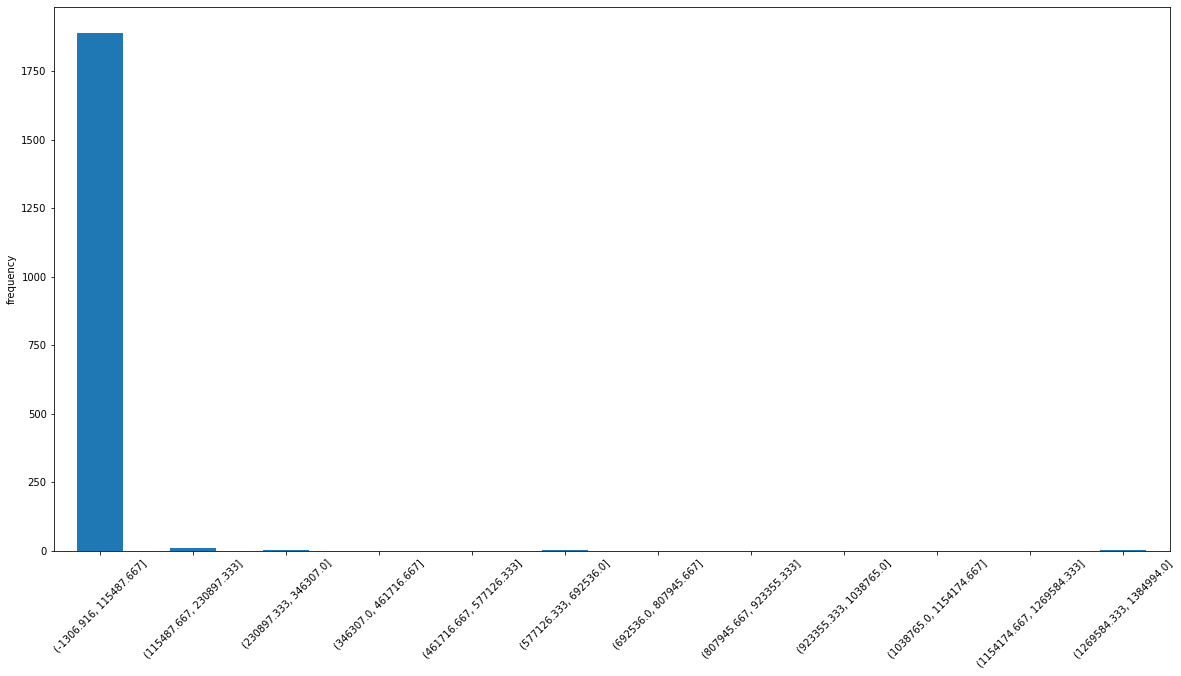


Boxplot:


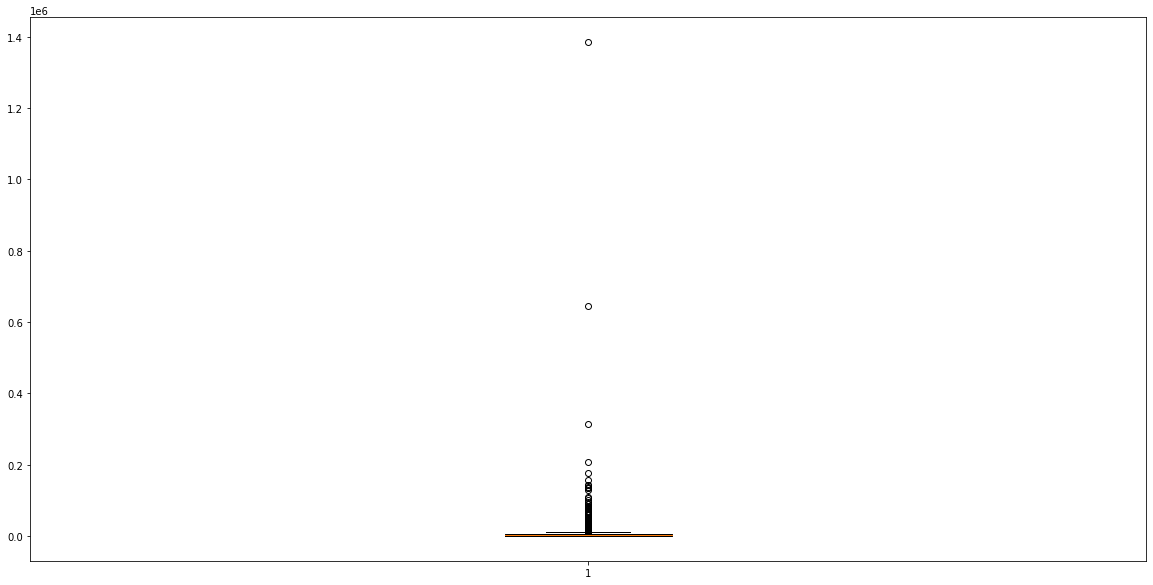


Principales estadísticos: 
count    1.901000e+03
mean     7.368756e+03
std      3.859757e+04
min      7.800000e+01
25%      9.050000e+02
50%      2.197000e+03
75%      5.054000e+03
max      1.384994e+06
Name: NumUnderPov, dtype: float64

Asimetría: 26.96005943511411
Curtosis: 896.2757277185623

 ****************************************************************************************** 


Columna: PctPopUnderPov

Histograma:
(0.592, 4.655]     480
(4.655, 8.67]      418
(8.67, 12.685]     268
(12.685, 16.7]     234
(16.7, 20.715]     202
(20.715, 24.73]    142
(24.73, 28.745]     79
(28.745, 32.76]     32
(32.76, 36.775]     21
(36.775, 40.79]     16
(40.79, 44.805]      7
(44.805, 48.82]      2
Name: PctPopUnderPov, dtype: int64


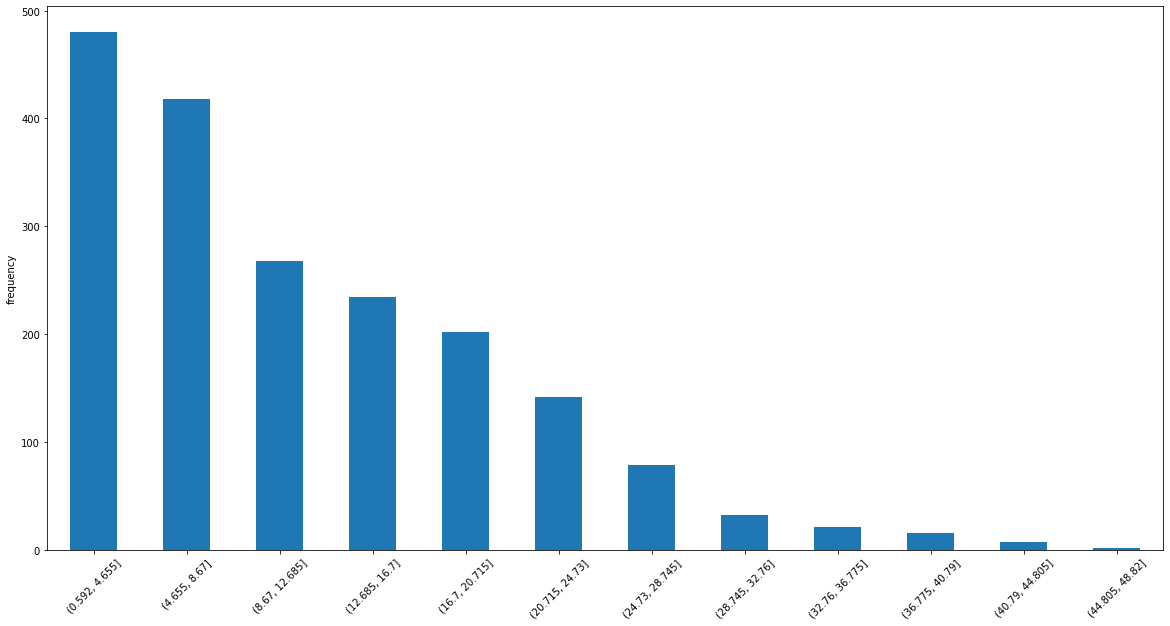


Boxplot:


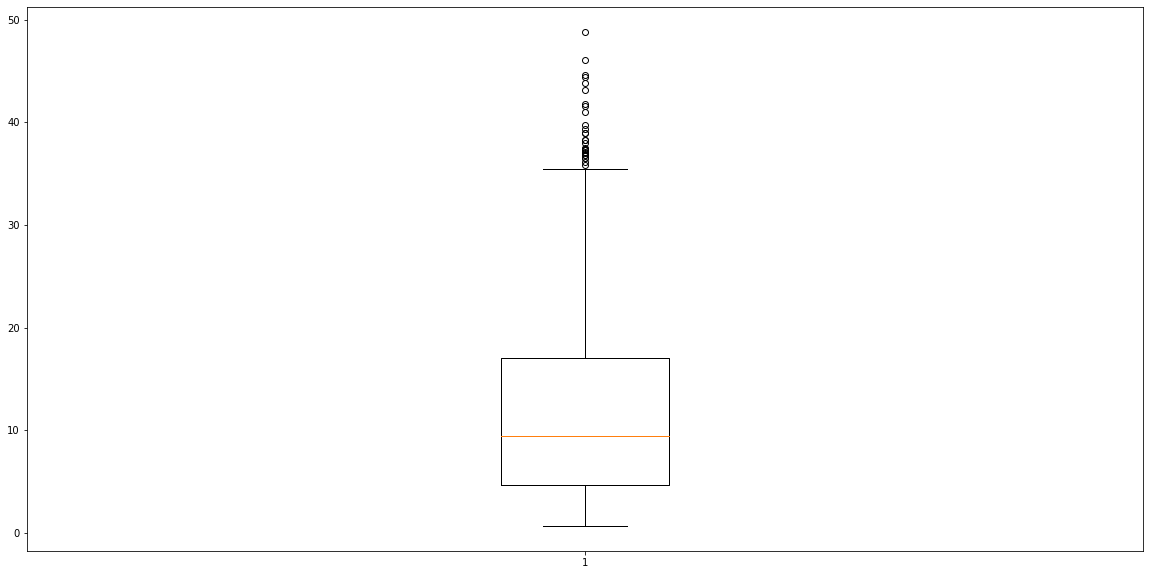


Principales estadísticos: 
count    1901.000000
mean       11.664277
std         8.467334
min         0.640000
25%         4.630000
50%         9.380000
75%        17.040000
max        48.820000
Name: PctPopUnderPov, dtype: float64

Asimetría: 1.0316729803897273
Curtosis: 0.7915200454704627

 ****************************************************************************************** 


Columna: PctLess9thGrade

Histograma:
(0.15, 4.341]       417
(4.341, 8.482]      609
(8.482, 12.622]     433
(12.622, 16.763]    218
(16.763, 20.904]    116
(20.904, 25.045]     44
(25.045, 29.186]     21
(29.186, 33.327]     15
(33.327, 37.468]     12
(37.468, 41.608]      4
(41.608, 45.749]      8
(45.749, 49.89]       4
Name: PctLess9thGrade, dtype: int64


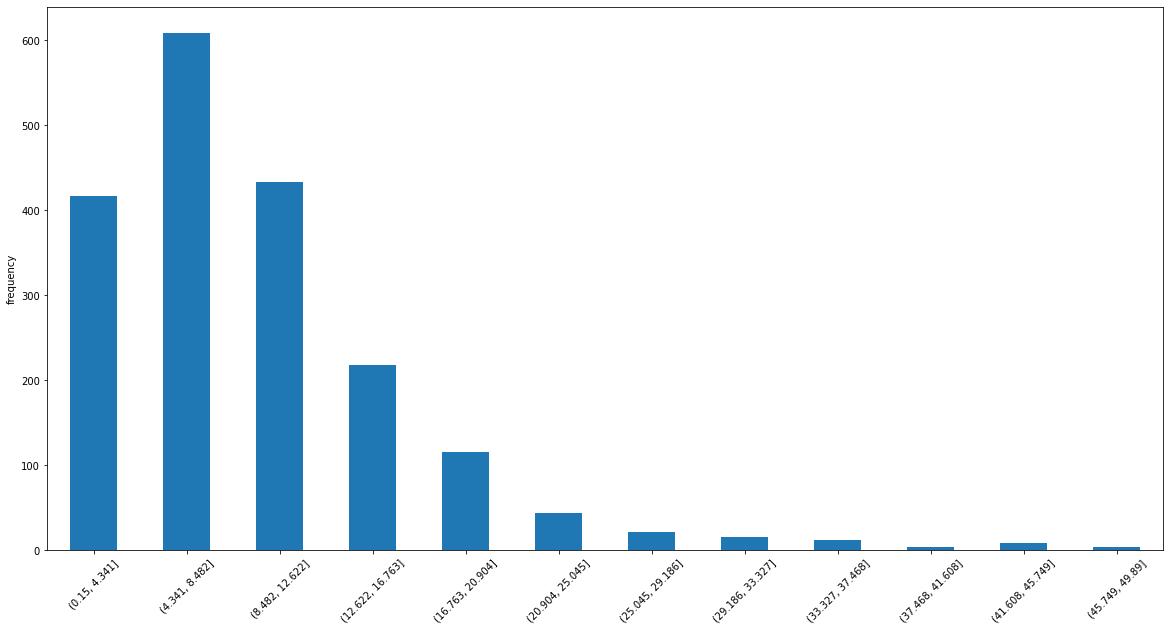


Boxplot:


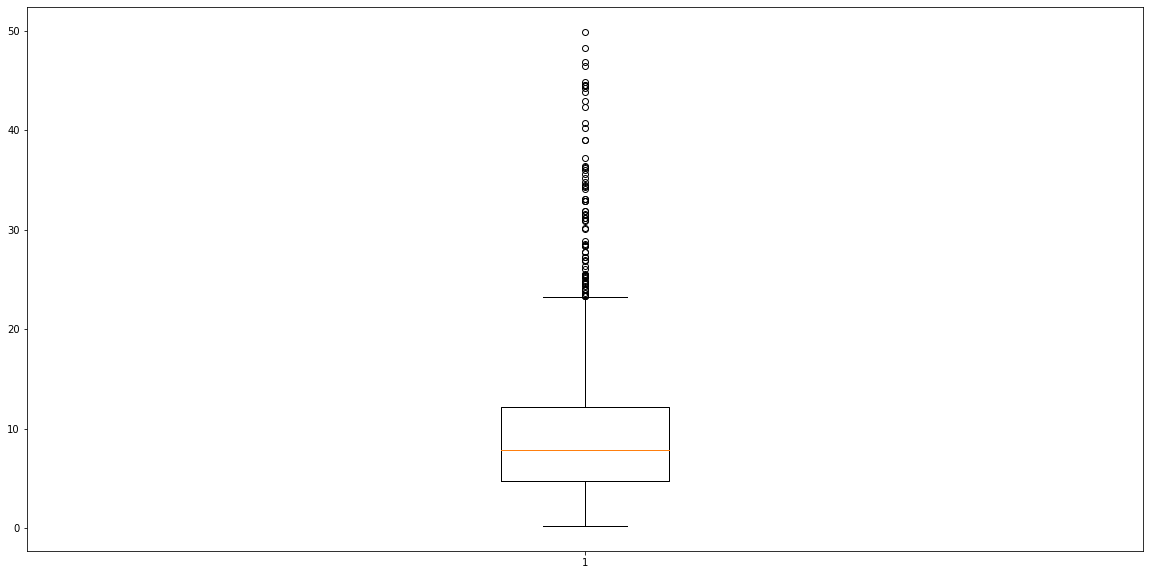


Principales estadísticos: 
count    1901.000000
mean        9.428901
std         6.890721
min         0.200000
25%         4.720000
50%         7.850000
75%        12.140000
max        49.890000
Name: PctLess9thGrade, dtype: float64

Asimetría: 1.996506683153689
Curtosis: 5.968742447228298

 ****************************************************************************************** 


Columna: PctNotHSGrad

Histograma:
(2.018, 8.054]      124
(8.054, 14.018]     344
(14.018, 19.982]    378
(19.982, 25.947]    386
(25.947, 31.911]    314
(31.911, 37.875]    179
(37.875, 43.839]    101
(43.839, 49.803]     39
(49.803, 55.768]     19
(55.768, 61.732]     10
(61.732, 67.696]      3
(67.696, 73.66]       4
Name: PctNotHSGrad, dtype: int64


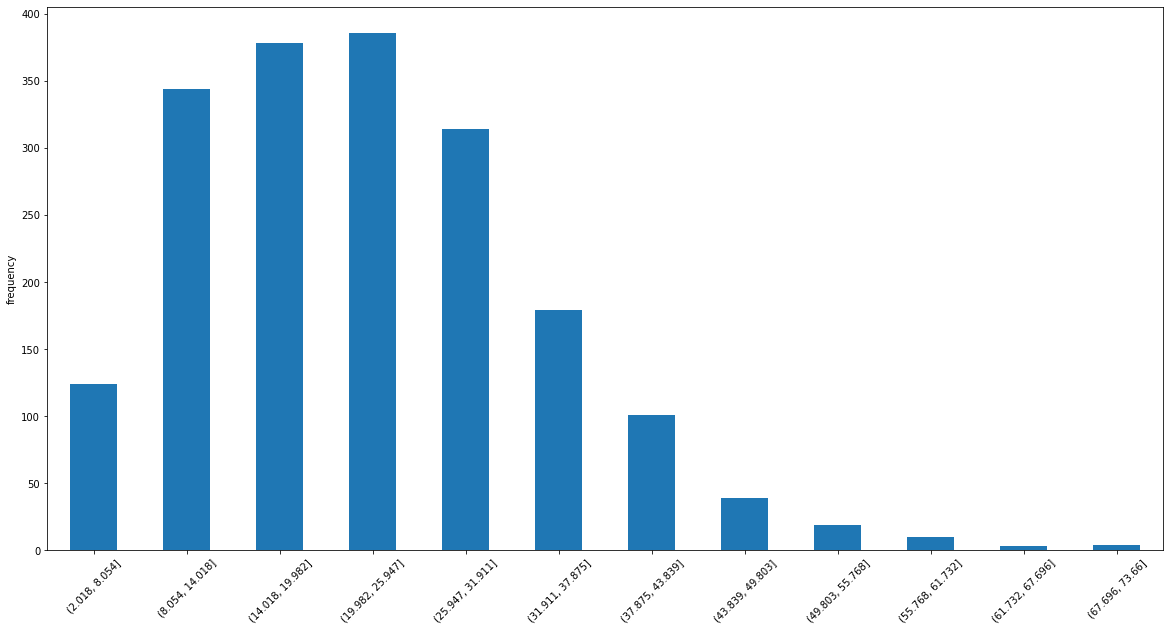


Boxplot:


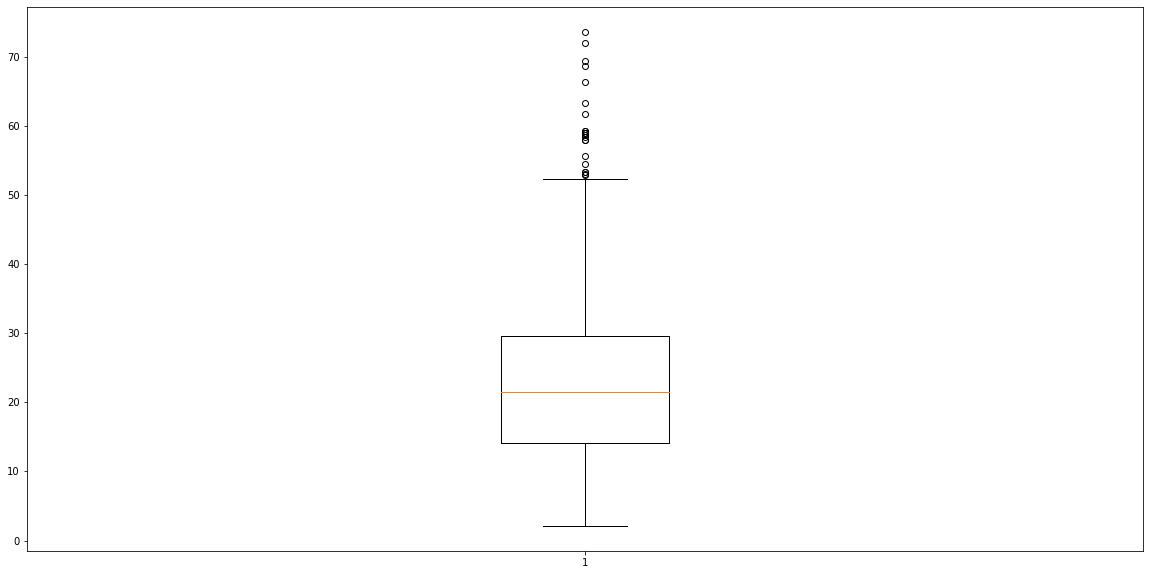


Principales estadísticos: 
count    1901.000000
mean       22.656597
std        11.079400
min         2.090000
25%        14.160000
50%        21.540000
75%        29.590000
max        73.660000
Name: PctNotHSGrad, dtype: float64

Asimetría: 0.7555867155025079
Curtosis: 0.7973955349445419

 ****************************************************************************************** 


Columna: PctBSorMore

Histograma:
(1.558, 7.63]      54
(7.63, 13.63]     378
(13.63, 19.63]    514
(19.63, 25.63]    341
(25.63, 31.63]    227
(31.63, 37.63]    141
(37.63, 43.63]     97
(43.63, 49.63]     60
(49.63, 55.63]     38
(55.63, 61.63]     33
(61.63, 67.63]     13
(67.63, 73.63]      5
Name: PctBSorMore, dtype: int64


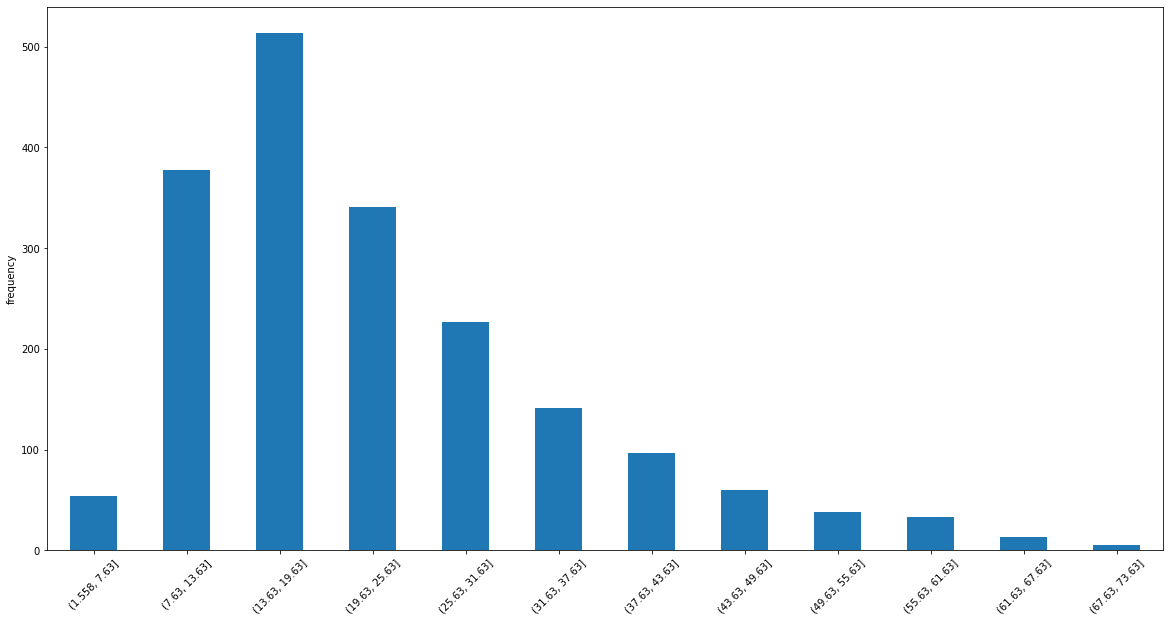


Boxplot:


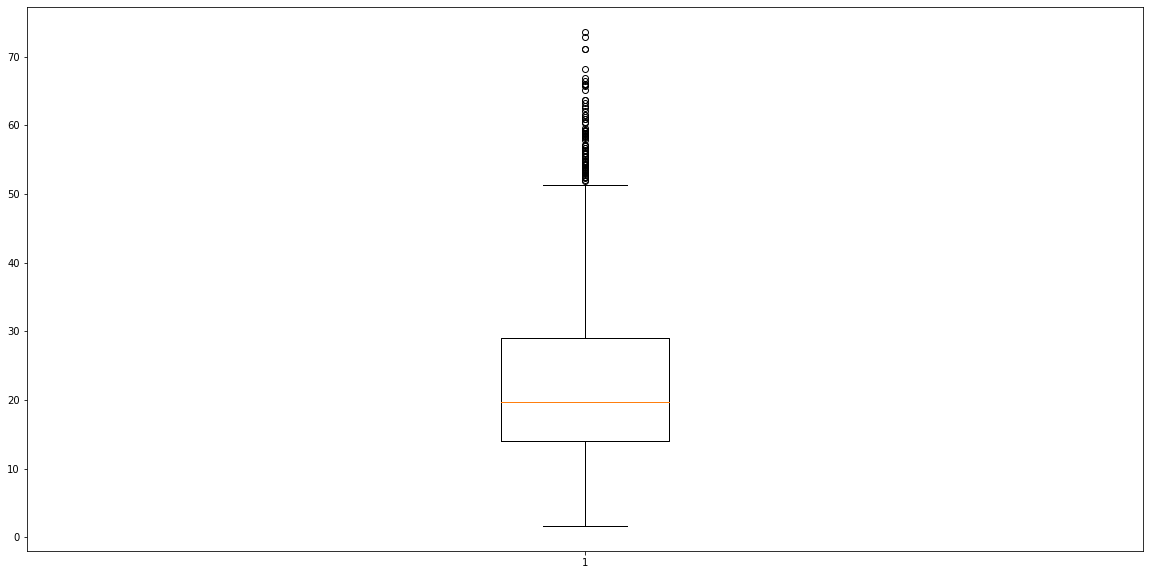


Principales estadísticos: 
count    1901.000000
mean       23.034403
std        12.547890
min         1.630000
25%        14.080000
50%        19.690000
75%        29.000000
max        73.630000
Name: PctBSorMore, dtype: float64

Asimetría: 1.2253445211929865
Curtosis: 1.2776352096228911

 ****************************************************************************************** 


Columna: PctUnemployed

Histograma:
(1.297, 3.196]      220
(3.196, 5.072]      594
(5.072, 6.948]      513
(6.948, 8.823]      319
(8.823, 10.699]     143
(10.699, 12.575]     63
(12.575, 14.451]     24
(14.451, 16.327]     13
(16.327, 18.202]      9
(18.202, 20.078]      2
(20.078, 21.954]      0
(21.954, 23.83]       1
Name: PctUnemployed, dtype: int64


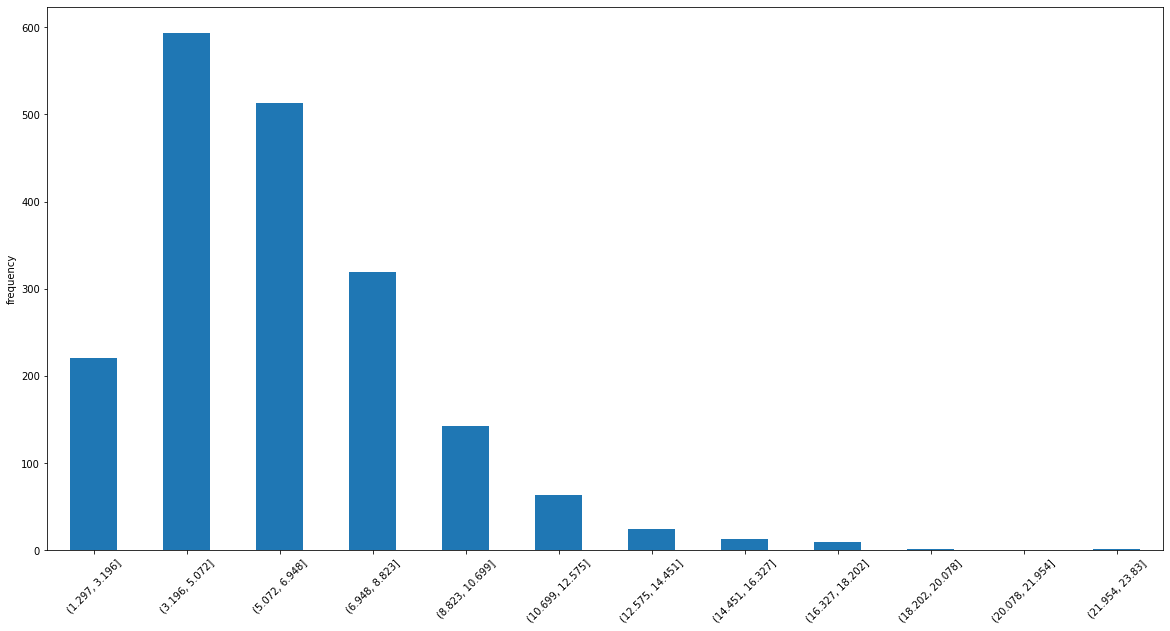


Boxplot:


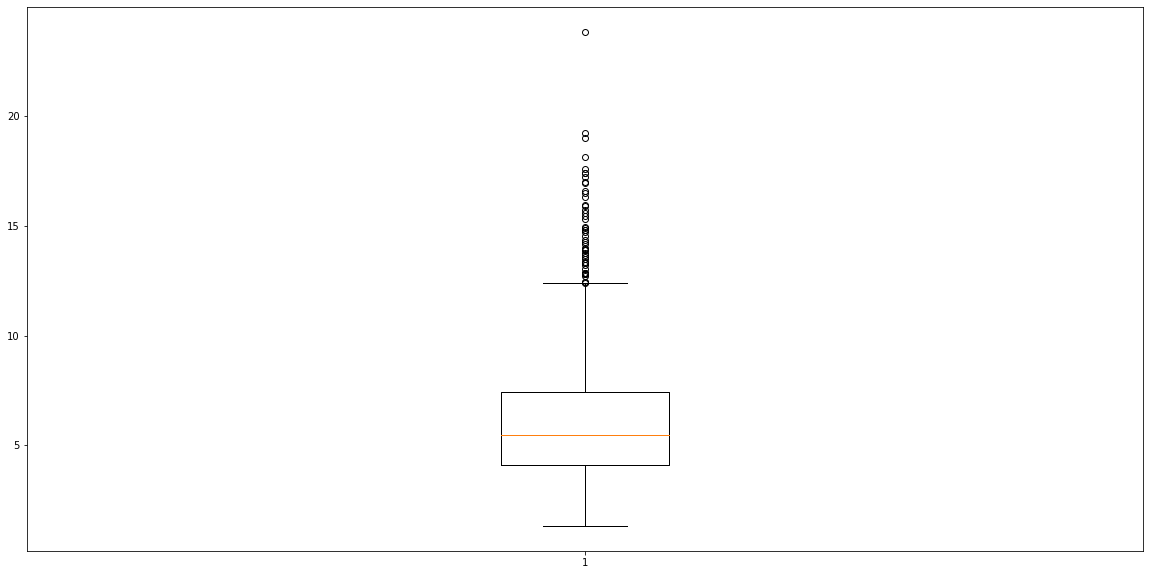


Principales estadísticos: 
count    1901.000000
mean        6.009932
std         2.705395
min         1.320000
25%         4.090000
50%         5.470000
75%         7.410000
max        23.830000
Name: PctUnemployed, dtype: float64

Asimetría: 1.3125851537876905
Curtosis: 2.9495187780535246

 ****************************************************************************************** 


Columna: PctEmploy

Histograma:
(24.76, 29.808]       5
(29.808, 34.795]      2
(34.795, 39.782]      4
(39.782, 44.77]      33
(44.77, 49.758]      93
(49.758, 54.745]    219
(54.745, 59.732]    341
(59.732, 64.72]     464
(64.72, 69.708]     422
(69.708, 74.695]    246
(74.695, 79.682]     62
(79.682, 84.67]      10
Name: PctEmploy, dtype: int64


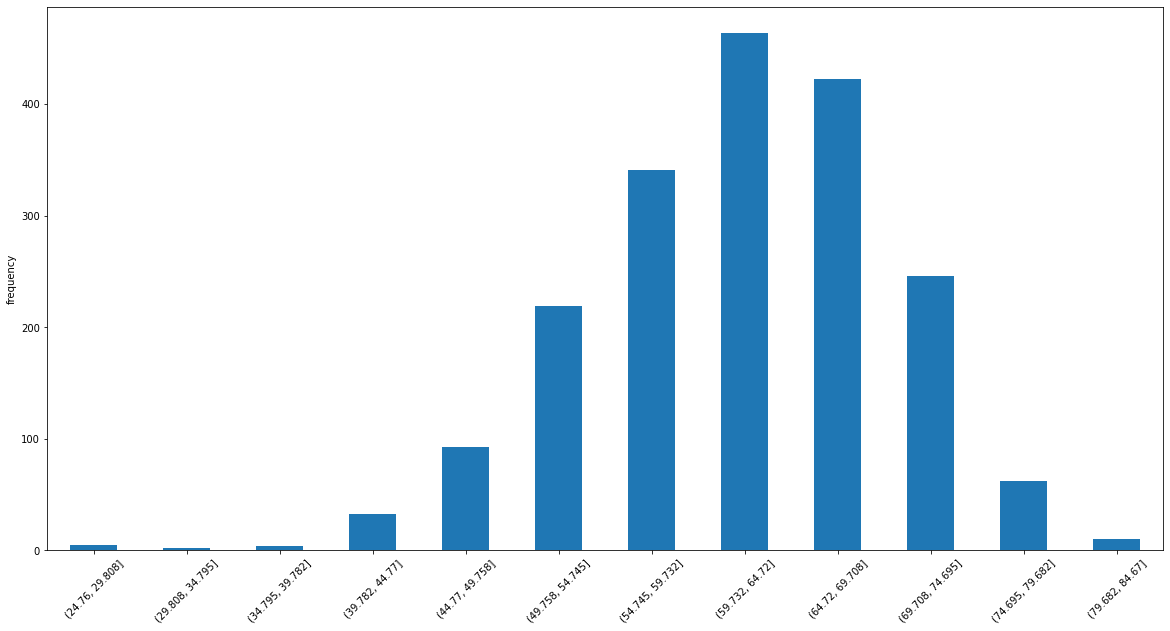


Boxplot:


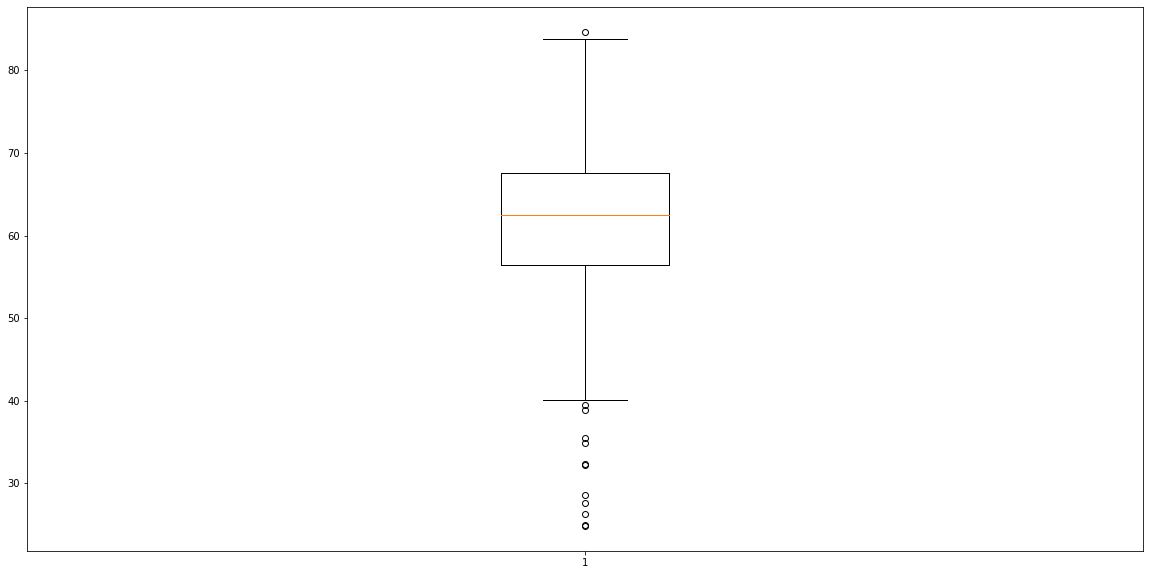


Principales estadísticos: 
count    1901.000000
mean       61.872741
std         8.092513
min        24.820000
25%        56.470000
50%        62.470000
75%        67.550000
max        84.670000
Name: PctEmploy, dtype: float64

Asimetría: -0.45781171590445857
Curtosis: 0.6516112323299761

 ****************************************************************************************** 


Columna: PctEmplManu

Histograma:
(2.002, 6.048]       78
(6.048, 10.047]     245
(10.047, 14.045]    373
(14.045, 18.043]    387
(18.043, 22.042]    306
(22.042, 26.04]     207
(26.04, 30.038]     153
(30.038, 34.037]     72
(34.037, 38.035]     48
(38.035, 42.033]     21
(42.033, 46.032]      6
(46.032, 50.03]       5
Name: PctEmplManu, dtype: int64


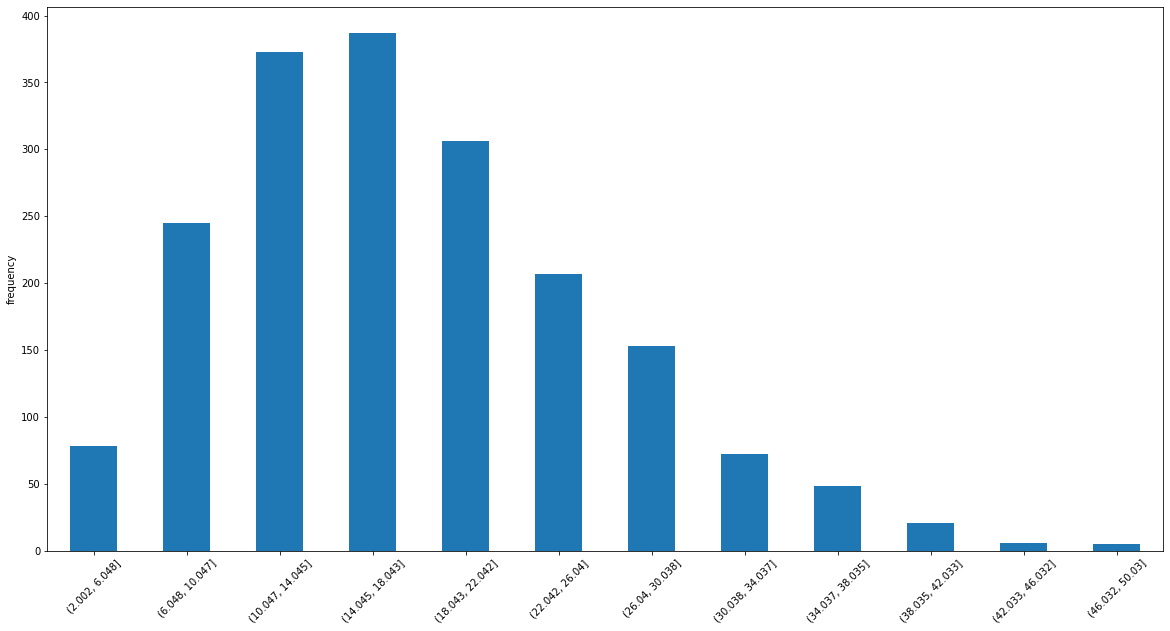


Boxplot:


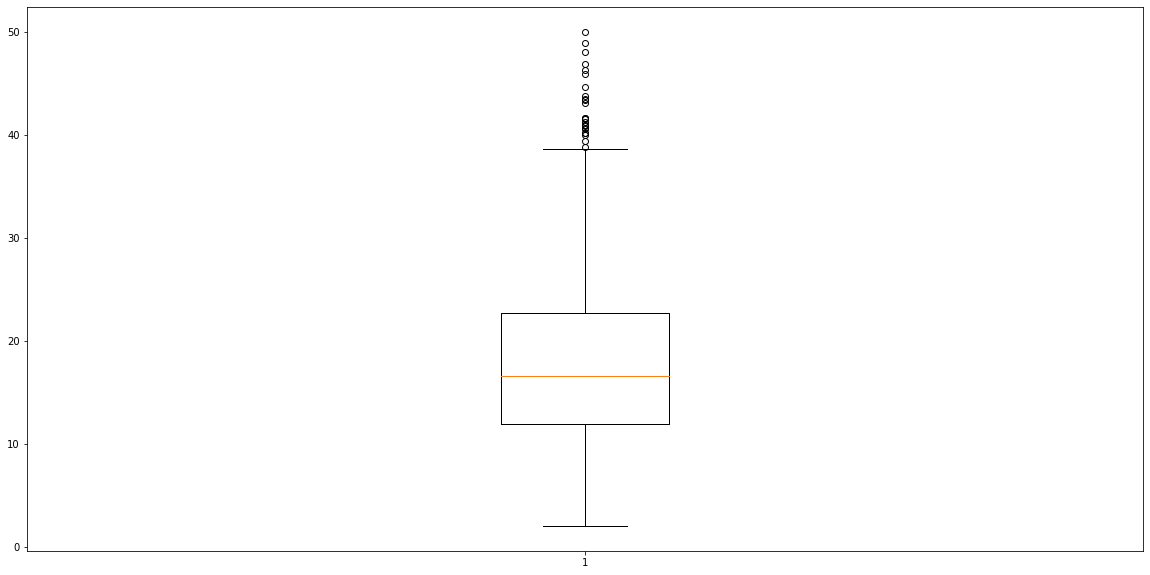


Principales estadísticos: 
count    1901.000000
mean       17.795781
std         8.095086
min         2.050000
25%        11.980000
50%        16.670000
75%        22.720000
max        50.030000
Name: PctEmplManu, dtype: float64

Asimetría: 0.7184338941076003
Curtosis: 0.4020827331074126

 ****************************************************************************************** 


Columna: PctEmplProfServ

Histograma:
(8.636, 13.188]      22
(13.188, 17.687]    179
(17.687, 22.185]    570
(22.185, 26.683]    561
(26.683, 31.182]    329
(31.182, 35.68]     125
(35.68, 40.178]      59
(40.178, 44.677]     26
(44.677, 49.175]     16
(49.175, 53.673]      8
(53.673, 58.172]      2
(58.172, 62.67]       4
Name: PctEmplProfServ, dtype: int64


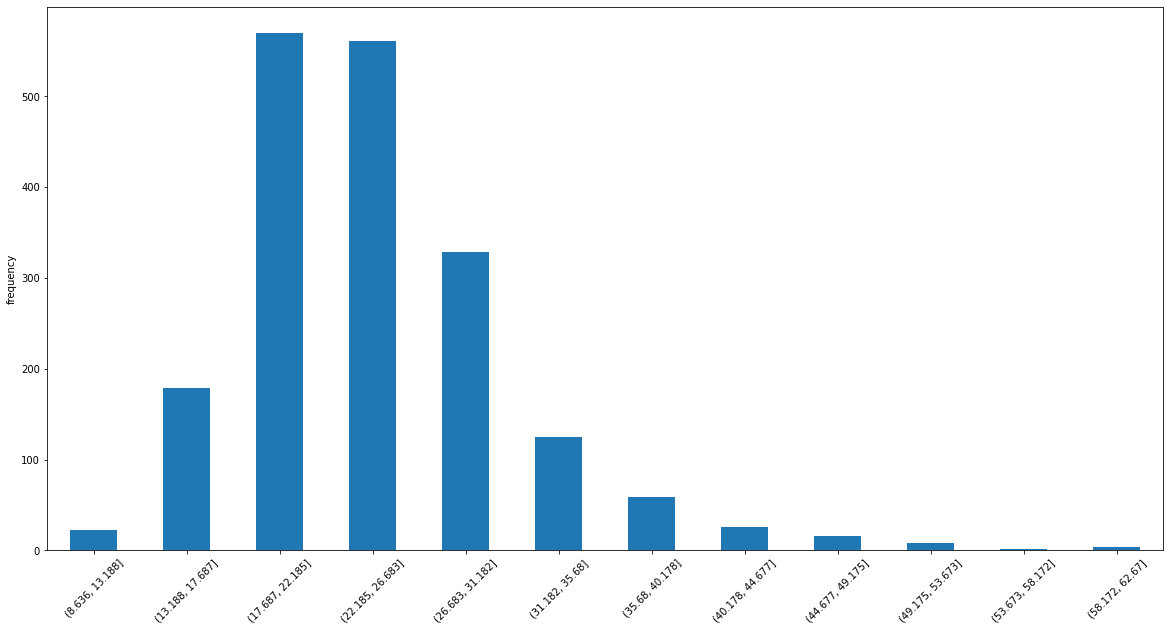


Boxplot:


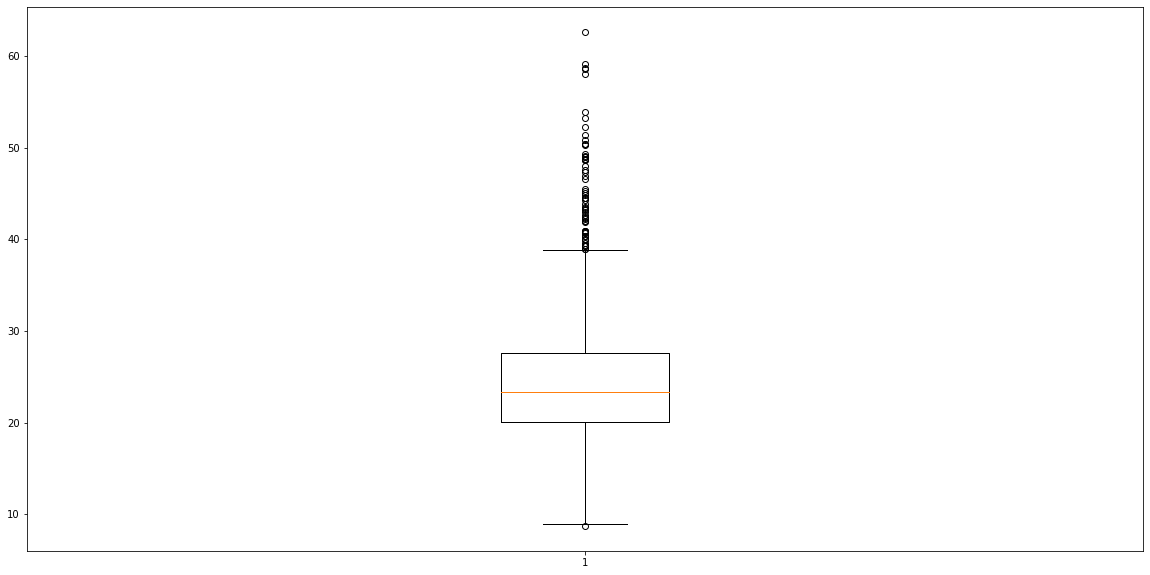


Principales estadísticos: 
count    1901.000000
mean       24.467948
std         6.658068
min         8.690000
25%        20.060000
50%        23.290000
75%        27.590000
max        62.670000
Name: PctEmplProfServ, dtype: float64

Asimetría: 1.3718169940387082
Curtosis: 3.542459450746446

 ****************************************************************************************** 


Columna: PctOccupManu

Histograma:
(1.327, 4.945]     115
(4.945, 8.52]      301
(8.52, 12.095]     423
(12.095, 15.67]    420
(15.67, 19.245]    312
(19.245, 22.82]    169
(22.82, 26.395]     83
(26.395, 29.97]     50
(29.97, 33.545]     13
(33.545, 37.12]      7
(37.12, 40.695]      4
(40.695, 44.27]      4
Name: PctOccupManu, dtype: int64


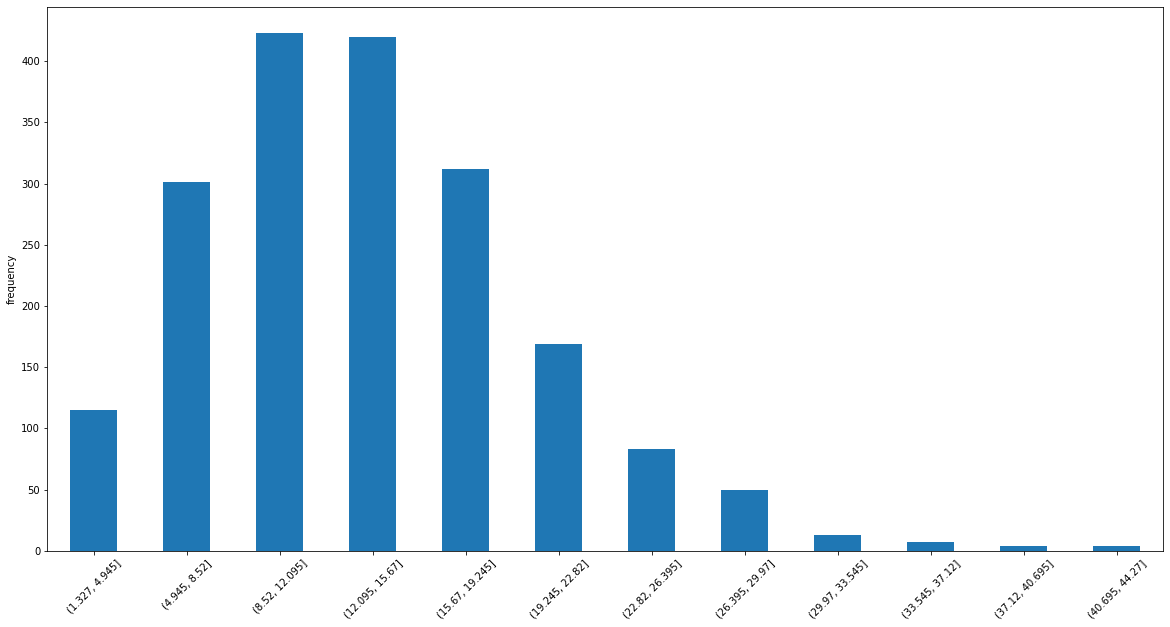


Boxplot:


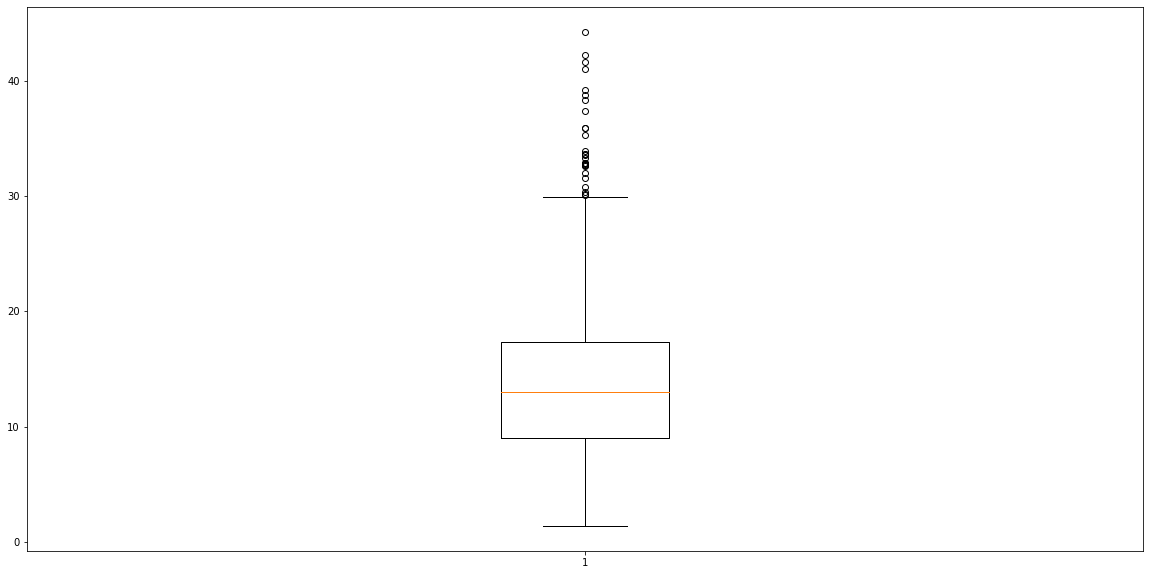


Principales estadísticos: 
count    1901.000000
mean       13.699763
std         6.412003
min         1.370000
25%         9.000000
50%        13.000000
75%        17.380000
max        44.270000
Name: PctOccupManu, dtype: float64

Asimetría: 0.7932337664892734
Curtosis: 1.0796799808733533

 ****************************************************************************************** 


Columna: PctOccupMgmtProf

Histograma:
(6.422, 11.354]      16
(11.354, 16.228]     69
(16.228, 21.102]    317
(21.102, 25.977]    519
(25.977, 30.851]    397
(30.851, 35.725]    224
(35.725, 40.599]    143
(40.599, 45.473]     96
(45.473, 50.348]     61
(50.348, 55.222]     35
(55.222, 60.096]     21
(60.096, 64.97]       3
Name: PctOccupMgmtProf, dtype: int64


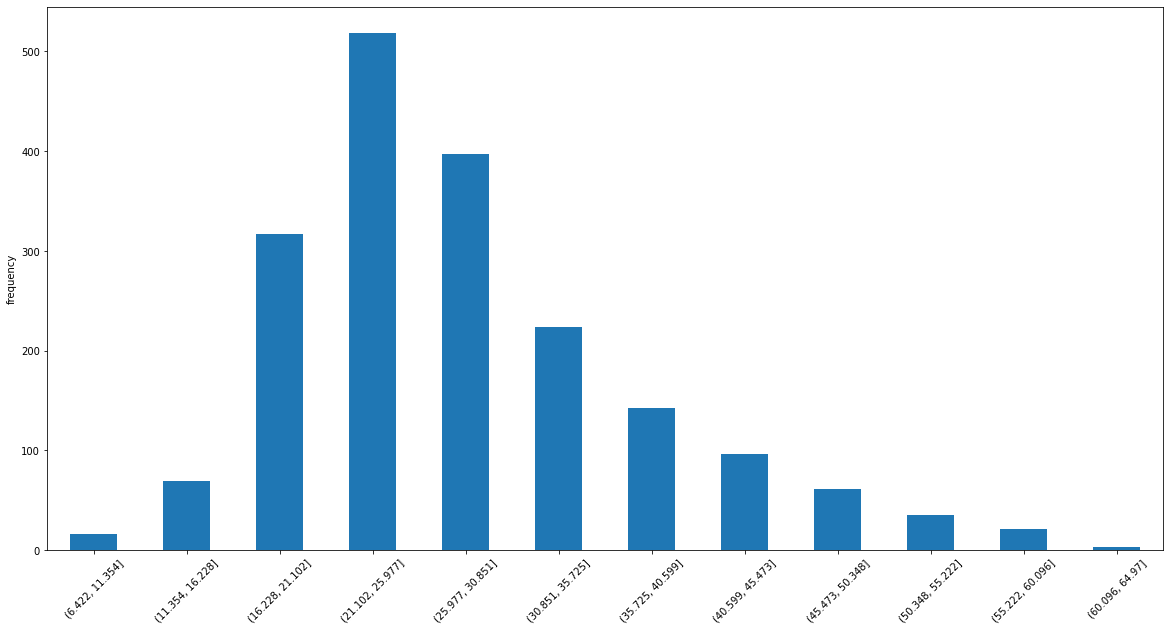


Boxplot:


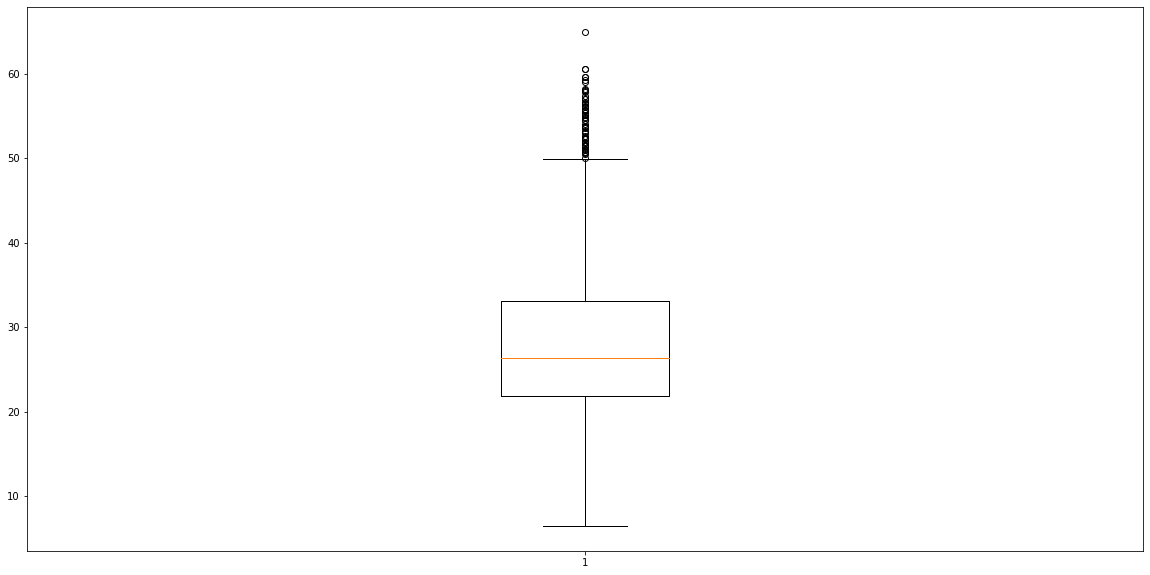


Principales estadísticos: 
count    1901.000000
mean       28.278206
std         9.315442
min         6.480000
25%        21.850000
50%        26.320000
75%        33.090000
max        64.970000
Name: PctOccupMgmtProf, dtype: float64

Asimetría: 0.9409073012344359
Curtosis: 0.7960598493820785

 ****************************************************************************************** 


Columna: MalePctDivorce

Histograma:
(2.113, 3.543]       29
(3.543, 4.957]      100
(4.957, 6.37]       214
(6.37, 7.783]       276
(7.783, 9.197]      328
(9.197, 10.61]      345
(10.61, 12.023]     312
(12.023, 13.437]    182
(13.437, 14.85]      70
(14.85, 16.263]      33
(16.263, 17.677]      9
(17.677, 19.09]       3
Name: MalePctDivorce, dtype: int64


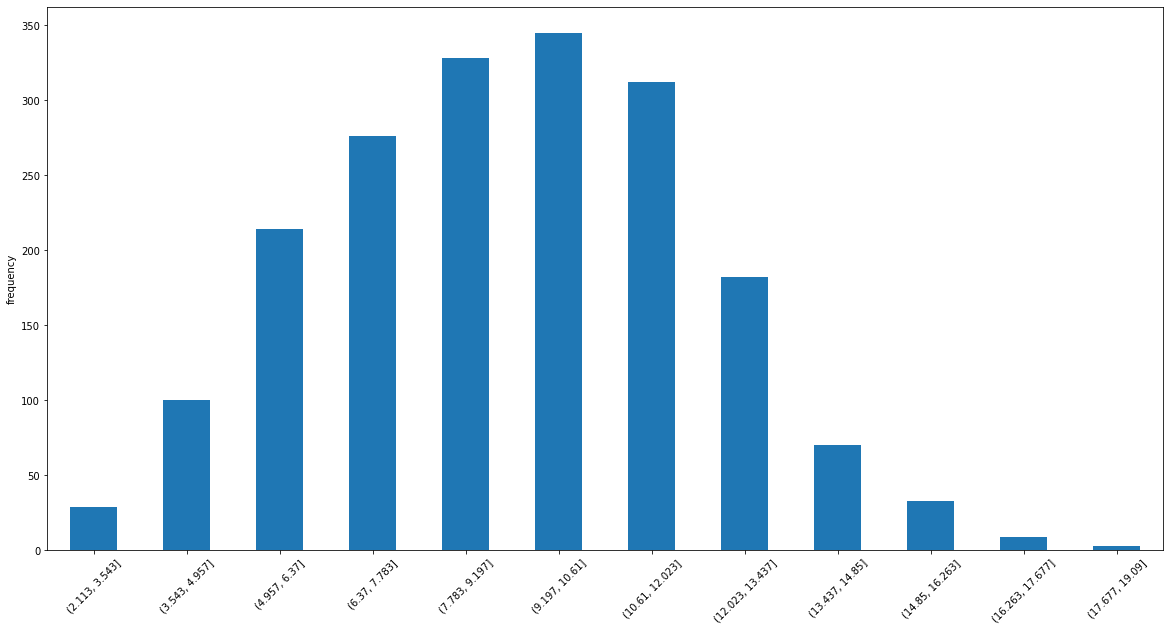


Boxplot:


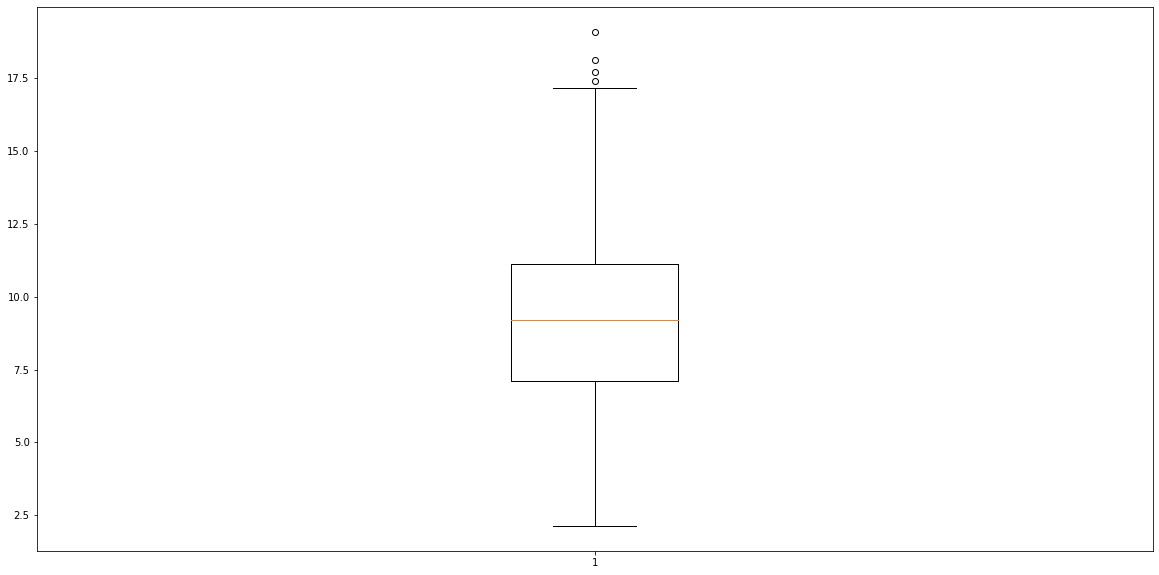


Principales estadísticos: 
count    1901.000000
mean        9.171852
std         2.813866
min         2.130000
25%         7.110000
50%         9.200000
75%        11.130000
max        19.090000
Name: MalePctDivorce, dtype: float64

Asimetría: 0.09157872908862172
Curtosis: -0.34159617837118095

 ****************************************************************************************** 


Columna: MalePctNevMarr

Histograma:
(11.996, 17.415]     10
(17.415, 22.77]     169
(22.77, 28.125]     647
(28.125, 33.48]     605
(33.48, 38.835]     245
(38.835, 44.19]     114
(44.19, 49.545]      44
(49.545, 54.9]       25
(54.9, 60.255]       24
(60.255, 65.61]       7
(65.61, 70.965]       4
(70.965, 76.32]       7
Name: MalePctNevMarr, dtype: int64


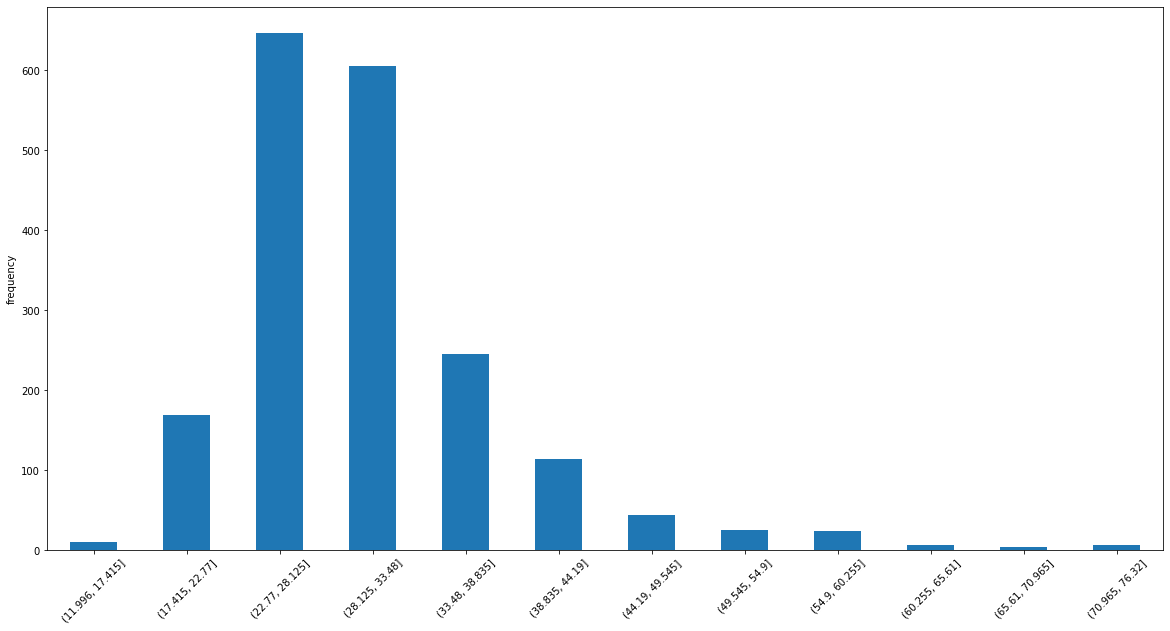


Boxplot:


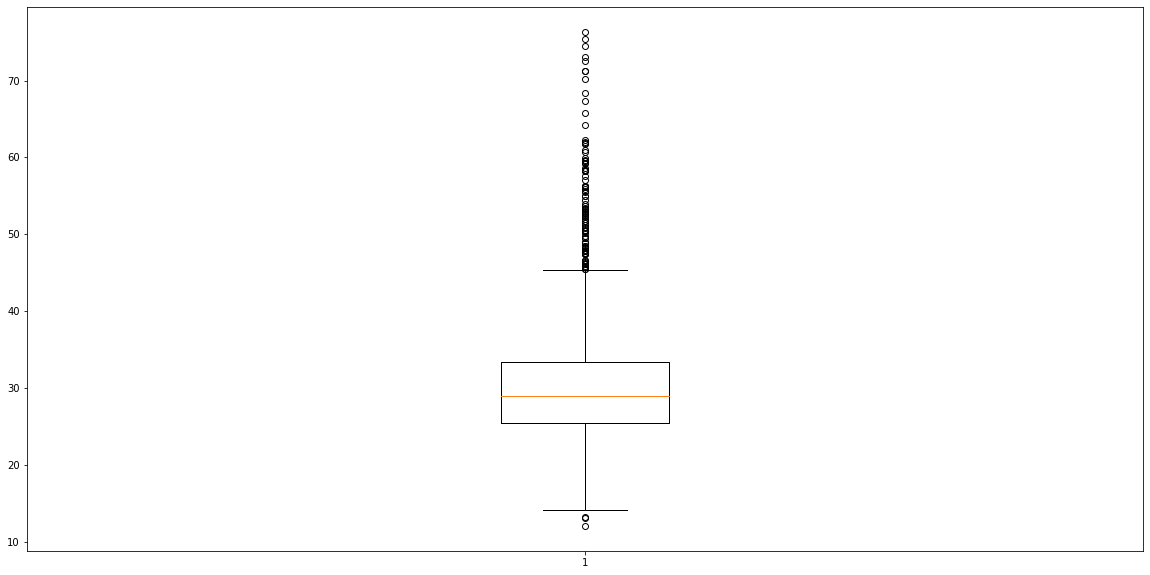


Principales estadísticos: 
count    1901.000000
mean       30.654561
std         8.045644
min        12.060000
25%        25.450000
50%        29.020000
75%        33.440000
max        76.320000
Name: MalePctNevMarr, dtype: float64

Asimetría: 1.8007583734628299
Curtosis: 5.100055612119245

 ****************************************************************************************** 


Columna: FemalePctDiv

Histograma:
(3.33, 5.026]        15
(5.026, 6.702]       59
(6.702, 8.378]      181
(8.378, 10.053]     249
(10.053, 11.729]    268
(11.729, 13.405]    346
(13.405, 15.081]    359
(15.081, 16.757]    261
(16.757, 18.432]    114
(18.432, 20.108]     42
(20.108, 21.784]      5
(21.784, 23.46]       2
Name: FemalePctDiv, dtype: int64


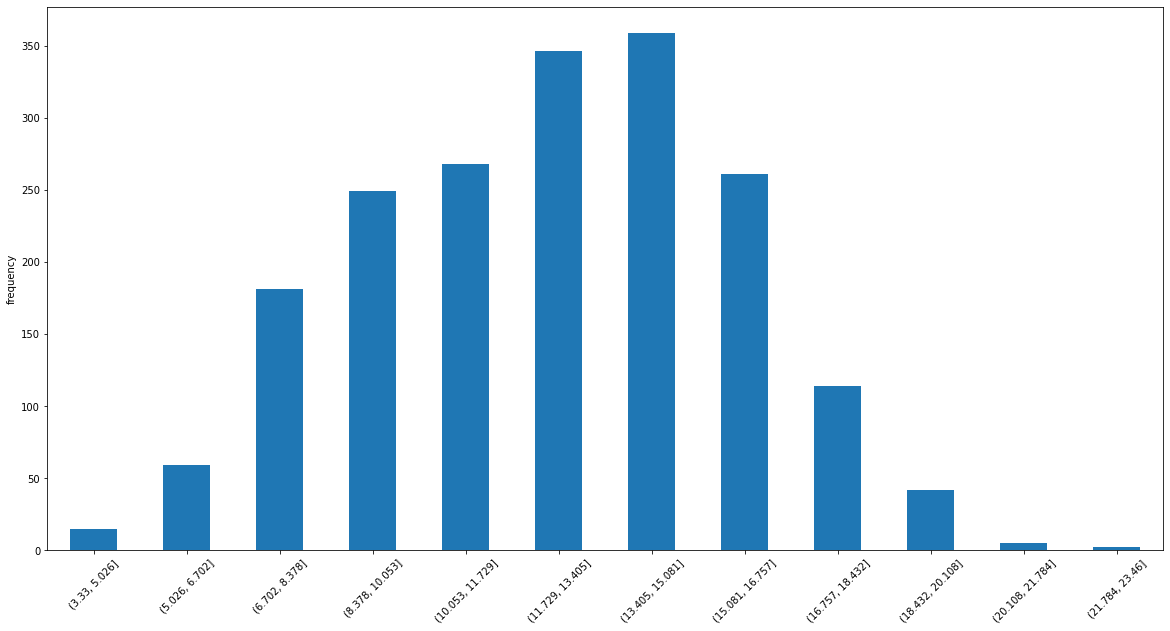


Boxplot:


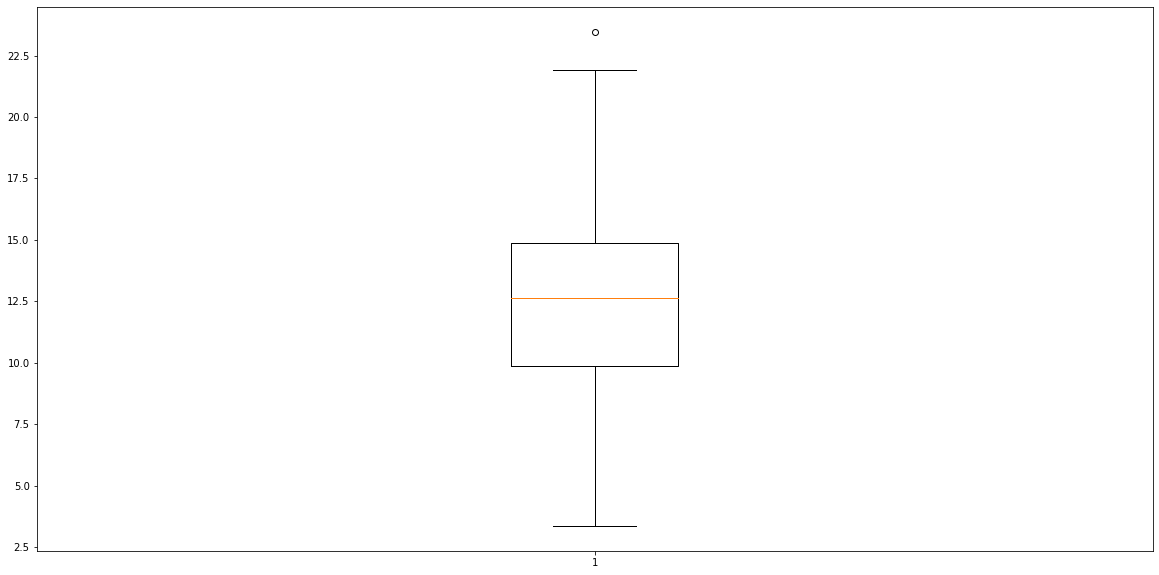


Principales estadísticos: 
count    1901.000000
mean       12.393019
std         3.286266
min         3.350000
25%         9.870000
50%        12.630000
75%        14.870000
max        23.460000
Name: FemalePctDiv, dtype: float64

Asimetría: -0.10606483458102142
Curtosis: -0.5732272712720006

 ****************************************************************************************** 


Columna: TotalPctDiv

Histograma:
(2.814, 4.187]       14
(4.187, 5.543]       47
(5.543, 6.9]        152
(6.9, 8.257]        214
(8.257, 9.613]      239
(9.613, 10.97]      270
(10.97, 12.327]     318
(12.327, 13.683]    305
(13.683, 15.04]     193
(15.04, 16.397]      99
(16.397, 17.753]     36
(17.753, 19.11]      14
Name: TotalPctDiv, dtype: int64


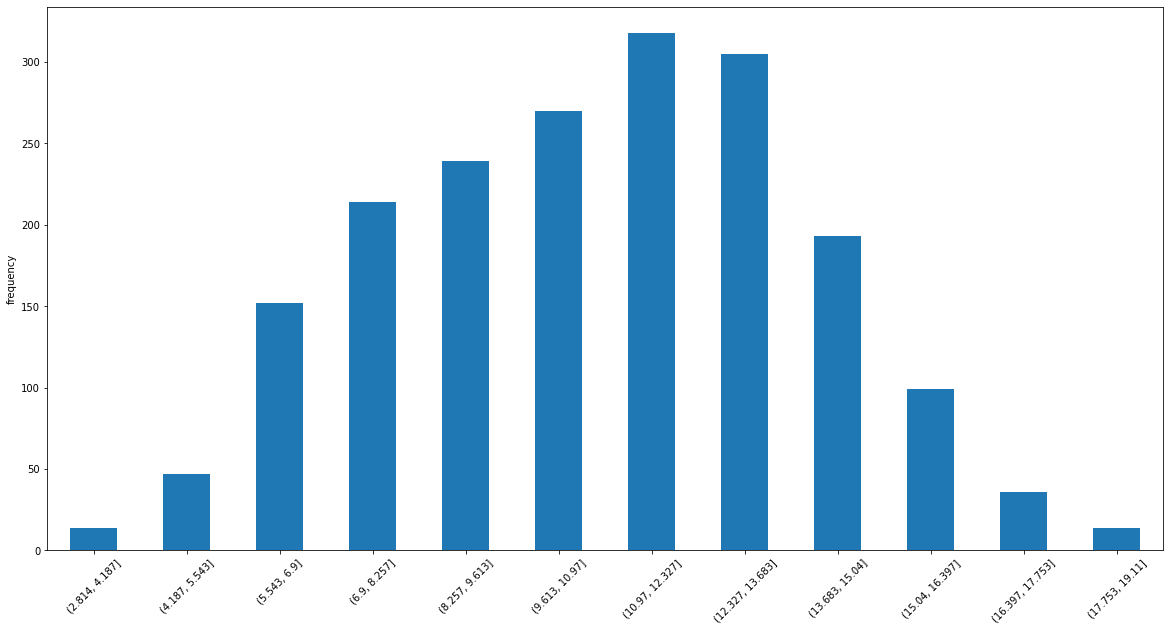


Boxplot:


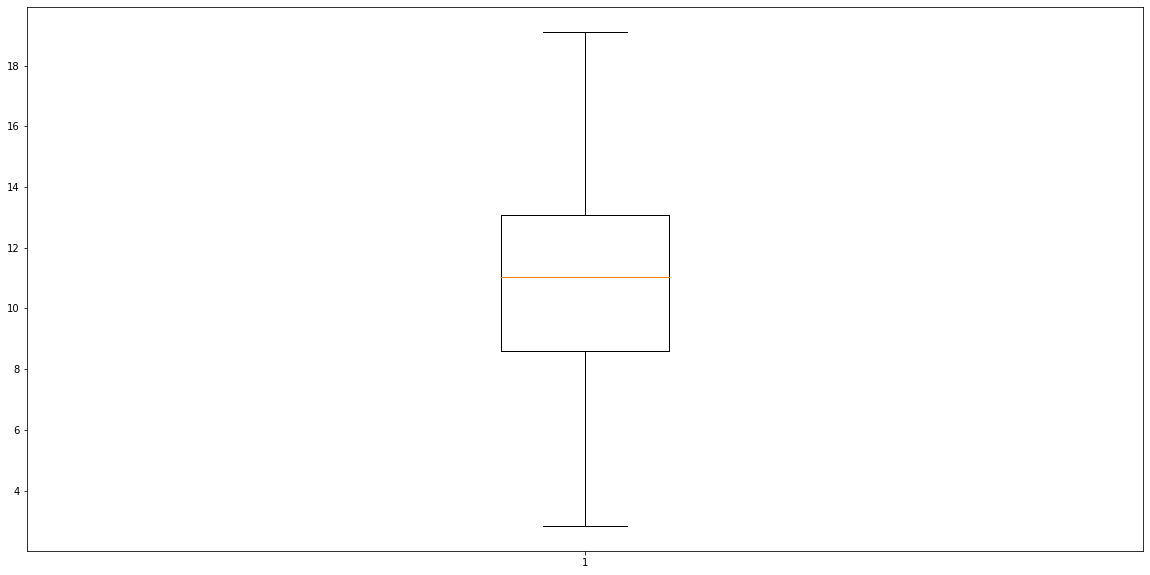


Principales estadísticos: 
count    1901.000000
mean       10.867307
std         3.016394
min         2.830000
25%         8.590000
50%        11.030000
75%        13.080000
max        19.110000
Name: TotalPctDiv, dtype: float64

Asimetría: -0.05393712294006565
Curtosis: -0.5631610806225829

 ****************************************************************************************** 


Columna: PersPerFam

Histograma:
(2.288, 2.486]      5
(2.486, 2.682]     19
(2.682, 2.878]    141
(2.878, 3.073]    691
(3.073, 3.269]    686
(3.269, 3.465]    222
(3.465, 3.661]     66
(3.661, 3.857]     29
(3.857, 4.052]     13
(4.052, 4.248]     18
(4.248, 4.444]      6
(4.444, 4.64]       5
Name: PersPerFam, dtype: int64


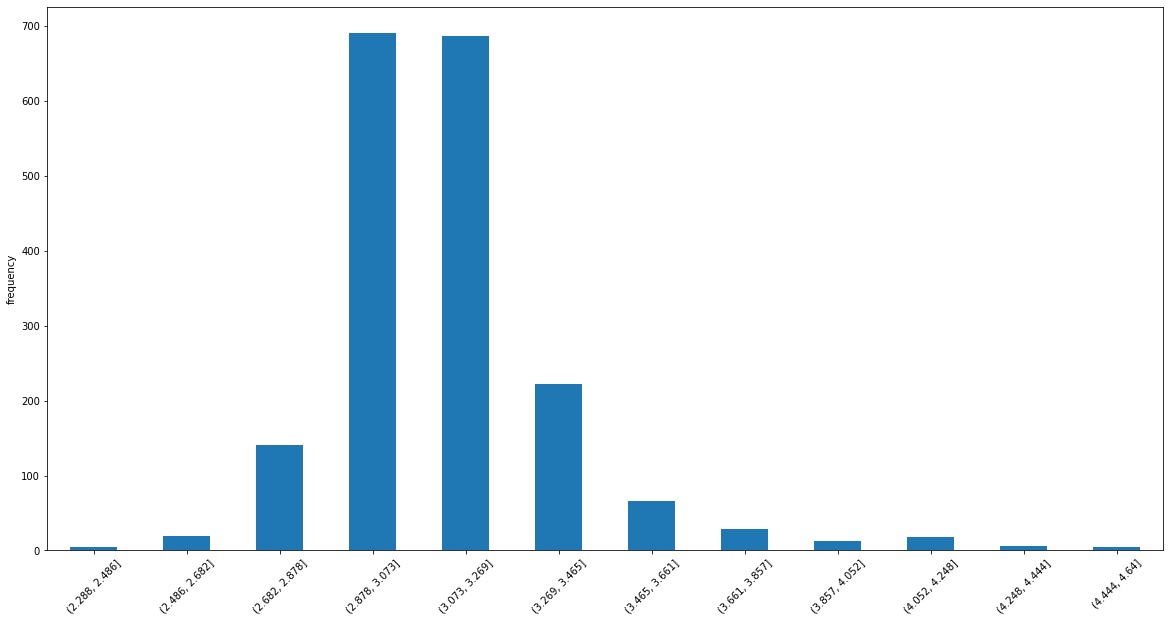


Boxplot:


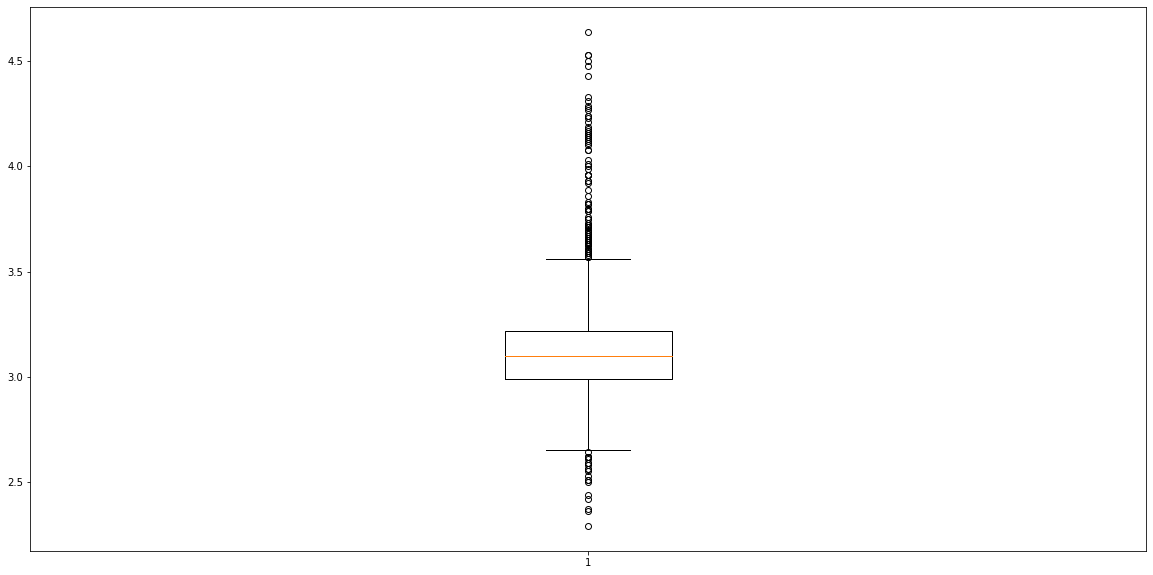


Principales estadísticos: 
count    1901.000000
mean        3.131694
std         0.252280
min         2.290000
25%         2.990000
50%         3.100000
75%         3.220000
max         4.640000
Name: PersPerFam, dtype: float64

Asimetría: 1.73018586712562
Curtosis: 6.2212370211529

 ****************************************************************************************** 


Columna: PctFam2Par

Histograma:
(32.179, 37.353]      4
(37.353, 42.467]      7
(42.467, 47.58]      17
(47.58, 52.693]      43
(52.693, 57.807]     69
(57.807, 62.92]     108
(62.92, 68.033]     238
(68.033, 73.147]    326
(73.147, 78.26]     380
(78.26, 83.373]     326
(83.373, 88.487]    264
(88.487, 93.6]      119
Name: PctFam2Par, dtype: int64


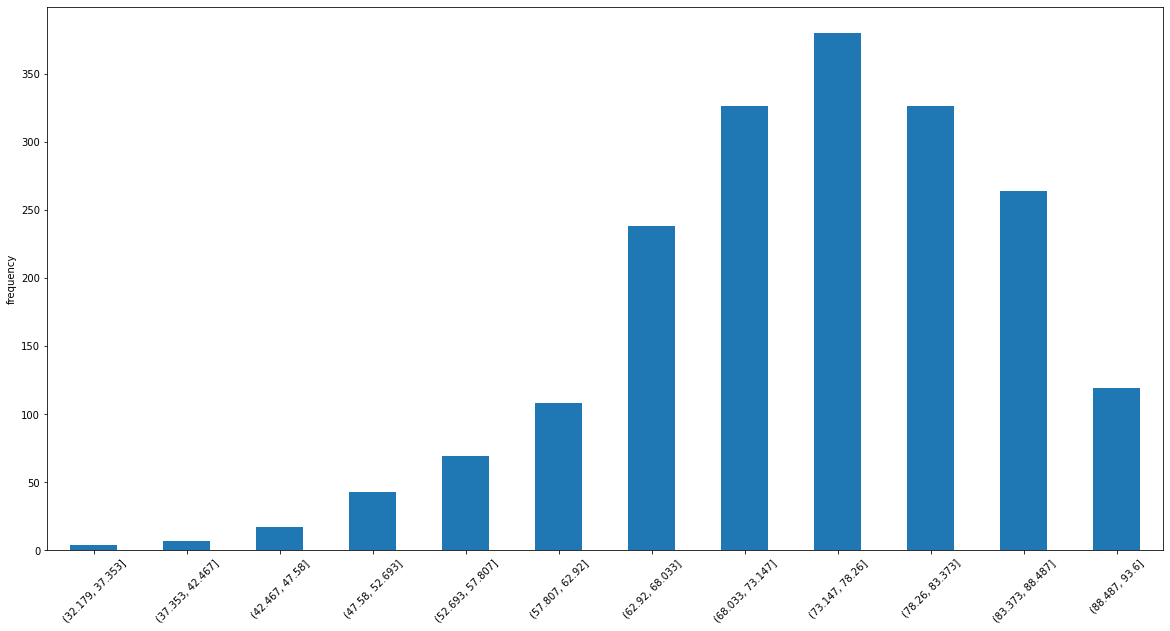


Boxplot:


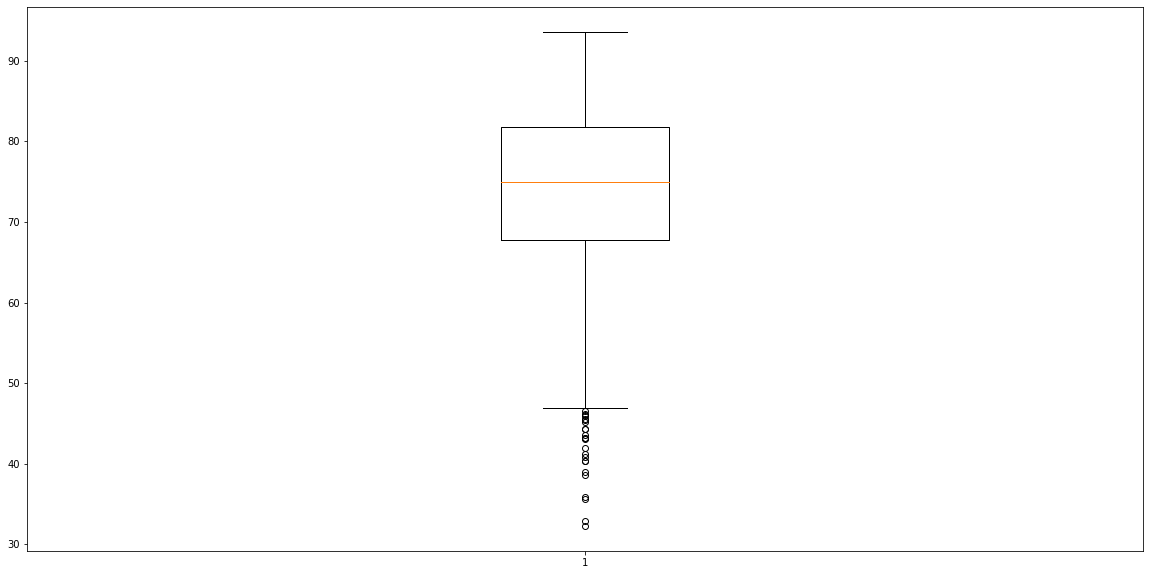


Principales estadísticos: 
count    1901.000000
mean       74.041152
std        10.301609
min        32.240000
25%        67.820000
50%        74.910000
75%        81.780000
max        93.600000
Name: PctFam2Par, dtype: float64

Asimetría: -0.6275483194607636
Curtosis: 0.38693619431776094

 ****************************************************************************************** 


Columna: PctKids2Par

Histograma:
(26.044, 31.649]      5
(31.649, 37.188]     12
(37.188, 42.728]     21
(42.728, 48.267]     57
(48.267, 53.806]     71
(53.806, 59.345]    123
(59.345, 64.884]    247
(64.884, 70.423]    314
(70.423, 75.962]    318
(75.962, 81.502]    335
(81.502, 87.041]    272
(87.041, 92.58]     126
Name: PctKids2Par, dtype: int64


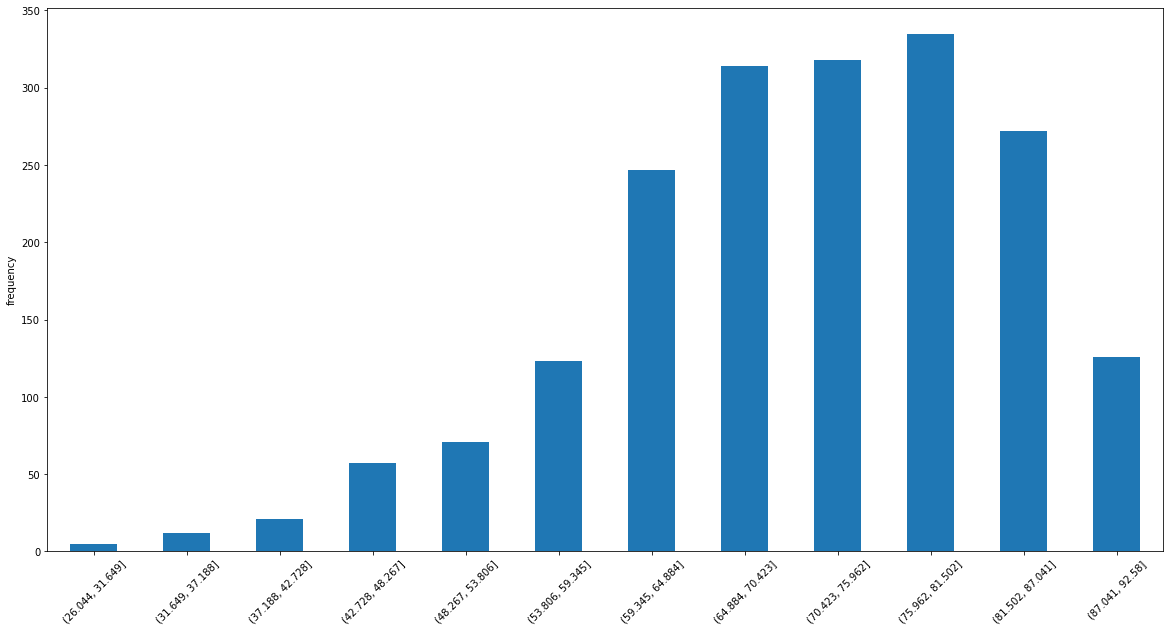


Boxplot:


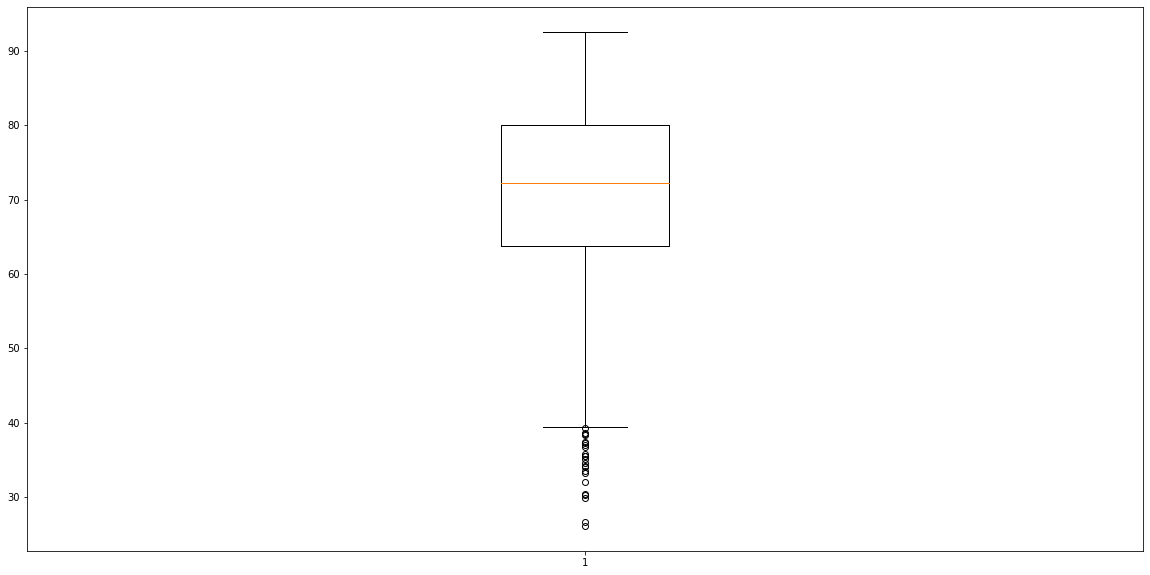


Principales estadísticos: 
count    1901.000000
mean       71.033051
std        11.851181
min        26.110000
25%        63.730000
50%        72.230000
75%        80.000000
max        92.580000
Name: PctKids2Par, dtype: float64

Asimetría: -0.6468965299493701
Curtosis: 0.24847851468210447

 ****************************************************************************************** 


Columna: PctYoungKids2Par

Histograma:
(27.357, 33.478]      3
(33.478, 39.525]      3
(39.525, 45.572]      7
(45.572, 51.62]      23
(51.62, 57.668]      44
(57.668, 63.715]     75
(63.715, 69.762]    141
(69.762, 75.81]     225
(75.81, 81.857]     302
(81.857, 87.905]    370
(87.905, 93.952]    408
(93.952, 100.0]     300
Name: PctYoungKids2Par, dtype: int64


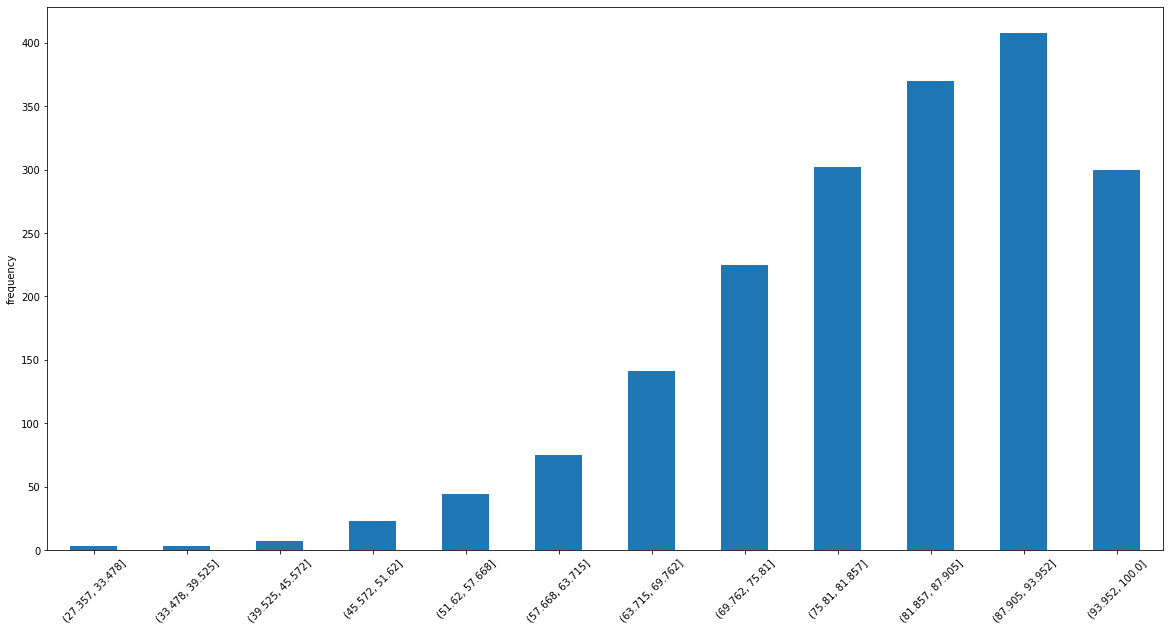


Boxplot:


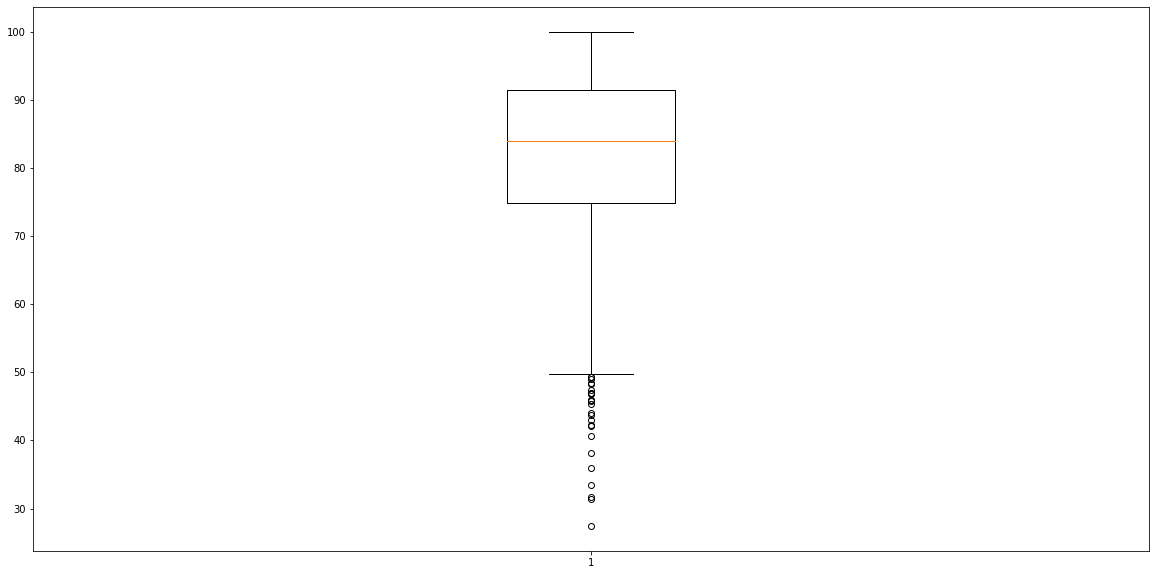


Principales estadísticos: 
count    1901.000000
mean       81.904719
std        11.982340
min        27.430000
25%        74.820000
50%        83.920000
75%        91.540000
max       100.000000
Name: PctYoungKids2Par, dtype: float64

Asimetría: -0.9003748726033562
Curtosis: 0.7228240108224862

 ****************************************************************************************** 


Columna: PctTeen2Par

Histograma:
(30.573, 36.198]      4
(36.198, 41.757]      8
(41.757, 47.315]     17
(47.315, 52.873]     29
(52.873, 58.432]     72
(58.432, 63.99]     123
(63.99, 69.548]     198
(69.548, 75.107]    354
(75.107, 80.665]    469
(80.665, 86.223]    372
(86.223, 91.782]    218
(91.782, 97.34]      37
Name: PctTeen2Par, dtype: int64


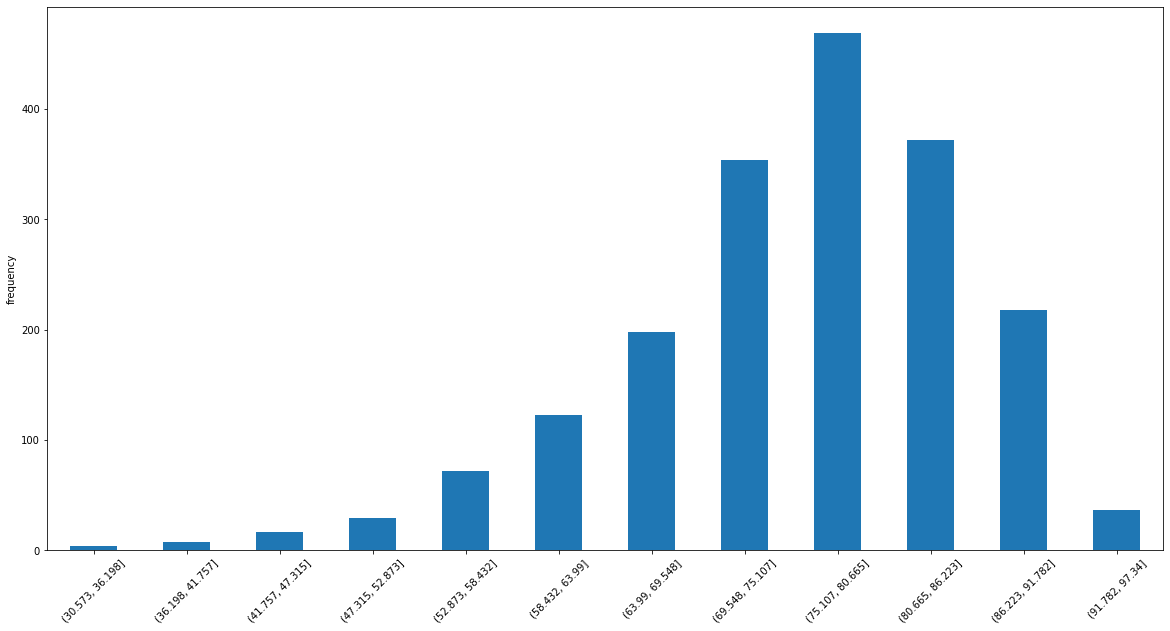


Boxplot:


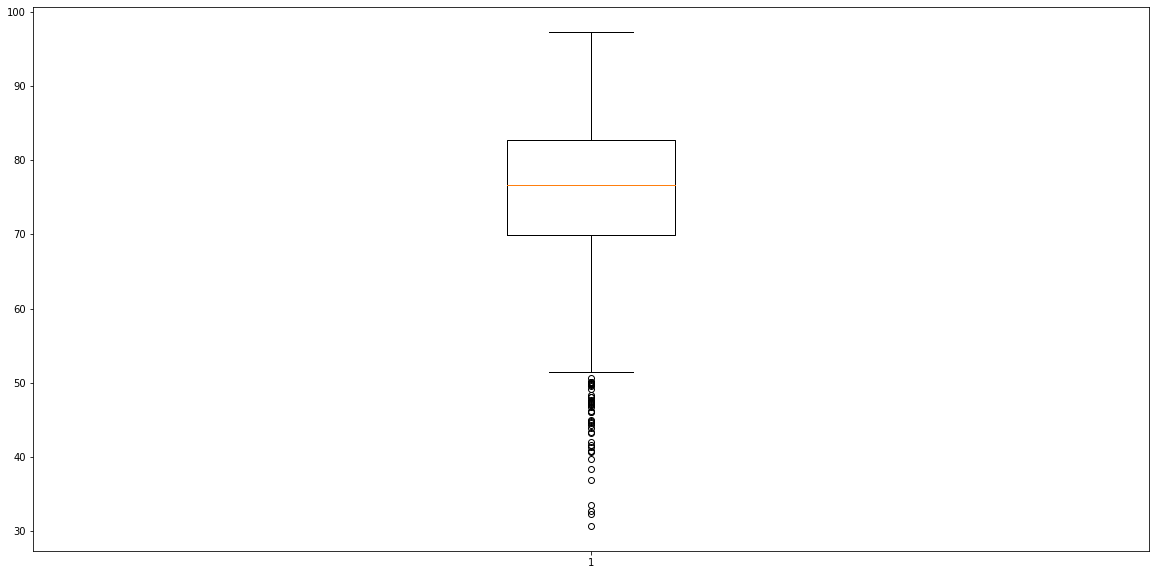


Principales estadísticos: 
count    1901.000000
mean       75.439274
std        10.268585
min        30.640000
25%        69.940000
50%        76.740000
75%        82.690000
max        97.340000
Name: PctTeen2Par, dtype: float64

Asimetría: -0.8390903926847263
Curtosis: 0.9621345136648984

 ****************************************************************************************** 


Columna: PctWorkMomYoungKids

Histograma:
(24.356, 29.716]      1
(29.716, 35.012]      3
(35.012, 40.308]     10
(40.308, 45.603]     54
(45.603, 50.899]    155
(50.899, 56.195]    330
(56.195, 61.491]    504
(61.491, 66.787]    454
(66.787, 72.083]    277
(72.083, 77.378]     84
(77.378, 82.674]     26
(82.674, 87.97]       3
Name: PctWorkMomYoungKids, dtype: int64


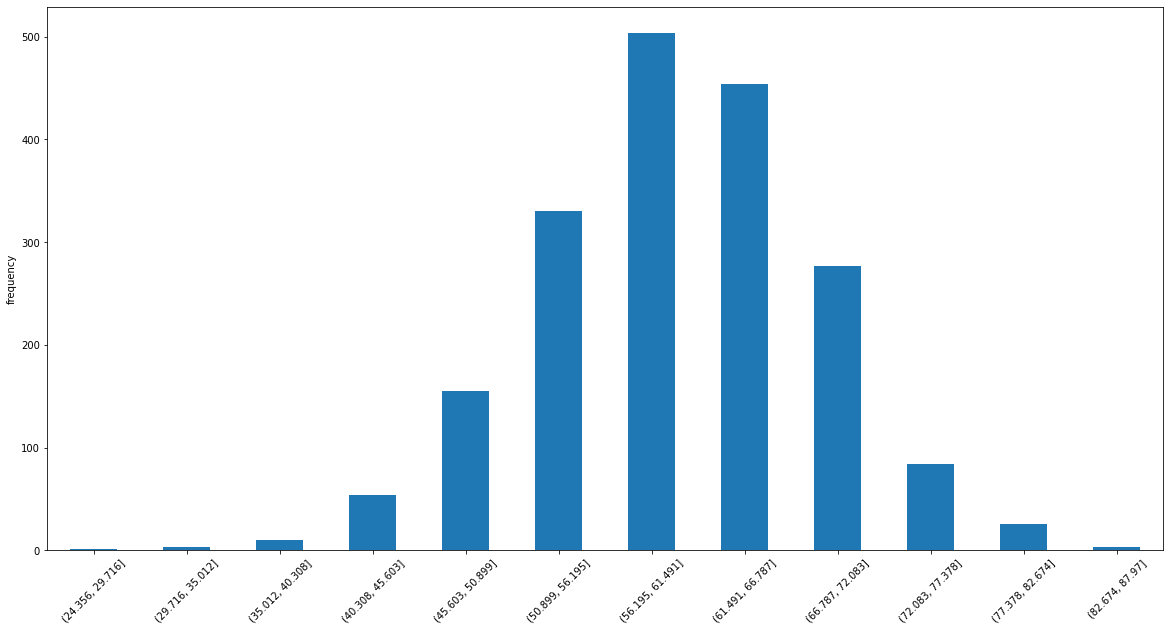


Boxplot:


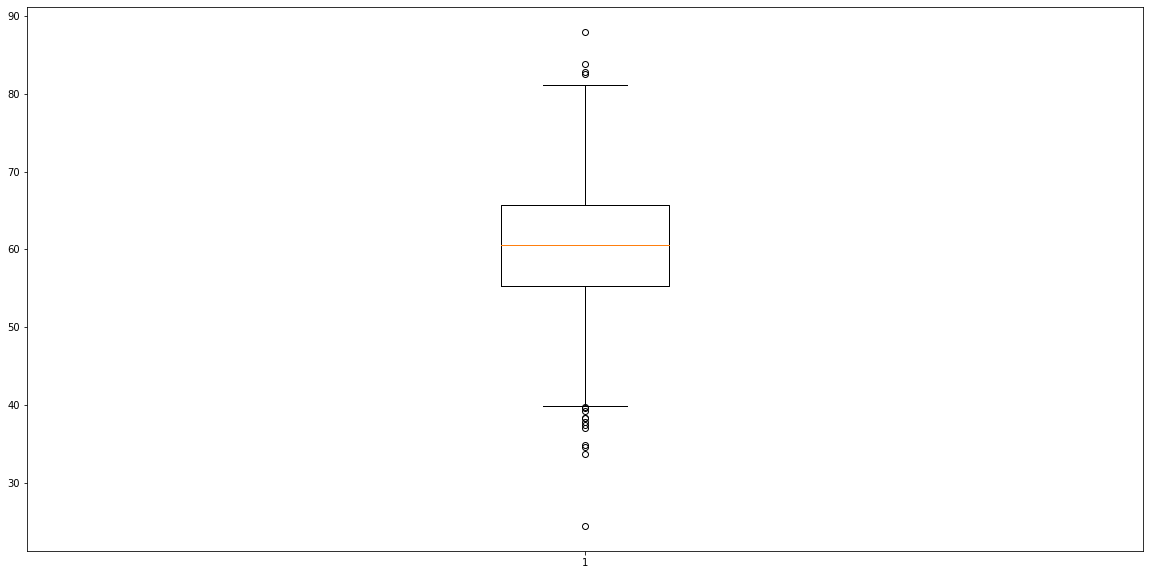


Principales estadísticos: 
count    1901.000000
mean       60.324456
std         7.910023
min        24.420000
25%        55.300000
50%        60.620000
75%        65.650000
max        87.970000
Name: PctWorkMomYoungKids, dtype: float64

Asimetría: -0.16022135879094196
Curtosis: 0.22949764676587847

 ****************************************************************************************** 


Columna: PctWorkMom

Histograma:
(41.903, 45.902]      3
(45.902, 49.853]     11
(49.853, 53.805]     36
(53.805, 57.757]     65
(57.757, 61.708]    136
(61.708, 65.66]     297
(65.66, 69.612]     451
(69.612, 73.563]    468
(73.563, 77.515]    298
(77.515, 81.467]    104
(81.467, 85.418]     29
(85.418, 89.37]       3
Name: PctWorkMom, dtype: int64


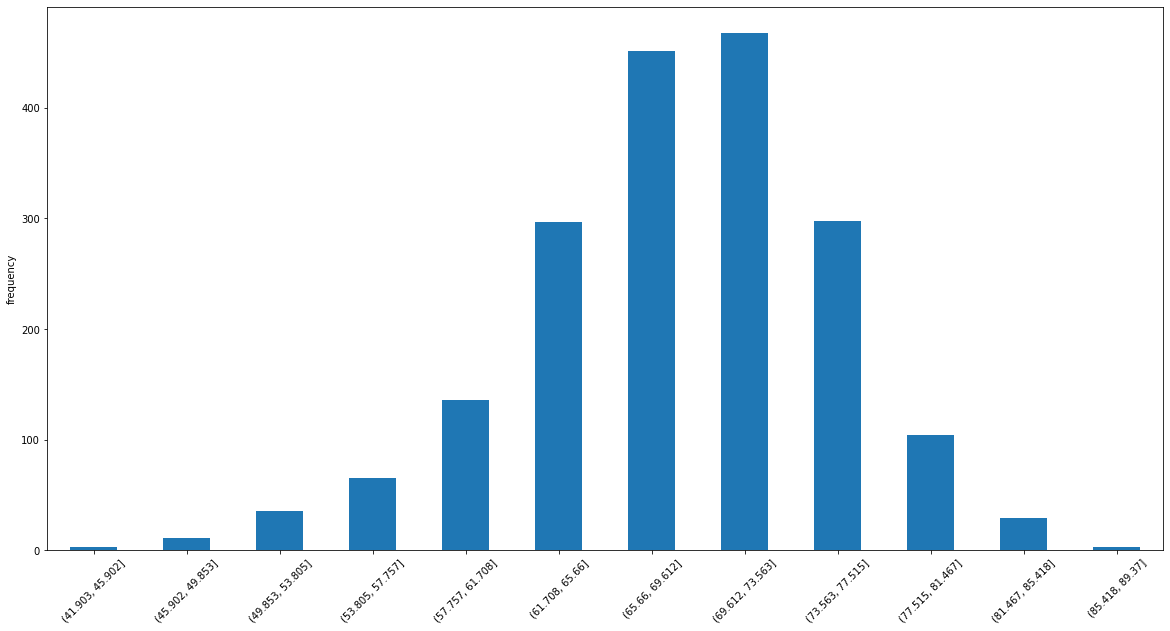


Boxplot:


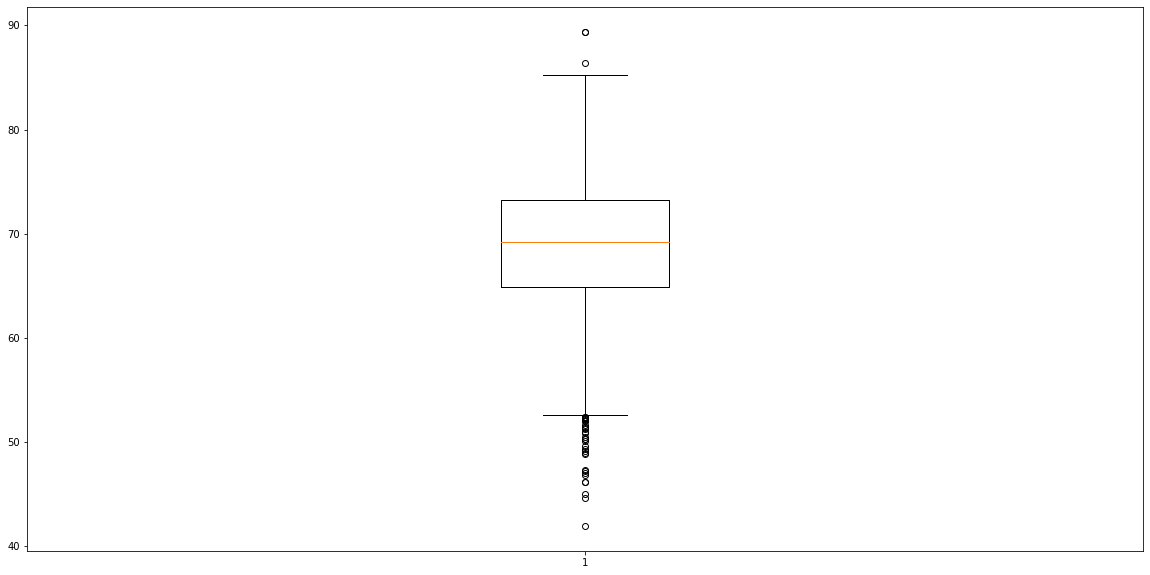


Principales estadísticos: 
count    1901.000000
mean       68.740684
std         6.561530
min        41.950000
25%        64.920000
50%        69.230000
75%        73.200000
max        89.370000
Name: PctWorkMom, dtype: float64

Asimetría: -0.46747072707800613
Curtosis: 0.573638800985635

 ****************************************************************************************** 


Columna: NumKidsBornNeverMar

Histograma:
(-527.557, 43963.083]       1892
(43963.083, 87926.167]         5
(87926.167, 131889.25]         1
(131889.25, 175852.333]        1
(175852.333, 219815.417]       1
(219815.417, 263778.5]         0
(263778.5, 307741.583]         0
(307741.583, 351704.667]       0
(351704.667, 395667.75]        0
(395667.75, 439630.833]        0
(439630.833, 483593.917]       0
(483593.917, 527557.0]         1
Name: NumKidsBornNeverMar, dtype: int64


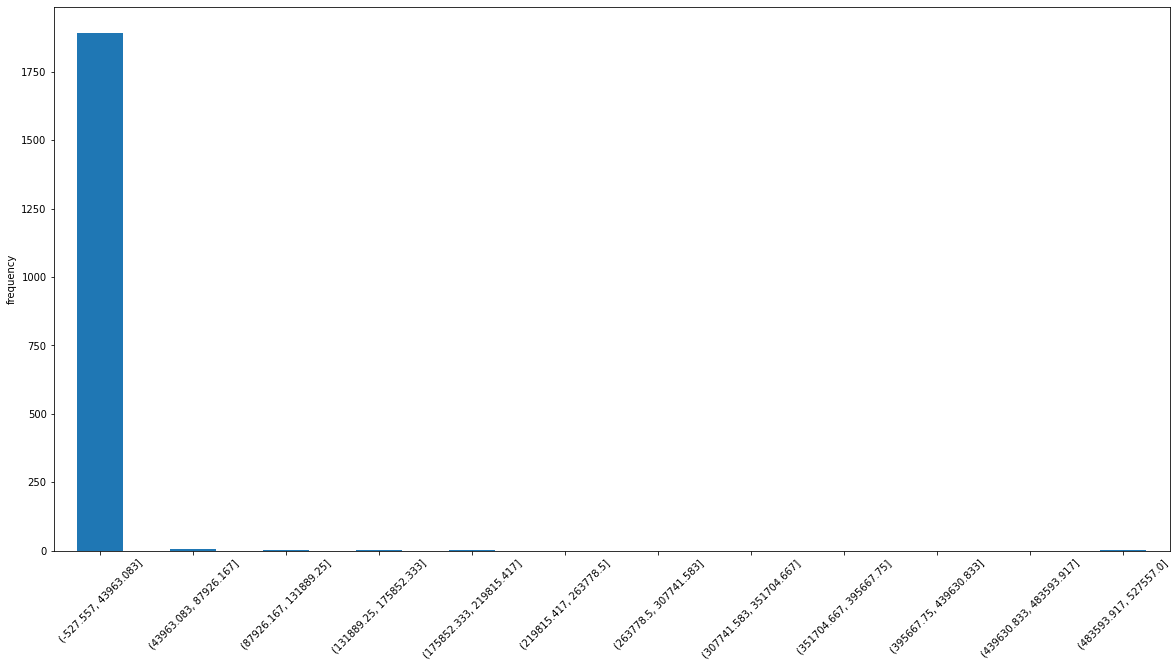


Boxplot:


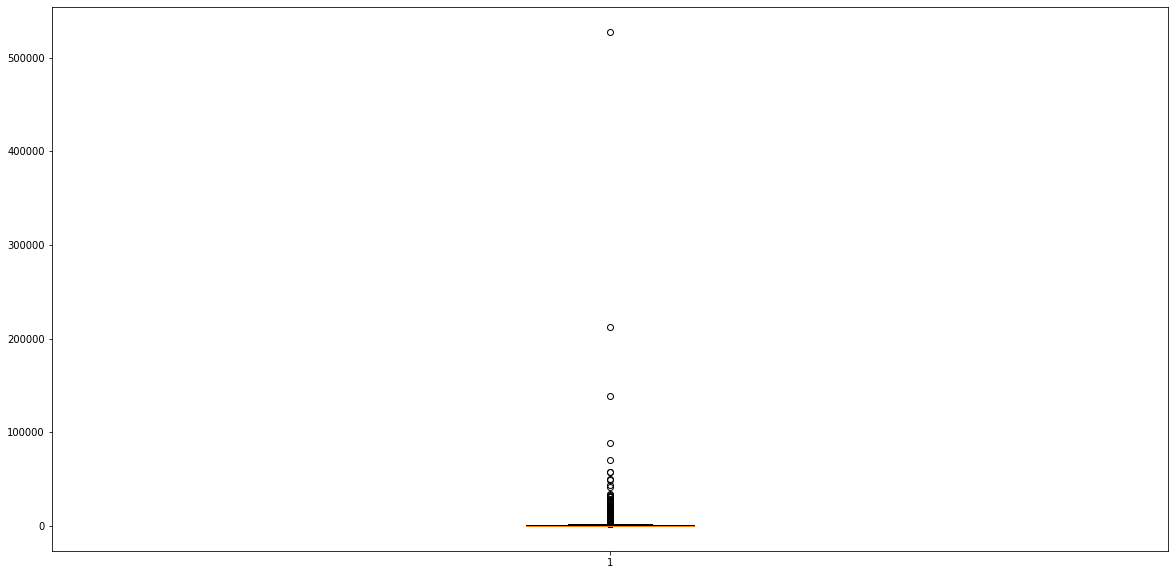


Principales estadísticos: 
count      1901.000000
mean       2033.429774
std       14276.740937
min           0.000000
25%         145.000000
50%         357.000000
75%        1061.000000
max      527557.000000
Name: NumKidsBornNeverMar, dtype: float64

Asimetría: 28.786735345113186
Curtosis: 997.1254932724216

 ****************************************************************************************** 


Columna: PctKidsBornNeverMar

Histograma:
(-0.0242, 2.016]    934
(2.016, 4.032]      508
(4.032, 6.048]      193
(6.048, 8.063]      111
(8.063, 10.079]      79
(10.079, 12.095]     35
(12.095, 14.111]     21
(14.111, 16.127]      8
(16.127, 18.143]      6
(18.143, 20.158]      3
(20.158, 22.174]      2
(22.174, 24.19]       1
Name: PctKidsBornNeverMar, dtype: int64


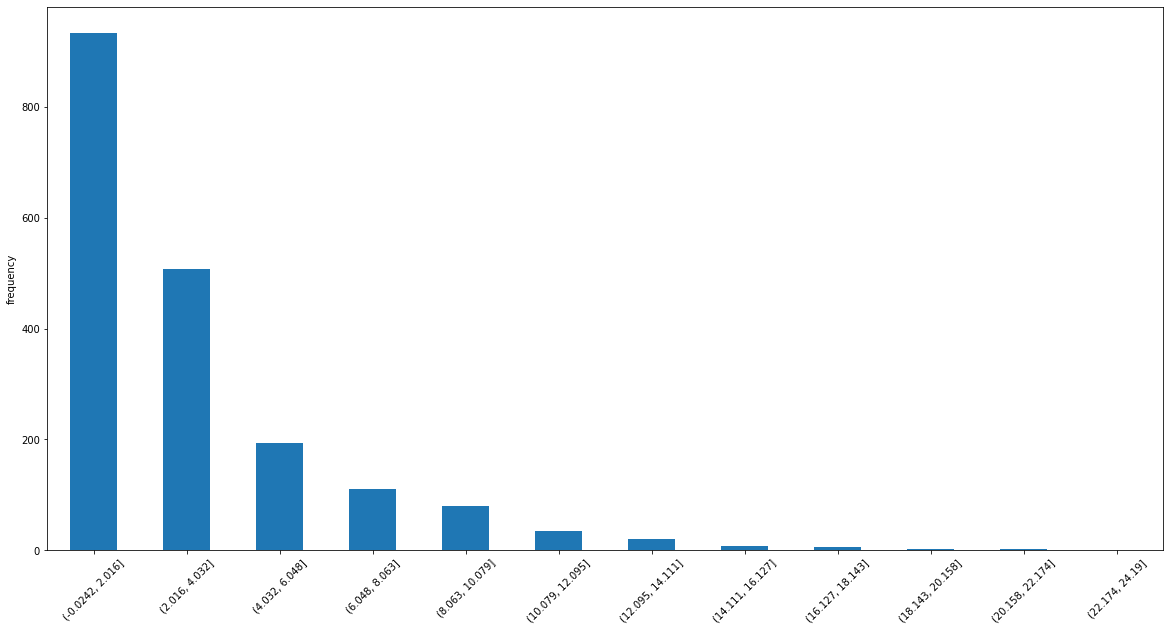


Boxplot:


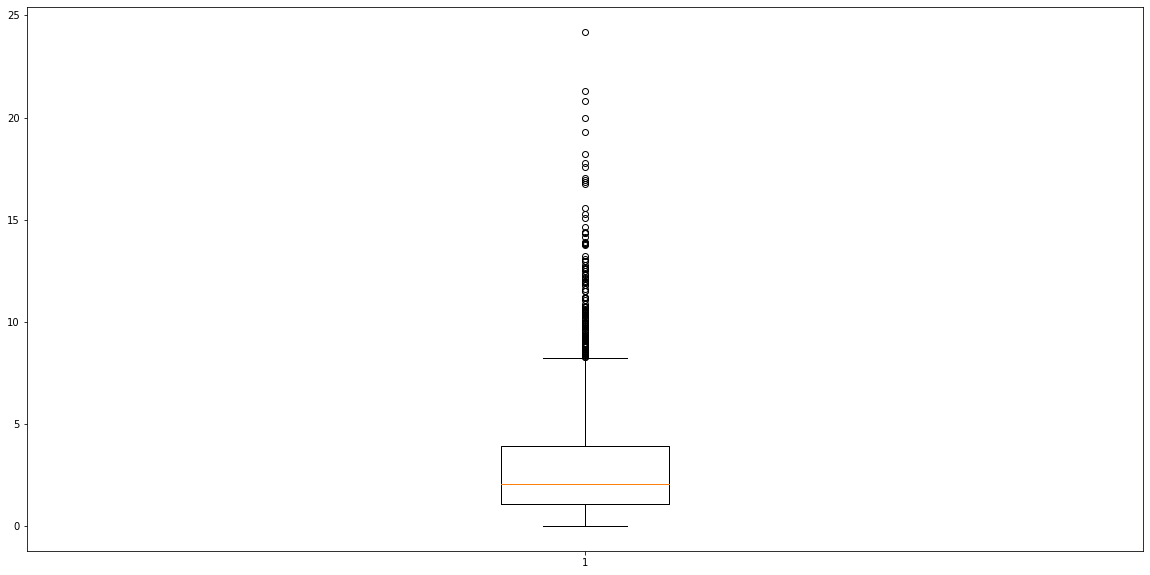


Principales estadísticos: 
count    1901.000000
mean        3.109295
std         3.058334
min         0.000000
25%         1.070000
50%         2.060000
75%         3.930000
max        24.190000
Name: PctKidsBornNeverMar, dtype: float64

Asimetría: 2.1197939558842567
Curtosis: 5.911675399306549

 ****************************************************************************************** 


Columna: NumImmig

Histograma:
(-2062.911, 173595.917]       1895
(173595.917, 347171.833]         4
(347171.833, 520747.75]          0
(520747.75, 694323.667]          0
(694323.667, 867899.583]         0
(867899.583, 1041475.5]          0
(1041475.5, 1215051.417]         0
(1215051.417, 1388627.333]       1
(1388627.333, 1562203.25]        0
(1562203.25, 1735779.167]        0
(1735779.167, 1909355.083]       0
(1909355.083, 2082931.0]         1
Name: NumImmig, dtype: int64


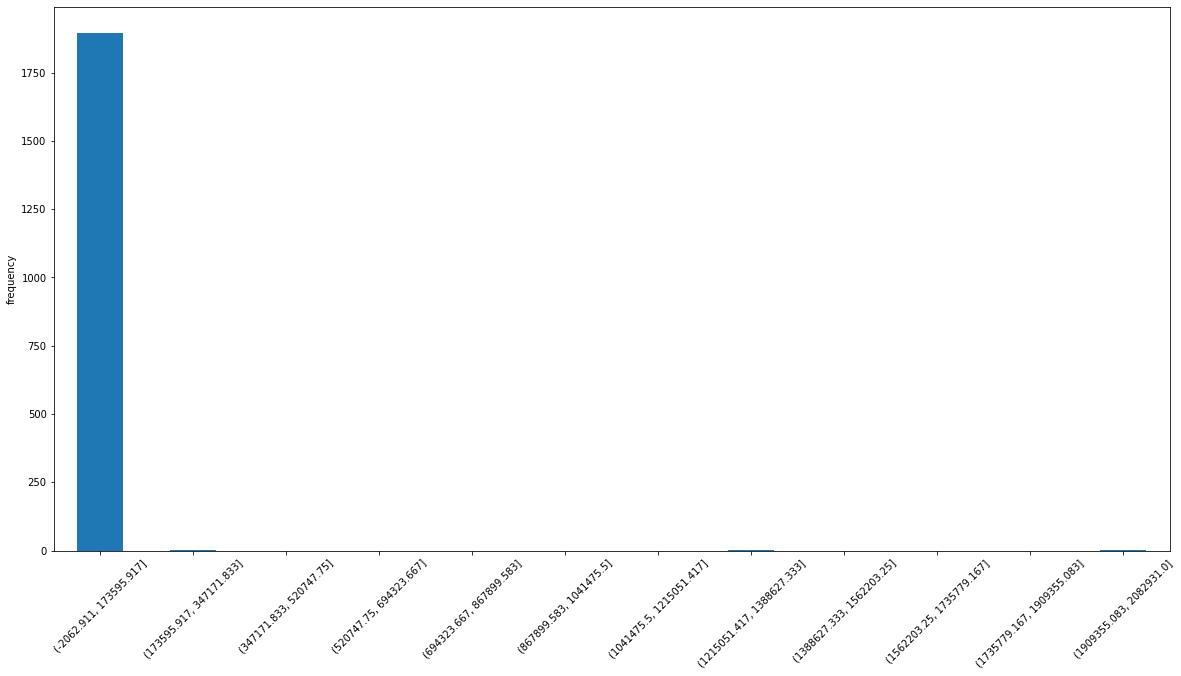


Boxplot:


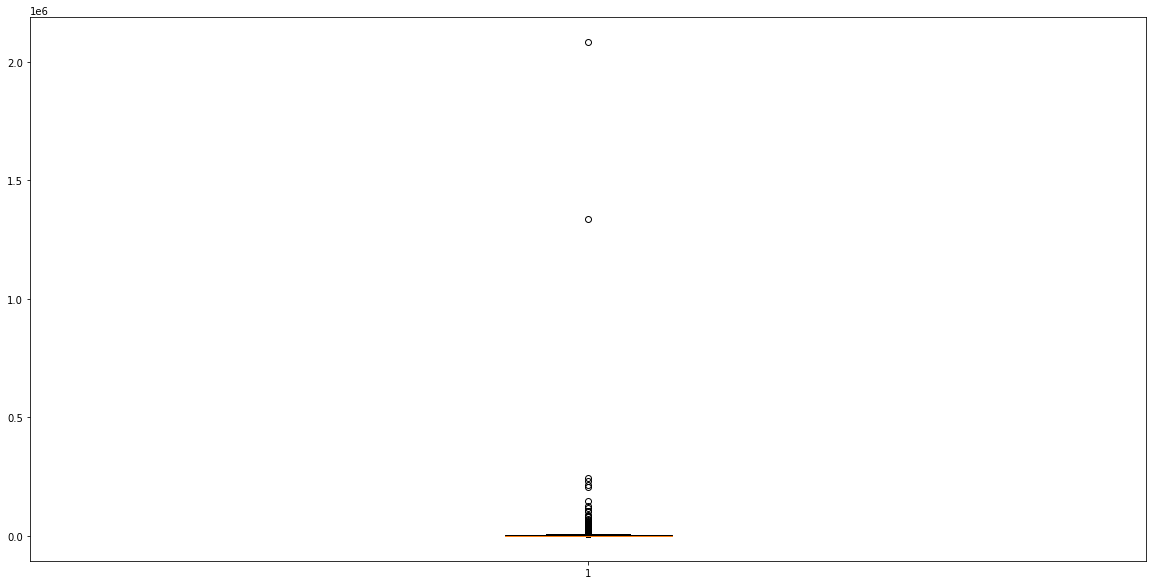


Principales estadísticos: 
count    1.901000e+03
mean     6.465607e+03
std      5.839261e+04
min      2.000000e+01
25%      4.210000e+02
50%      1.082000e+03
75%      3.461000e+03
max      2.082931e+06
Name: NumImmig, dtype: float64

Asimetría: 30.064399444376733
Curtosis: 983.9383659714397

 ****************************************************************************************** 


Columna: PctImmigRecent

Histograma:
(-0.0643, 5.358]    347
(5.358, 10.715]     437
(10.715, 16.073]    494
(16.073, 21.43]     328
(21.43, 26.788]     134
(26.788, 32.145]     68
(32.145, 37.503]     37
(37.503, 42.86]      25
(42.86, 48.218]      13
(48.218, 53.575]     10
(53.575, 58.933]      5
(58.933, 64.29]       3
Name: PctImmigRecent, dtype: int64


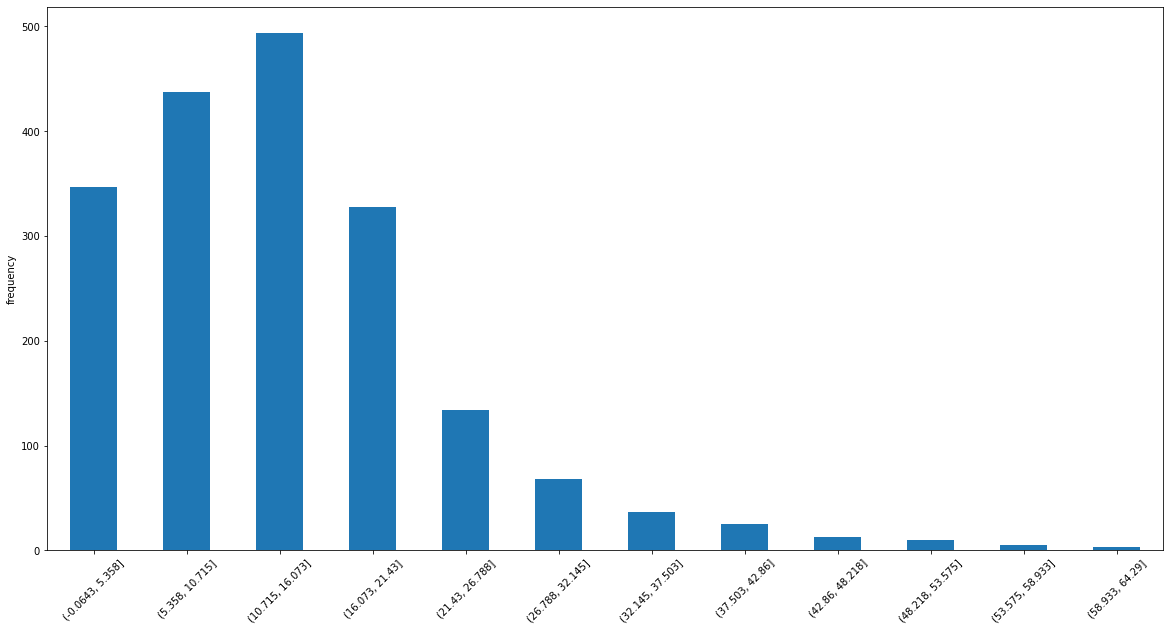


Boxplot:


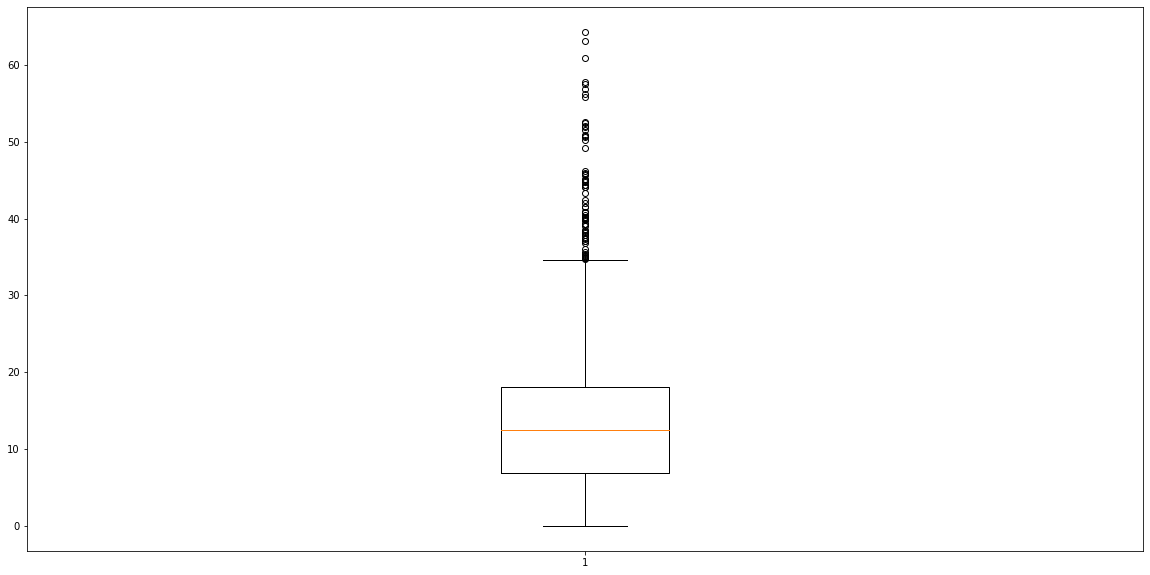


Principales estadísticos: 
count    1901.000000
mean       13.690994
std         9.692885
min         0.000000
25%         6.970000
50%        12.480000
75%        18.050000
max        64.290000
Name: PctImmigRecent, dtype: float64

Asimetría: 1.3281560762033973
Curtosis: 2.9874959727588073

 ****************************************************************************************** 


Columna: PctImmigRec5

Histograma:
(-0.0762, 6.347]    218
(6.347, 12.693]     306
(12.693, 19.04]     385
(19.04, 25.387]     386
(25.387, 31.733]    298
(31.733, 38.08]     151
(38.08, 44.427]      77
(44.427, 50.773]     33
(50.773, 57.12]      26
(57.12, 63.467]      11
(63.467, 69.813]      6
(69.813, 76.16]       4
Name: PctImmigRec5, dtype: int64


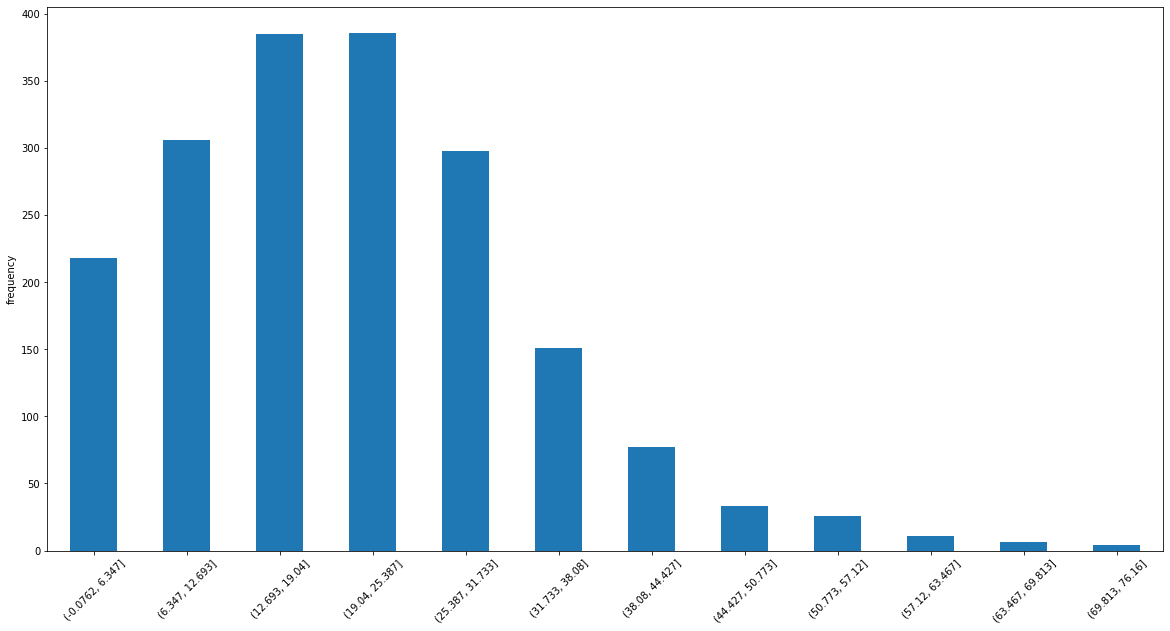


Boxplot:


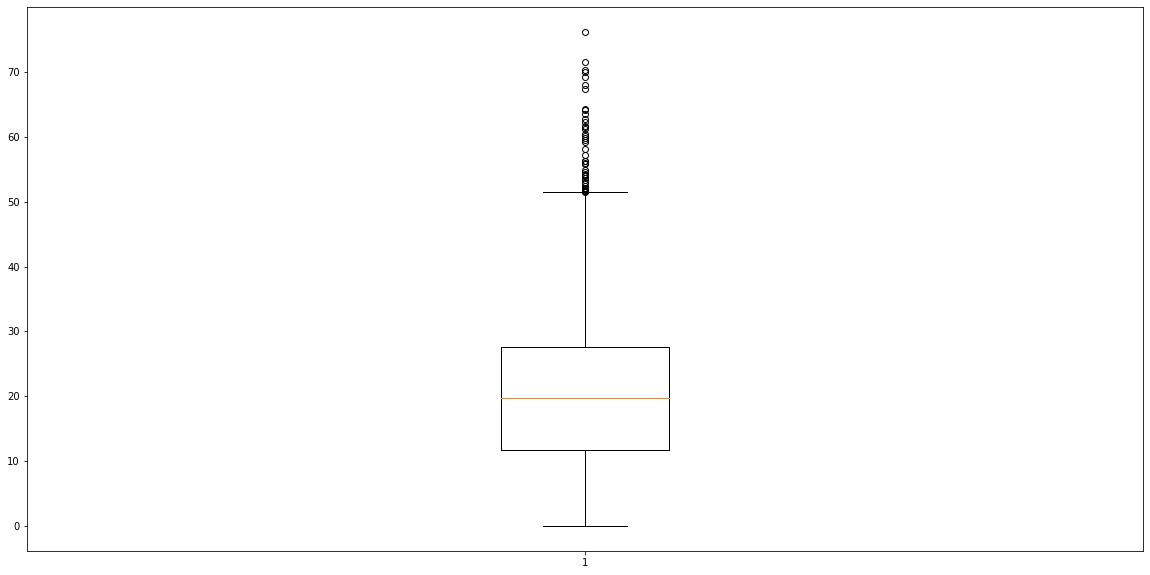


Principales estadísticos: 
count    1901.000000
mean       20.784808
std        12.271561
min         0.000000
25%        11.720000
50%        19.740000
75%        27.630000
max        76.160000
Name: PctImmigRec5, dtype: float64

Asimetría: 0.8025828213372166
Curtosis: 1.0893778161440362

 ****************************************************************************************** 


Columna: PctImmigRec8

Histograma:
(-0.0808, 6.734]     95
(6.734, 13.468]     209
(13.468, 20.202]    280
(20.202, 26.937]    332
(26.937, 33.671]    345
(33.671, 40.405]    295
(40.405, 47.139]    179
(47.139, 53.873]     88
(53.873, 60.608]     39
(60.608, 67.342]     20
(67.342, 74.076]     11
(74.076, 80.81]       8
Name: PctImmigRec8, dtype: int64


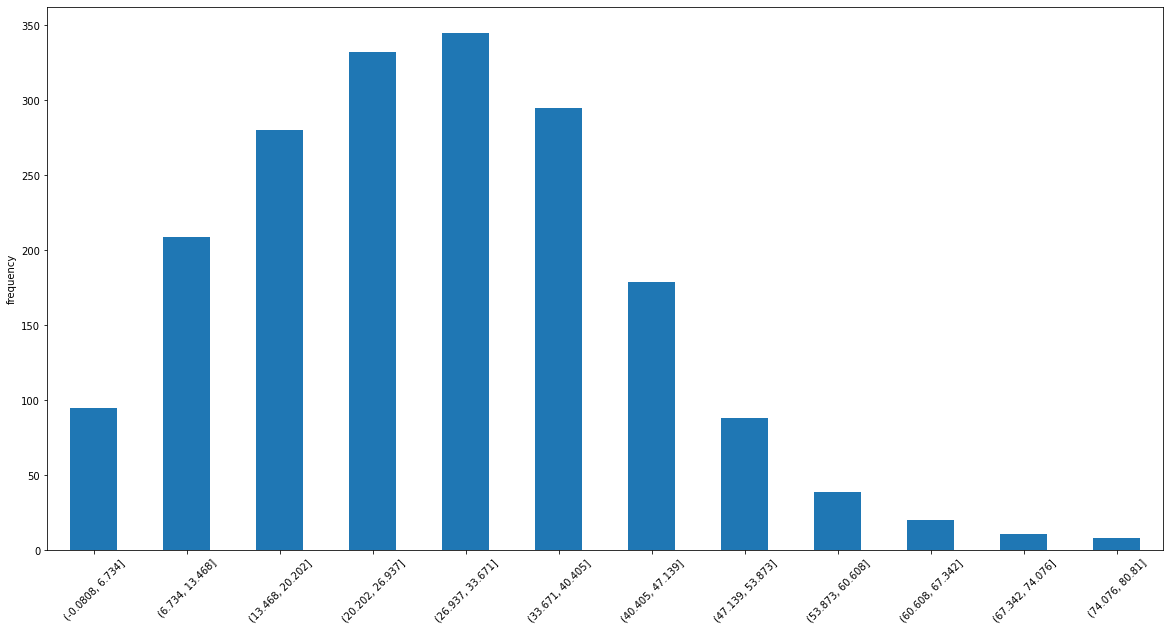


Boxplot:


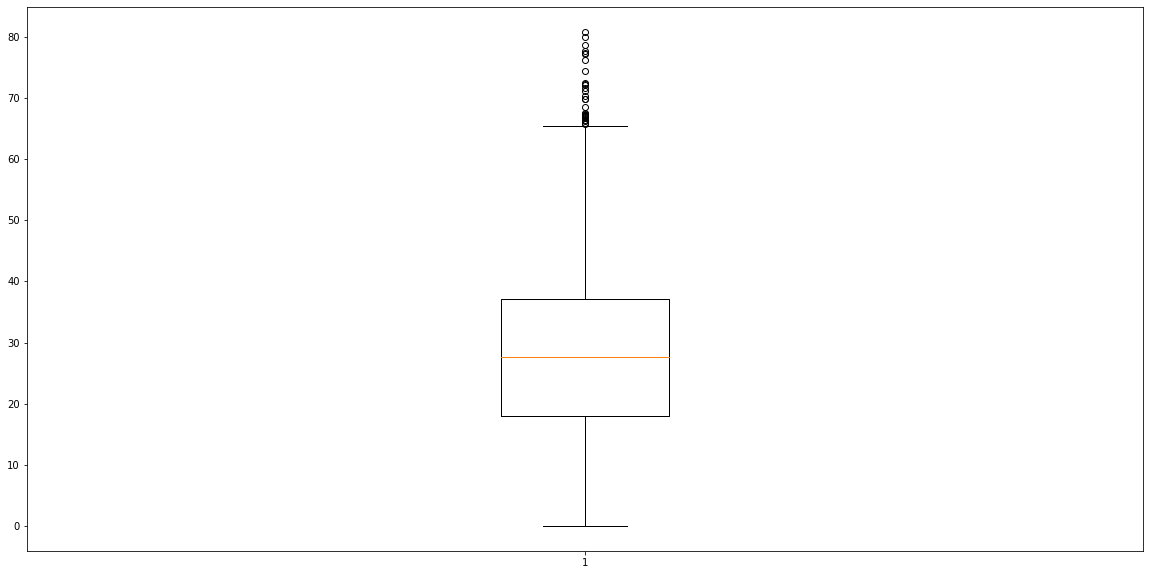


Principales estadísticos: 
count    1901.000000
mean       28.163603
std        14.142925
min         0.000000
25%        18.040000
50%        27.600000
75%        37.120000
max        80.810000
Name: PctImmigRec8, dtype: float64

Asimetría: 0.44945933599295507
Curtosis: 0.30312204065709203

 ****************************************************************************************** 


Columna: PctImmigRec10

Histograma:
(-0.088, 7.333]      61
(7.333, 14.667]     148
(14.667, 22.0]      208
(22.0, 29.333]      285
(29.333, 36.667]    307
(36.667, 44.0]      336
(44.0, 51.333]      231
(51.333, 58.667]    183
(58.667, 66.0]       82
(66.0, 73.333]       40
(73.333, 80.667]     14
(80.667, 88.0]        6
Name: PctImmigRec10, dtype: int64



Boxplot:


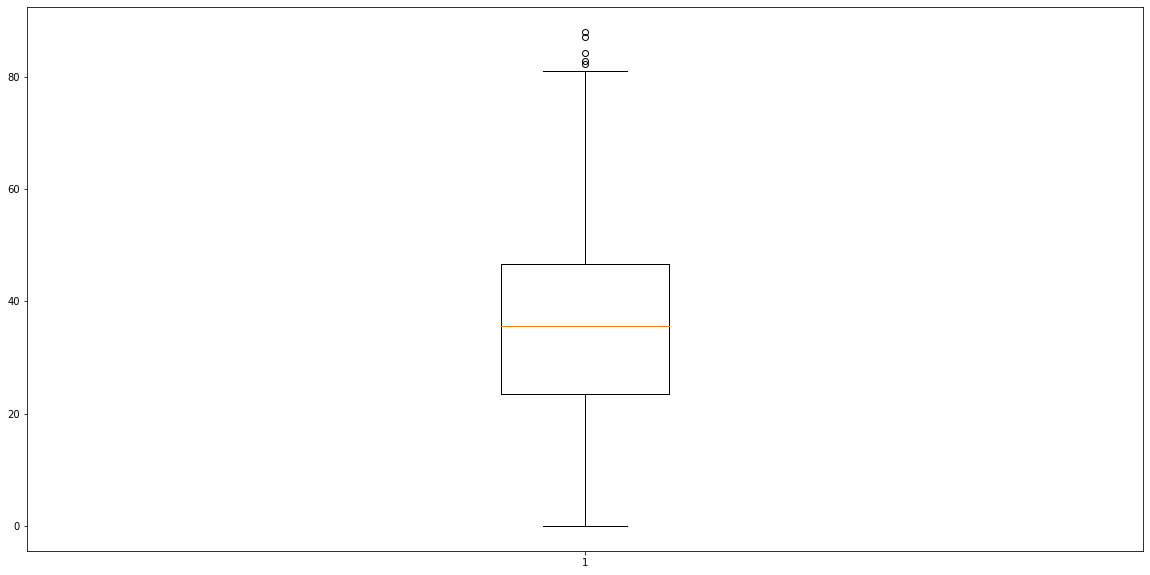


Principales estadísticos: 
count    1901.000000
mean       35.446044
std        16.071395
min         0.000000
25%        23.600000
50%        35.580000
75%        46.700000
max        88.000000
Name: PctImmigRec10, dtype: float64

Asimetría: 0.17322803601139217
Curtosis: -0.3334918106827658

 ****************************************************************************************** 


Columna: PctRecentImmig

Histograma:
(-0.0137, 1.142]    1333
(1.142, 2.285]       277
(2.285, 3.428]       113
(3.428, 4.57]         82
(4.57, 5.712]         39
(5.712, 6.855]        23
(6.855, 7.998]        14
(7.998, 9.14]          7
(9.14, 10.282]         5
(10.282, 11.425]       5
(11.425, 12.568]       1
(12.568, 13.71]        2
Name: PctRecentImmig, dtype: int64


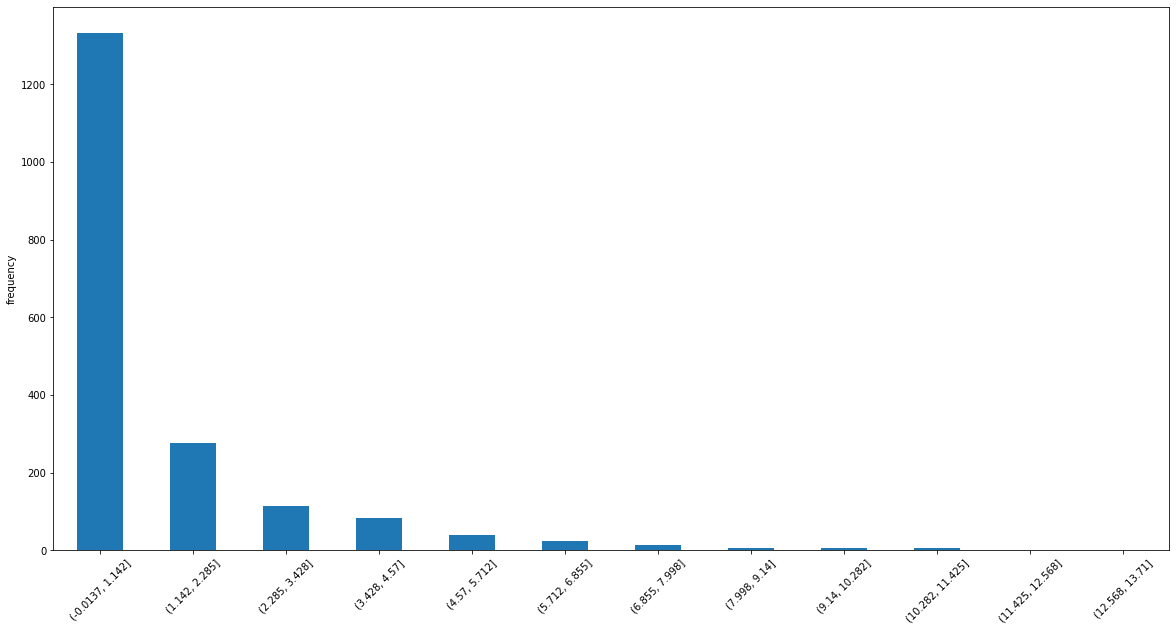


Boxplot:


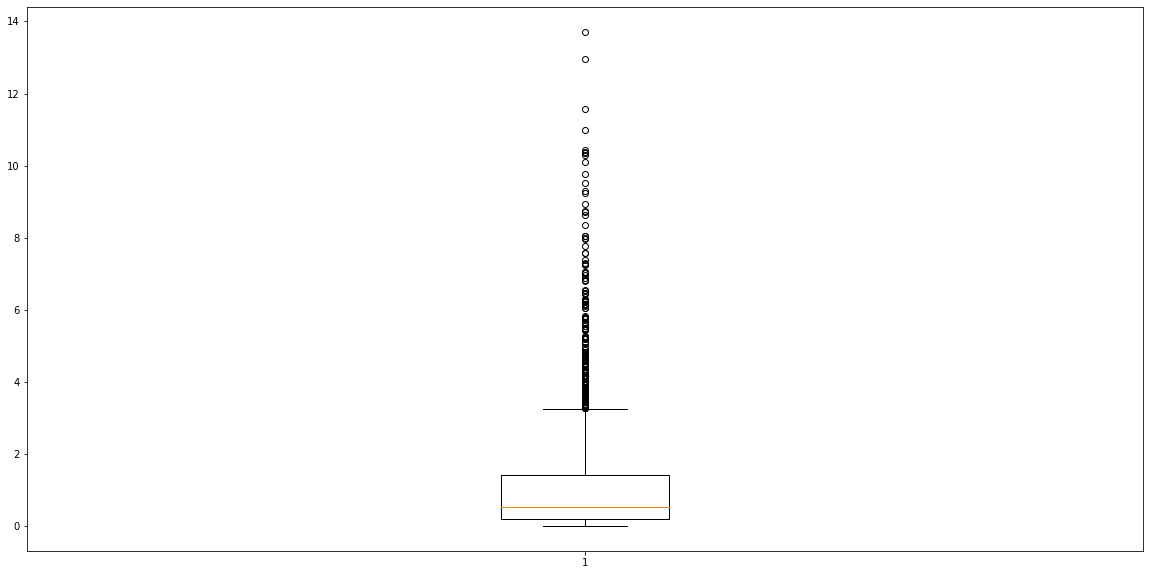


Principales estadísticos: 
count    1901.000000
mean        1.174435
std         1.668852
min         0.000000
25%         0.190000
50%         0.540000
75%         1.420000
max        13.710000
Name: PctRecentImmig, dtype: float64

Asimetría: 2.8000528103547087
Curtosis: 10.052669173242606

 ****************************************************************************************** 


Columna: PctRecImmig5

Histograma:
(-0.0199, 1.661]    1318
(1.661, 3.322]       272
(3.322, 4.982]       113
(4.982, 6.643]        82
(6.643, 8.304]        51
(8.304, 9.965]        23
(9.965, 11.626]       17
(11.626, 13.287]       9
(13.287, 14.948]       6
(14.948, 16.608]       6
(16.608, 18.269]       2
(18.269, 19.93]        2
Name: PctRecImmig5, dtype: int64


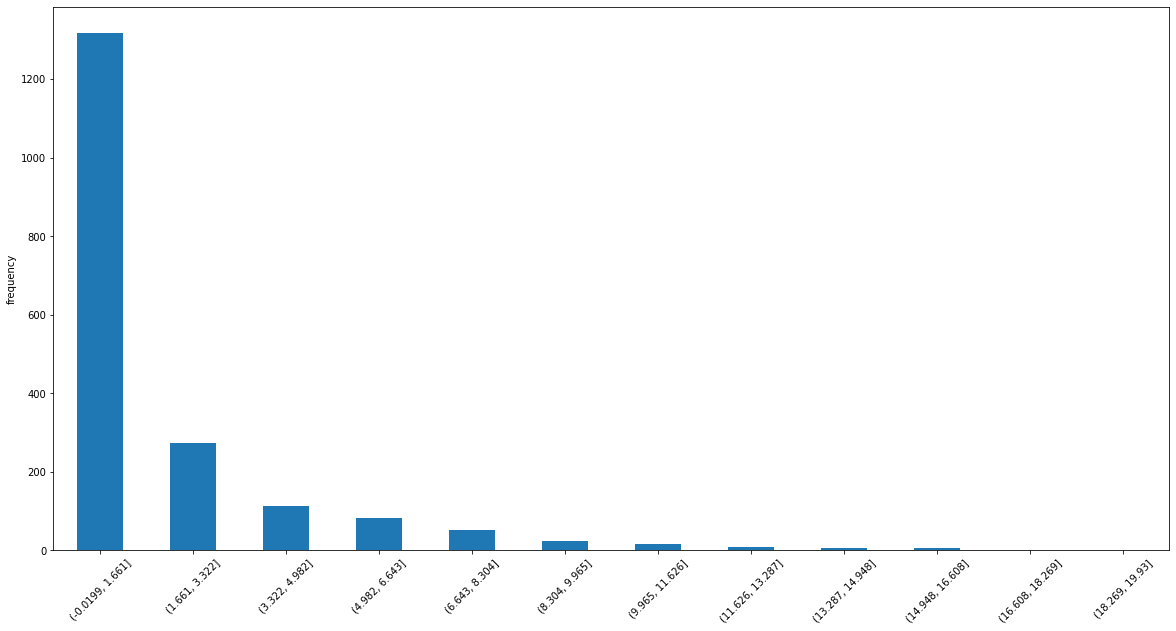


Boxplot:


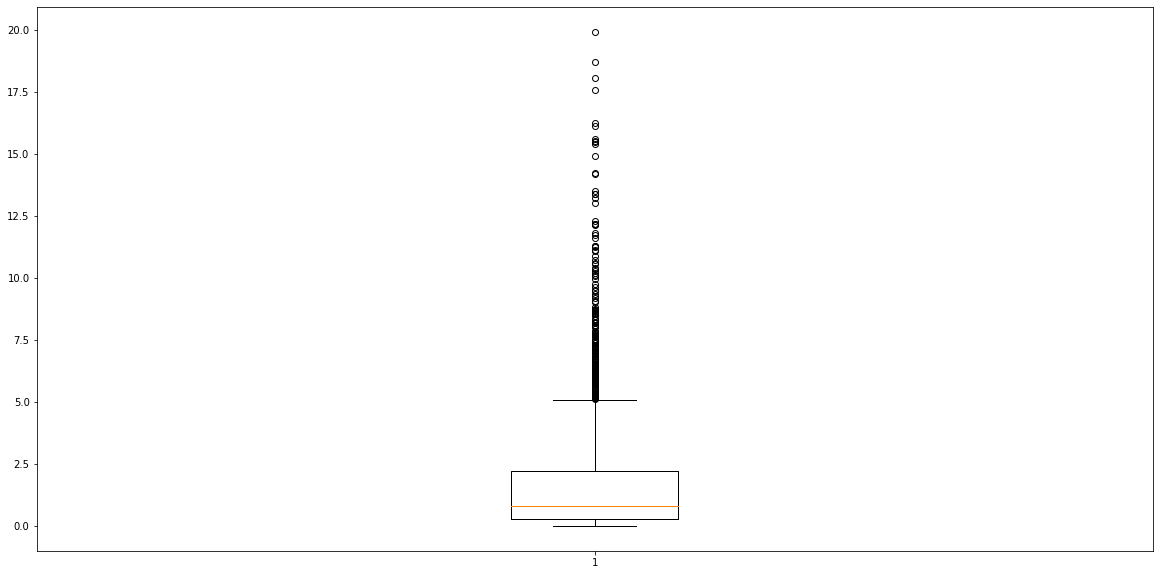


Principales estadísticos: 
count    1901.000000
mean        1.822951
std         2.578092
min         0.000000
25%         0.300000
50%         0.810000
75%         2.210000
max        19.930000
Name: PctRecImmig5, dtype: float64

Asimetría: 2.7461431754783994
Curtosis: 9.409180135067915

 ****************************************************************************************** 


Columna: PctRecImmig8

Histograma:
(-0.0253, 2.112]    1283
(2.112, 4.223]       284
(4.223, 6.335]       121
(6.335, 8.447]        75
(8.447, 10.558]       61
(10.558, 12.67]       30
(12.67, 14.782]       16
(14.782, 16.893]      14
(16.893, 19.005]       6
(19.005, 21.117]       5
(21.117, 23.228]       4
(23.228, 25.34]        2
Name: PctRecImmig8, dtype: int64



Boxplot:



Principales estadísticos: 
count    1901.000000
mean        2.482462
std         3.443505
min         0.000000
25%         0.440000
50%         1.110000
75%         3.020000
max        25.340000
Name: PctRecImmig8, dtype: float64

Asimetría: 2.6576345661140603
Curtosis: 8.615104578062322

 ****************************************************************************************** 


Columna: PctRecImmig10

Histograma:
(-0.0326, 2.719]    1297
(2.719, 5.438]       273
(5.438, 8.158]       125
(8.158, 10.877]       75
(10.877, 13.596]      55
(13.596, 16.315]      32
(16.315, 19.034]      15
(19.034, 21.753]       8
(21.753, 24.472]       7
(24.472, 27.192]       4
(27.192, 29.911]       7
(29.911, 32.63]        3
Name: PctRecImmig10, dtype: int64



Boxplot:



Principales estadísticos: 
count    1901.000000
mean        3.169085
std         4.457765
min         0.000000
25%         0.560000
50%         1.430000
75%         3.820000
max        32.630000
Name: PctRecImmig10, dtype: float64

Asimetría: 2.795644523446534
Curtosis: 9.733313079347253

 ****************************************************************************************** 


Columna: PctSpeakEnglOnly

Histograma:
(6.057, 13.886]       8
(13.886, 21.622]     12
(21.622, 29.358]     11
(29.358, 37.093]     15
(37.093, 44.829]     16
(44.829, 52.565]     18
(52.565, 60.301]     43
(60.301, 68.037]     50
(68.037, 75.773]     97
(75.773, 83.508]    207
(83.508, 91.244]    441
(91.244, 98.98]     983
Name: PctSpeakEnglOnly, dtype: int64



Boxplot:


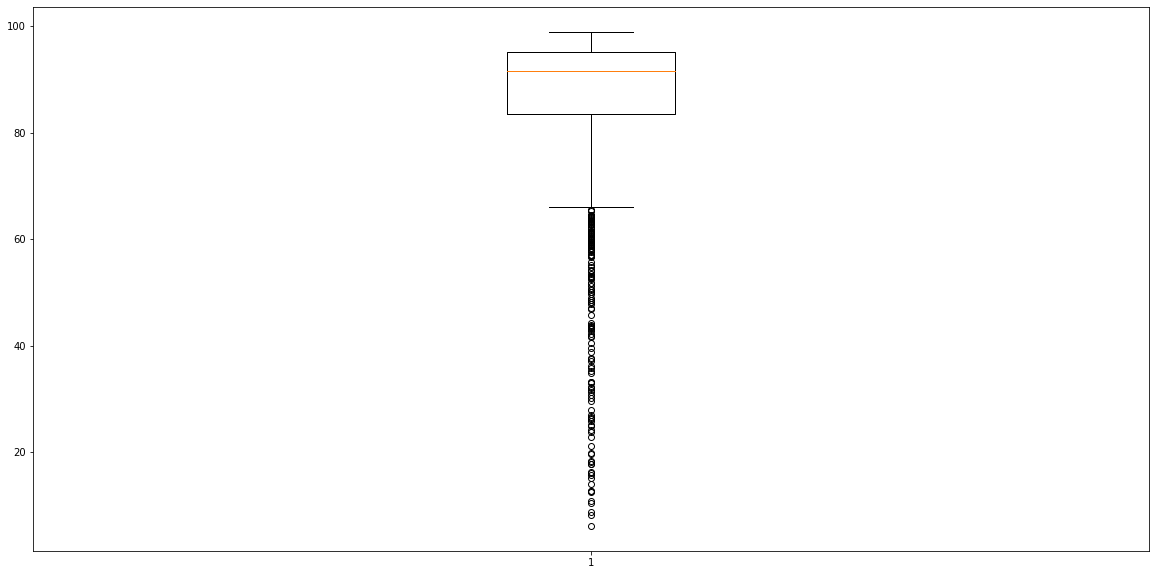


Principales estadísticos: 
count    1901.000000
mean       86.294471
std        14.762506
min         6.150000
25%        83.480000
50%        91.550000
75%        95.260000
max        98.980000
Name: PctSpeakEnglOnly, dtype: float64

Asimetría: -2.5821907498818835
Curtosis: 7.723635227243554

 ****************************************************************************************** 


Columna: PctNotSpeakEnglWell

Histograma:
(-0.0383, 3.194]    1514
(3.194, 6.388]       195
(6.388, 9.582]        80
(9.582, 12.777]       29
(12.777, 15.971]      28
(15.971, 19.165]      23
(19.165, 22.359]      10
(22.359, 25.553]       7
(25.553, 28.748]       3
(28.748, 31.942]       8
(31.942, 35.136]       1
(35.136, 38.33]        3
Name: PctNotSpeakEnglWell, dtype: int64



Boxplot:



Principales estadísticos: 
count    1901.000000
mean        2.602409
std         4.458305
min         0.000000
25%         0.520000
50%         0.990000
75%         2.550000
max        38.330000
Name: PctNotSpeakEnglWell, dtype: float64

Asimetría: 3.8204452832976736
Curtosis: 17.848608059822638

 ****************************************************************************************** 


Columna: PctLargHouseFam

Histograma:
(0.926, 3.786]      676
(3.786, 6.612]      843
(6.612, 9.438]      201
(9.438, 12.263]      70
(12.263, 15.089]     44
(15.089, 17.915]     22
(17.915, 20.741]     14
(20.741, 23.567]     10
(23.567, 26.392]      8
(26.392, 29.218]      6
(29.218, 32.044]      3
(32.044, 34.87]       4
Name: PctLargHouseFam, dtype: int64


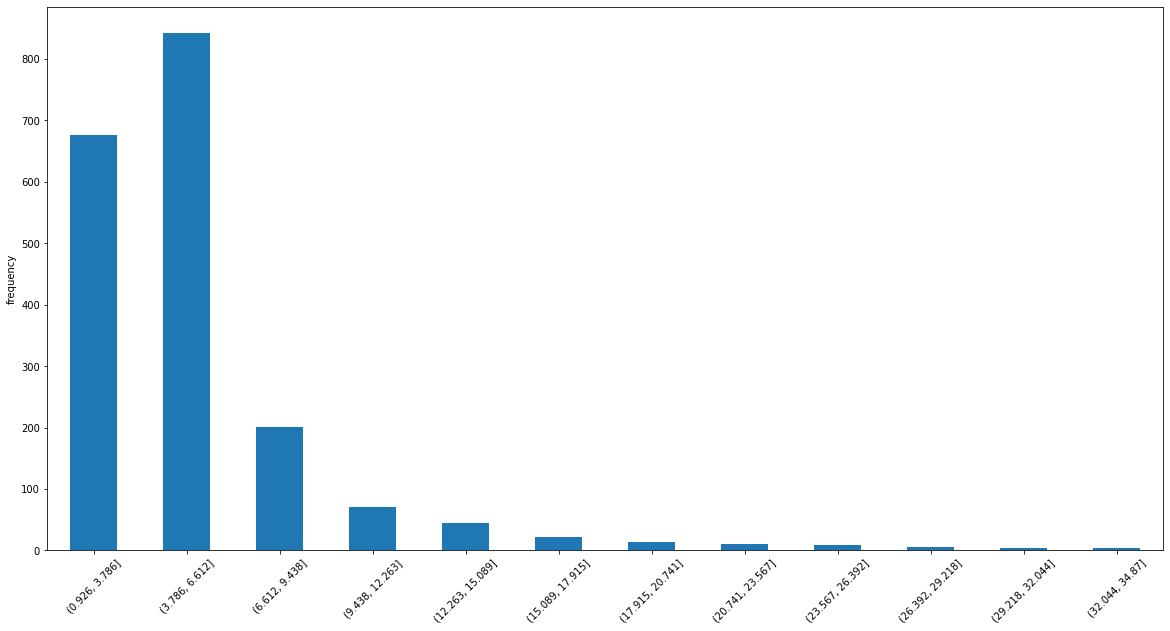


Boxplot:


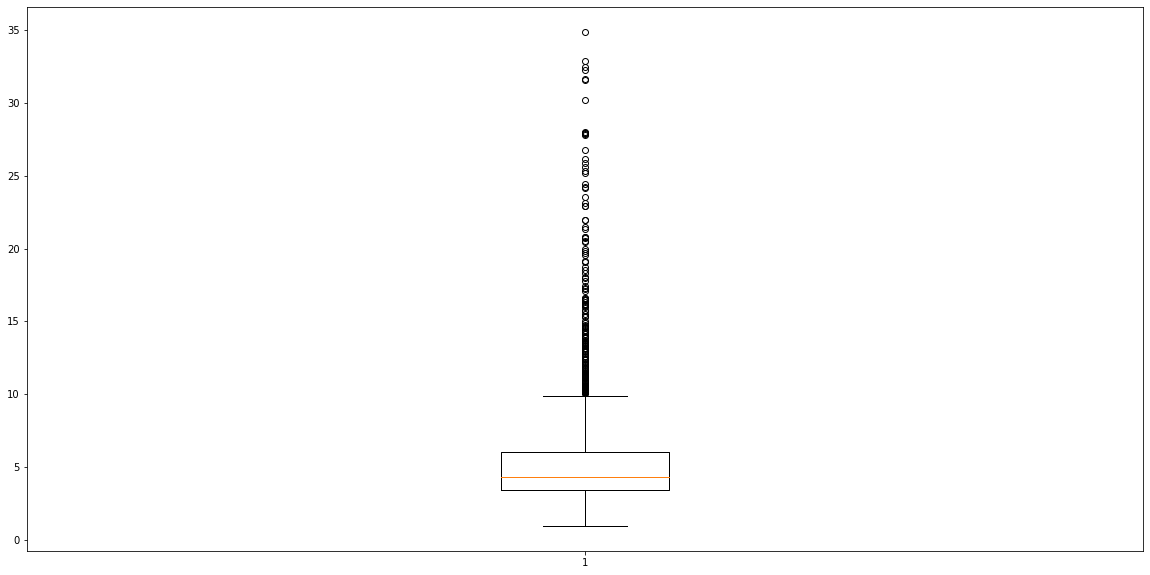


Principales estadísticos: 
count    1901.000000
mean        5.514687
std         3.993354
min         0.960000
25%         3.420000
50%         4.300000
75%         6.030000
max        34.870000
Name: PctLargHouseFam, dtype: float64

Asimetría: 3.285146138402094
Curtosis: 14.016450119909072

 ****************************************************************************************** 


Columna: PctLargHouseOccup

Histograma:
(0.41, 2.976]       865
(2.976, 5.512]      761
(5.512, 8.047]      142
(8.047, 10.583]      46
(10.583, 13.119]     30
(13.119, 15.655]     17
(15.655, 18.191]     11
(18.191, 20.727]      8
(20.727, 23.262]     10
(23.262, 25.798]      5
(25.798, 28.334]      4
(28.334, 30.87]       2
Name: PctLargHouseOccup, dtype: int64


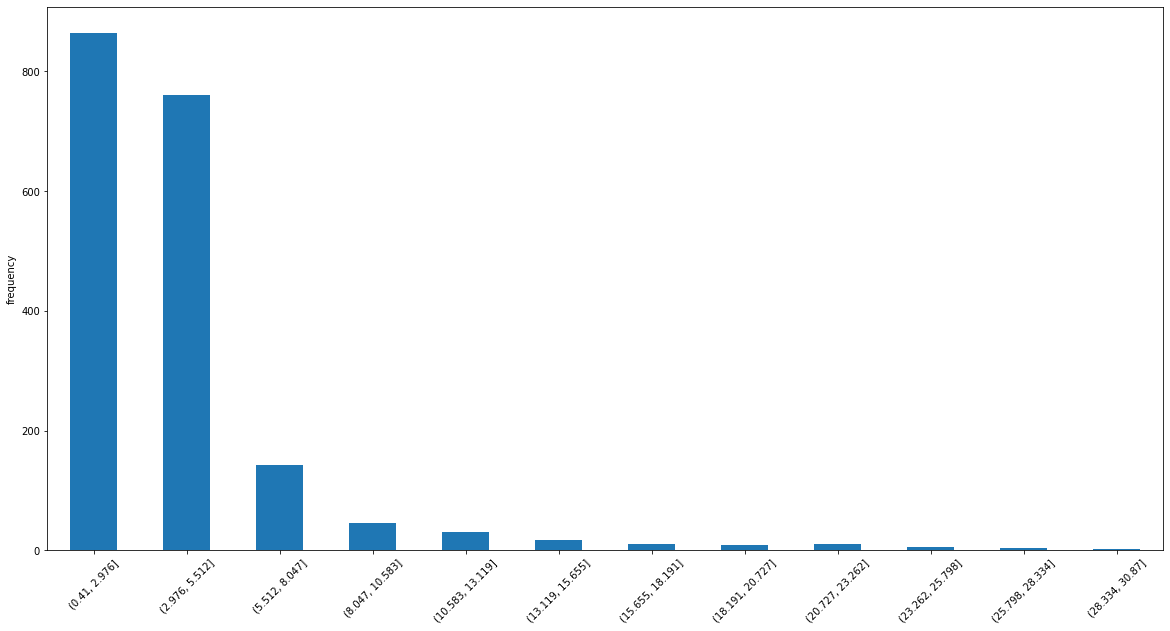


Boxplot:


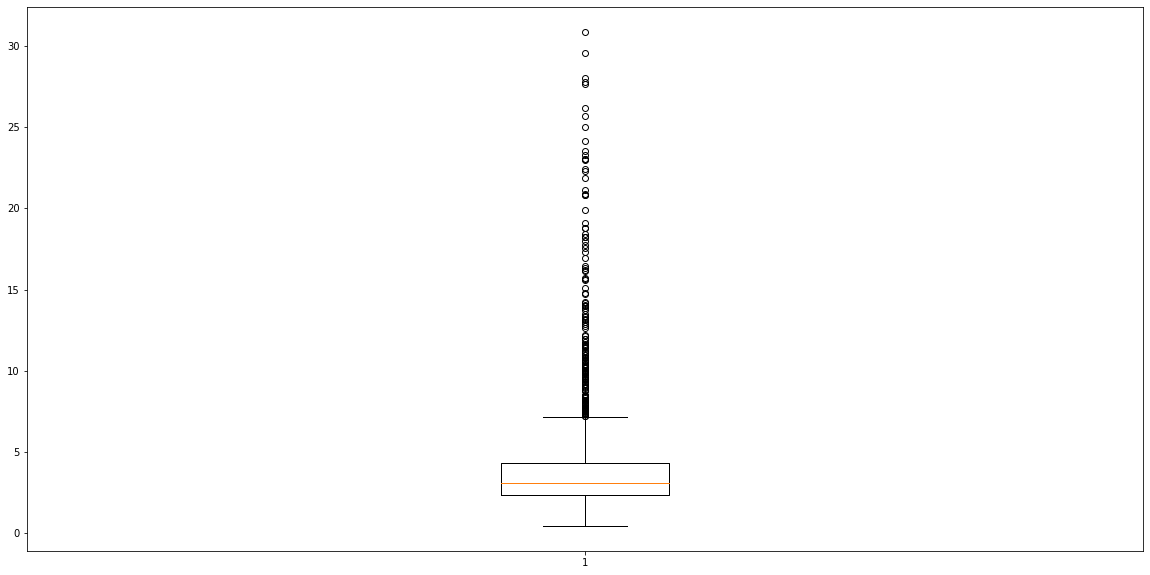


Principales estadísticos: 
count    1901.000000
mean        4.020652
std         3.362880
min         0.440000
25%         2.370000
50%         3.070000
75%         4.300000
max        30.870000
Name: PctLargHouseOccup, dtype: float64

Asimetría: 3.7466913042922902
Curtosis: 17.94527839902046

 ****************************************************************************************** 


Columna: PersPerOccupHous

Histograma:
(1.577, 1.825]      3
(1.825, 2.07]      23
(2.07, 2.315]     223
(2.315, 2.56]     702
(2.56, 2.805]     525
(2.805, 3.05]     264
(3.05, 3.295]      92
(3.295, 3.54]      32
(3.54, 3.785]      16
(3.785, 4.03]      13
(4.03, 4.275]       3
(4.275, 4.52]       5
Name: PersPerOccupHous, dtype: int64


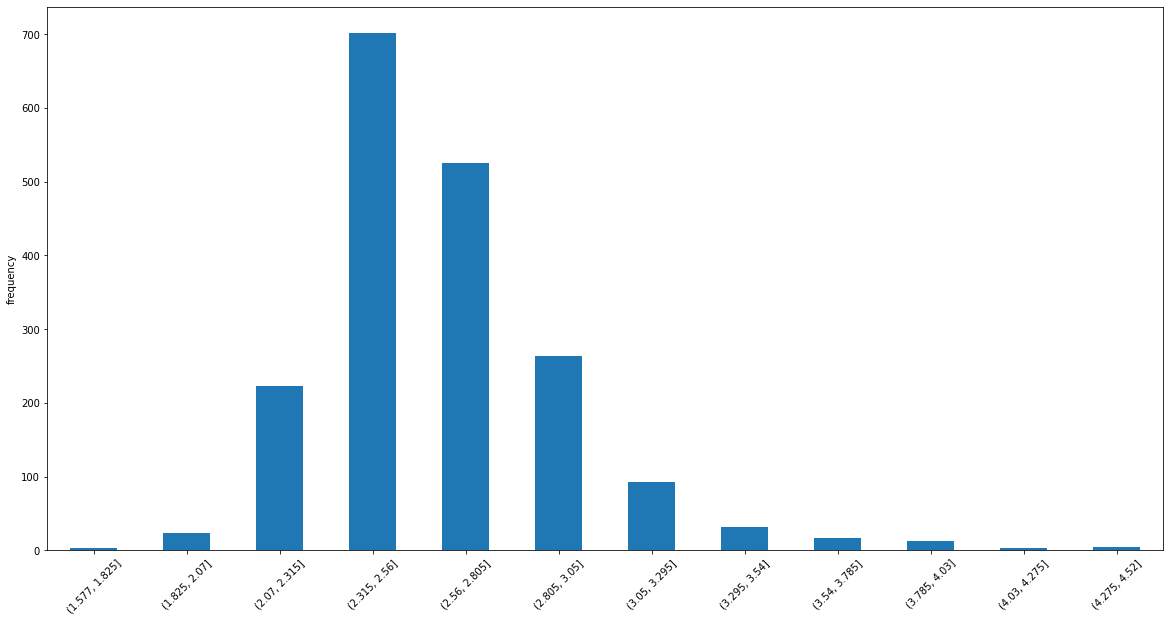


Boxplot:


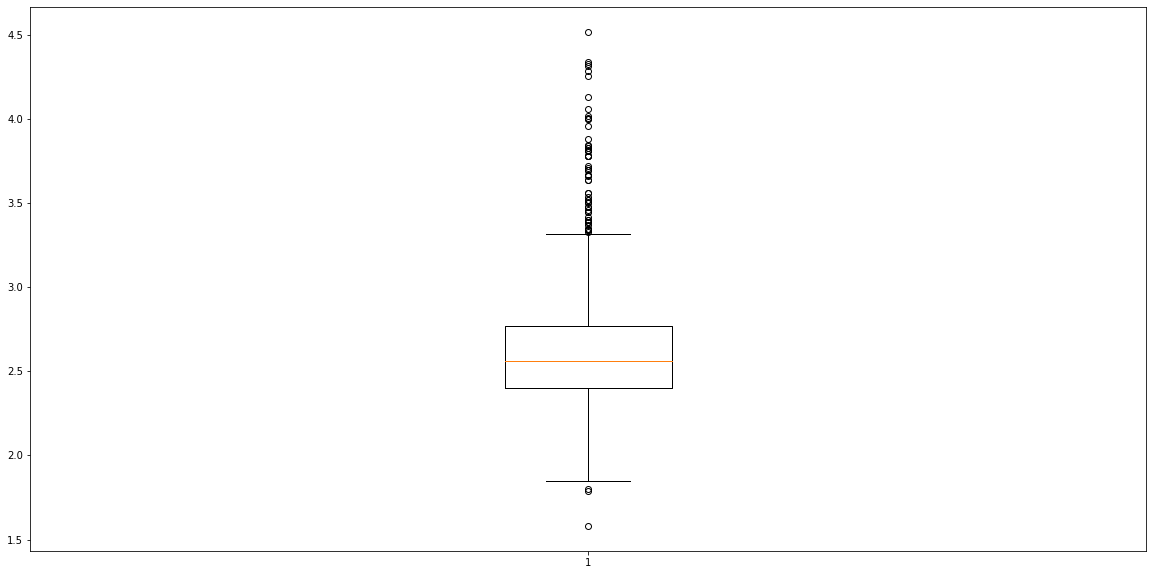


Principales estadísticos: 
count    1901.000000
mean        2.619358
std         0.328395
min         1.580000
25%         2.400000
50%         2.560000
75%         2.770000
max         4.520000
Name: PersPerOccupHous, dtype: float64

Asimetría: 1.4191000394888833
Curtosis: 4.08328737924081

 ****************************************************************************************** 


Columna: PersPerOwnOccHous

Histograma:
(1.607, 1.849]      4
(1.849, 2.088]     15
(2.088, 2.328]     77
(2.328, 2.567]    445
(2.567, 2.806]    655
(2.806, 3.045]    470
(3.045, 3.284]    154
(3.284, 3.523]     42
(3.523, 3.762]     15
(3.762, 4.002]     15
(4.002, 4.241]      6
(4.241, 4.48]       3
Name: PersPerOwnOccHous, dtype: int64


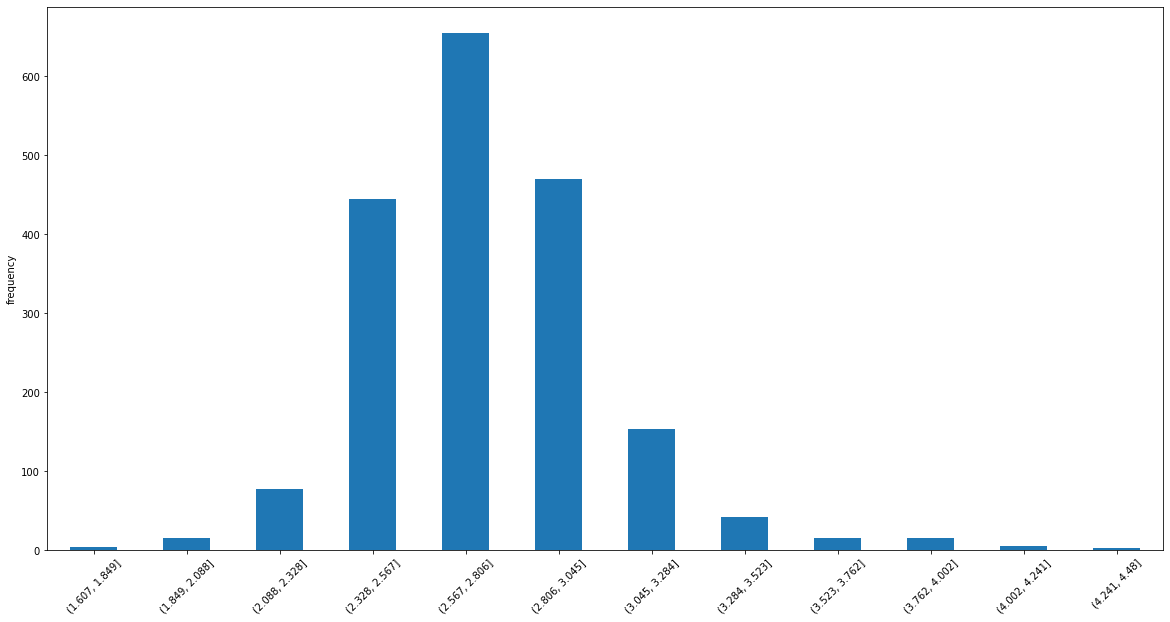


Boxplot:


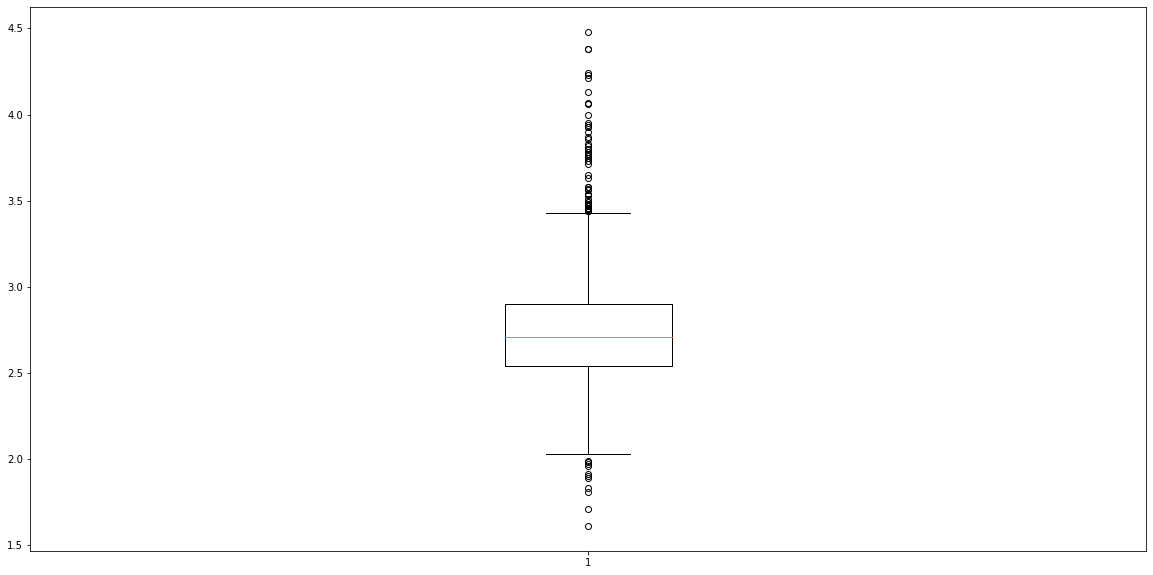


Principales estadísticos: 
count    1901.000000
mean        2.738106
std         0.309924
min         1.610000
25%         2.540000
50%         2.710000
75%         2.900000
max         4.480000
Name: PersPerOwnOccHous, dtype: float64

Asimetría: 1.0376928864428434
Curtosis: 3.532195426990128

 ****************************************************************************************** 


Columna: PersPerRentOccHous

Histograma:
(1.577, 1.842]     52
(1.842, 2.105]    365
(2.105, 2.368]    686
(2.368, 2.63]     414
(2.63, 2.892]     193
(2.892, 3.155]     86
(3.155, 3.418]     54
(3.418, 3.68]      27
(3.68, 3.943]      12
(3.943, 4.205]      5
(4.205, 4.468]      4
(4.468, 4.73]       3
Name: PersPerRentOccHous, dtype: int64


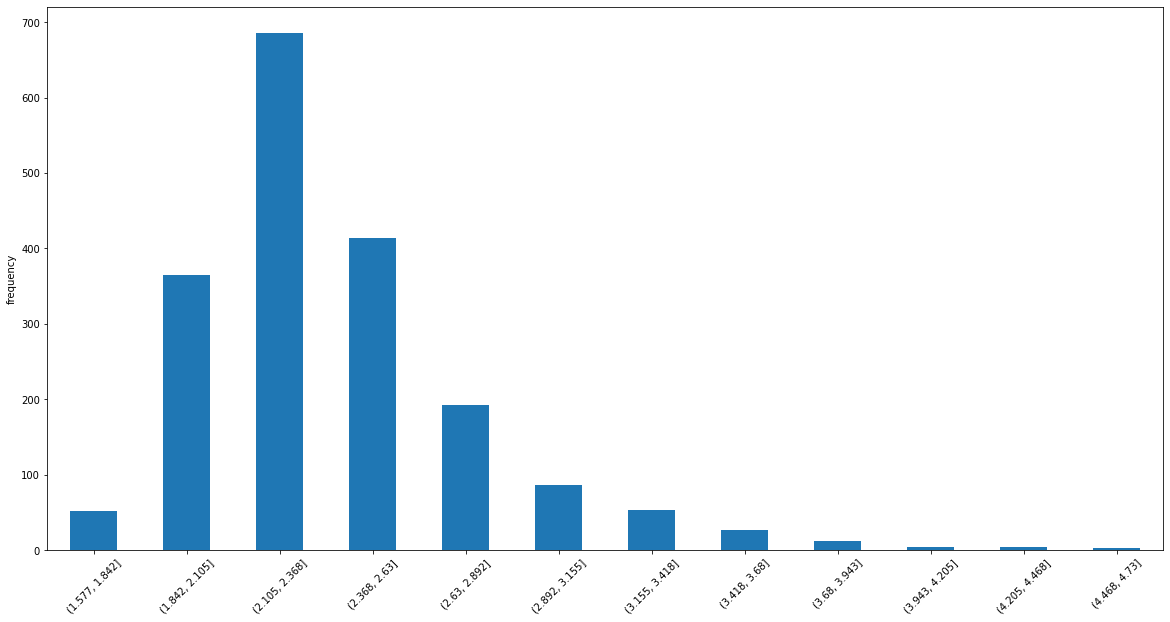


Boxplot:


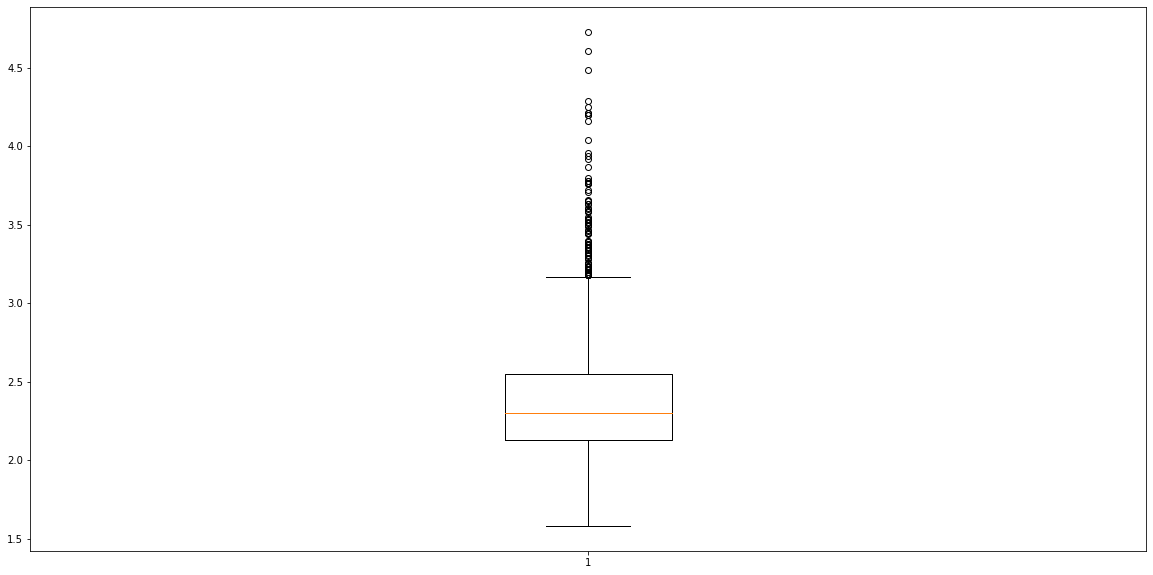


Principales estadísticos: 
count    1901.000000
mean        2.388837
std         0.401052
min         1.580000
25%         2.130000
50%         2.300000
75%         2.550000
max         4.730000
Name: PersPerRentOccHous, dtype: float64

Asimetría: 1.5535677630947369
Curtosis: 3.7701435542728627

 ****************************************************************************************** 


Columna: PctPersOwnOccup

Histograma:
(13.847, 20.818]      1
(20.818, 27.707]      9
(27.707, 34.595]     25
(34.595, 41.483]     52
(41.483, 48.372]    123
(48.372, 55.26]     208
(55.26, 62.148]     352
(62.148, 69.037]    394
(69.037, 75.925]    277
(75.925, 82.813]    209
(82.813, 89.702]    165
(89.702, 96.59]      86
Name: PctPersOwnOccup, dtype: int64


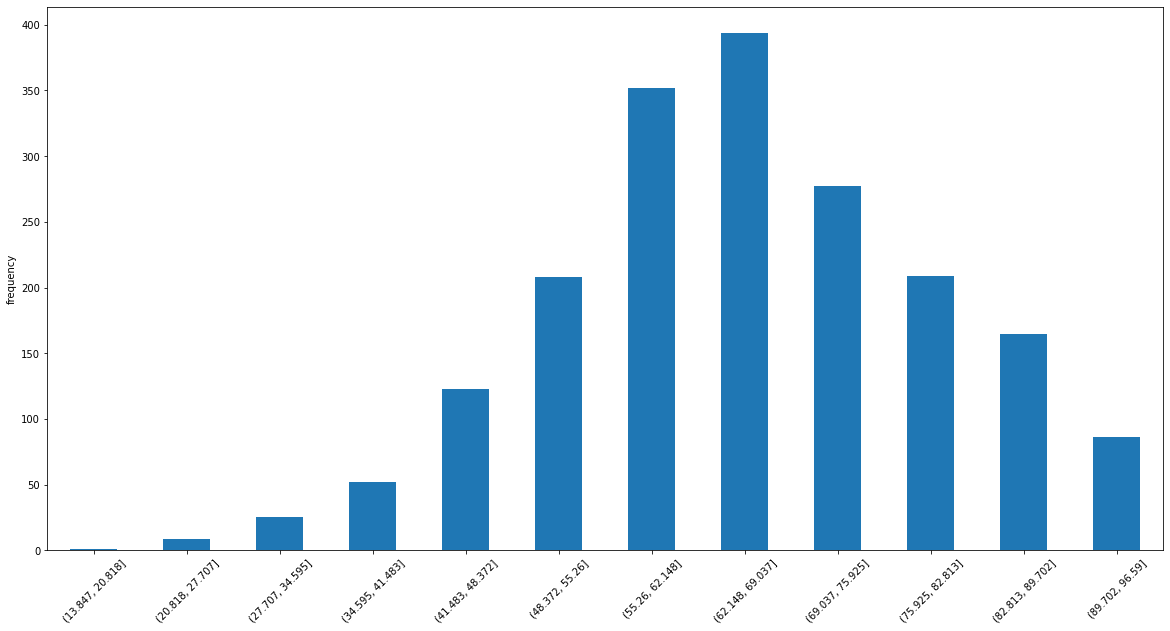


Boxplot:


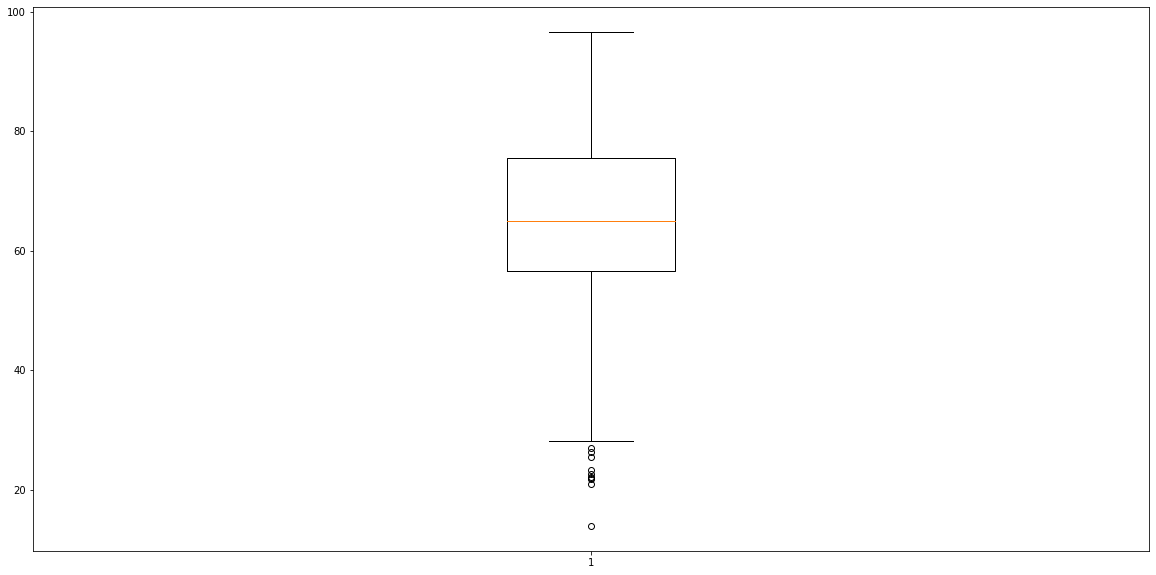


Principales estadísticos: 
count    1901.000000
mean       65.564171
std        14.168443
min        13.930000
25%        56.560000
50%        65.040000
75%        75.550000
max        96.590000
Name: PctPersOwnOccup, dtype: float64

Asimetría: -0.14411977459204822
Curtosis: -0.17980338634235826

 ****************************************************************************************** 


Columna: PctPersDenseHous

Histograma:
(0.0907, 5.095]    1447
(5.095, 10.04]      283
(10.04, 14.985]      76
(14.985, 19.93]      35
(19.93, 24.875]      28
(24.875, 29.82]      14
(29.82, 34.765]       3
(34.765, 39.71]       6
(39.71, 44.655]       3
(44.655, 49.6]        2
(49.6, 54.545]        1
(54.545, 59.49]       3
Name: PctPersDenseHous, dtype: int64


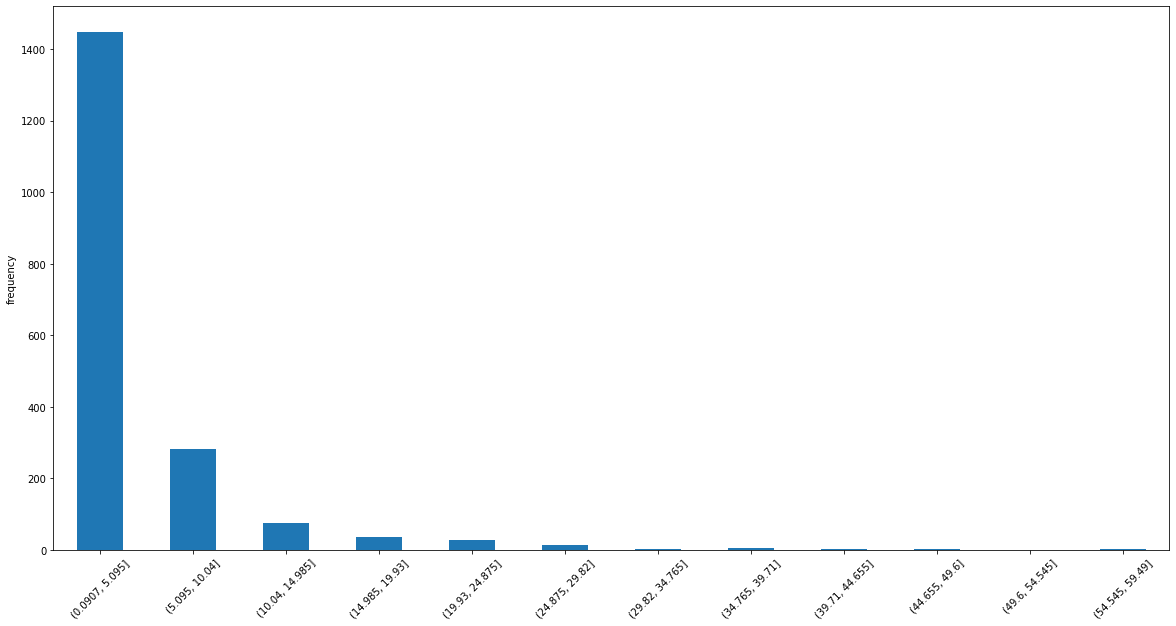


Boxplot:


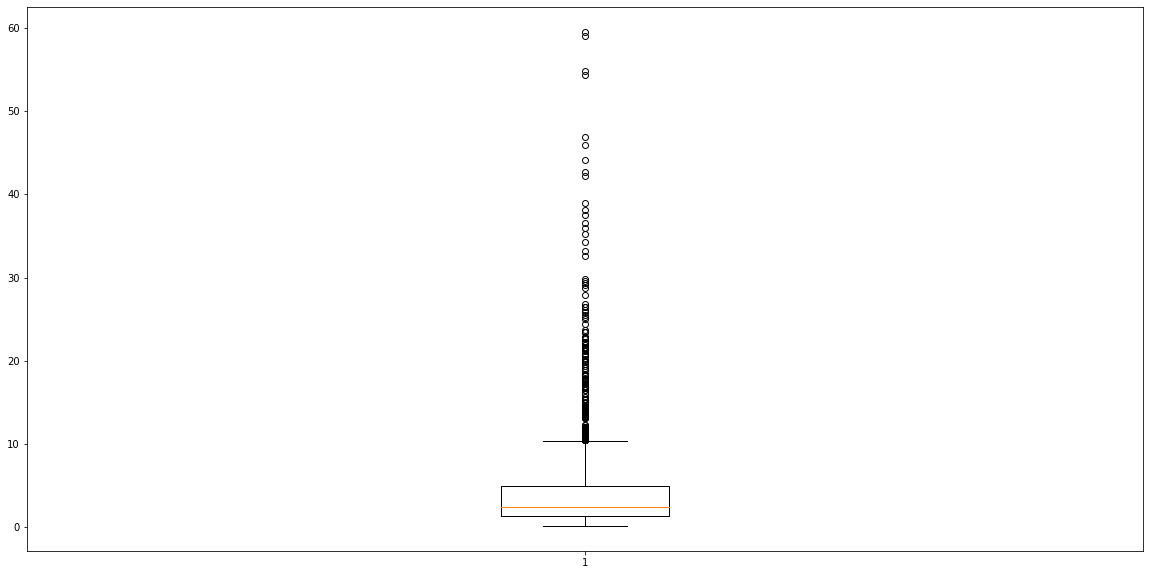


Principales estadísticos: 
count    1901.000000
mean        4.400295
std         5.939846
min         0.150000
25%         1.310000
50%         2.490000
75%         4.960000
max        59.490000
Name: PctPersDenseHous, dtype: float64

Asimetría: 4.040310681770802
Curtosis: 22.839649598813022

 ****************************************************************************************** 


Columna: PctHousLess3BR

Histograma:
(2.968, 10.75]     15
(10.75, 18.44]     57
(18.44, 26.13]    118
(26.13, 33.82]    160
(33.82, 41.51]    304
(41.51, 49.2]     462
(49.2, 56.89]     427
(56.89, 64.58]    199
(64.58, 72.27]     96
(72.27, 79.96]     45
(79.96, 87.65]     15
(87.65, 95.34]      3
Name: PctHousLess3BR, dtype: int64


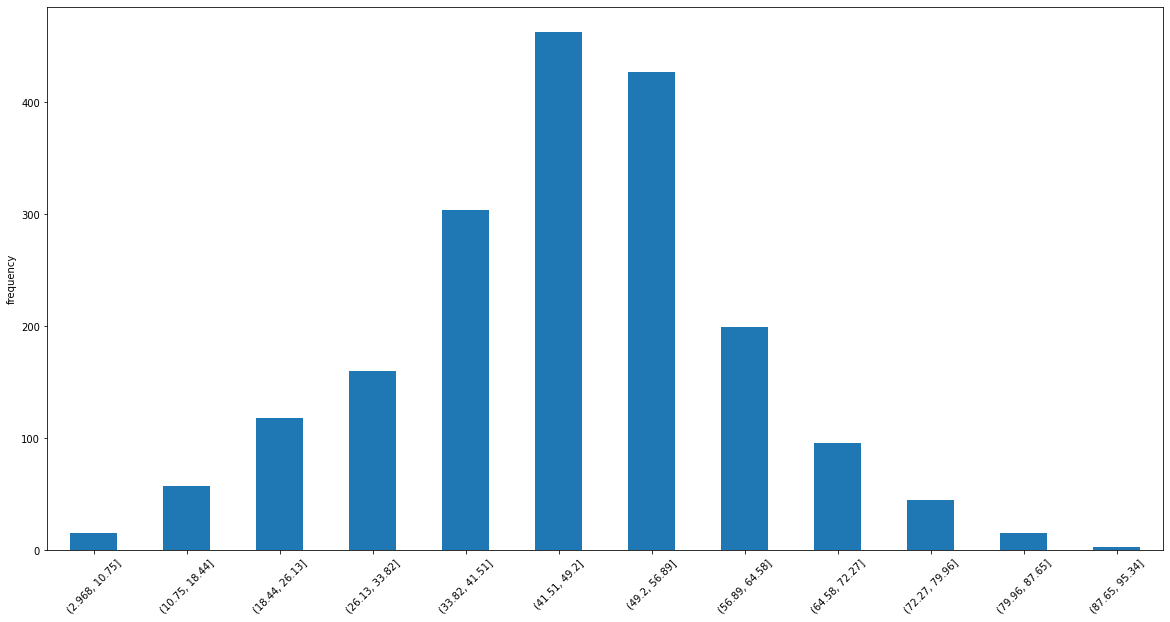


Boxplot:



Principales estadísticos: 
count    1901.000000
mean       45.849995
std        14.123887
min         3.060000
25%        37.670000
50%        46.830000
75%        54.220000
max        95.340000
Name: PctHousLess3BR, dtype: float64

Asimetría: -0.12616922189707253
Curtosis: 0.30429406833573713

 ****************************************************************************************** 


Columna: MedNumBR

Histograma:
(0.997, 1.25]       7
(1.25, 1.5]         0
(1.5, 1.75]         0
(1.75, 2.0]       733
(2.0, 2.25]         0
(2.25, 2.5]         0
(2.5, 2.75]         0
(2.75, 3.0]      1134
(3.0, 3.25]         0
(3.25, 3.5]         0
(3.5, 3.75]         0
(3.75, 4.0]        27
Name: MedNumBR, dtype: int64



Boxplot:



Principales estadísticos: 
count    1901.000000
mean        2.621252
std         0.520779
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: MedNumBR, dtype: float64

Asimetría: -0.27308577054889727
Curtosis: -1.0060188316922305

 ****************************************************************************************** 


Columna: HousVacant

Histograma:
(-136.732, 14430.333]       1872
(14430.333, 28824.667]        20
(28824.667, 43219.0]           4
(43219.0, 57613.333]           1
(57613.333, 72007.667]         2
(72007.667, 86402.0]           1
(86402.0, 100796.333]          0
(100796.333, 115190.667]       0
(115190.667, 129585.0]         0
(129585.0, 143979.333]         0
(143979.333, 158373.667]       0
(158373.667, 172768.0]         1
Name: HousVacant, dtype: int64



Boxplot:



Principales estadísticos: 
count      1901.000000
mean       1733.551289
std        5944.423526
min          36.000000
25%         309.000000
50%         584.000000
75%        1281.000000
max      172768.000000
Name: HousVacant, dtype: float64

Asimetría: 16.572689678698097
Curtosis: 399.93051833345726

 ****************************************************************************************** 


Columna: PctHousOccup

Histograma:
(37.408, 42.598]      1
(42.598, 47.725]      1
(47.725, 52.852]      0
(52.852, 57.98]       2
(57.98, 63.108]       6
(63.108, 68.235]      5
(68.235, 73.363]     13
(73.363, 78.49]      16
(78.49, 83.618]      36
(83.618, 88.745]    182
(88.745, 93.872]    658
(93.872, 99.0]      981
Name: PctHousOccup, dtype: int64



Boxplot:


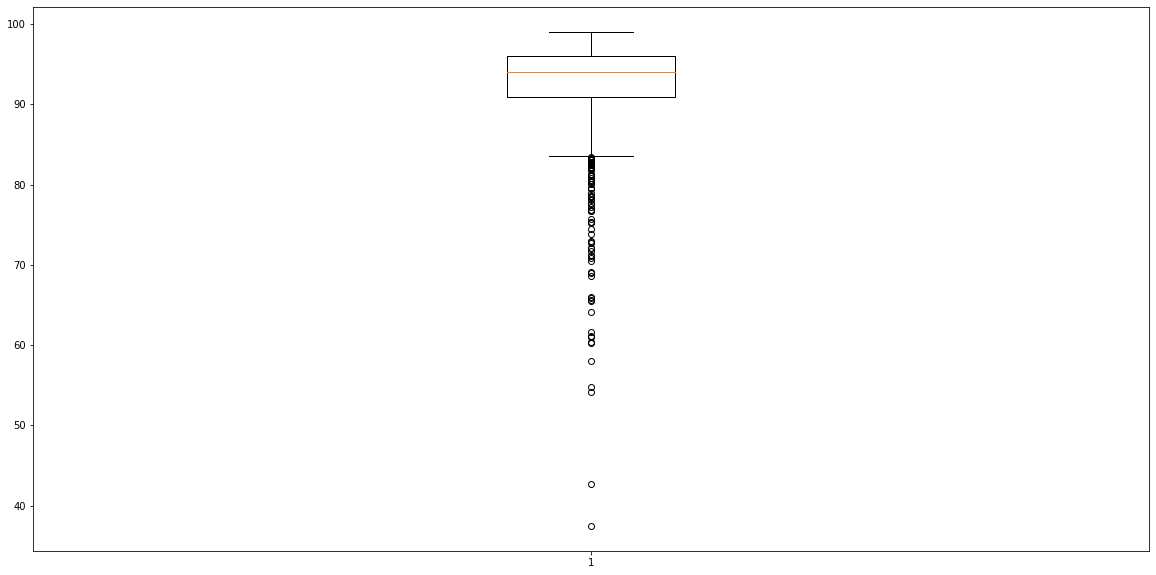


Principales estadísticos: 
count    1901.000000
mean       92.690142
std         5.286627
min        37.470000
25%        90.950000
50%        94.010000
75%        95.940000
max        99.000000
Name: PctHousOccup, dtype: float64

Asimetría: -3.437937943740997
Curtosis: 20.162508296715398

 ****************************************************************************************** 


Columna: PctHousOwnOcc

Histograma:
(16.78, 23.485]      9
(23.485, 30.11]     15
(30.11, 36.735]     42
(36.735, 43.36]     92
(43.36, 49.985]    173
(49.985, 56.61]    259
(56.61, 63.235]    426
(63.235, 69.86]    327
(69.86, 76.485]    234
(76.485, 83.11]    160
(83.11, 89.735]    112
(89.735, 96.36]     52
Name: PctHousOwnOcc, dtype: int64


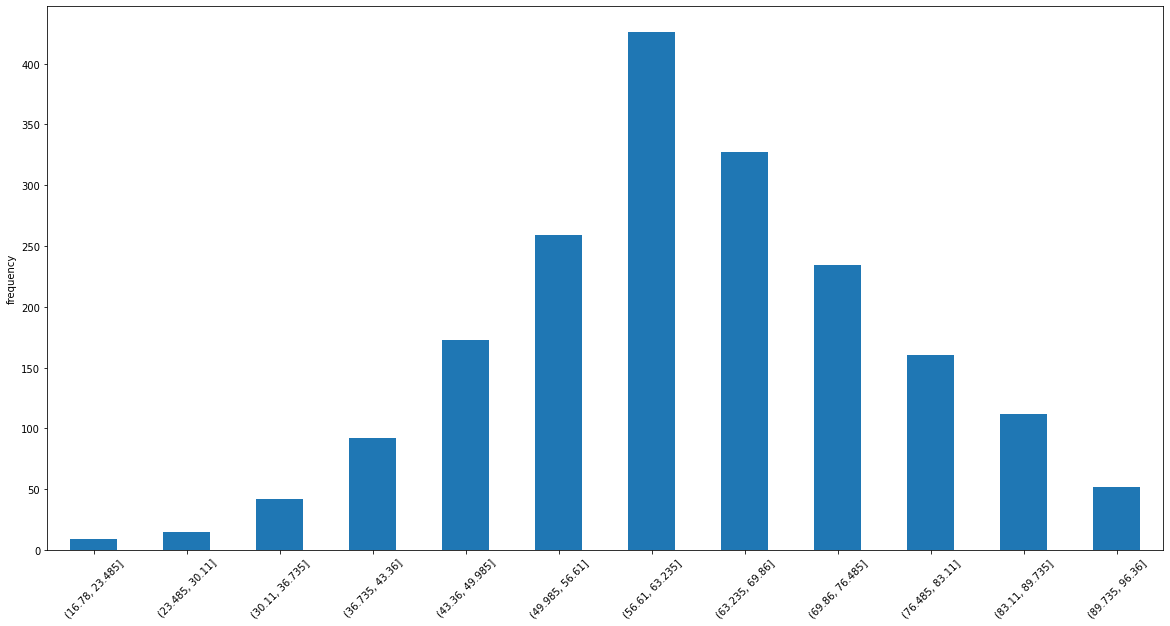


Boxplot:


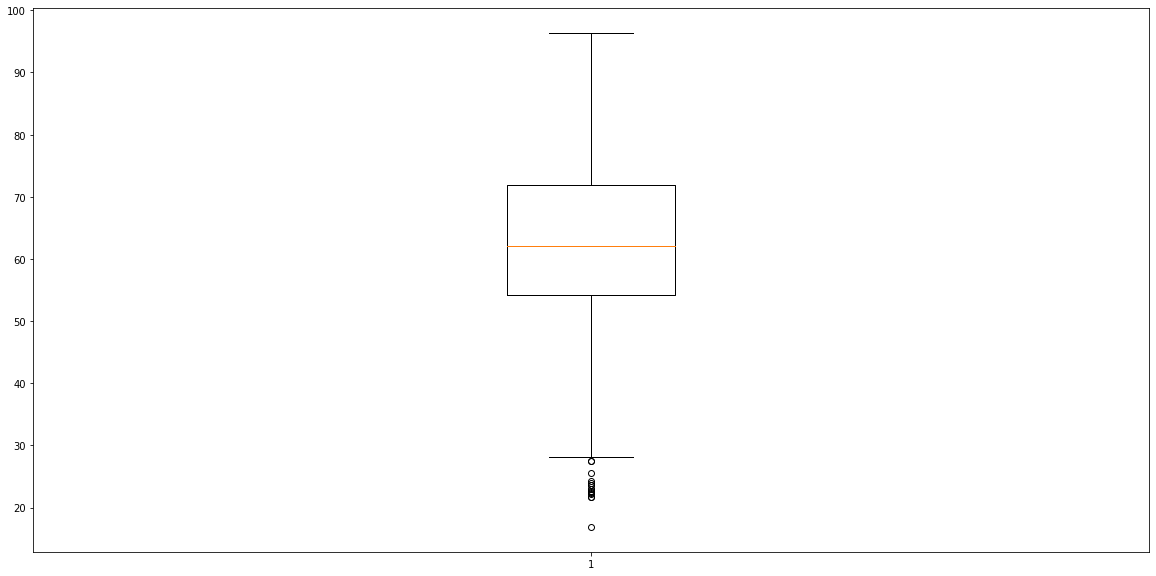


Principales estadísticos: 
count    1901.000000
mean       62.736391
std        13.960773
min        16.860000
25%        54.220000
50%        62.110000
75%        71.830000
max        96.360000
Name: PctHousOwnOcc, dtype: float64

Asimetría: -0.06004198286771841
Curtosis: -0.07371624723510939

 ****************************************************************************************** 


Columna: PctVacantBoarded

Histograma:
(-0.0399, 3.324]    1394
(3.324, 6.648]       339
(6.648, 9.972]        83
(9.972, 13.297]       50
(13.297, 16.621]      16
(16.621, 19.945]       9
(19.945, 23.269]       3
(23.269, 26.593]       3
(26.593, 29.918]       0
(29.918, 33.242]       2
(33.242, 36.566]       1
(36.566, 39.89]        1
Name: PctVacantBoarded, dtype: int64



Boxplot:


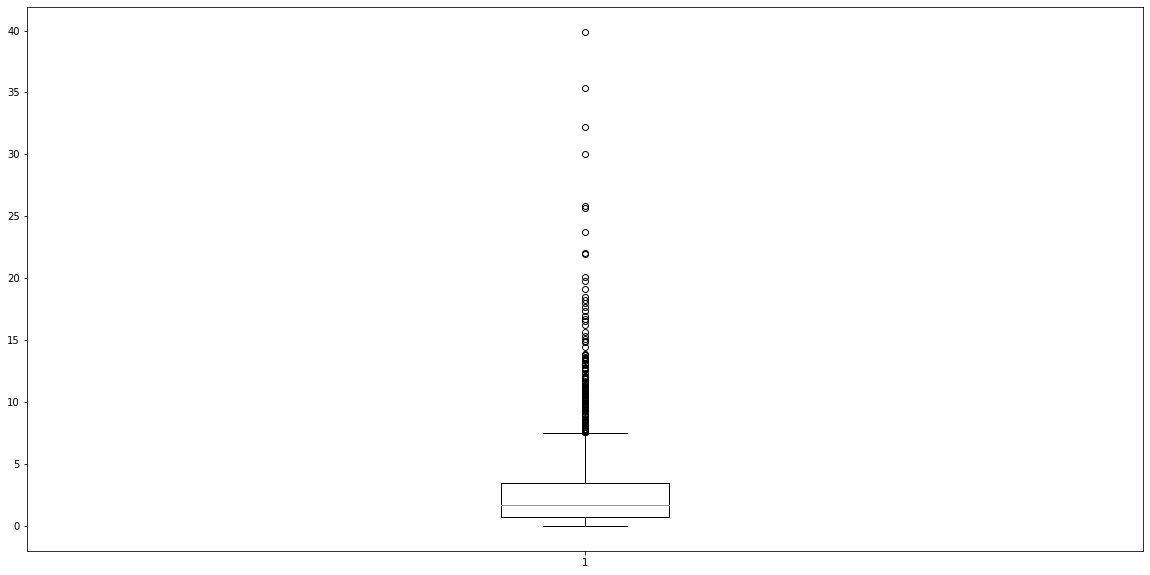


Principales estadísticos: 
count    1901.000000
mean        2.770410
std         3.453315
min         0.000000
25%         0.760000
50%         1.720000
75%         3.480000
max        39.890000
Name: PctVacantBoarded, dtype: float64

Asimetría: 3.635377645608263
Curtosis: 21.730164275662528

 ****************************************************************************************** 


Columna: PctVacMore6Mos

Histograma:
(3.041, 9.704]       18
(9.704, 16.288]     139
(16.288, 22.872]    243
(22.872, 29.457]    310
(29.457, 36.041]    344
(36.041, 42.625]    308
(42.625, 49.209]    243
(49.209, 55.793]    135
(55.793, 62.377]     89
(62.377, 68.962]     47
(68.962, 75.546]     17
(75.546, 82.13]       8
Name: PctVacMore6Mos, dtype: int64



Boxplot:


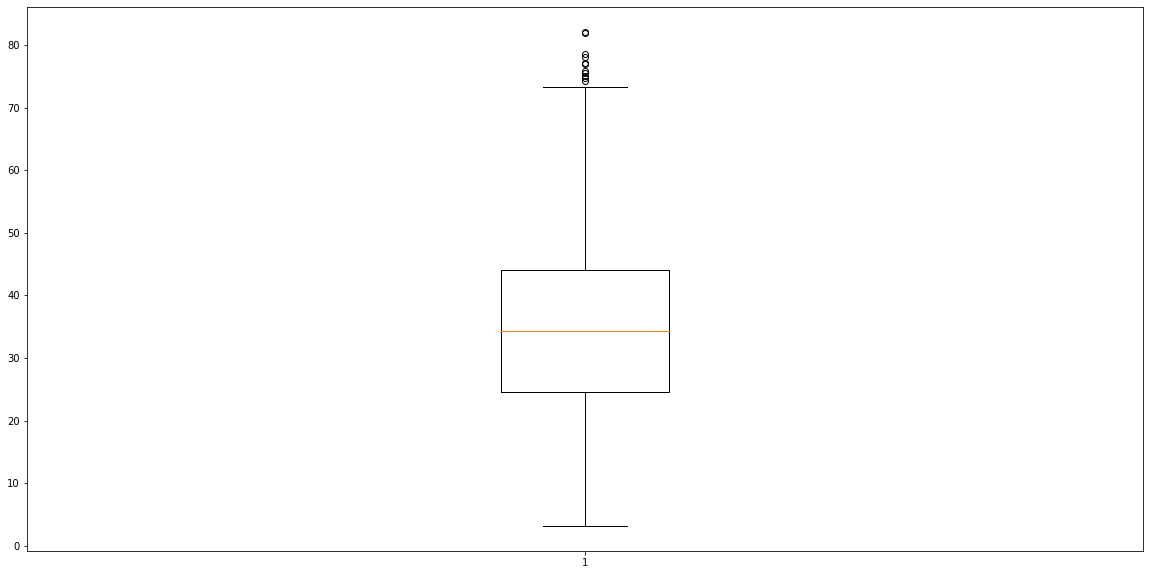


Principales estadísticos: 
count    1901.000000
mean       35.009584
std        14.017300
min         3.120000
25%        24.550000
50%        34.310000
75%        44.130000
max        82.130000
Name: PctVacMore6Mos, dtype: float64

Asimetría: 0.4106501712563559
Curtosis: -0.17430690556707917

 ****************************************************************************************** 


Columna: MedYrHousBuilt

Histograma:
(1938.952, 1943.0]    139
(1943.0, 1947.0]       71
(1947.0, 1951.0]       91
(1951.0, 1955.0]      132
(1955.0, 1959.0]      229
(1959.0, 1963.0]      248
(1963.0, 1967.0]      285
(1967.0, 1971.0]      258
(1971.0, 1975.0]      225
(1975.0, 1979.0]      137
(1979.0, 1983.0]       64
(1983.0, 1987.0]       22
Name: MedYrHousBuilt, dtype: int64


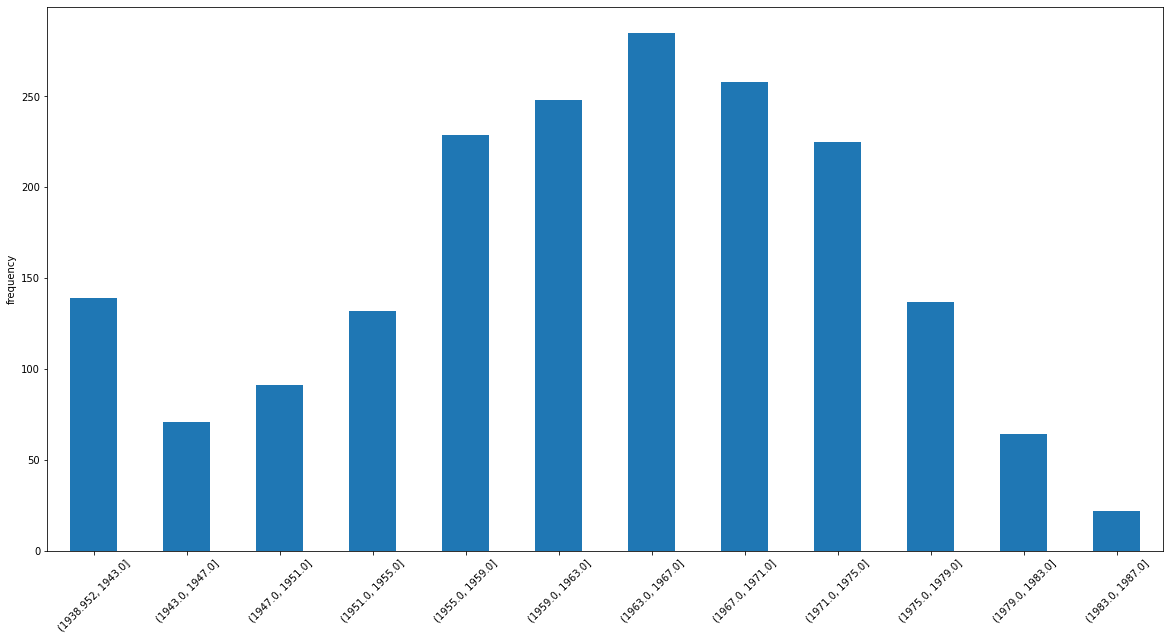


Boxplot:


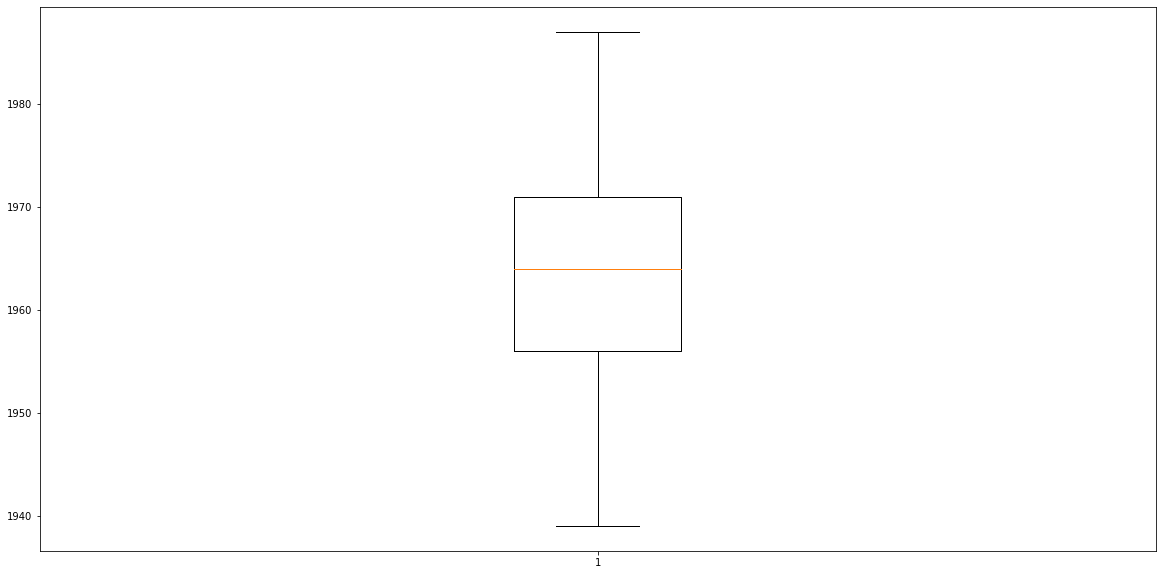


Principales estadísticos: 
count    1901.000000
mean     1962.922146
std        11.036792
min      1939.000000
25%      1956.000000
50%      1964.000000
75%      1971.000000
max      1987.000000
Name: MedYrHousBuilt, dtype: float64

Asimetría: -0.4194172046045191
Curtosis: -0.3695122068457777

 ****************************************************************************************** 


Columna: PctHousNoPhone

Histograma:
(-0.0236, 1.969]    742
(1.969, 3.938]      337
(3.938, 5.908]      233
(5.908, 7.877]      187
(7.877, 9.846]      172
(9.846, 11.815]     109
(11.815, 13.784]     64
(13.784, 15.753]     26
(15.753, 17.722]     23
(17.722, 19.692]      4
(19.692, 21.661]      3
(21.661, 23.63]       1
Name: PctHousNoPhone, dtype: int64


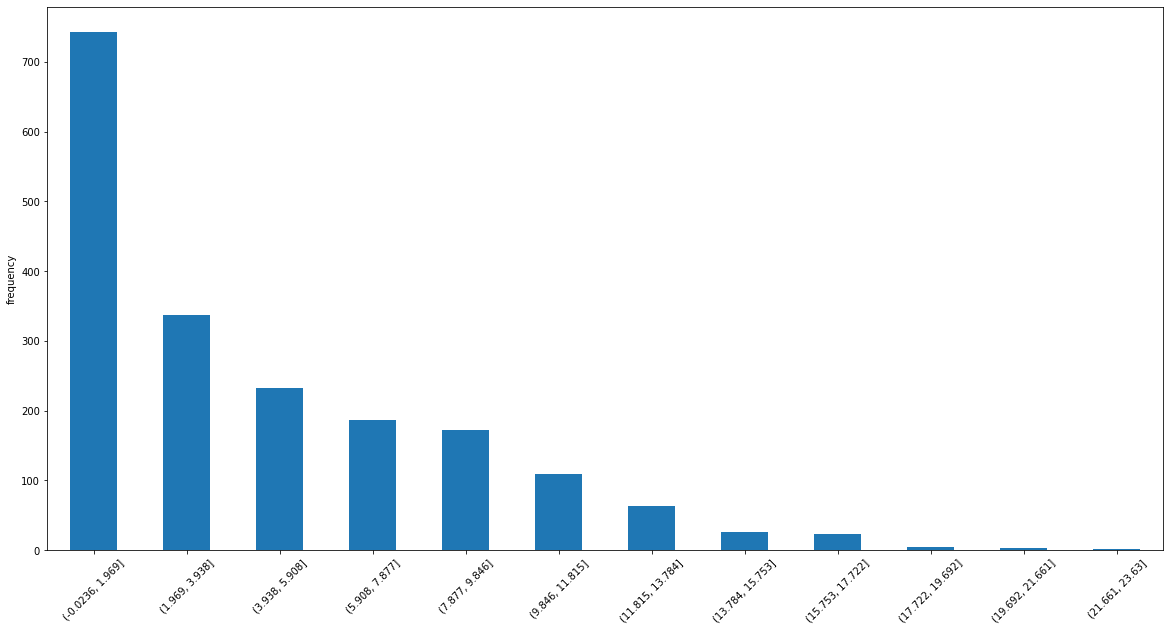


Boxplot:


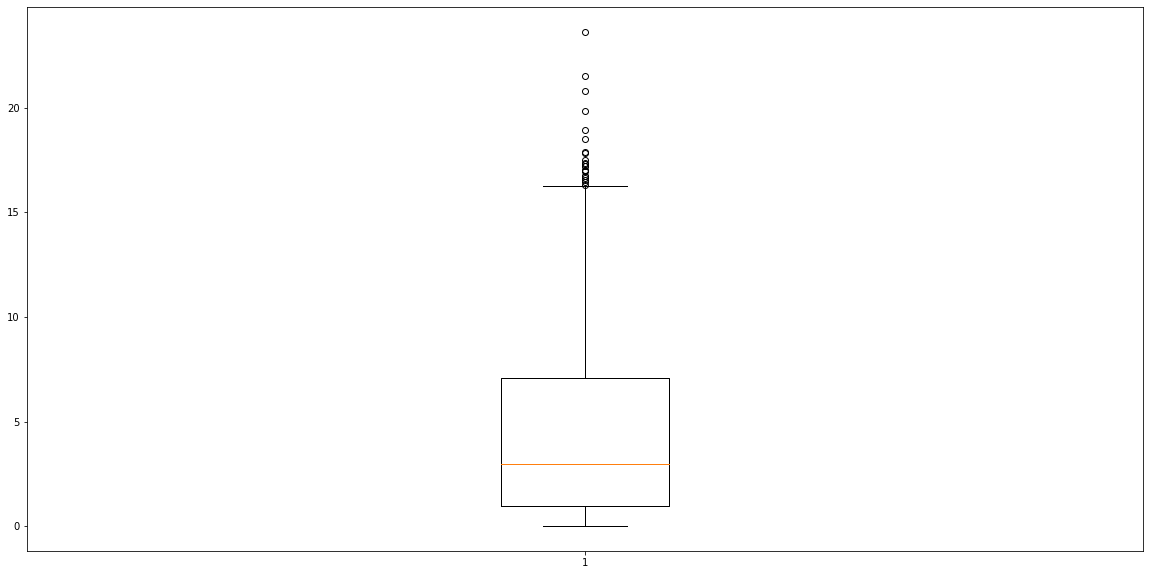


Principales estadísticos: 
count    1901.000000
mean        4.410505
std         4.137890
min         0.000000
25%         0.940000
50%         2.970000
75%         7.080000
max        23.630000
Name: PctHousNoPhone, dtype: float64

Asimetría: 1.0931494623415037
Curtosis: 0.6741604188329648

 ****************************************************************************************** 


Columna: PctWOFullPlumb

Histograma:
(-0.00533, 0.444]    1233
(0.444, 0.888]        482
(0.888, 1.332]        125
(1.332, 1.777]         29
(1.777, 2.221]         14
(2.221, 2.665]          8
(2.665, 3.109]          3
(3.109, 3.553]          3
(3.553, 3.998]          1
(3.998, 4.442]          2
(4.442, 4.886]          0
(4.886, 5.33]           1
Name: PctWOFullPlumb, dtype: int64



Boxplot:



Principales estadísticos: 
count    1901.000000
mean        0.432772
std         0.432401
min         0.000000
25%         0.170000
50%         0.330000
75%         0.560000
max         5.330000
Name: PctWOFullPlumb, dtype: float64

Asimetría: 3.432327978992599
Curtosis: 21.14874732245519

 ****************************************************************************************** 


Columna: OwnOccLowQuart

Histograma:
(15215.699, 56058.417]      760
(56058.417, 96416.833]      467
(96416.833, 136775.25]      266
(136775.25, 177133.667]     205
(177133.667, 217492.083]    102
(217492.083, 257850.5]       46
(257850.5, 298208.917]       20
(298208.917, 338567.333]     15
(338567.333, 378925.75]       7
(378925.75, 419284.167]       5
(419284.167, 459642.583]      2
(459642.583, 500001.0]        6
Name: OwnOccLowQuart, dtype: int64


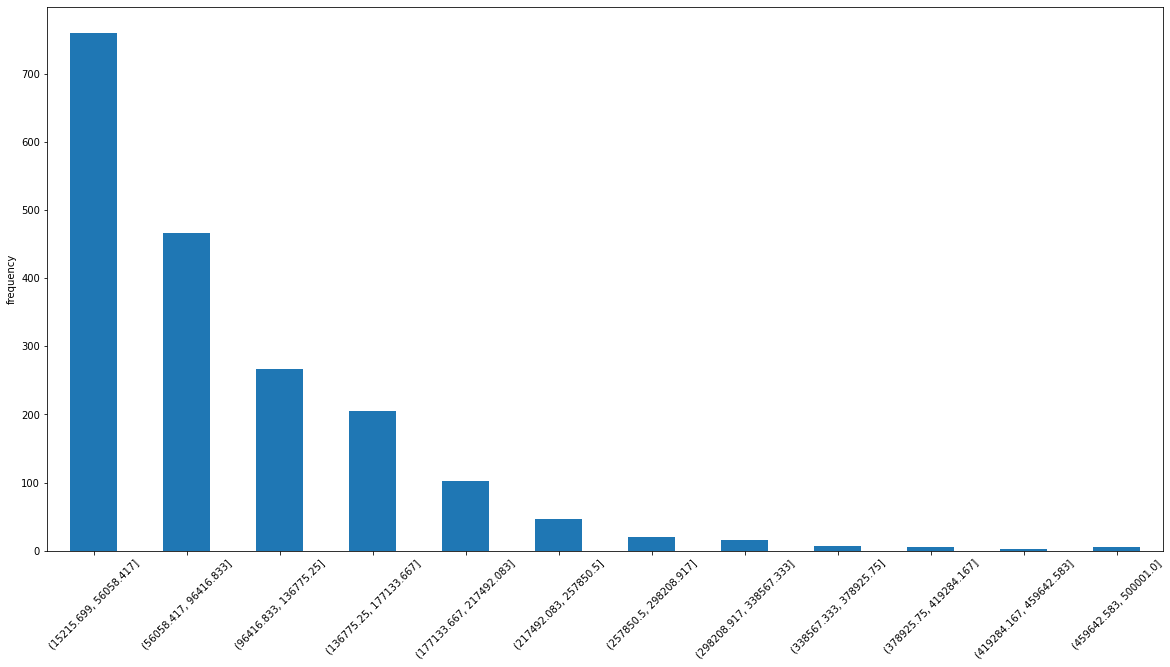


Boxplot:



Principales estadísticos: 
count      1901.000000
mean      92683.064177
std       69419.705256
min       15700.000000
25%       42200.000000
50%       66900.000000
75%      128100.000000
max      500001.000000
Name: OwnOccLowQuart, dtype: float64

Asimetría: 1.9174164369804392
Curtosis: 5.416353705310883

 ****************************************************************************************** 


Columna: OwnOccMedVal

Histograma:
(26126.599, 66050.083]      654
(66050.083, 105500.167]     468
(105500.167, 144950.25]     218
(144950.25, 184400.333]     224
(184400.333, 223850.417]    136
(223850.417, 263300.5]       86
(263300.5, 302750.583]       44
(302750.583, 342200.667]     16
(342200.667, 381650.75]      18
(381650.75, 421100.833]       9
(421100.833, 460550.917]      9
(460550.917, 500001.0]       19
Name: OwnOccMedVal, dtype: int64



Boxplot:



Principales estadísticos: 
count      1901.000000
mean     118021.311941
std       85035.634706
min       26600.000000
25%       57100.000000
50%       86000.000000
75%      159800.000000
max      500001.000000
Name: OwnOccMedVal, dtype: float64

Asimetría: 1.8263677796791813
Curtosis: 4.070031593323357

 ****************************************************************************************** 


Columna: OwnOccHiQuart

Histograma:
(36236.699, 75308.417]      474
(75308.417, 113916.833]     498
(113916.833, 152525.25]     230
(152525.25, 191133.667]     199
(191133.667, 229742.083]    151
(229742.083, 268350.5]      118
(268350.5, 306958.917]       68
(306958.917, 345567.333]     44
(345567.333, 384175.75]      33
(384175.75, 422784.167]      20
(422784.167, 461392.583]     14
(461392.583, 500001.0]       52
Name: OwnOccHiQuart, dtype: int64



Boxplot:


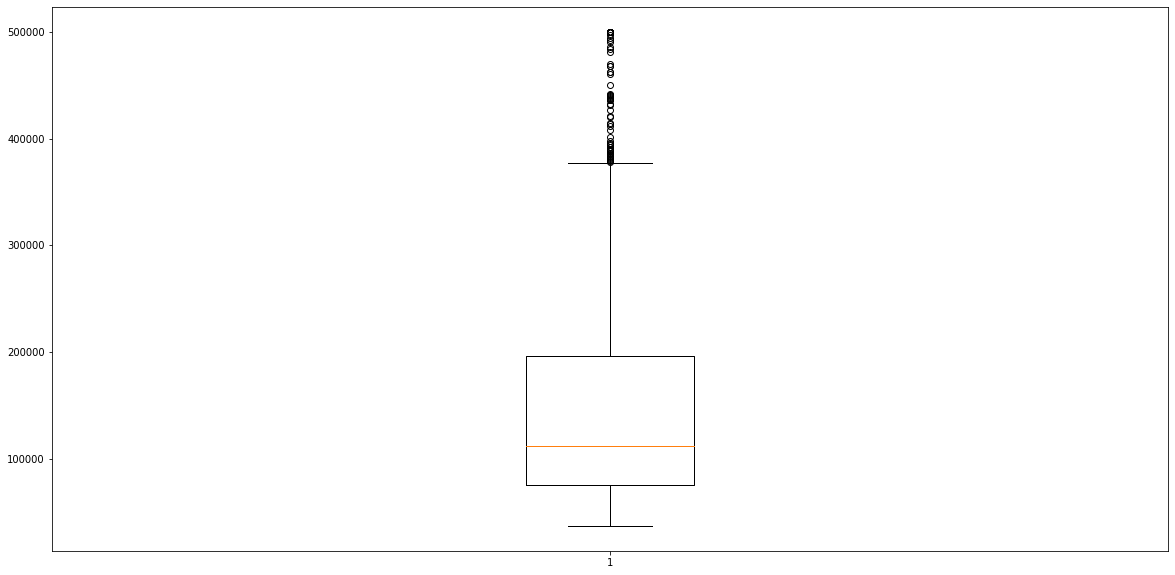


Principales estadísticos: 
count      1901.000000
mean     151346.049448
std      102355.515201
min       36700.000000
25%       75500.000000
50%      111800.000000
75%      196400.000000
max      500001.000000
Name: OwnOccHiQuart, dtype: float64

Asimetría: 1.5752582042989658
Curtosis: 2.2405577464872573

 ****************************************************************************************** 


Columna: OwnOccQrange

Histograma:
(-331.0, 27583.333]         215
(27583.333, 55166.667]      992
(55166.667, 82750.0]        356
(82750.0, 110333.333]       147
(110333.333, 137916.667]     75
(137916.667, 165500.0]       52
(165500.0, 193083.333]       36
(193083.333, 220666.667]     12
(220666.667, 248250.0]       10
(248250.0, 275833.333]        5
(275833.333, 303416.667]      0
(303416.667, 331000.0]        1
Name: OwnOccQrange, dtype: int64


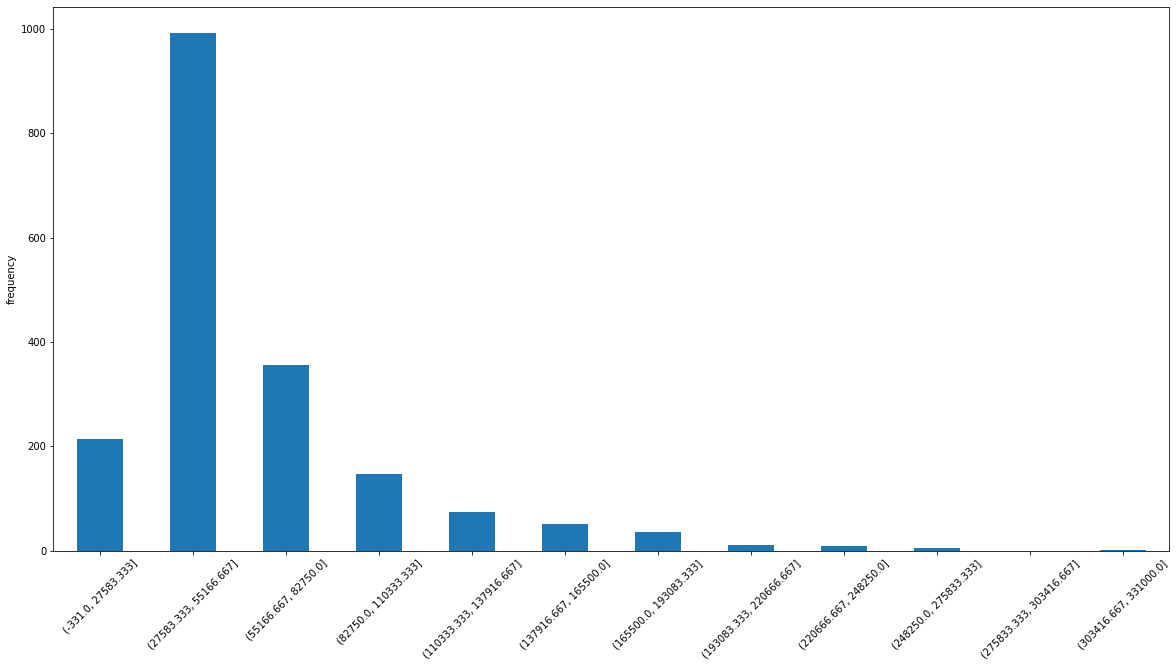


Boxplot:


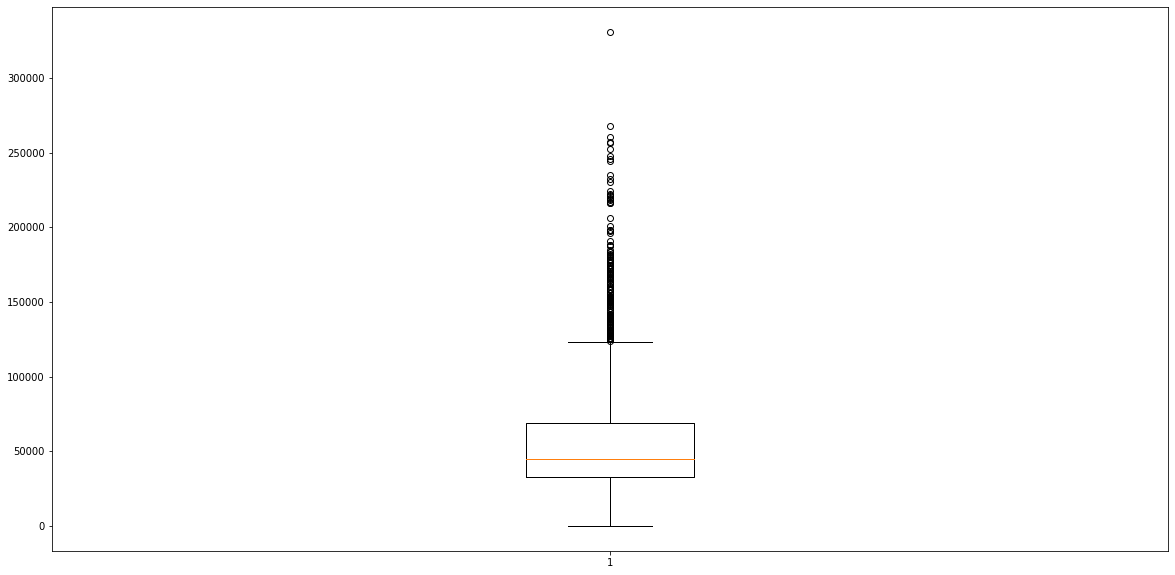


Principales estadísticos: 
count      1901.000000
mean      58662.985271
std       40090.138688
min           0.000000
25%       33100.000000
50%       44700.000000
75%       69200.000000
max      331000.000000
Name: OwnOccQrange, dtype: float64

Asimetría: 2.155771838855551
Curtosis: 5.651347342281971

 ****************************************************************************************** 


Columna: RentLowQ

Histograma:
(98.098, 174.167]     251
(174.167, 249.333]    393
(249.333, 324.5]      368
(324.5, 399.667]      317
(399.667, 474.833]    233
(474.833, 550.0]      176
(550.0, 625.167]       97
(625.167, 700.333]     36
(700.333, 775.5]       22
(775.5, 850.667]        4
(850.667, 925.833]      2
(925.833, 1001.0]       2
Name: RentLowQ, dtype: int64


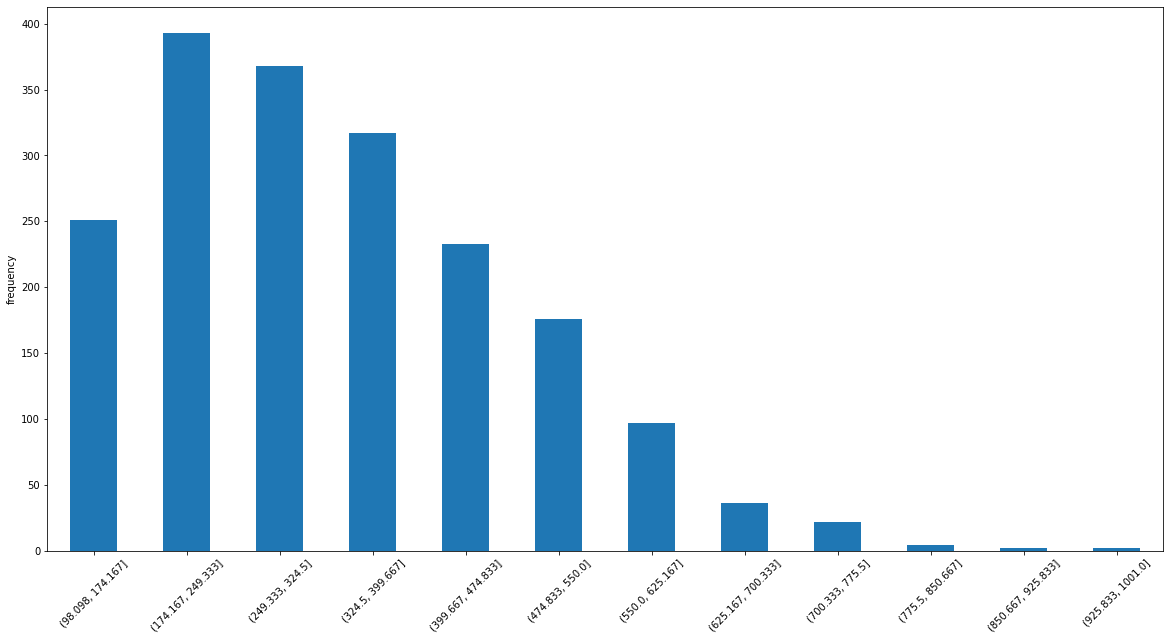


Boxplot:


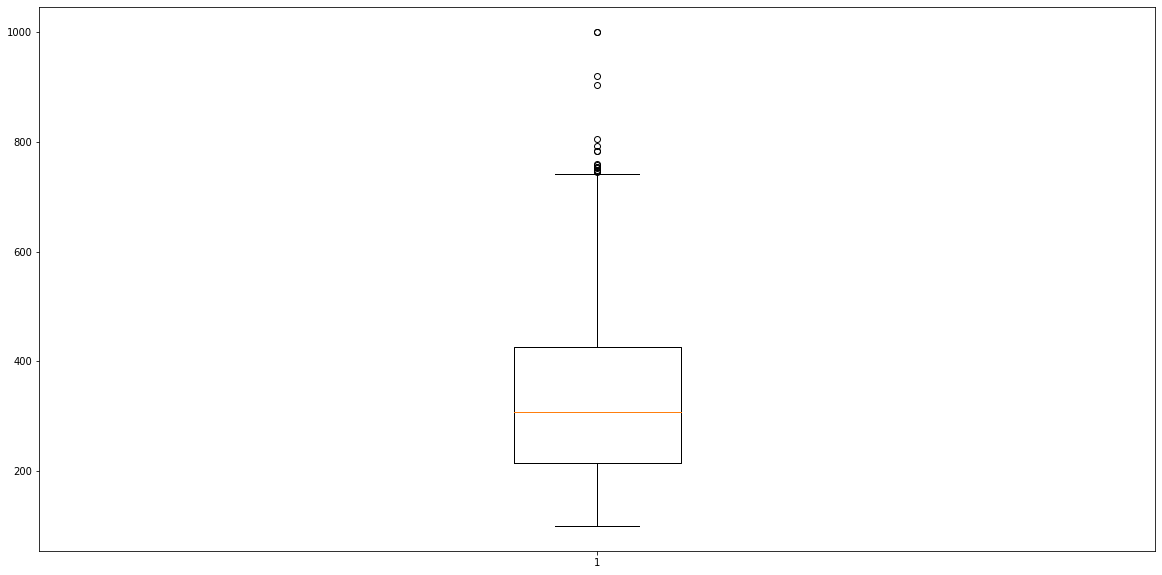


Principales estadísticos: 
count    1901.000000
mean      332.169911
std       146.604064
min        99.000000
25%       215.000000
50%       308.000000
75%       426.000000
max      1001.000000
Name: RentLowQ, dtype: float64

Asimetría: 0.7400913467898035
Curtosis: 0.3060424401785511

 ****************************************************************************************** 


Columna: RentMedian

Histograma:
(138.138, 210.833]     92
(210.833, 282.667]    341
(282.667, 354.5]      337
(354.5, 426.333]      260
(426.333, 498.167]    251
(498.167, 570.0]      199
(570.0, 641.833]      178
(641.833, 713.667]    115
(713.667, 785.5]       55
(785.5, 857.333]       25
(857.333, 929.167]     22
(929.167, 1001.0]      26
Name: RentMedian, dtype: int64



Boxplot:


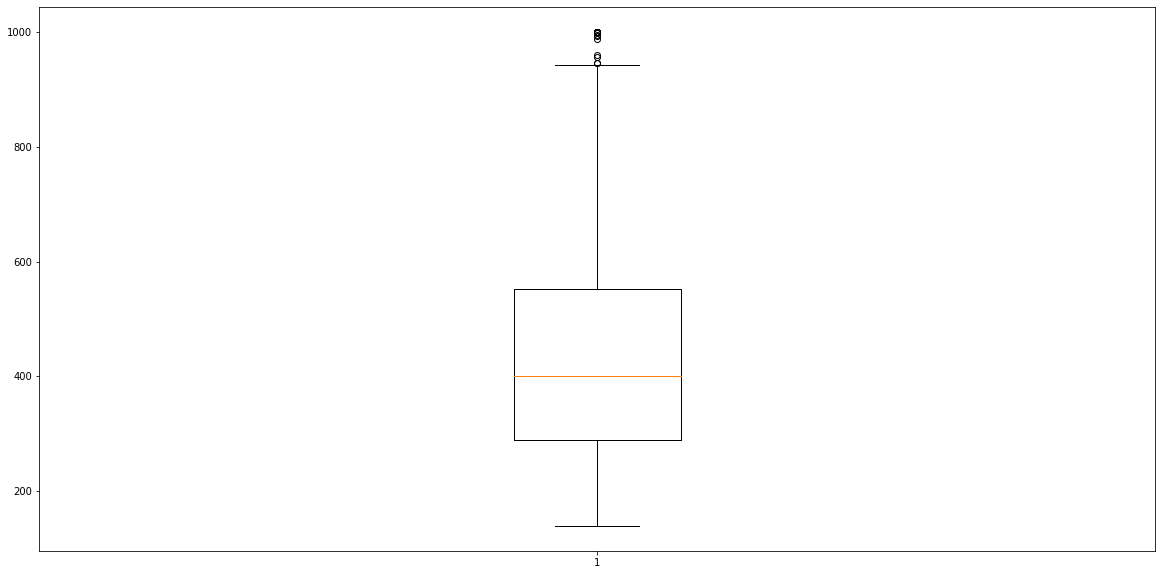


Principales estadísticos: 
count    1901.000000
mean      433.396633
std       175.035610
min       139.000000
25%       290.000000
50%       400.000000
75%       552.000000
max      1001.000000
Name: RentMedian, dtype: float64

Asimetría: 0.7919692077397643
Curtosis: 0.25338535828695186

 ****************************************************************************************** 


Columna: RentHighQ

Histograma:
(202.202, 269.5]     60
(269.5, 336.0]      283
(336.0, 402.5]      316
(402.5, 469.0]      225
(469.0, 535.5]      199
(535.5, 602.0]      174
(602.0, 668.5]      156
(668.5, 735.0]      159
(735.0, 801.5]       83
(801.5, 868.0]       80
(868.0, 934.5]       61
(934.5, 1001.0]     105
Name: RentHighQ, dtype: int64



Boxplot:



Principales estadísticos: 
count    1901.000000
mean      534.154655
std       204.062881
min       203.000000
25%       367.000000
50%       494.000000
75%       675.000000
max      1001.000000
Name: RentHighQ, dtype: float64

Asimetría: 0.6613806257587469
Curtosis: -0.49779722891081324

 ****************************************************************************************** 


Columna: RentQrange

Histograma:
(-0.803, 66.917]        3
(66.917, 133.833]     355
(133.833, 200.75]     821
(200.75, 267.667]     352
(267.667, 334.583]    206
(334.583, 401.5]      102
(401.5, 468.417]       35
(468.417, 535.333]     18
(535.333, 602.25]       3
(602.25, 669.167]       3
(669.167, 736.083]      1
(736.083, 803.0]        2
Name: RentQrange, dtype: int64


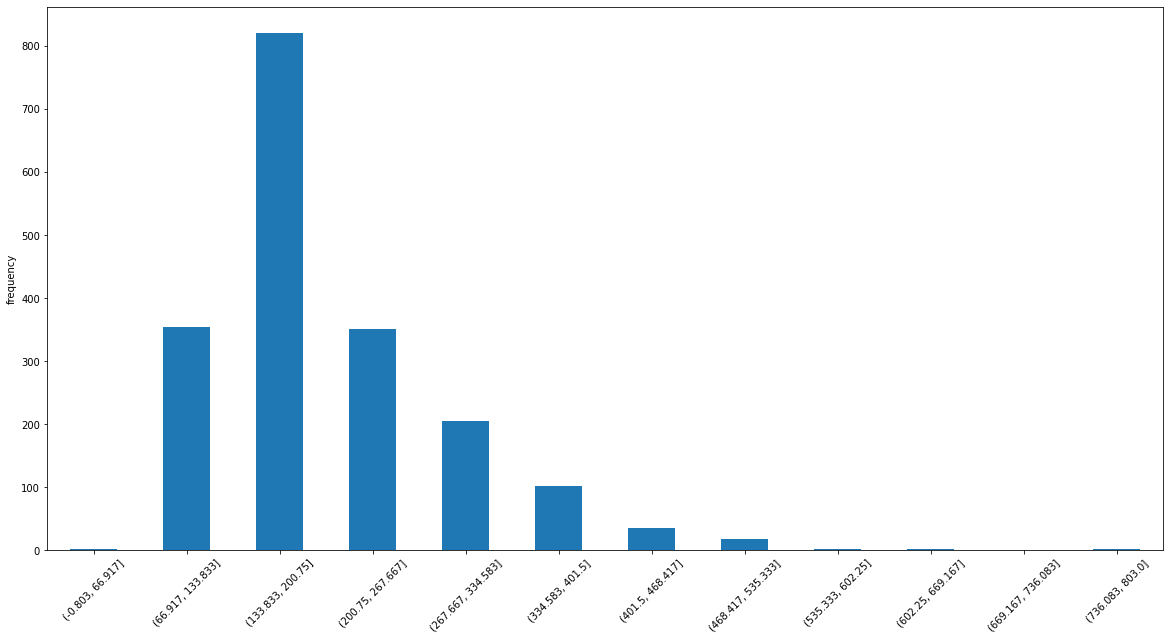


Boxplot:


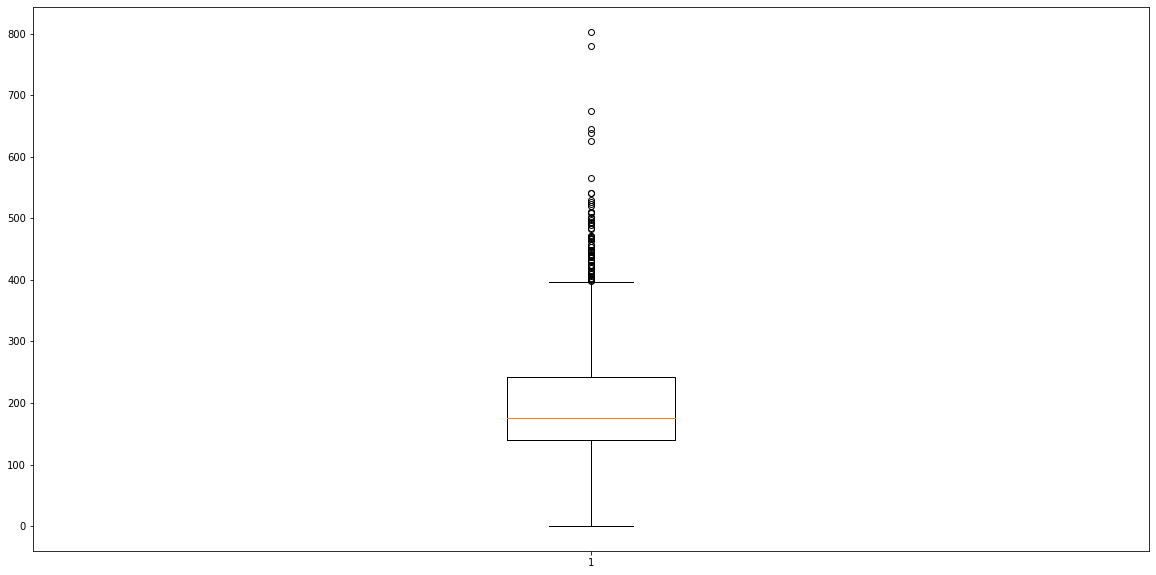


Principales estadísticos: 
count    1901.000000
mean      201.984745
std        87.508546
min         0.000000
25%       140.000000
50%       175.000000
75%       243.000000
max       803.000000
Name: RentQrange, dtype: float64

Asimetría: 1.6712606202925393
Curtosis: 4.313687133144251

 ****************************************************************************************** 


Columna: MedRent

Histograma:
(191.191, 259.417]     25
(259.417, 326.833]    218
(326.833, 394.25]     385
(394.25, 461.667]     282
(461.667, 529.083]    243
(529.083, 596.5]      190
(596.5, 663.917]      184
(663.917, 731.333]    157
(731.333, 798.75]      89
(798.75, 866.167]      55
(866.167, 933.583]     27
(933.583, 1001.0]      46
Name: MedRent, dtype: int64


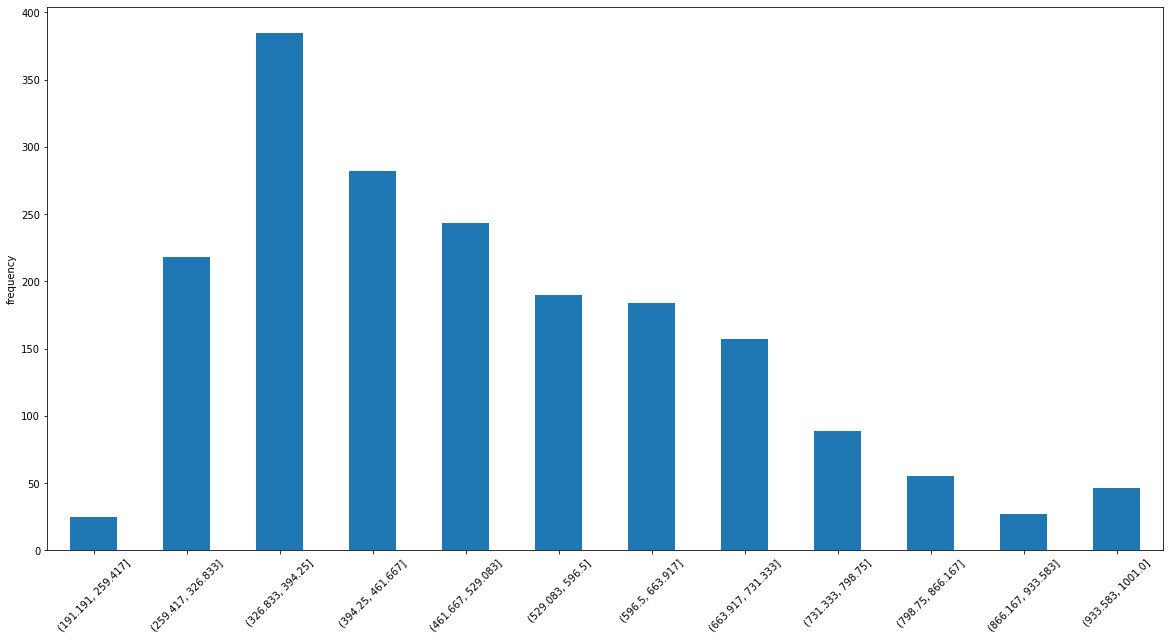


Boxplot:


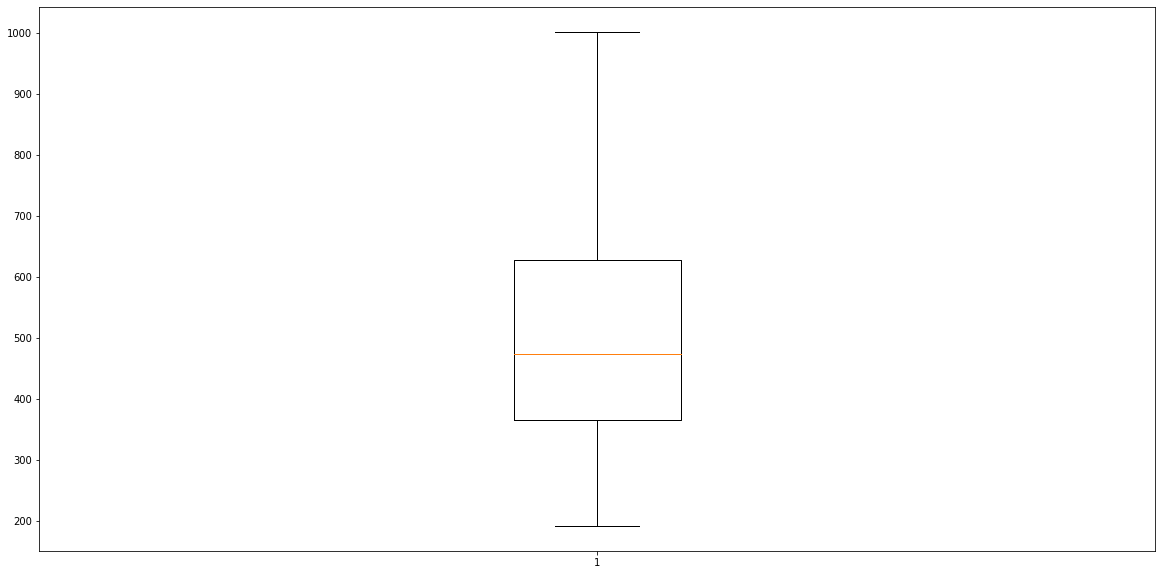


Principales estadísticos: 
count    1901.000000
mean      507.589164
std       173.221270
min       192.000000
25%       366.000000
50%       473.000000
75%       627.000000
max      1001.000000
Name: MedRent, dtype: float64

Asimetría: 0.7538112892863792
Curtosis: -0.040169108835646394

 ****************************************************************************************** 


Columna: MedRentPctHousInc

Histograma:
(14.88, 16.583]       2
(16.583, 18.267]      1
(18.267, 19.95]      13
(19.95, 21.633]      50
(21.633, 23.317]    185
(23.317, 25.0]      433
(25.0, 26.683]      382
(26.683, 28.367]    414
(28.367, 30.05]     241
(30.05, 31.733]      88
(31.733, 33.417]     51
(33.417, 35.1]       41
Name: MedRentPctHousInc, dtype: int64


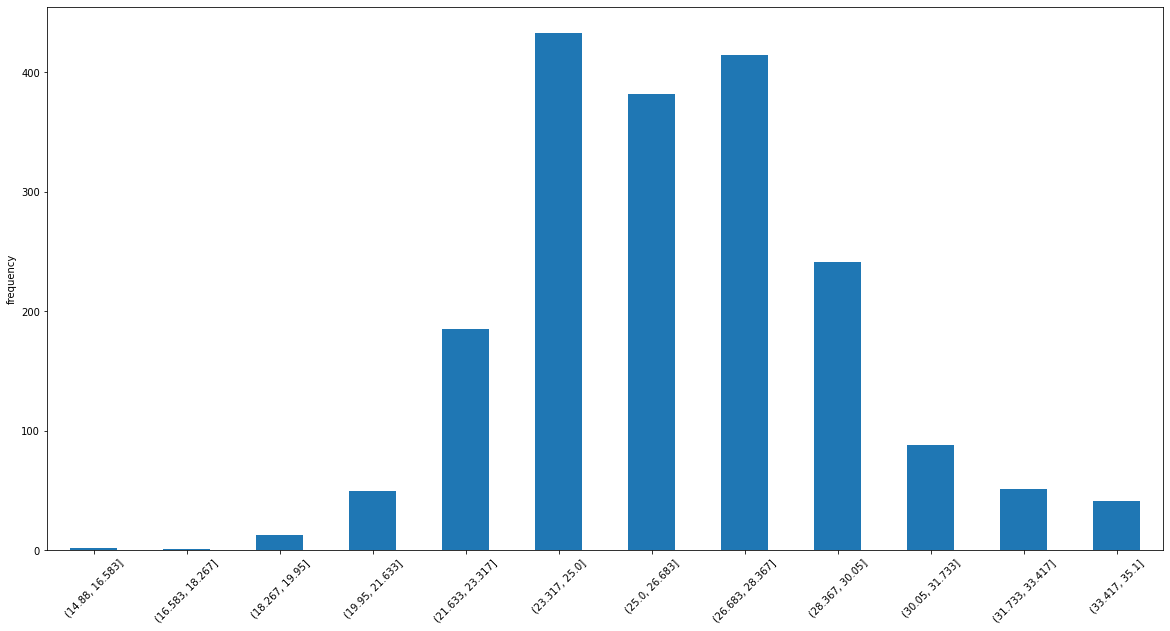


Boxplot:


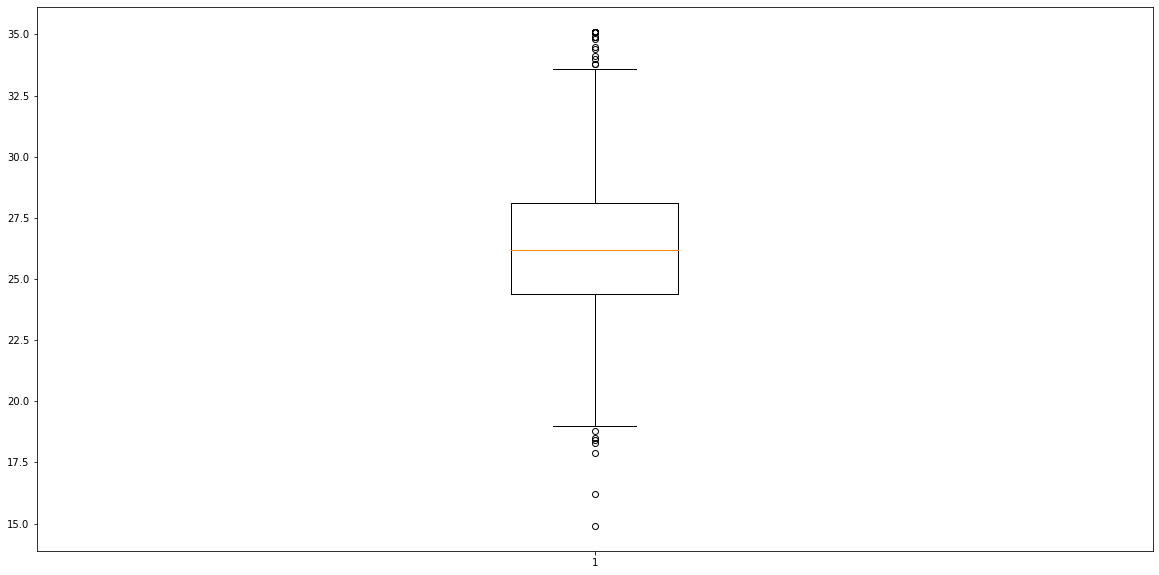


Principales estadísticos: 
count    1901.000000
mean       26.352814
std         2.912996
min        14.900000
25%        24.400000
50%        26.200000
75%        28.100000
max        35.100000
Name: MedRentPctHousInc, dtype: float64

Asimetría: 0.4365829179255222
Curtosis: 0.6266531643606816

 ****************************************************************************************** 


Columna: MedOwnCostPctInc

Histograma:
(14.081, 15.65]     33
(15.65, 17.2]      158
(17.2, 18.75]      209
(18.75, 20.3]      319
(20.3, 21.85]      334
(21.85, 23.4]      397
(23.4, 24.95]      253
(24.95, 26.5]      116
(26.5, 28.05]       58
(28.05, 29.6]       19
(29.6, 31.15]        3
(31.15, 32.7]        2
Name: MedOwnCostPctInc, dtype: int64


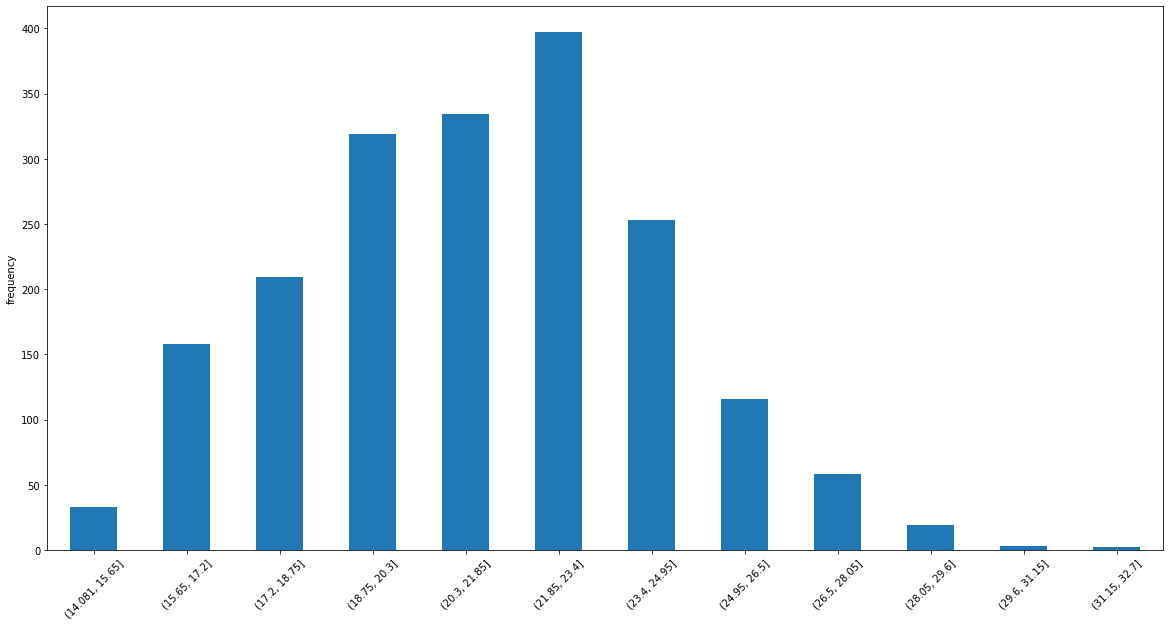


Boxplot:


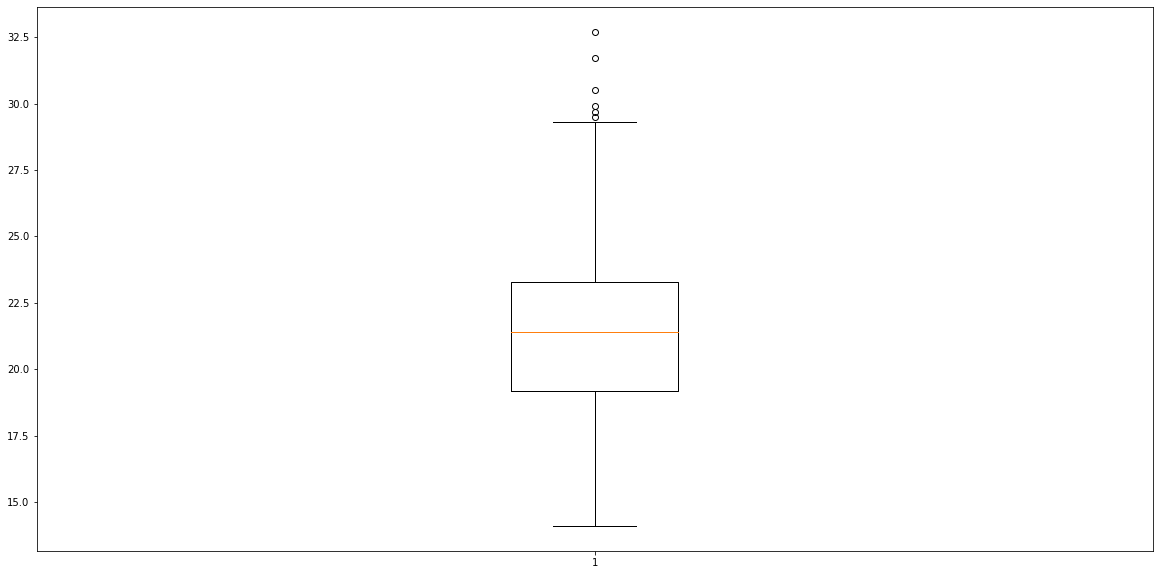


Principales estadísticos: 
count    1901.000000
mean       21.310573
std         2.952535
min        14.100000
25%        19.200000
50%        21.400000
75%        23.300000
max        32.700000
Name: MedOwnCostPctInc, dtype: float64

Asimetría: 0.12464475952970311
Curtosis: -0.26122286400594286

 ****************************************************************************************** 


Columna: MedOwnCostPctIncNoMtg

Histograma:
(10.087, 11.208]    101
(11.208, 12.317]    618
(12.317, 13.425]    574
(13.425, 14.533]    352
(14.533, 15.642]    153
(15.642, 16.75]      61
(16.75, 17.858]      21
(17.858, 18.967]     13
(18.967, 20.075]      7
(20.075, 21.183]      0
(21.183, 22.292]      0
(22.292, 23.4]        1
Name: MedOwnCostPctIncNoMtg, dtype: int64


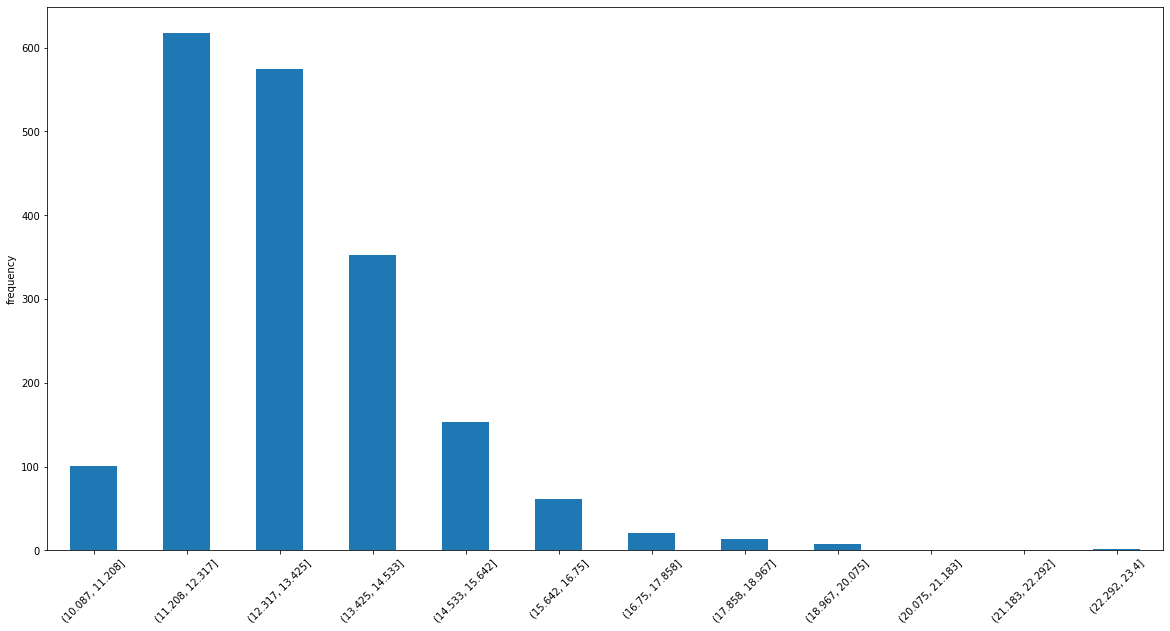


Boxplot:


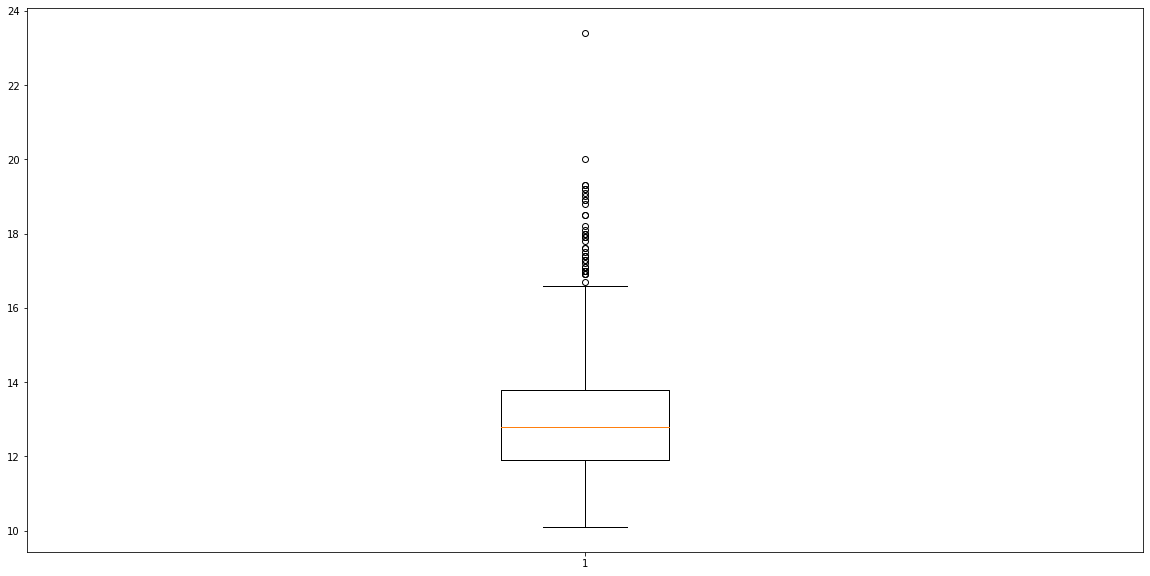


Principales estadísticos: 
count    1901.000000
mean       13.019884
std         1.463882
min        10.100000
25%        11.900000
50%        12.800000
75%        13.800000
max        23.400000
Name: MedOwnCostPctIncNoMtg, dtype: float64

Asimetría: 1.2825144221493574
Curtosis: 2.9851745341073808

 ****************************************************************************************** 


Columna: NumInShelters

Histograma:
(-23.383, 1948.583]       1892
(1948.583, 3897.167]         5
(3897.167, 5845.75]          3
(5845.75, 7794.333]          0
(7794.333, 9742.917]         0
(9742.917, 11691.5]          0
(11691.5, 13640.083]         0
(13640.083, 15588.667]       0
(15588.667, 17537.25]        0
(17537.25, 19485.833]        0
(19485.833, 21434.417]       0
(21434.417, 23383.0]         1
Name: NumInShelters, dtype: int64


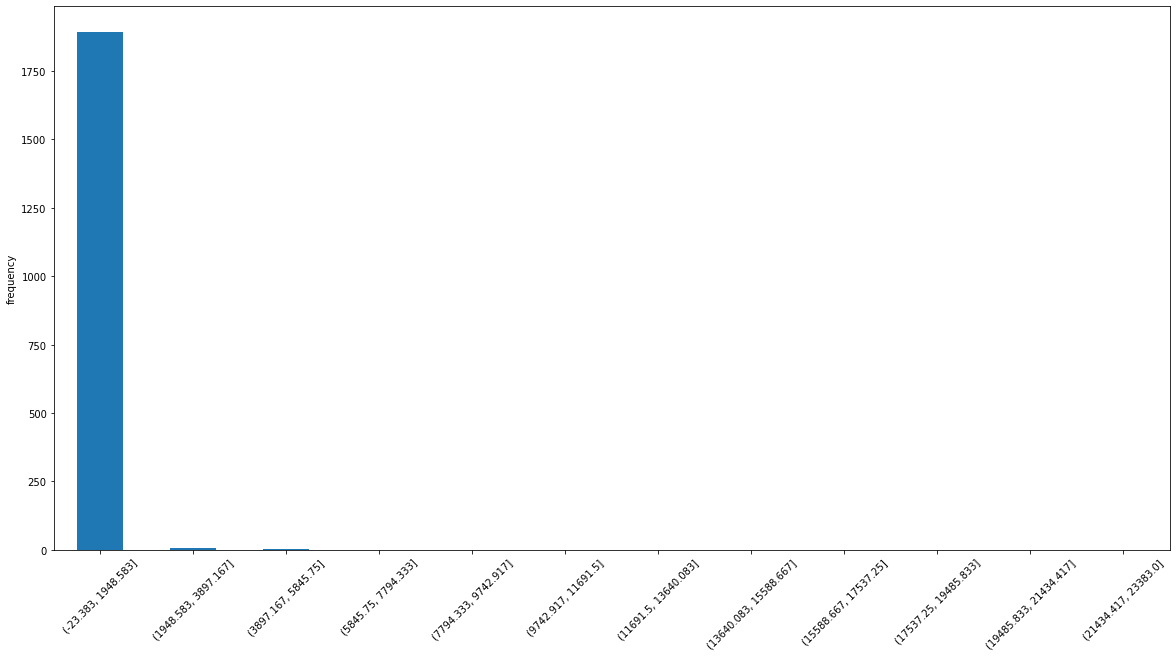


Boxplot:


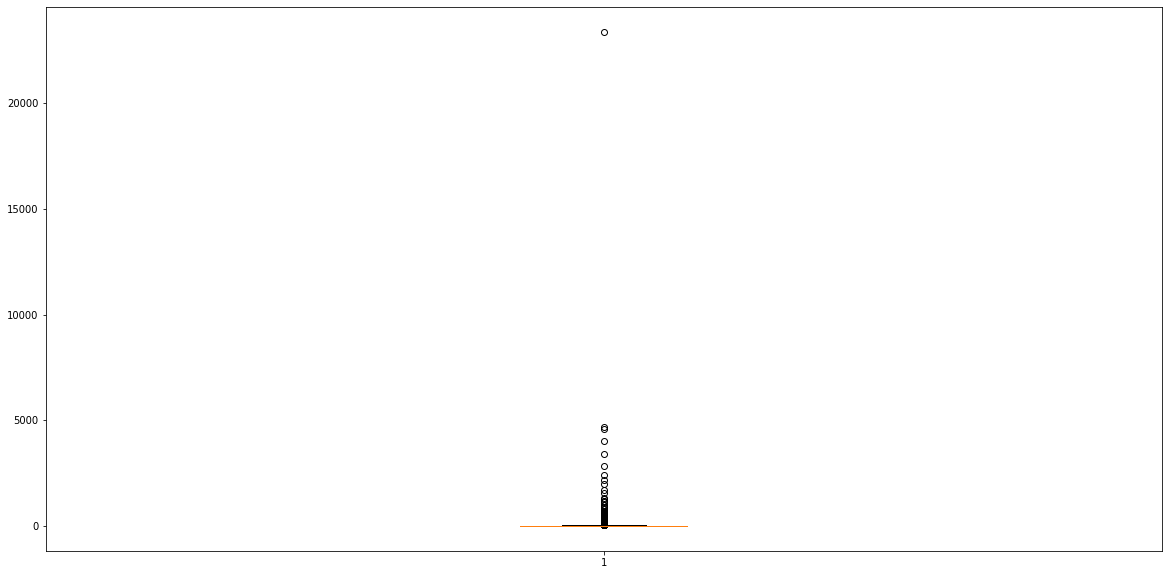


Principales estadísticos: 
count     1901.000000
mean        67.605997
std        592.223517
min          0.000000
25%          0.000000
50%          0.000000
75%         24.000000
max      23383.000000
Name: NumInShelters, dtype: float64

Asimetría: 33.07323081900225
Curtosis: 1271.334207687918

 ****************************************************************************************** 


Columna: NumStreet

Histograma:
(-10.447, 870.583]      1895
(870.583, 1741.167]        3
(1741.167, 2611.75]        1
(2611.75, 3482.333]        1
(3482.333, 4352.917]       0
(4352.917, 5223.5]         0
(5223.5, 6094.083]         0
(6094.083, 6964.667]       0
(6964.667, 7835.25]        0
(7835.25, 8705.833]        0
(8705.833, 9576.417]       0
(9576.417, 10447.0]        1
Name: NumStreet, dtype: int64


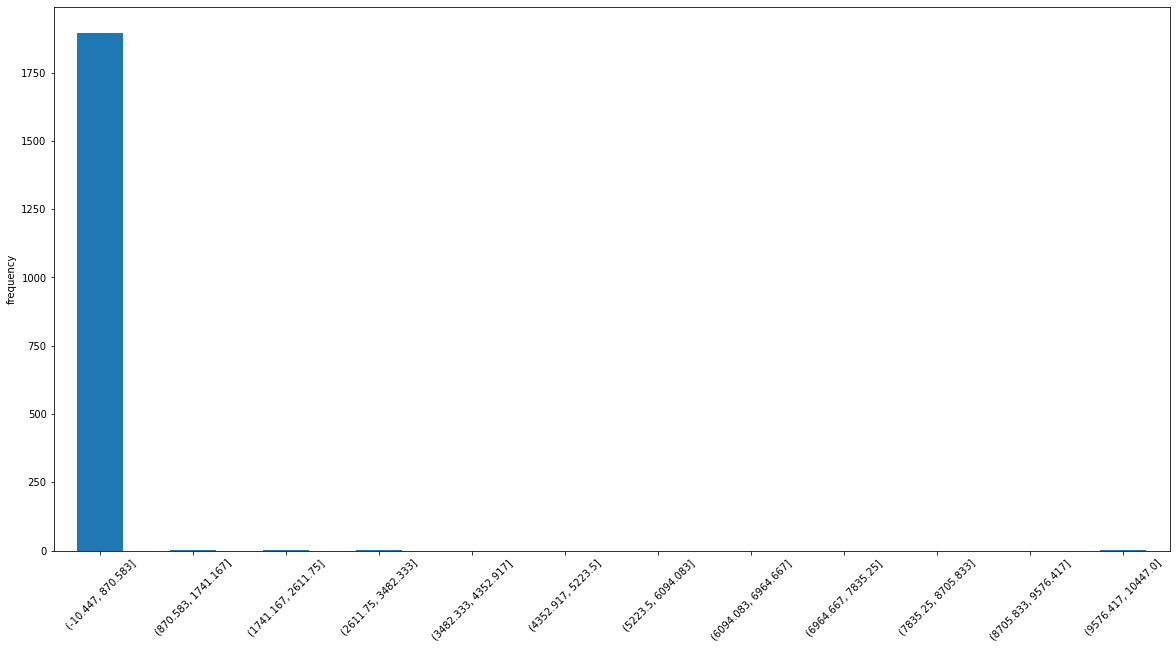


Boxplot:



Principales estadísticos: 
count     1901.000000
mean        19.376644
std        262.321836
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max      10447.000000
Name: NumStreet, dtype: float64

Asimetría: 34.42644776296765
Curtosis: 1328.5297398133928

 ****************************************************************************************** 


Columna: PctForeignBorn

Histograma:
(0.13, 5.208]       1040
(5.208, 10.225]      396
(10.225, 15.242]     190
(15.242, 20.26]      107
(20.26, 25.278]       71
(25.278, 30.295]      37
(30.295, 35.312]      19
(35.312, 40.33]       17
(40.33, 45.348]        8
(45.348, 50.365]       5
(50.365, 55.382]       6
(55.382, 60.4]         5
Name: PctForeignBorn, dtype: int64



Boxplot:


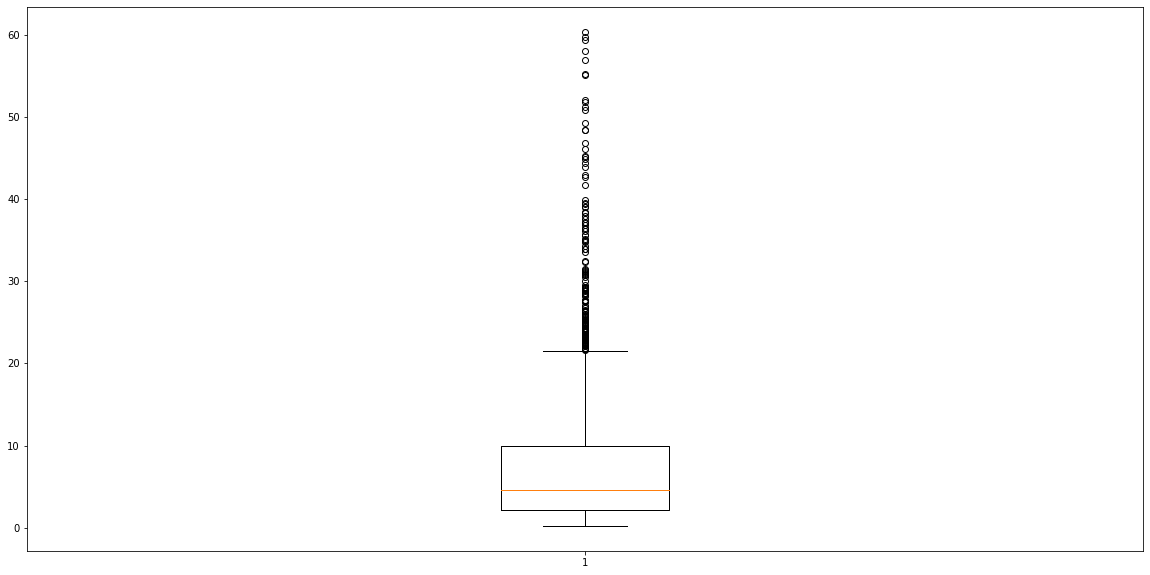


Principales estadísticos: 
count    1901.000000
mean        7.788864
std         8.815154
min         0.190000
25%         2.180000
50%         4.580000
75%         9.950000
max        60.400000
Name: PctForeignBorn, dtype: float64

Asimetría: 2.423195853506053
Curtosis: 7.378879585924643

 ****************************************************************************************** 


Columna: PctBornSameState

Histograma:
(6.664, 13.949]       9
(13.949, 21.148]     28
(21.148, 28.348]     65
(28.348, 35.547]     64
(35.547, 42.746]    140
(42.746, 49.945]    227
(49.945, 57.144]    243
(57.144, 64.343]    258
(64.343, 71.542]    289
(71.542, 78.742]    330
(78.742, 85.941]    198
(85.941, 93.14]      50
Name: PctBornSameState, dtype: int64


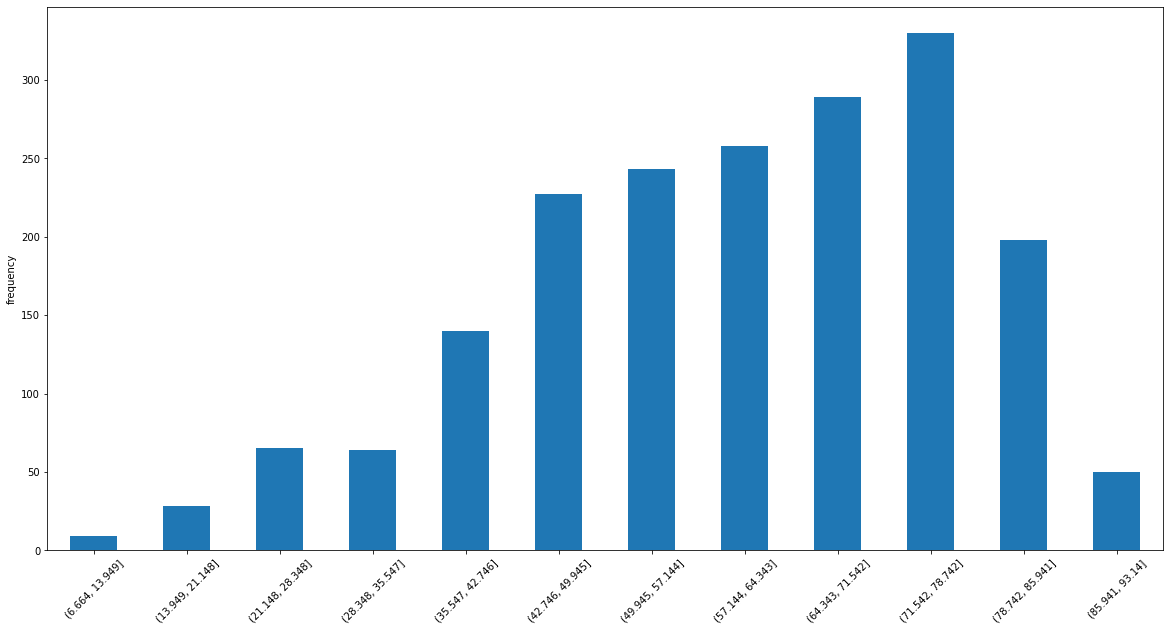


Boxplot:


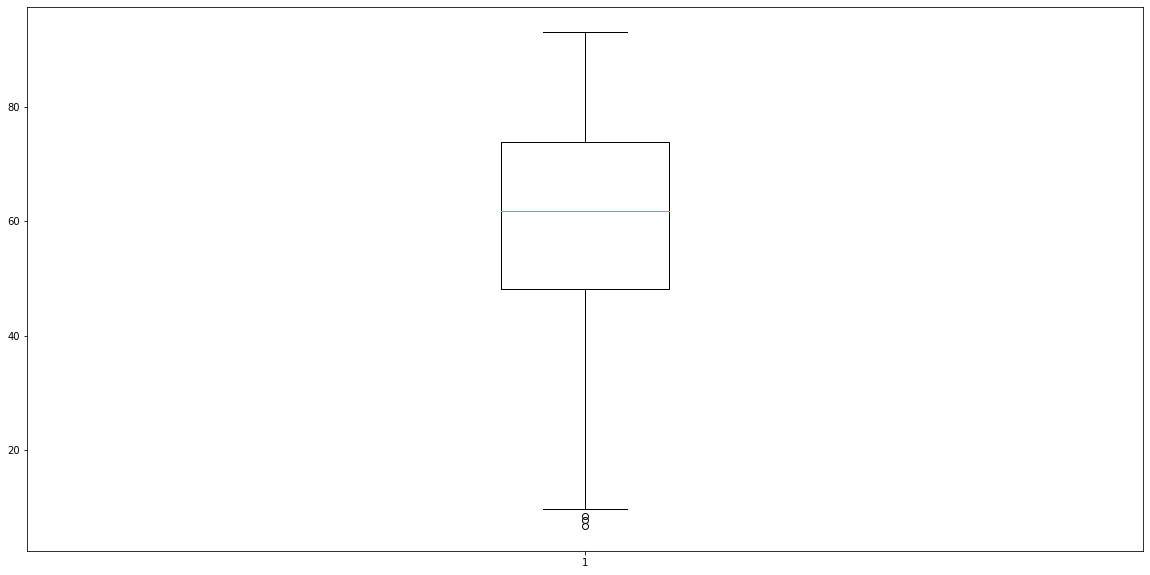


Principales estadísticos: 
count    1901.000000
mean       59.997075
std        17.033327
min         6.750000
25%        48.180000
50%        61.840000
75%        73.900000
max        93.140000
Name: PctBornSameState, dtype: float64

Asimetría: -0.5071944349774158
Curtosis: -0.3145228110739229

 ****************************************************************************************** 


Columna: PctSameHouse85

Histograma:
(11.763, 17.391]      5
(17.391, 22.952]     10
(22.952, 28.513]     29
(28.513, 34.073]     72
(34.073, 39.634]    154
(39.634, 45.195]    249
(45.195, 50.756]    347
(50.756, 56.317]    415
(56.317, 61.878]    313
(61.878, 67.438]    191
(67.438, 72.999]     91
(72.999, 78.56]      25
Name: PctSameHouse85, dtype: int64



Boxplot:


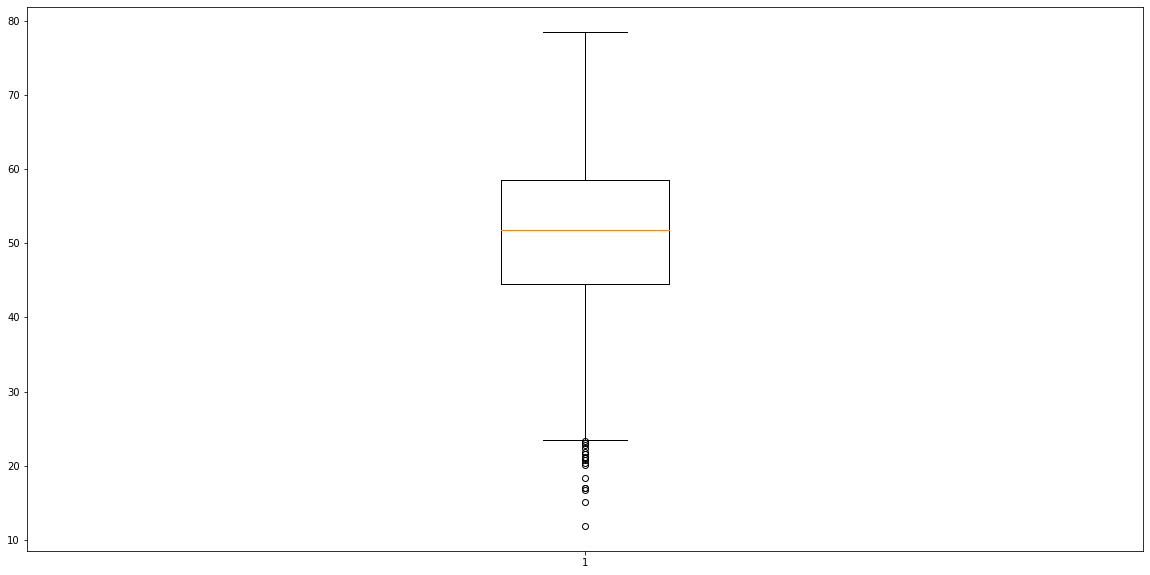


Principales estadísticos: 
count    1901.000000
mean       51.277123
std        10.735170
min        11.830000
25%        44.560000
50%        51.820000
75%        58.620000
max        78.560000
Name: PctSameHouse85, dtype: float64

Asimetría: -0.26270744559398646
Curtosis: -0.017161311264377144

 ****************************************************************************************** 


Columna: PctSameCity85

Histograma:
(27.881, 33.67]     11
(33.67, 39.39]       5
(39.39, 45.11]      16
(45.11, 50.83]      28
(50.83, 56.55]      42
(56.55, 62.27]      81
(62.27, 67.99]     142
(67.99, 73.71]     250
(73.71, 79.43]     402
(79.43, 85.15]     484
(85.15, 90.87]     366
(90.87, 96.59]      74
Name: PctSameCity85, dtype: int64


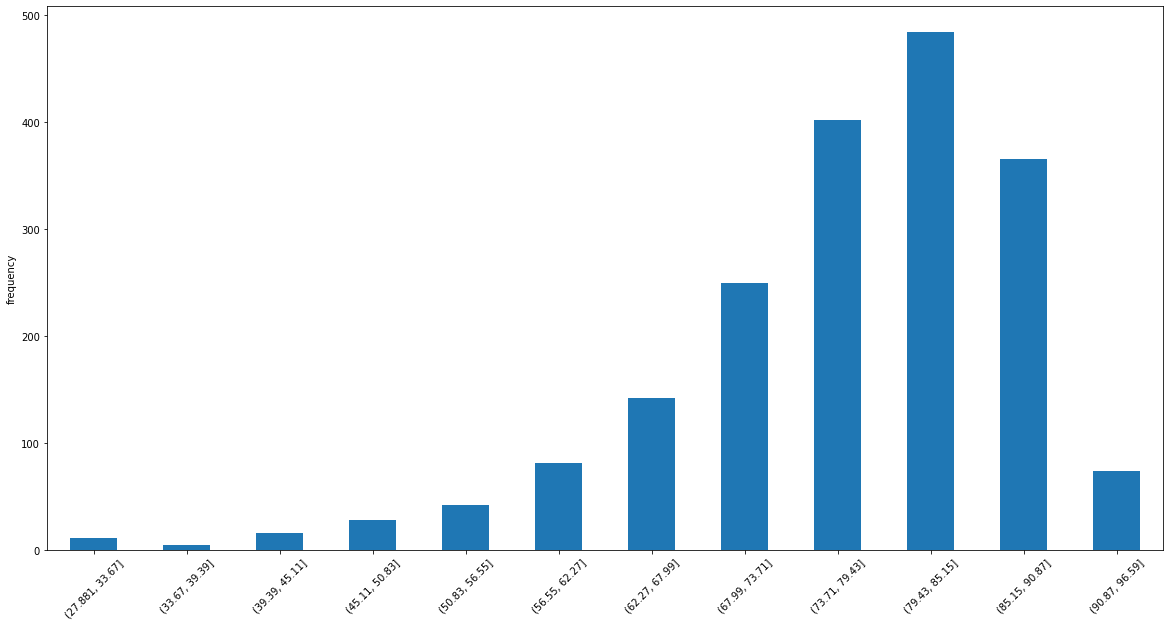


Boxplot:


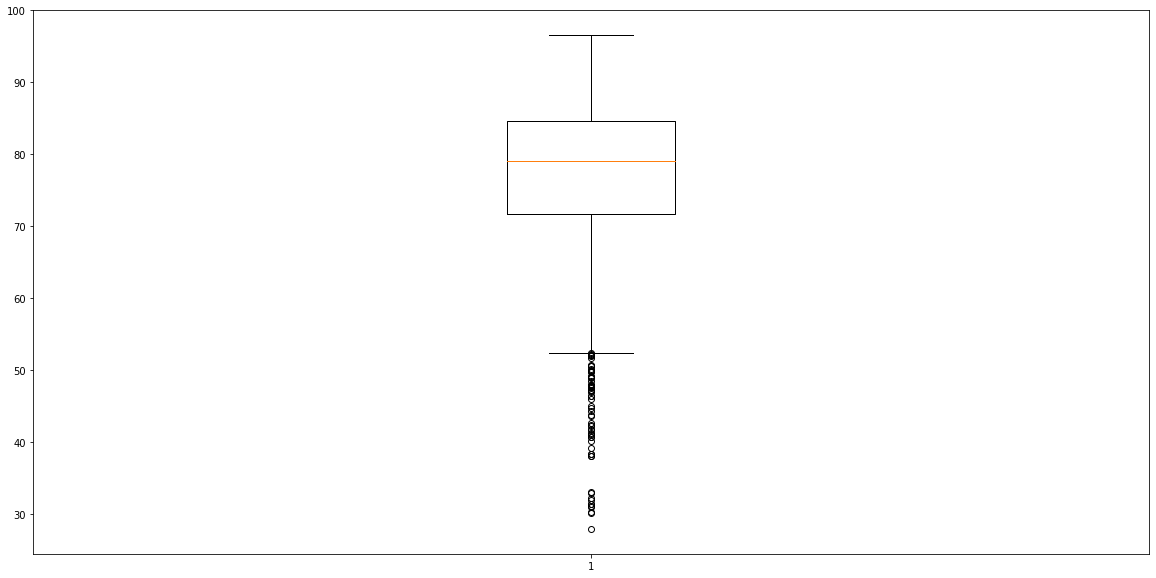


Principales estadísticos: 
count    1901.000000
mean       76.990142
std        10.837694
min        27.950000
25%        71.740000
50%        79.130000
75%        84.670000
max        96.590000
Name: PctSameCity85, dtype: float64

Asimetría: -1.2598845305832604
Curtosis: 2.146079642507441

 ****************************************************************************************** 


Columna: PctSameState85

Histograma:
(32.763, 38.419]      1
(38.419, 44.008]      2
(44.008, 49.598]      1
(49.598, 55.187]      8
(55.187, 60.776]      9
(60.776, 66.365]     19
(66.365, 71.954]     42
(71.954, 77.543]     93
(77.543, 83.133]    197
(83.133, 88.722]    461
(88.722, 94.311]    843
(94.311, 99.9]      225
Name: PctSameState85, dtype: int64



Boxplot:


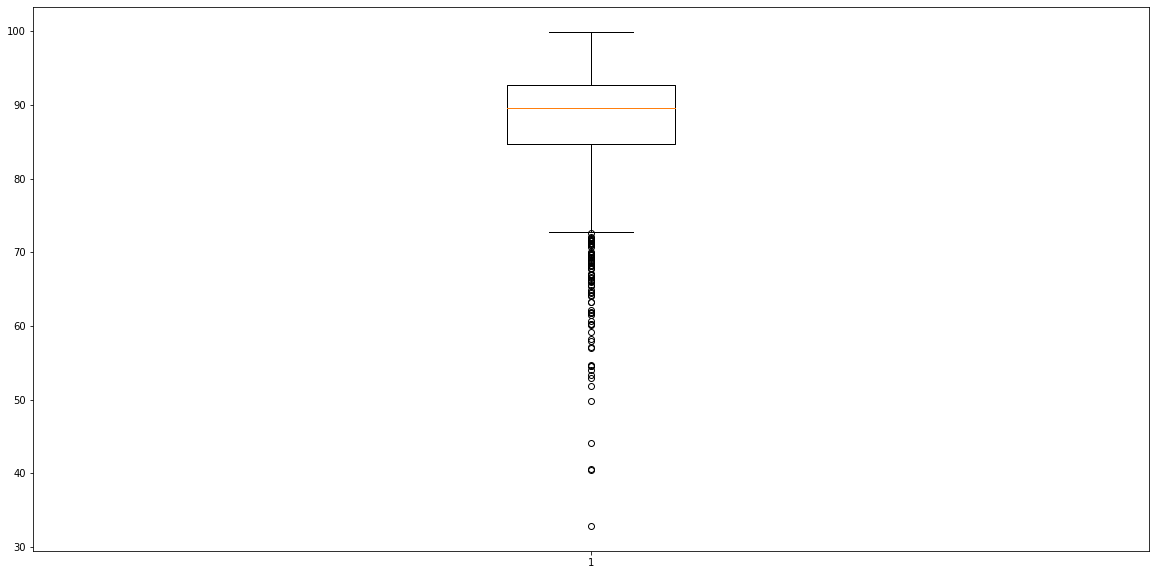


Principales estadísticos: 
count    1901.000000
mean       87.653240
std         7.496465
min        32.830000
25%        84.680000
50%        89.530000
75%        92.700000
max        99.900000
Name: PctSameState85, dtype: float64

Asimetría: -1.964825672971778
Curtosis: 6.213733742109033

 ****************************************************************************************** 


Columna: LandArea

Histograma:
(-2.669, 298.308]       1886
(298.308, 595.717]        10
(595.717, 893.125]         2
(893.125, 1190.533]        0
(1190.533, 1487.942]       0
(1487.942, 1785.35]        1
(1785.35, 2082.758]        0
(2082.758, 2380.167]       0
(2380.167, 2677.575]       0
(2677.575, 2974.983]       1
(2974.983, 3272.392]       0
(3272.392, 3569.8]         1
Name: LandArea, dtype: int64


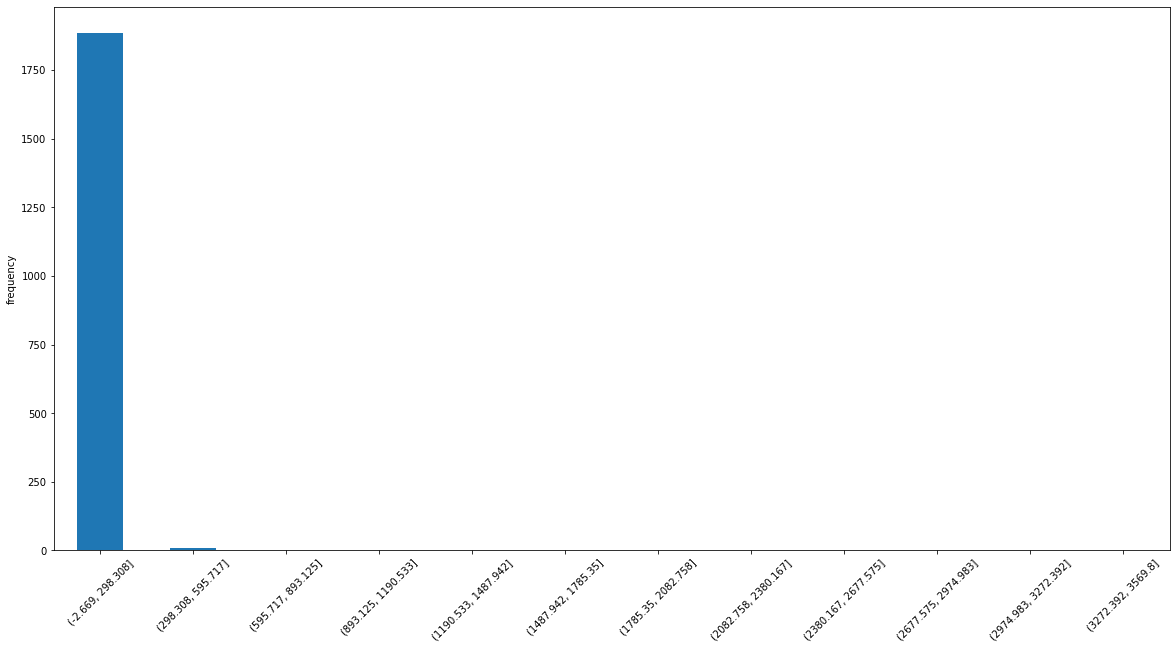


Boxplot:



Principales estadísticos: 
count    1901.000000
mean       28.206155
std       117.458908
min         0.900000
25%         7.300000
50%        13.700000
75%        25.600000
max      3569.800000
Name: LandArea, dtype: float64

Asimetría: 22.64400245461754
Curtosis: 598.7365154652429

 ****************************************************************************************** 


Columna: PopDens

Histograma:
(-34.22, 3694.992]        1512
(3694.992, 7379.983]       274
(7379.983, 11064.975]       76
(11064.975, 14749.967]      21
(14749.967, 18434.958]       9
(18434.958, 22119.95]        4
(22119.95, 25804.942]        3
(25804.942, 29489.933]       0
(29489.933, 33174.925]       0
(33174.925, 36859.917]       1
(36859.917, 40544.908]       0
(40544.908, 44229.9]         1
Name: PopDens, dtype: int64



Boxplot:



Principales estadísticos: 
count     1901.000000
mean      2804.223461
std       2945.490095
min         10.000000
25%       1175.600000
50%       2003.500000
75%       3278.300000
max      44229.900000
Name: PopDens, dtype: float64

Asimetría: 4.476122891085983
Curtosis: 37.56315142200897

 ****************************************************************************************** 


Columna: PctUsePubTrans

Histograma:
(-0.0543, 4.528]    1530
(4.528, 9.055]       206
(9.055, 13.582]       81
(13.582, 18.11]       42
(18.11, 22.638]       19
(22.638, 27.165]      11
(27.165, 31.692]       6
(31.692, 36.22]        1
(36.22, 40.748]        3
(40.748, 45.275]       0
(45.275, 49.802]       0
(49.802, 54.33]        2
Name: PctUsePubTrans, dtype: int64


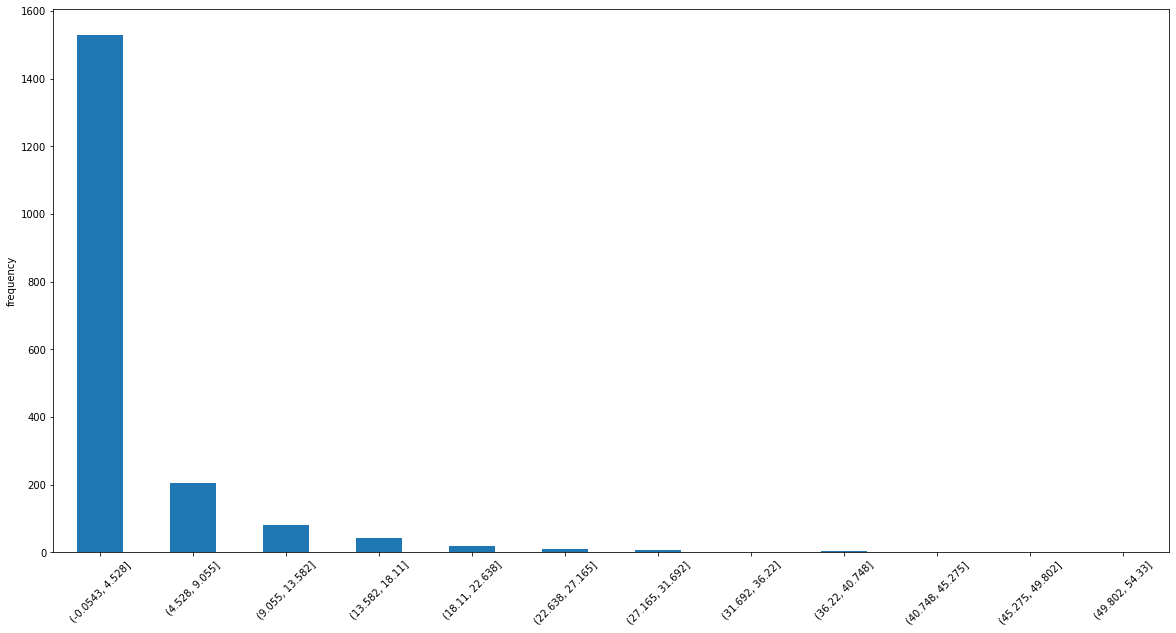


Boxplot:



Principales estadísticos: 
count    1901.000000
mean        3.074545
std         4.937897
min         0.000000
25%         0.360000
50%         1.240000
75%         3.440000
max        54.330000
Name: PctUsePubTrans, dtype: float64

Asimetría: 3.6639688285364795
Curtosis: 20.212494173679065

 ****************************************************************************************** 


Columna: LemasPctOfficDrugUn

Histograma:
(-0.0484, 4.037]    1681
(4.037, 8.073]       153
(8.073, 12.11]        48
(12.11, 16.147]       10
(16.147, 20.183]       5
(20.183, 24.22]        2
(24.22, 28.257]        1
(28.257, 32.293]       0
(32.293, 36.33]        0
(36.33, 40.367]        0
(40.367, 44.403]       0
(44.403, 48.44]        1
Name: LemasPctOfficDrugUn, dtype: int64


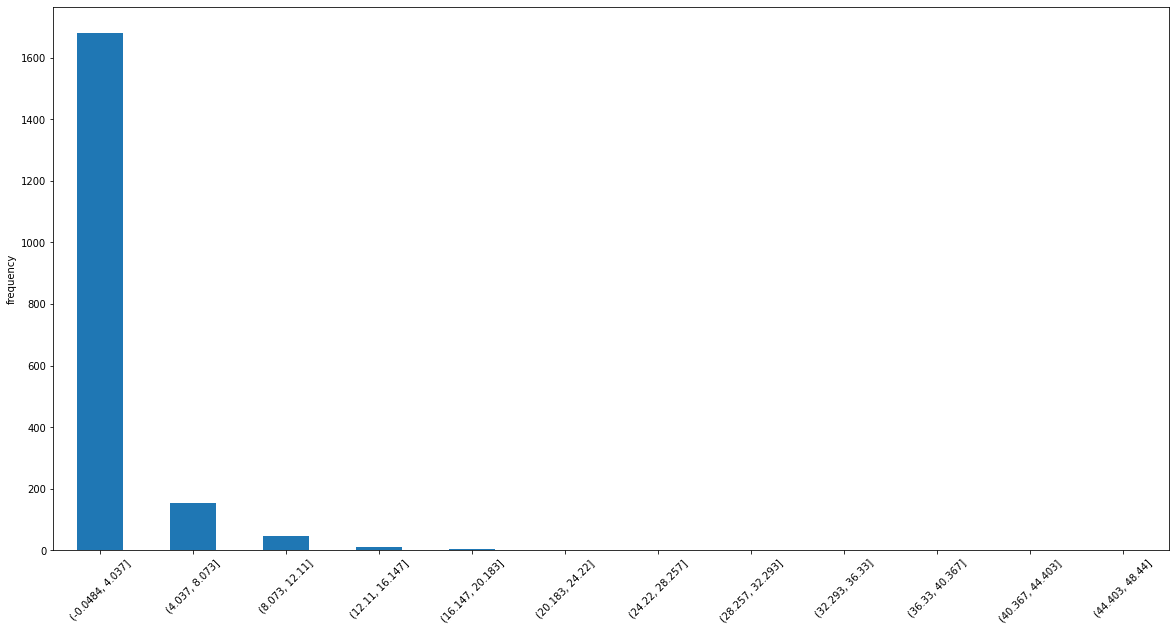


Boxplot:


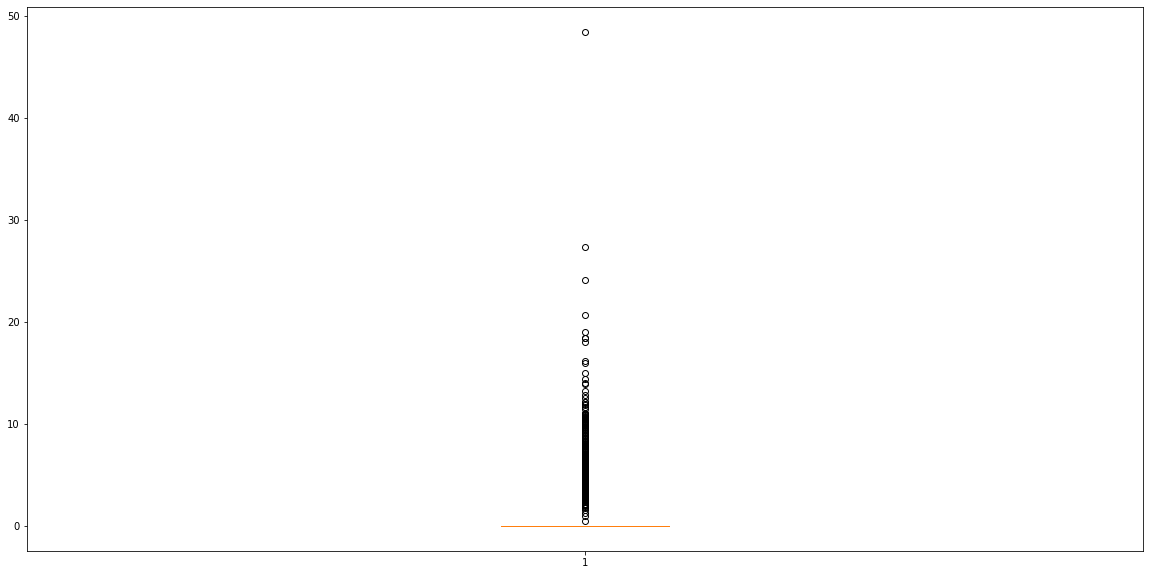


Principales estadísticos: 
count    1901.000000
mean        1.010626
std         2.935705
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        48.440000
Name: LemasPctOfficDrugUn, dtype: float64

Asimetría: 5.076049634688737
Curtosis: 47.50782420366151

 ****************************************************************************************** 


Columna: murders

Histograma:
(-1.946, 162.167]       1891
(162.167, 324.333]         5
(324.333, 486.5]           3
(486.5, 648.667]           0
(648.667, 810.833]         0
(810.833, 973.0]           0
(973.0, 1135.167]          1
(1135.167, 1297.333]       0
(1297.333, 1459.5]         0
(1459.5, 1621.667]         0
(1621.667, 1783.833]       0
(1783.833, 1946.0]         1
Name: murders, dtype: int64


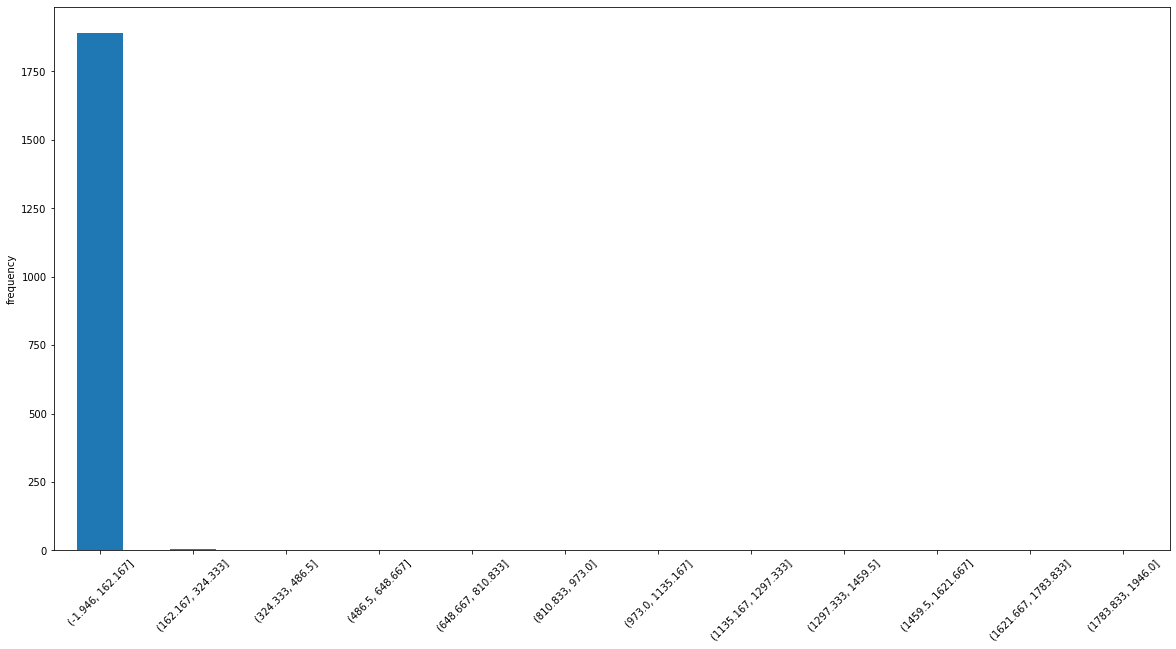


Boxplot:


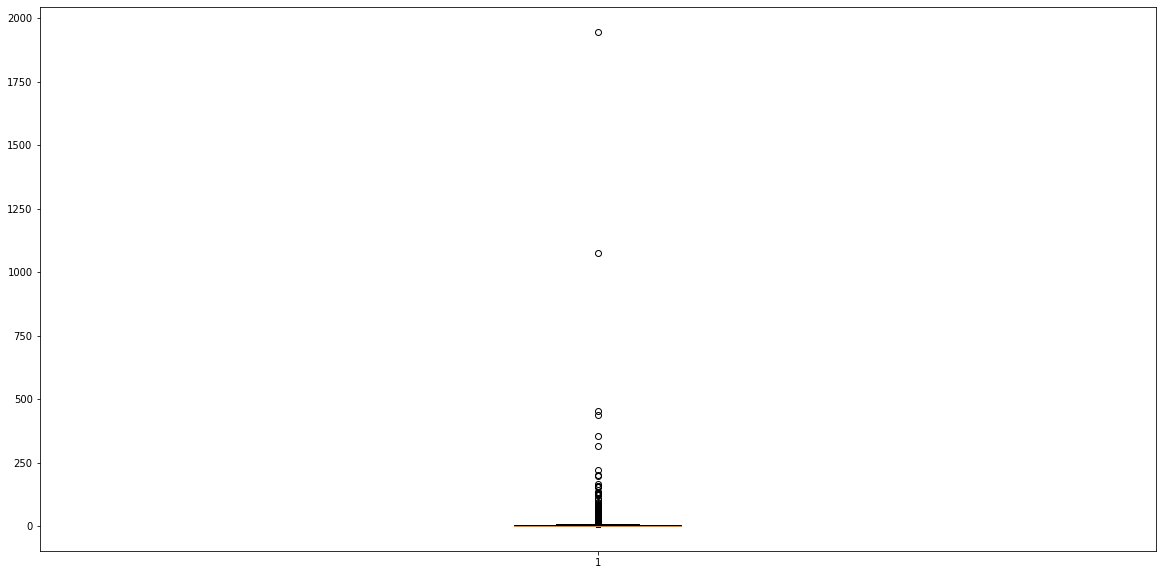


Principales estadísticos: 
count    1901.000000
mean        7.392425
std        56.619205
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max      1946.000000
Name: murders, dtype: float64

Asimetría: 25.580013505378282
Curtosis: 795.1743689754948

 ****************************************************************************************** 


Columna: murdPerPop

Histograma:
(-0.0911, 7.591]    1360
(7.591, 15.182]      310
(15.182, 22.772]     130
(22.772, 30.363]      49
(30.363, 37.954]      29
(37.954, 45.545]      13
(45.545, 53.136]       4
(53.136, 60.727]       2
(60.727, 68.318]       1
(68.318, 75.908]       1
(75.908, 83.499]       1
(83.499, 91.09]        1
Name: murdPerPop, dtype: int64


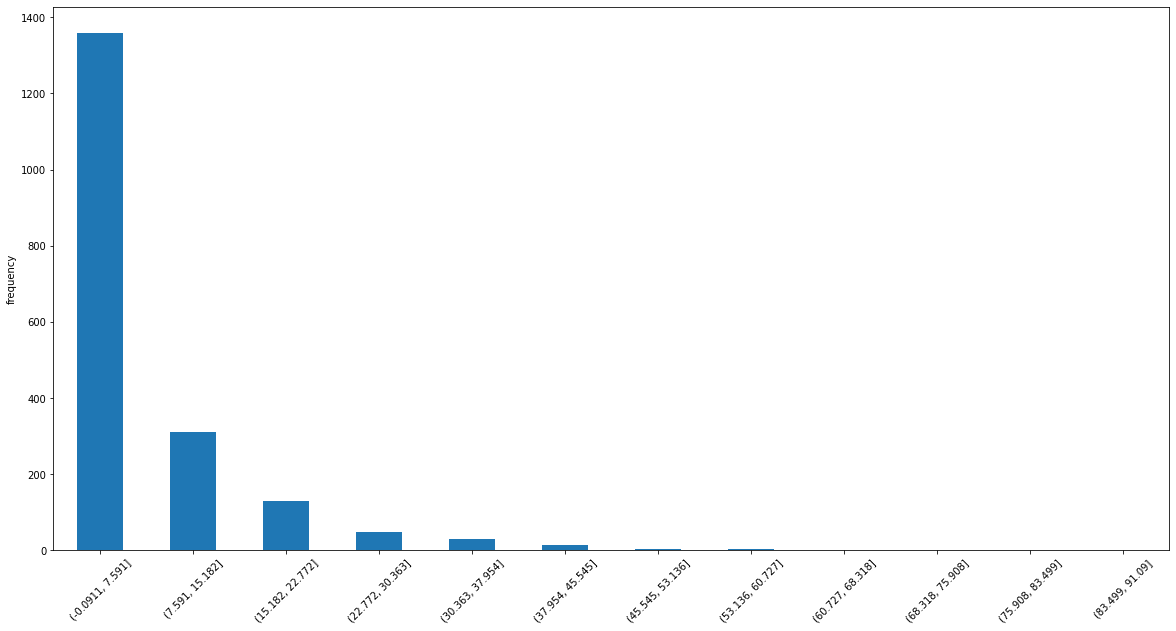


Boxplot:


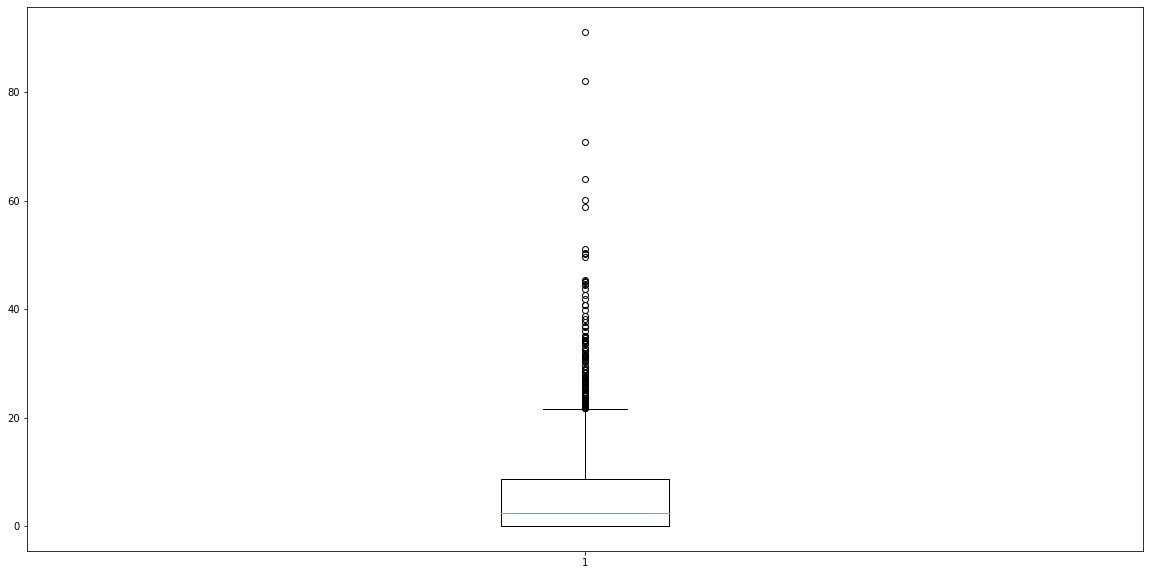


Principales estadísticos: 
count    1901.000000
mean        5.966060
std         9.067506
min         0.000000
25%         0.000000
50%         2.460000
75%         8.640000
max        91.090000
Name: murdPerPop, dtype: float64

Asimetría: 2.7994577597641324
Curtosis: 12.657631014755864

 ****************************************************************************************** 


Columna: rapes

Histograma:
(-2.818, 234.833]       1861
(234.833, 469.667]        24
(469.667, 704.5]          10
(704.5, 939.333]           3
(939.333, 1174.167]        1
(1174.167, 1409.0]         0
(1409.0, 1643.833]         0
(1643.833, 1878.667]       1
(1878.667, 2113.5]         0
(2113.5, 2348.333]         0
(2348.333, 2583.167]       0
(2583.167, 2818.0]         1
Name: rapes, dtype: int64


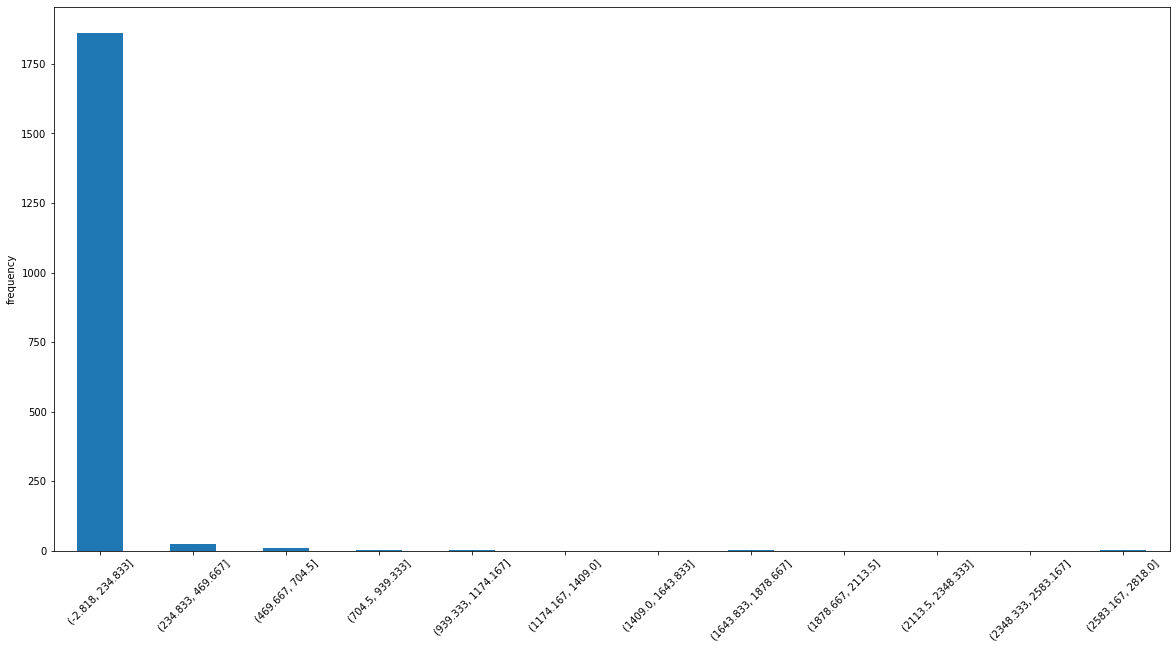


Boxplot:


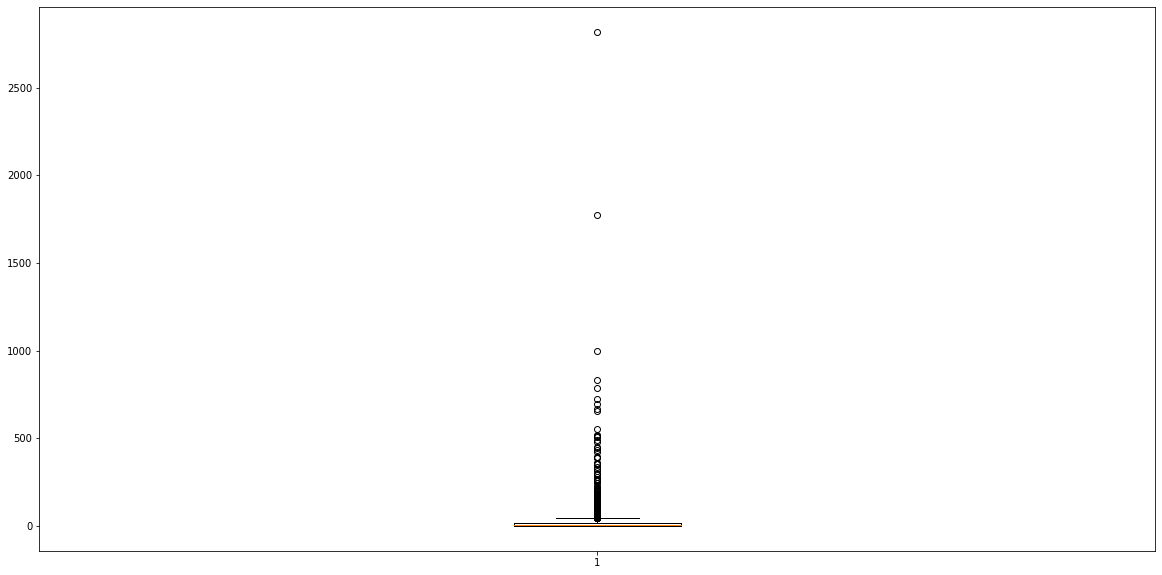


Principales estadísticos: 
count    1901.000000
mean       27.277223
std       103.959311
min         0.000000
25%         2.000000
50%         7.000000
75%        19.000000
max      2818.000000
Name: rapes, dtype: float64

Asimetría: 14.920161479966978
Curtosis: 327.20003148506925

 ****************************************************************************************** 


Columna: rapesPerPop

Histograma:
(-0.401, 33.446]      1104
(33.446, 66.892]       491
(66.892, 100.338]      211
(100.338, 133.783]      64
(133.783, 167.229]      21
(167.229, 200.675]       5
(200.675, 234.121]       2
(234.121, 267.567]       1
(267.567, 301.012]       0
(301.012, 334.458]       1
(334.458, 367.904]       0
(367.904, 401.35]        1
Name: rapesPerPop, dtype: int64


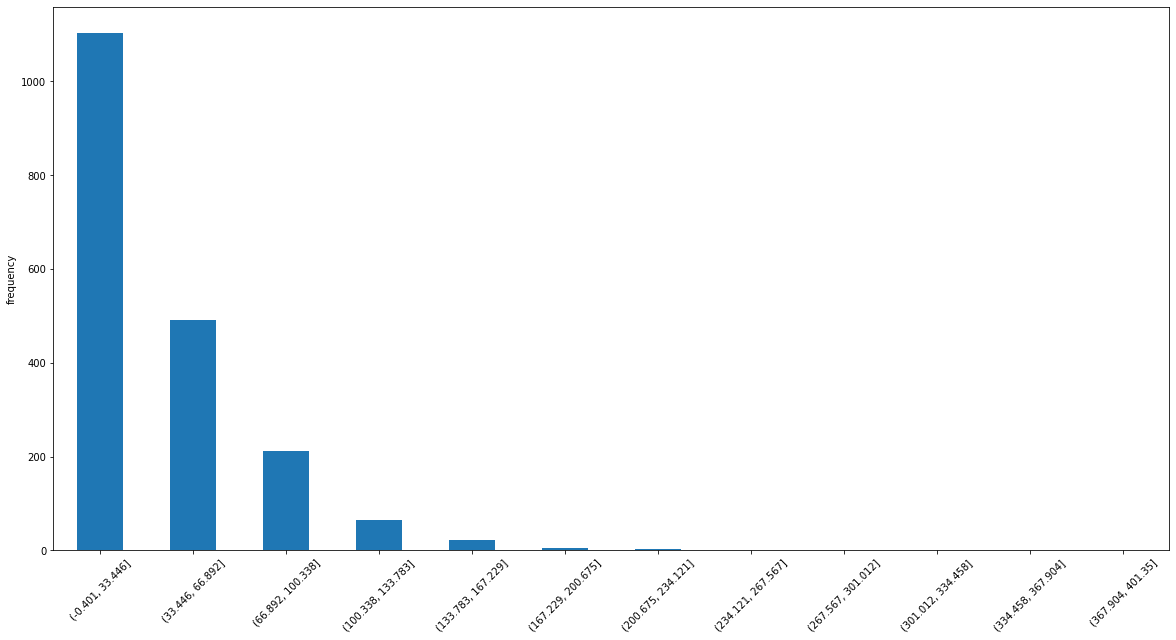


Boxplot:


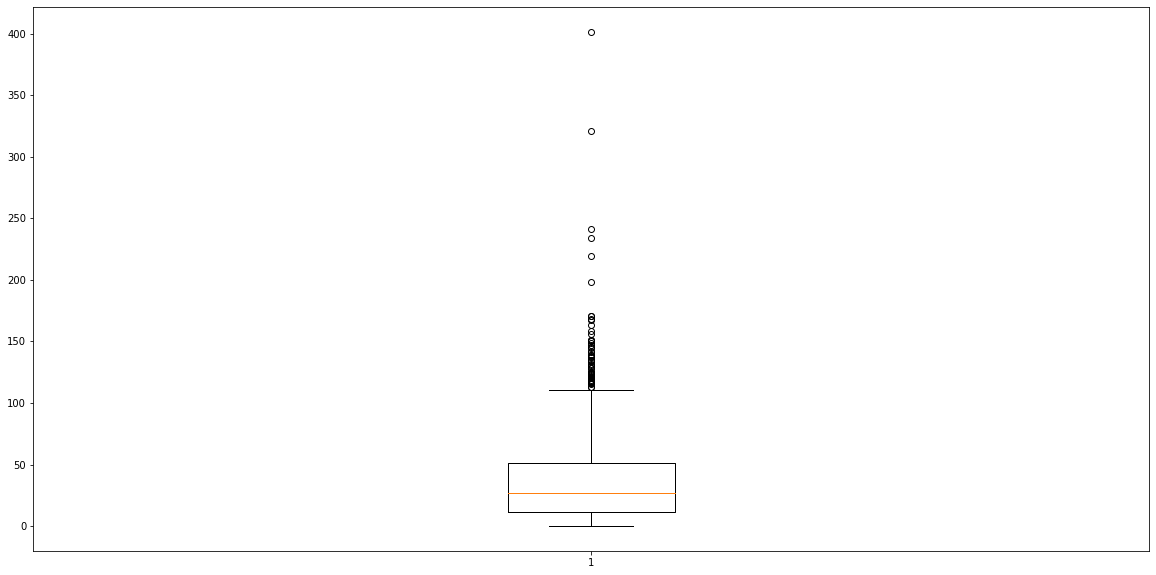


Principales estadísticos: 
count    1901.000000
mean       36.234671
std        34.338969
min         0.000000
25%        11.570000
50%        27.050000
75%        51.170000
max       401.350000
Name: rapesPerPop, dtype: float64

Asimetría: 2.2176388941063014
Curtosis: 11.360668904877617

 ****************************************************************************************** 


Columna: robberies

Histograma:
(-86.001, 7166.75]     1895
(7166.75, 14333.5]        4
(14333.5, 21500.25]       0
(21500.25, 28667.0]       0
(28667.0, 35833.75]       0
(35833.75, 43000.5]       1
(43000.5, 50167.25]       0
(50167.25, 57334.0]       0
(57334.0, 64500.75]       0
(64500.75, 71667.5]       0
(71667.5, 78834.25]       0
(78834.25, 86001.0]       1
Name: robberies, dtype: int64


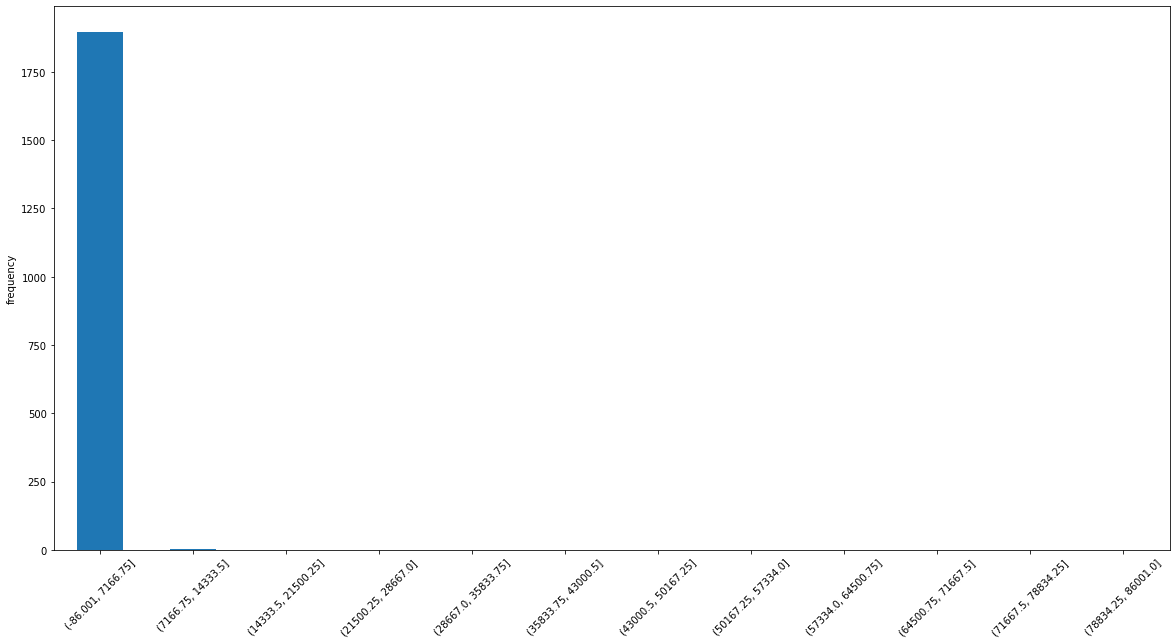


Boxplot:


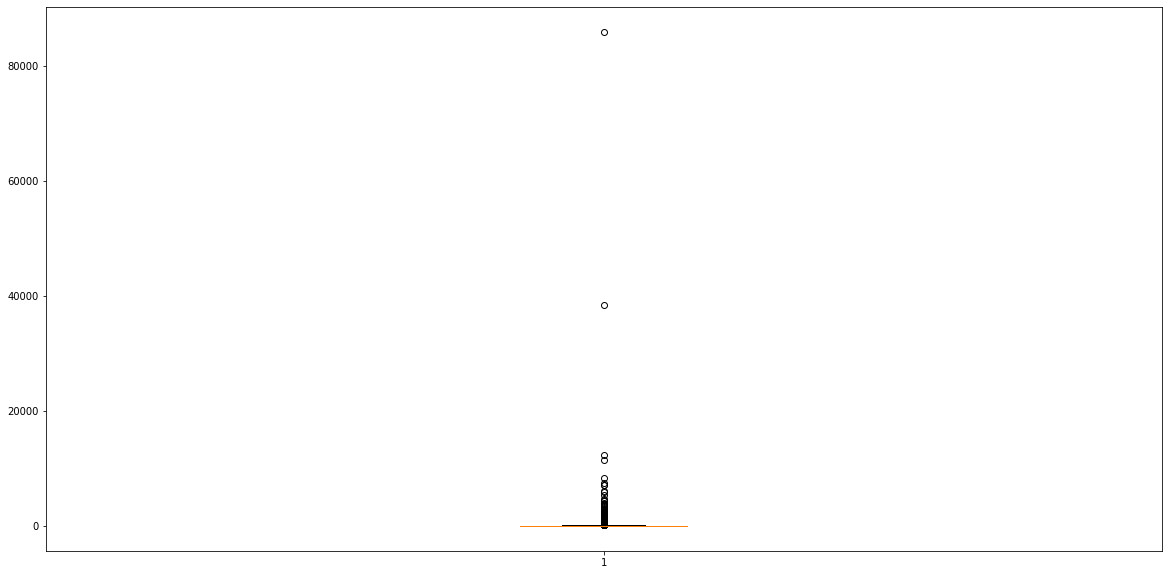


Principales estadísticos: 
count     1901.000000
mean       234.440821
std       2264.829920
min          0.000000
25%          6.000000
50%         19.000000
75%         73.000000
max      86001.000000
Name: robberies, dtype: float64

Asimetría: 31.413180521411686
Curtosis: 1126.5395869153108

 ****************************************************************************************** 


Columna: robbbPerPop

Histograma:
(-2.264, 188.678]       1419
(188.678, 377.355]       243
(377.355, 566.032]       111
(566.032, 754.71]         61
(754.71, 943.388]         32
(943.388, 1132.065]       15
(1132.065, 1320.742]      10
(1320.742, 1509.42]        4
(1509.42, 1698.098]        1
(1698.098, 1886.775]       3
(1886.775, 2075.453]       1
(2075.453, 2264.13]        1
Name: robbbPerPop, dtype: int64


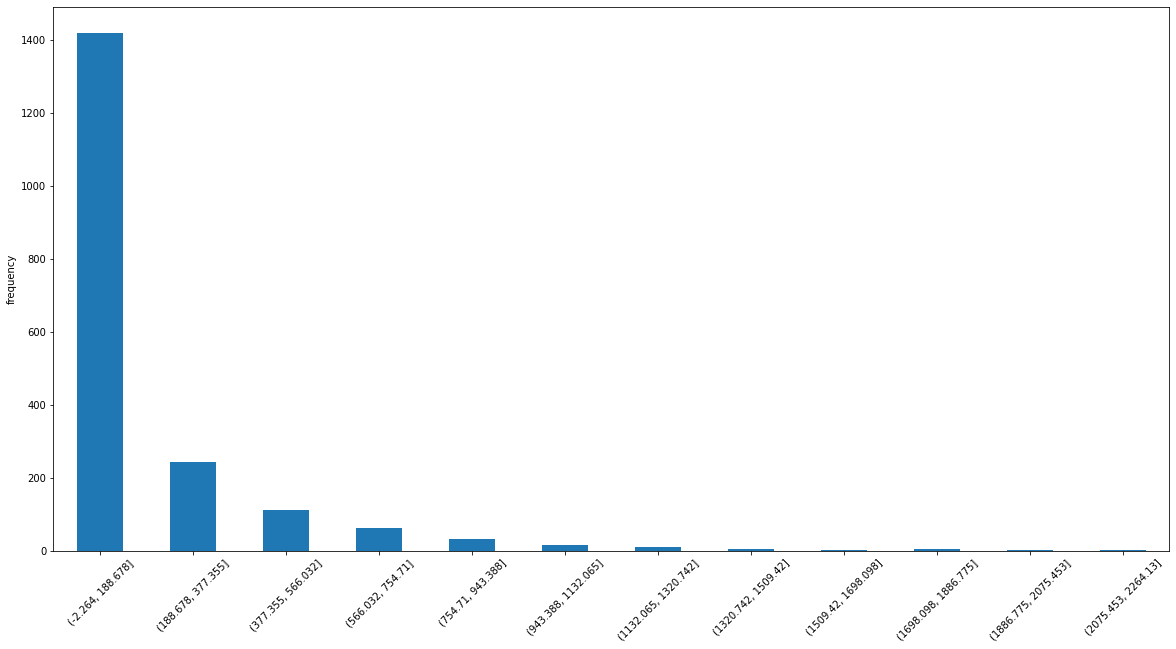


Boxplot:


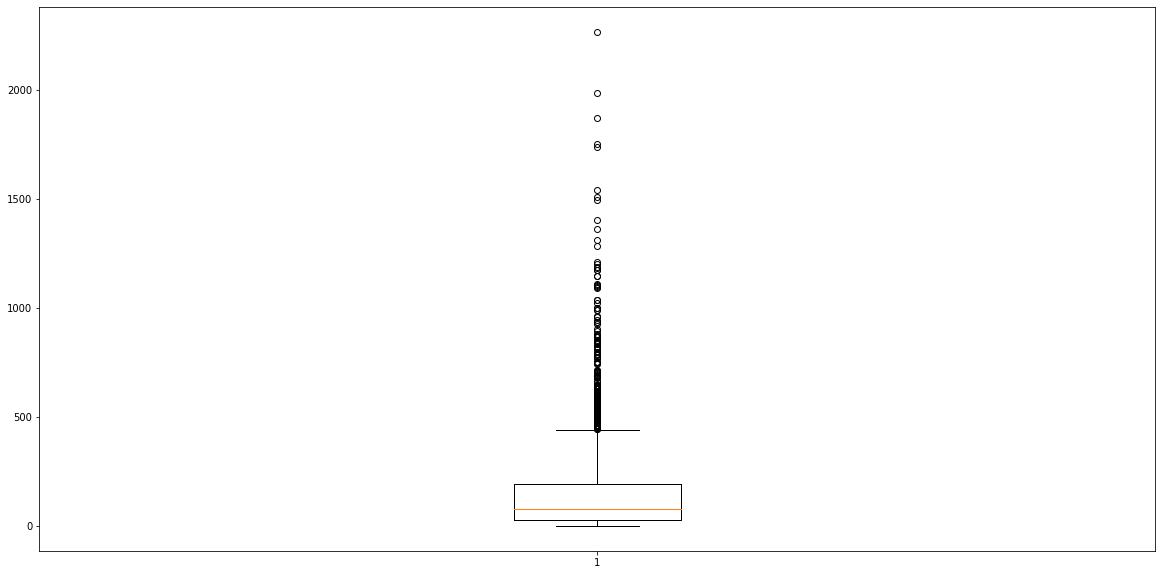


Principales estadísticos: 
count    1901.000000
mean      166.756491
std       236.382825
min         0.000000
25%        29.000000
50%        78.980000
75%       194.300000
max      2264.130000
Name: robbbPerPop, dtype: float64

Asimetría: 3.08728134075329
Curtosis: 13.38482606236157

 ****************************************************************************************** 


Columna: assaults

Histograma:
(-62.778, 5231.5]     1886
(5231.5, 10463.0]       13
(10463.0, 15694.5]       0
(15694.5, 20926.0]       0
(20926.0, 26157.5]       0
(26157.5, 31389.0]       0
(31389.0, 36620.5]       0
(36620.5, 41852.0]       0
(41852.0, 47083.5]       1
(47083.5, 52315.0]       0
(52315.0, 57546.5]       0
(57546.5, 62778.0]       1
Name: assaults, dtype: int64


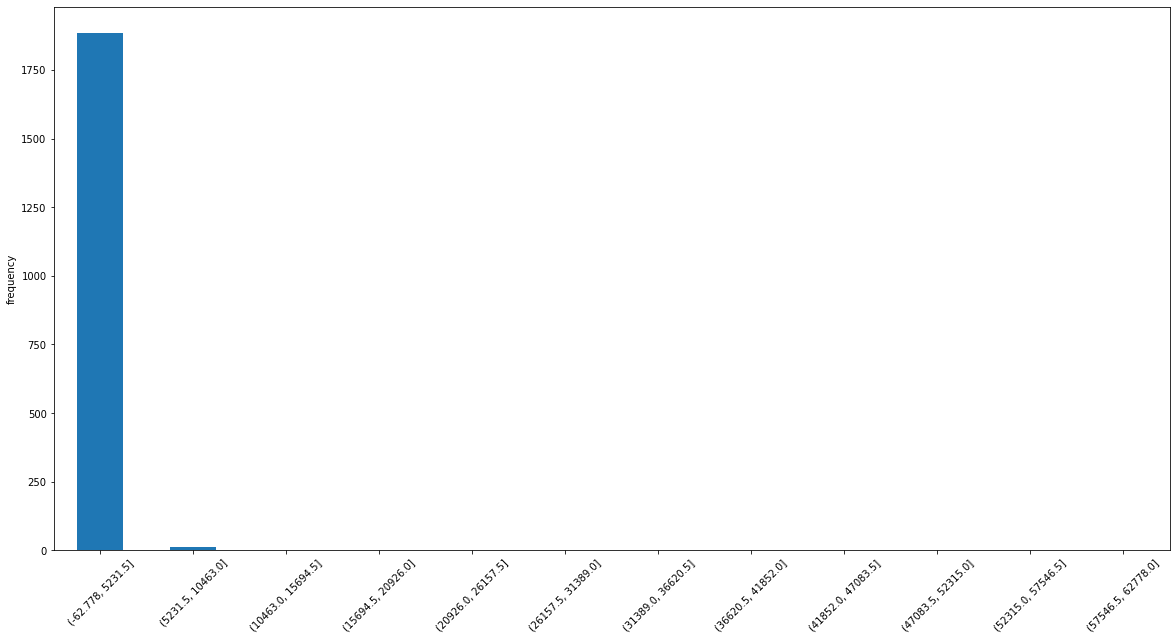


Boxplot:


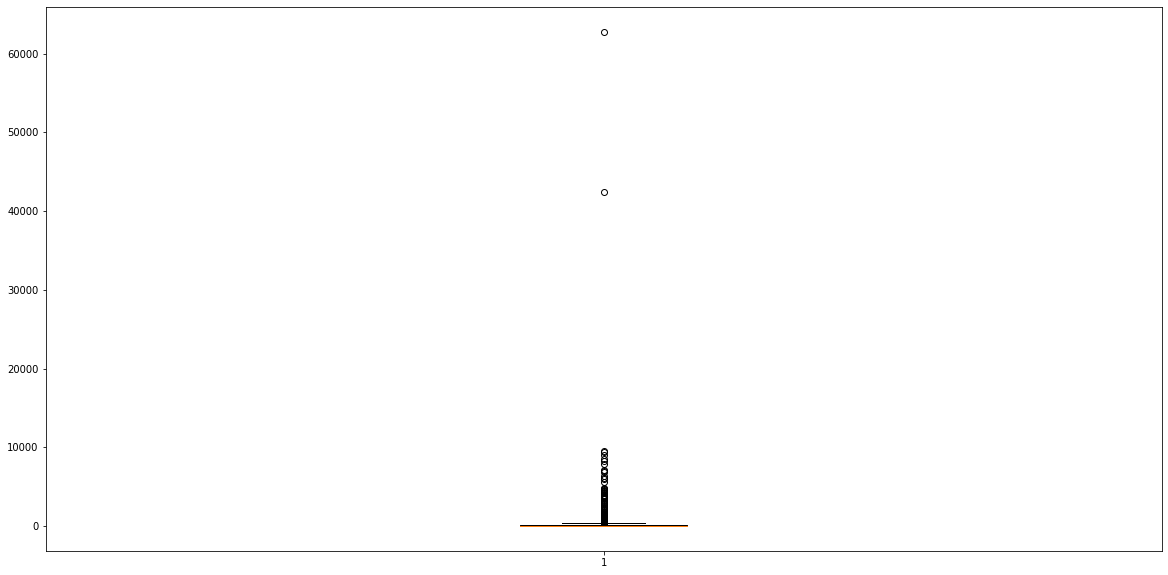


Principales estadísticos: 
count     1901.000000
mean       318.920042
std       1903.557125
min          0.000000
25%         19.000000
50%         58.000000
75%        183.000000
max      62778.000000
Name: assaults, dtype: float64

Asimetría: 24.819515421378807
Curtosis: 737.379146174819

 ****************************************************************************************** 


Columna: assaultPerPop

Histograma:
(-3.486, 290.512]       1078
(290.512, 581.023]       411
(581.023, 871.535]       196
(871.535, 1162.047]      110
(1162.047, 1452.558]      56
(1452.558, 1743.07]       26
(1743.07, 2033.582]       11
(2033.582, 2324.093]       6
(2324.093, 2614.605]       4
(2614.605, 2905.117]       1
(2905.117, 3195.628]       0
(3195.628, 3486.14]        2
Name: assaultPerPop, dtype: int64



Boxplot:



Principales estadísticos: 
count    1901.000000
mean      374.755571
std       406.981766
min         0.000000
25%        95.460000
50%       234.360000
75%       511.450000
max      3486.140000
Name: assaultPerPop, dtype: float64

Asimetría: 2.1970031502354446
Curtosis: 7.076010465151745

 ****************************************************************************************** 


Columna: burglaries

Histograma:
(-97.205, 8269.083]       1875
(8269.083, 16536.167]       20
(16536.167, 24803.25]        4
(24803.25, 33070.333]        0
(33070.333, 41337.417]       0
(41337.417, 49604.5]         0
(49604.5, 57871.583]         1
(57871.583, 66138.667]       0
(66138.667, 74405.75]        0
(74405.75, 82672.833]        0
(82672.833, 90939.917]       0
(90939.917, 99207.0]         1
Name: burglaries, dtype: int64


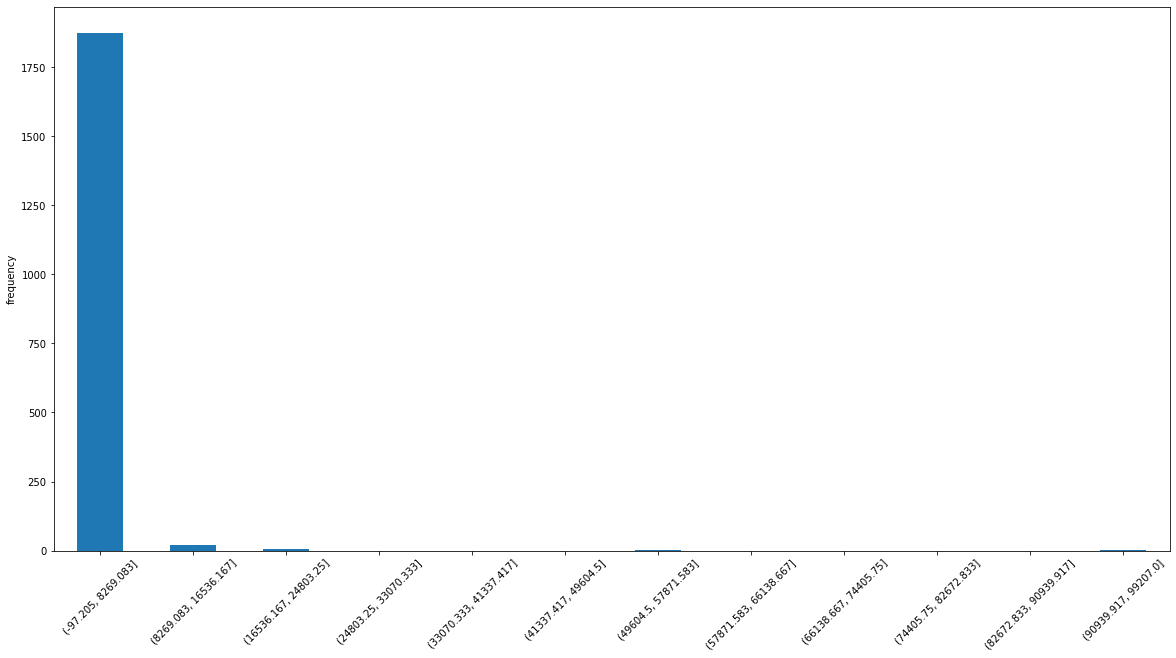


Boxplot:



Principales estadísticos: 
count     1901.000000
mean       757.988427
std       3059.245783
min          2.000000
25%         95.000000
50%        213.000000
75%        537.000000
max      99207.000000
Name: burglaries, dtype: float64

Asimetría: 20.895966319724746
Curtosis: 604.579316748952

 ****************************************************************************************** 


Columna: burglPerPop

Histograma:
(5.056, 1005.595]        1108
(1005.595, 1994.27]       584
(1994.27, 2982.945]       162
(2982.945, 3971.62]        38
(3971.62, 4960.295]         7
(4960.295, 5948.97]         0
(5948.97, 6937.645]         1
(6937.645, 7926.32]         0
(7926.32, 8914.995]         0
(8914.995, 9903.67]         0
(9903.67, 10892.345]        0
(10892.345, 11881.02]       1
Name: burglPerPop, dtype: int64


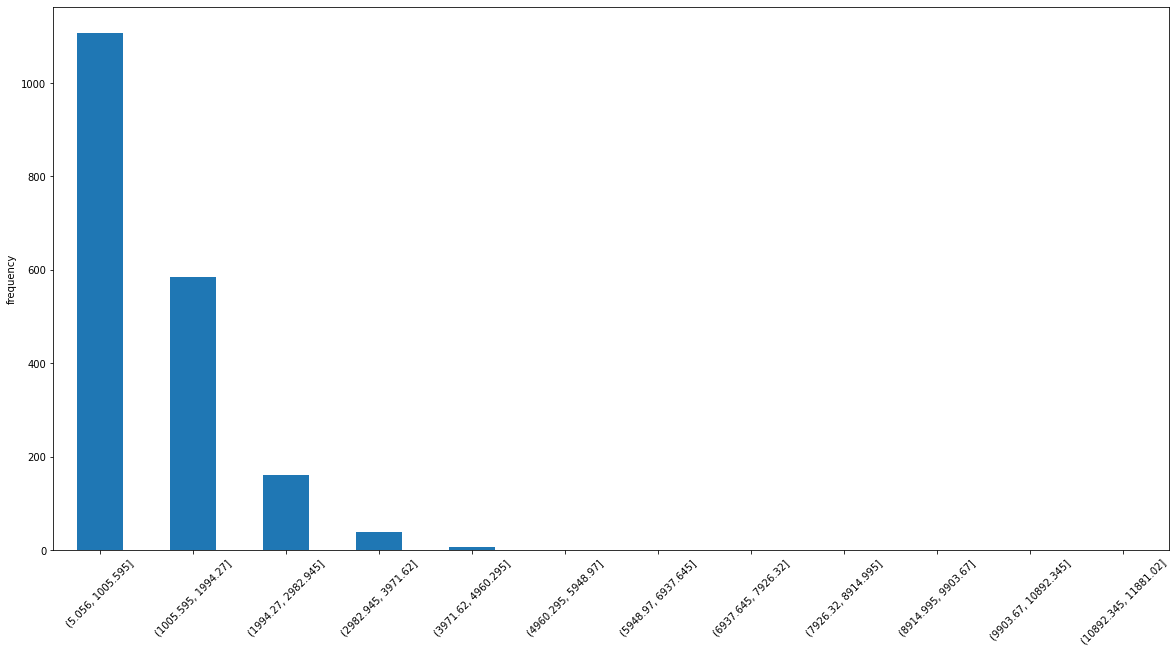


Boxplot:


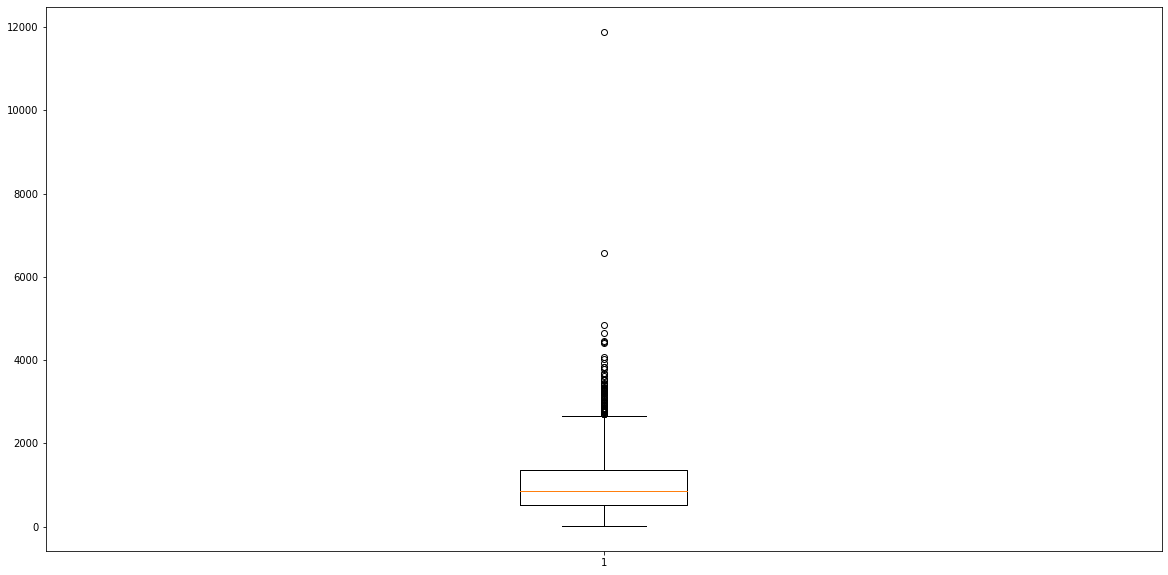


Principales estadísticos: 
count     1901.00000
mean      1056.58142
std        776.75580
min         16.92000
25%        520.42000
50%        858.80000
75%       1373.68000
max      11881.02000
Name: burglPerPop, dtype: float64

Asimetría: 2.7667912948754045
Curtosis: 22.440268966683682

 ****************************************************************************************** 


Columna: larcenies

Histograma:
(-225.122, 19603.5]     1873
(19603.5, 39197.0]        22
(39197.0, 58790.5]         3
(58790.5, 78384.0]         1
(78384.0, 97977.5]         0
(97977.5, 117571.0]        0
(117571.0, 137164.5]       1
(137164.5, 156758.0]       0
(156758.0, 176351.5]       0
(176351.5, 195945.0]       0
(195945.0, 215538.5]       0
(215538.5, 235132.0]       1
Name: larcenies, dtype: int64


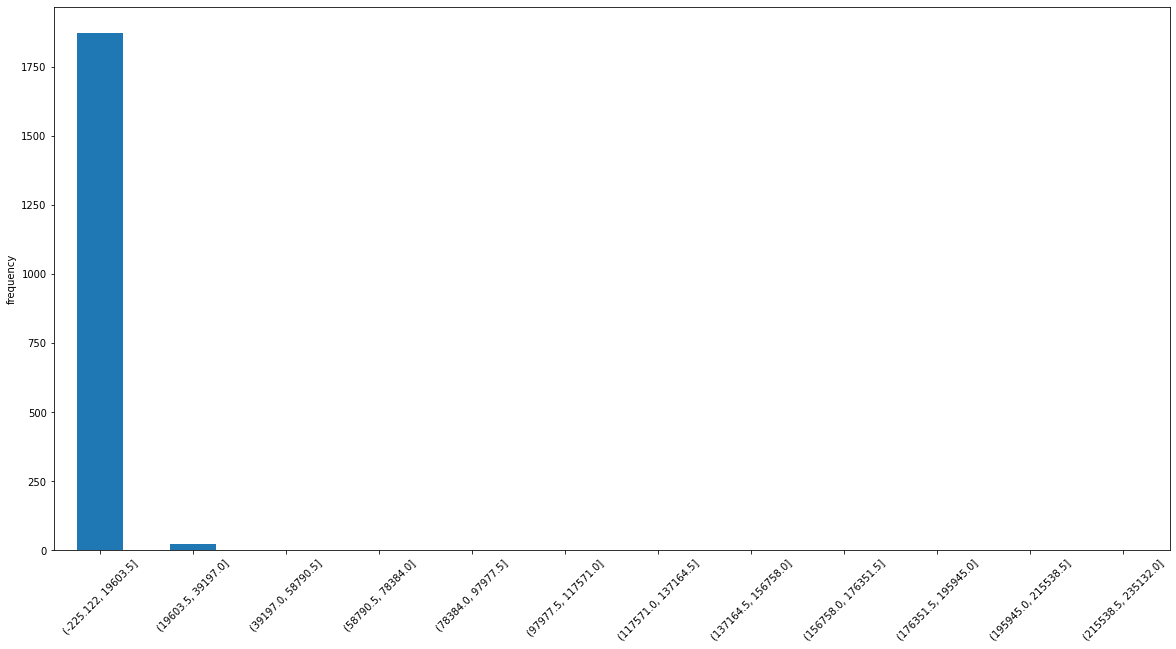


Boxplot:


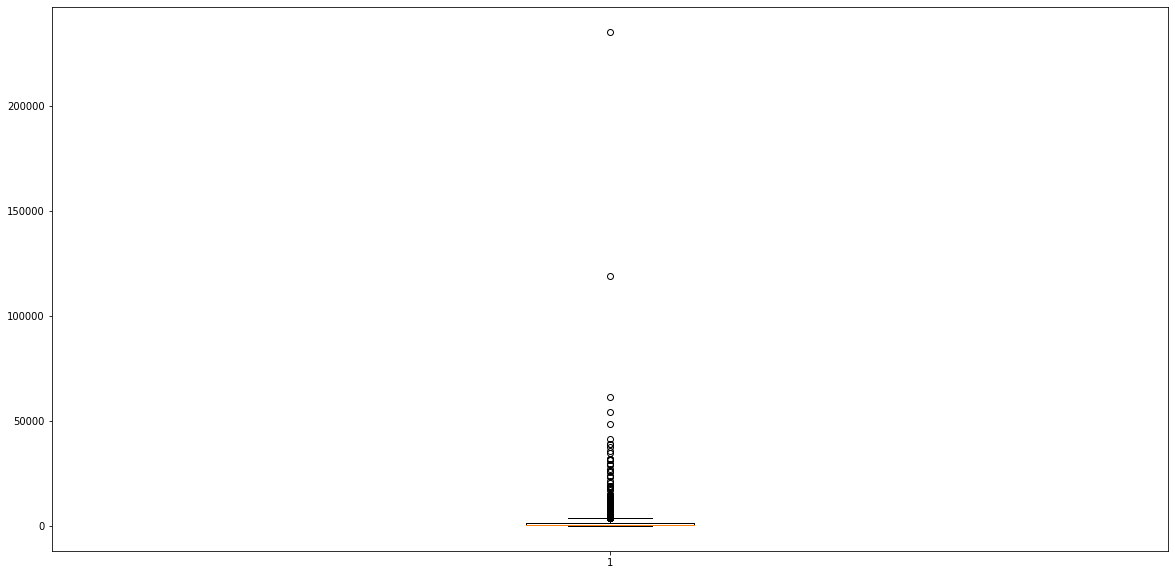


Principales estadísticos: 
count      1901.000000
mean       2120.598632
std        7470.276137
min          10.000000
25%         382.000000
50%         745.000000
75%        1689.000000
max      235132.000000
Name: larcenies, dtype: float64

Asimetría: 19.39162838816692
Curtosis: 535.8209645007137

 ****************************************************************************************** 


Columna: larcPerPop

Histograma:
(52.027, 2230.584]        589
(2230.584, 4383.308]      847
(4383.308, 6536.032]      353
(6536.032, 8688.757]       91
(8688.757, 10841.481]      15
(10841.481, 12994.205]      3
(12994.205, 15146.929]      0
(15146.929, 17299.653]      0
(17299.653, 19452.378]      1
(19452.378, 21605.102]      0
(21605.102, 23757.826]      1
(23757.826, 25910.55]       1
Name: larcPerPop, dtype: int64


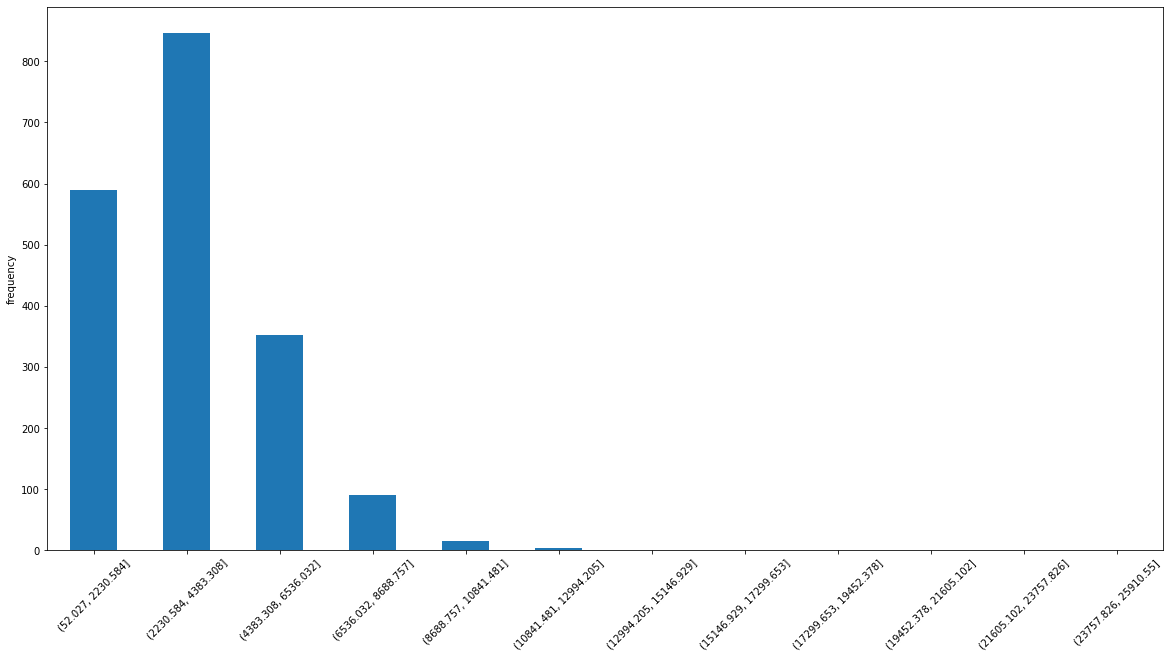


Boxplot:


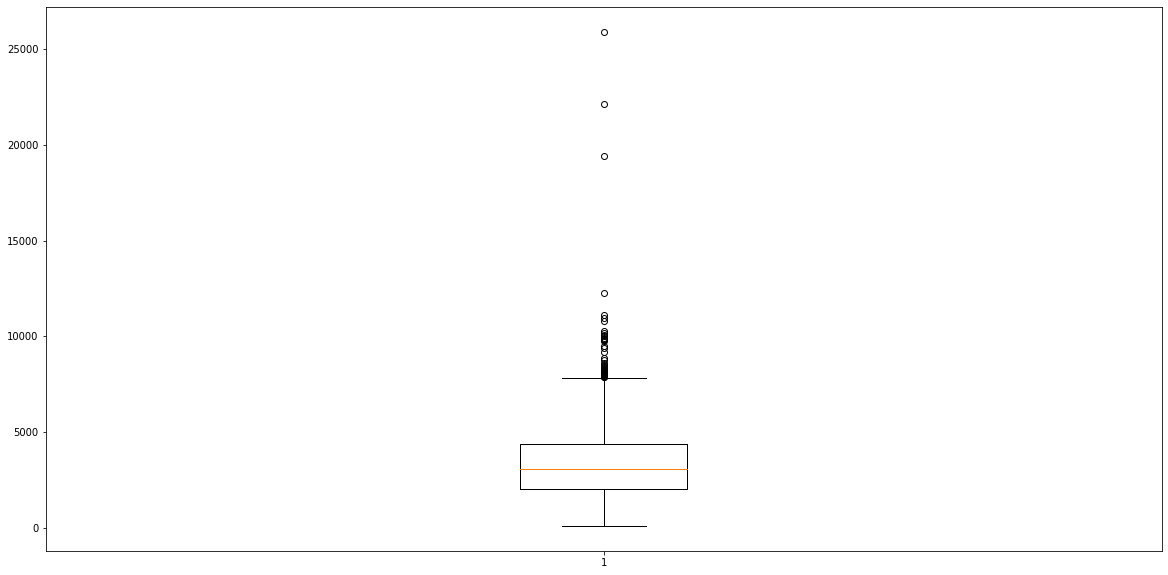


Principales estadísticos: 
count     1901.000000
mean      3368.953956
std       1956.780613
min         77.860000
25%       1996.460000
50%       3057.330000
75%       4349.420000
max      25910.550000
Name: larcPerPop, dtype: float64

Asimetría: 2.3112778286816025
Curtosis: 16.195630761744066

 ****************************************************************************************** 


Columna: autoTheft

Histograma:
(-111.463, 9372.917]       1886
(9372.917, 18744.833]        11
(18744.833, 28116.75]         2
(28116.75, 37488.667]         0
(37488.667, 46860.583]        0
(46860.583, 56232.5]          0
(56232.5, 65604.417]          1
(65604.417, 74976.333]        0
(74976.333, 84348.25]         0
(84348.25, 93720.167]         0
(93720.167, 103092.083]       0
(103092.083, 112464.0]        1
Name: autoTheft, dtype: int64


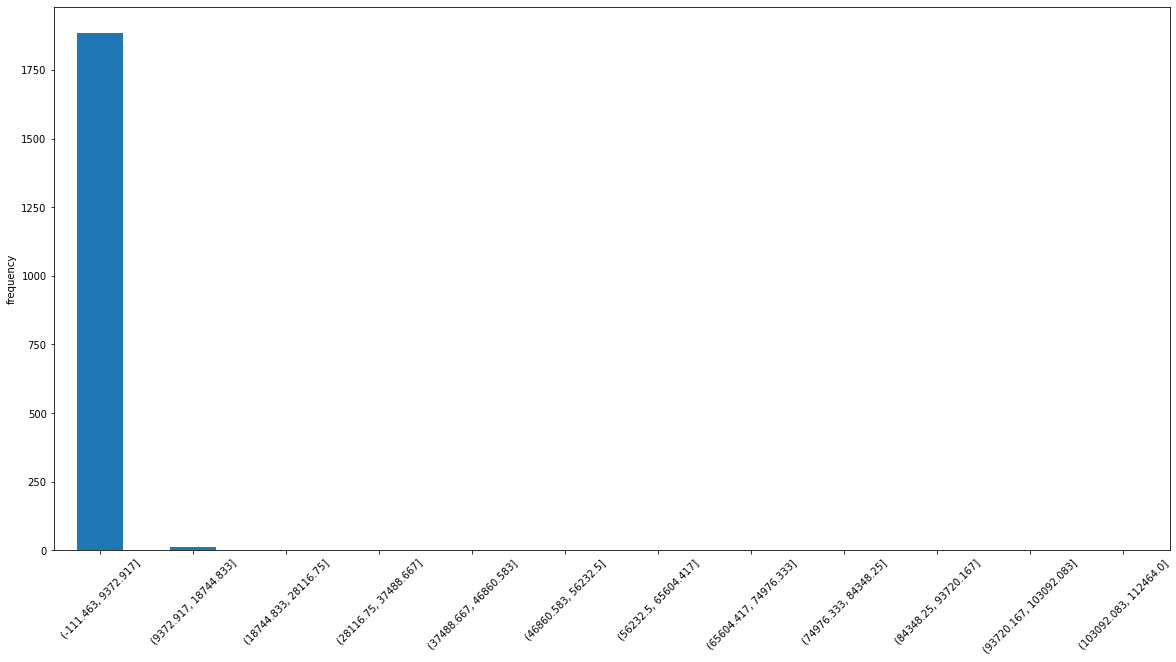


Boxplot:


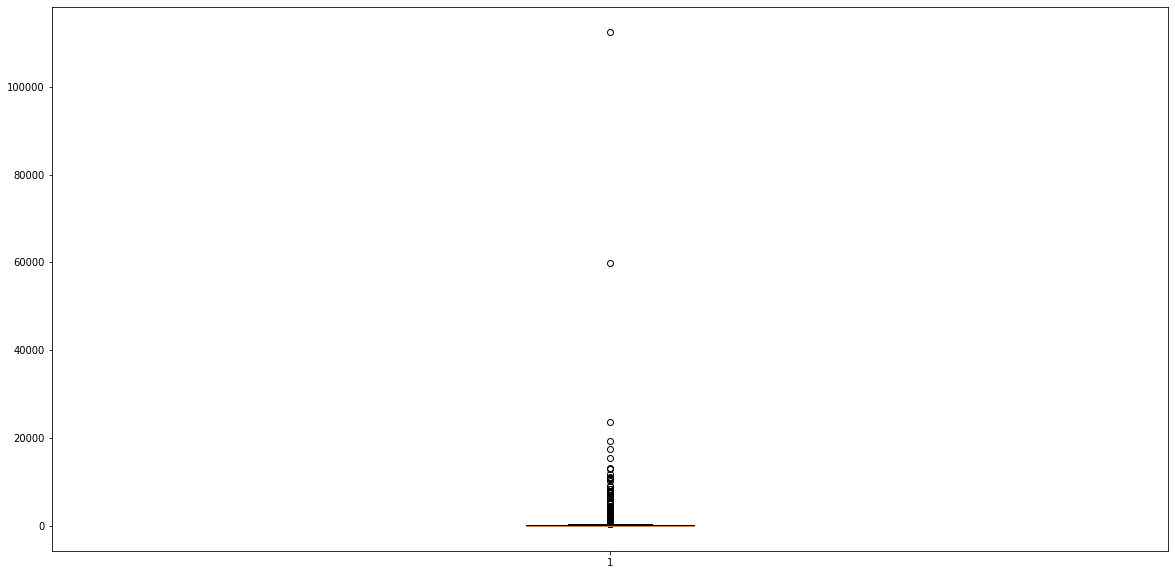


Principales estadísticos: 
count      1901.000000
mean        506.861652
std        3250.136063
min           1.000000
25%          31.000000
50%          77.000000
75%         243.000000
max      112464.000000
Name: autoTheft, dtype: float64

Asimetría: 25.447586480438193
Curtosis: 802.2244876990355

 ****************************************************************************************** 


Columna: autoTheftPerPop

Histograma:
(1.588, 420.053]        1181
(420.053, 833.557]       401
(833.557, 1247.06]       165
(1247.06, 1660.563]       84
(1660.563, 2074.067]      38
(2074.067, 2487.57]       15
(2487.57, 2901.073]        6
(2901.073, 3314.577]       6
(3314.577, 3728.08]        2
(3728.08, 4141.583]        1
(4141.583, 4555.087]       1
(4555.087, 4968.59]        1
Name: autoTheftPerPop, dtype: int64


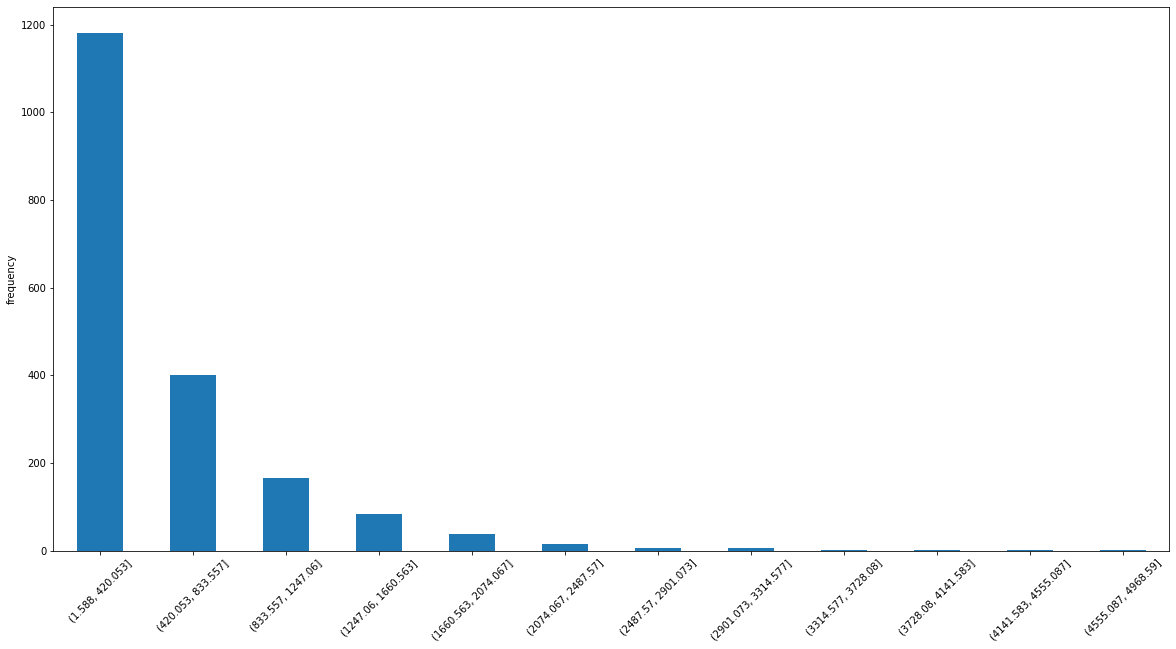


Boxplot:


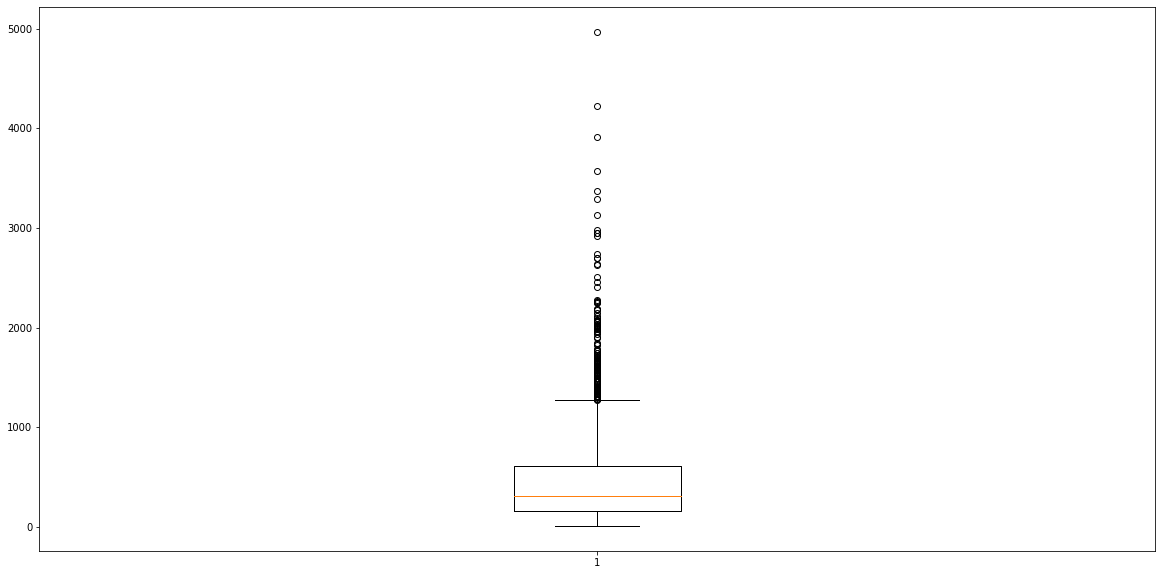


Principales estadísticos: 
count    1901.000000
mean      483.478048
std       506.202015
min         6.550000
25%       162.590000
50%       311.040000
75%       605.820000
max      4968.590000
Name: autoTheftPerPop, dtype: float64

Asimetría: 2.6304402900940835
Curtosis: 10.506190275729947

 ****************************************************************************************** 


Columna: arsons

Histograma:
(-5.119, 426.583]       1879
(426.583, 853.167]        16
(853.167, 1279.75]         2
(1279.75, 1706.333]        1
(1706.333, 2132.917]       0
(2132.917, 2559.5]         1
(2559.5, 2986.083]         0
(2986.083, 3412.667]       0
(3412.667, 3839.25]        0
(3839.25, 4265.833]        0
(4265.833, 4692.417]       1
(4692.417, 5119.0]         1
Name: arsons, dtype: int64


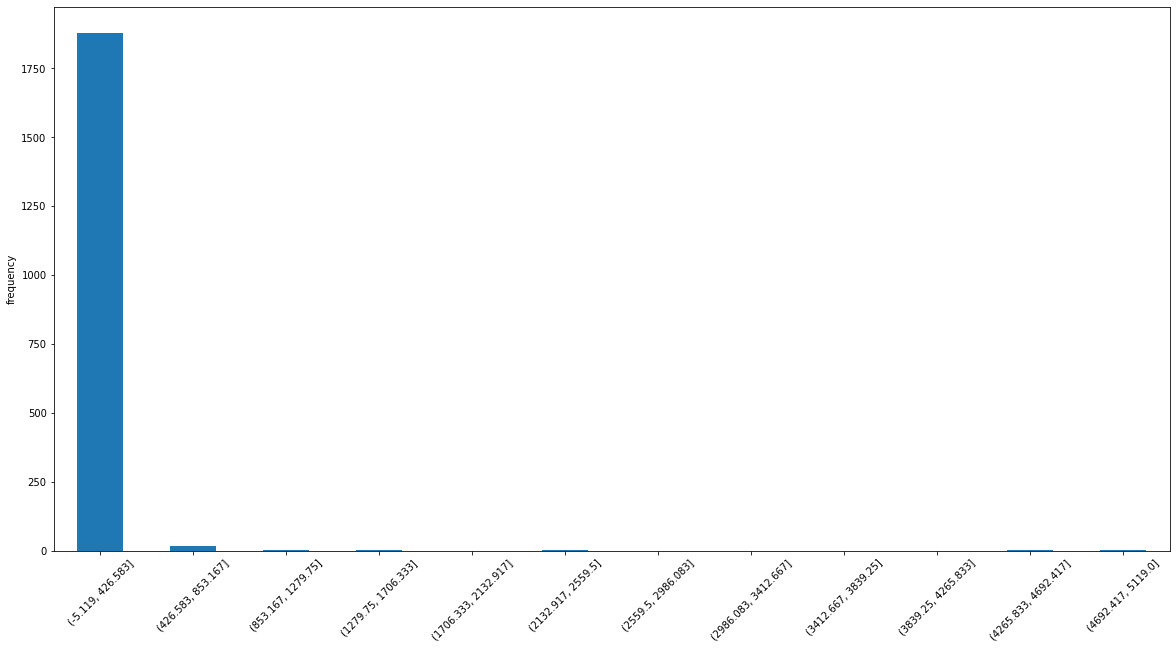


Boxplot:


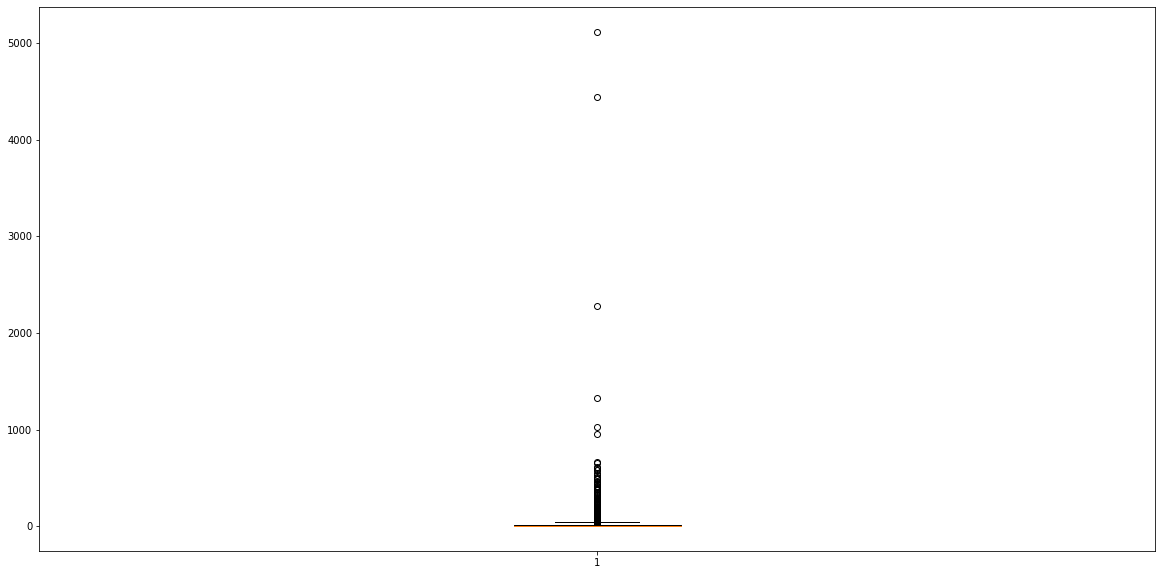


Principales estadísticos: 
count    1901.000000
mean       30.478169
std       180.886126
min         0.000000
25%         1.000000
50%         5.000000
75%        16.000000
max      5119.000000
Name: arsons, dtype: float64

Asimetría: 21.007507772250214
Curtosis: 530.200657233647

 ****************************************************************************************** 


Columna: arsonsPerPop

Histograma:
(-0.436, 36.364]      1302
(36.364, 72.728]       400
(72.728, 109.092]      111
(109.092, 145.457]      48
(145.457, 181.821]      22
(181.821, 218.185]       7
(218.185, 254.549]       2
(254.549, 290.913]       4
(290.913, 327.278]       2
(327.278, 363.642]       0
(363.642, 400.006]       2
(400.006, 436.37]        1
Name: arsonsPerPop, dtype: int64


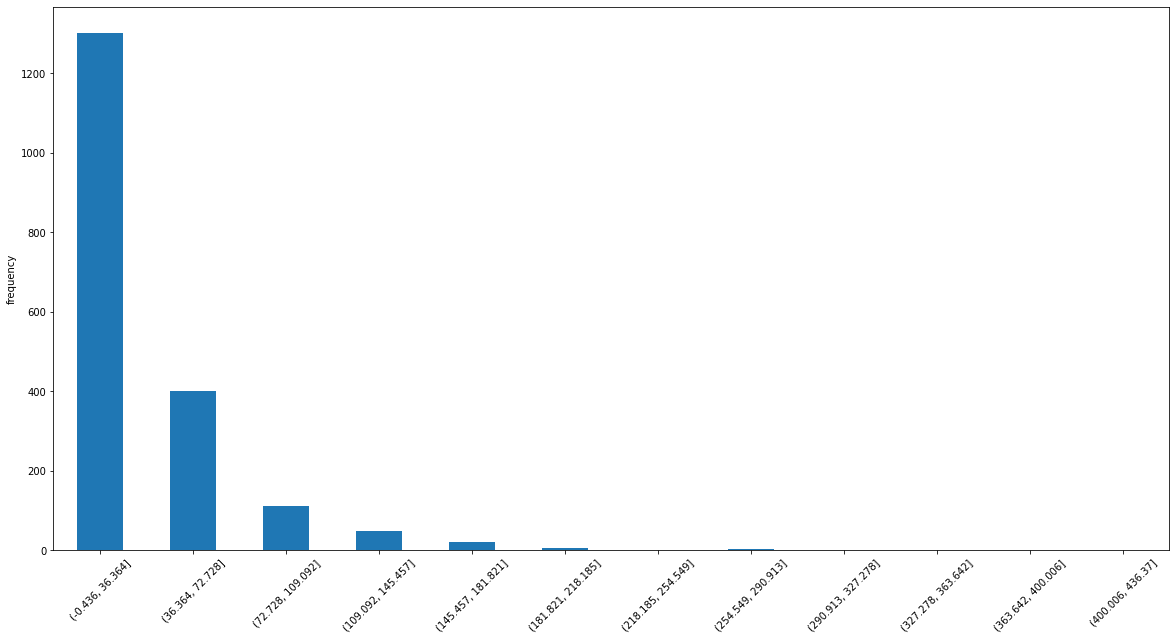


Boxplot:


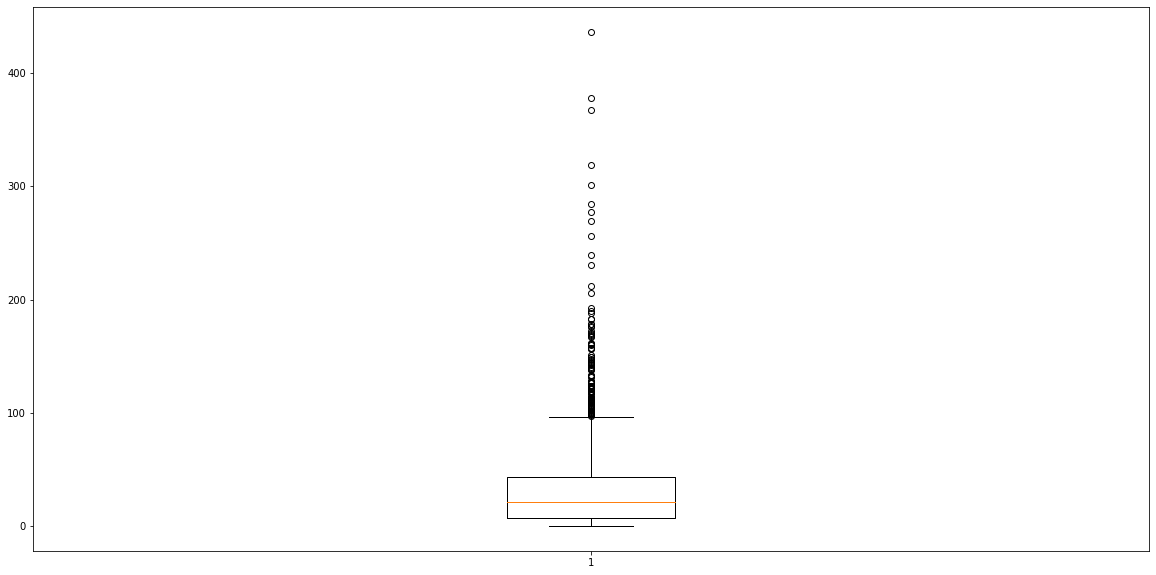


Principales estadísticos: 
count    1901.000000
mean       32.035829
std        39.588058
min         0.000000
25%         7.250000
50%        21.020000
75%        43.190000
max       436.370000
Name: arsonsPerPop, dtype: float64

Asimetría: 3.285177109022025
Curtosis: 18.41135190577148

 ****************************************************************************************** 


Columna: ViolentCrimesPerPop

Histograma:
(1.77, 412.508]         1018
(412.508, 818.377]       429
(818.377, 1224.245]      197
(1224.245, 1630.113]     130
(1630.113, 2035.982]      59
(2035.982, 2441.85]       29
(2441.85, 2847.718]       19
(2847.718, 3253.587]       9
(3253.587, 3659.455]       6
(3659.455, 4065.323]       4
(4065.323, 4471.192]       0
(4471.192, 4877.06]        1
Name: ViolentCrimesPerPop, dtype: int64


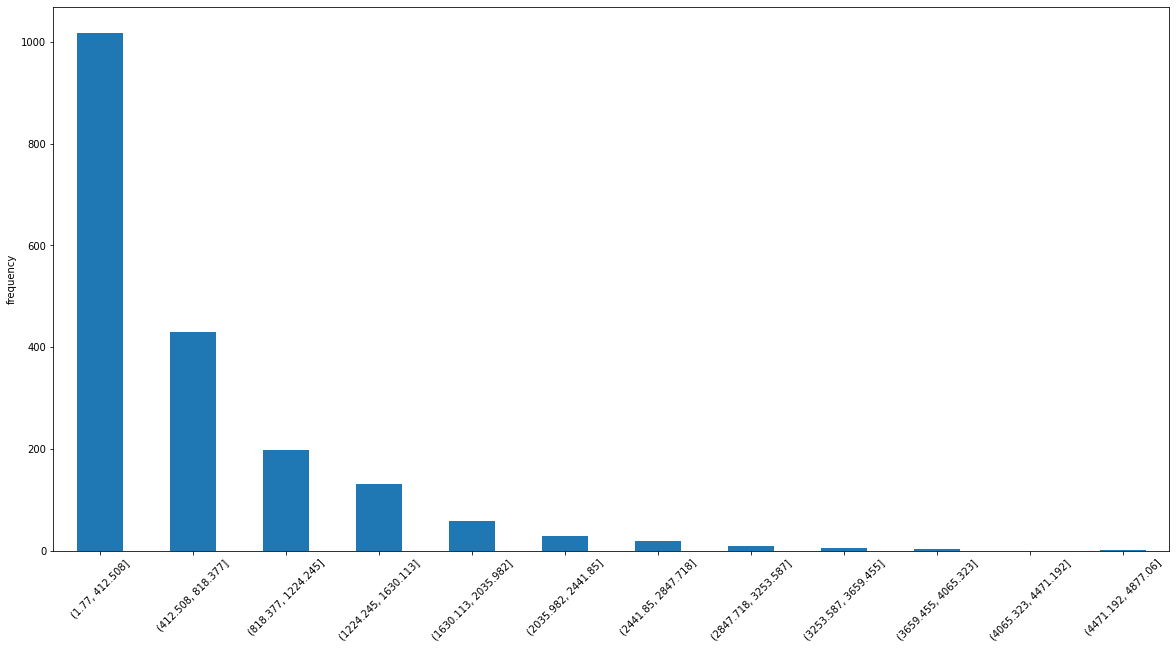


Boxplot:


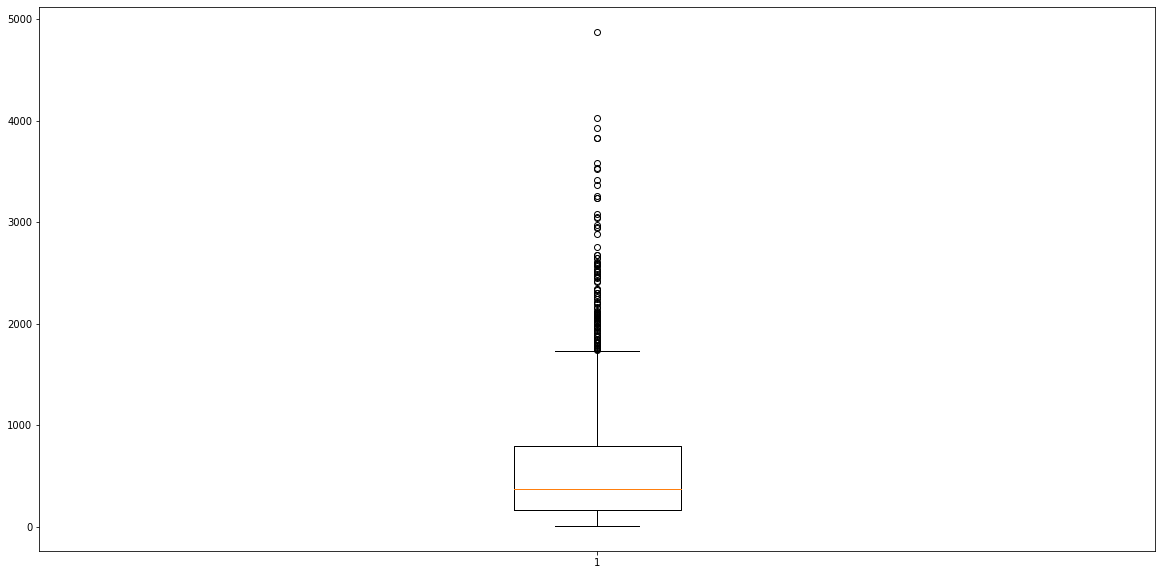


Principales estadísticos: 
count    1901.000000
mean      583.712941
std       608.430184
min         6.640000
25%       163.750000
50%       369.300000
75%       792.930000
max      4877.060000
Name: ViolentCrimesPerPop, dtype: float64

Asimetría: 2.103559875957023
Curtosis: 5.908823301463702

 ****************************************************************************************** 


Columna: nonViolPerPop

Histograma:
(89.787, 2367.038]        302
(2367.038, 4617.285]      691
(4617.285, 6867.532]      525
(6867.532, 9117.78]       223
(9117.78, 11368.028]      107
(11368.028, 13618.275]     33
(13618.275, 15868.523]     12
(15868.523, 18118.77]       5
(18118.77, 20369.018]       0
(20369.018, 22619.265]      0
(22619.265, 24869.512]      1
(24869.512, 27119.76]       2
Name: nonViolPerPop, dtype: int64


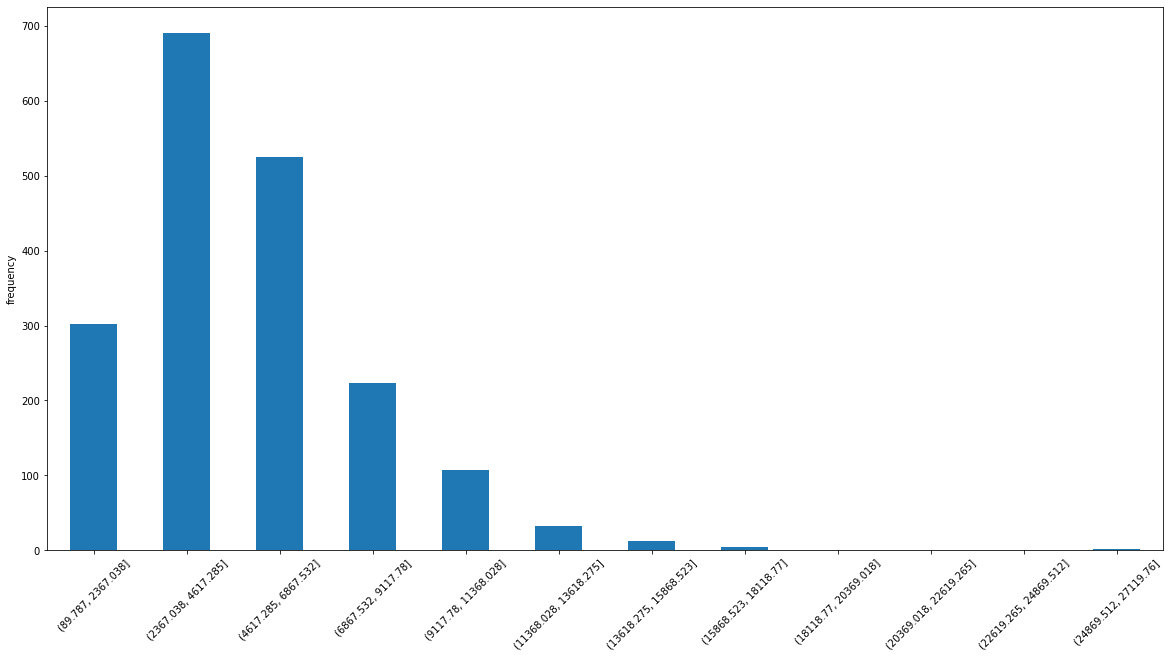


Boxplot:


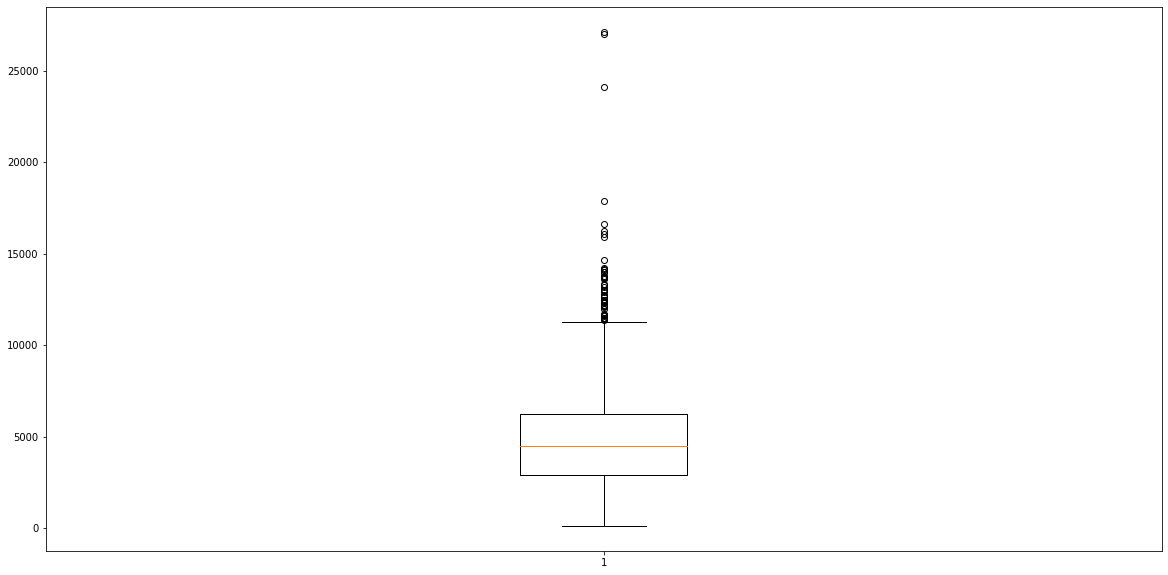


Principales estadísticos: 
count     1901.000000
mean      4941.049011
std       2786.789842
min        116.790000
25%       2913.240000
50%       4479.110000
75%       6265.540000
max      27119.760000
Name: nonViolPerPop, dtype: float64

Asimetría: 1.5882299072128983
Curtosis: 5.970740615894492

 ****************************************************************************************** 




In [ ]:
for i in df:
  print("Columna: {}".format(i))
  if df[i].dtype != 'object':
    print("\nHistograma:")
    freq_table(df[i])
    plt.show()
    print("\nBoxplot:")
    plt.figure(figsize = (20,10))
    plt.boxplot(df[i])
    plt.show()
    print("\nPrincipales estadísticos: \n{}\n".format(df[i].describe()))
    print("Asimetría: {}".format(df[i].skew()))
    print("Curtosis: {}".format(df[i].kurt()))
  print("\n","*"*90, "\n\n")

# Definicion Target

Definimos la variable objetivo como la suma de todos los tipos de crímenes que hay en el dataframe. A su vez, y dado que las columnas que componen "target" estarán a su vez 100% correlacionadas con la variable objetivo, las eliminamos del dataframe objeto de análisis.

In [ ]:
df["target"] = df[['murders',"rapes","robberies","assaults" ,"burglaries" ,"larcenies" ,"autoTheft","arsons"]].sum(axis=1)

df.drop(labels = ['murders',"rapes","robberies","assaults" ,"burglaries" ,"larcenies" ,"autoTheft","arsons"], axis=1, inplace = True)

Una vez limpiado el dataframe y generada la variable objetivo, definida como la suma de los distintos crímenes, procedemos a escalar las variables.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for i in df.iloc[:,2:]:
  df[i] = scaler.fit_transform(np.asarray(df[i]).reshape(-1,1))

Posteriormente generamos una función que haga una análisis de correlación por medio de una matriz de confusión. En dicha matriz se iterará y la función devolverá aquellas variables cuya correlación es mayor al 70%. Decidimos tomar este camino debido a que, al haber tantas variables en el dataframe, necesitamos acotar la cantidad de variables a ser analizadas por medio de dicha matriz de confusión.

In [ ]:
def correlation_analysis(columns_to_drop, in_df):
  correlation_matrix = in_df.drop(columns_to_drop, axis=1).corr()
  feature_correlation = pd.DataFrame(columns= ["feature_1","feature_2","corr", "%nAn_feature1","%nAn_feature2"])


  for i, row in correlation_matrix.iterrows():
    for c in correlation_matrix.loc[:,correlation_matrix.columns != i]: #No itero sobre la columna que ya estoy analizando ya que en ese caso la correlación va a ser perfecta
      if abs(correlation_matrix.loc[i,c]) > 0.7:
        feature_correlation= feature_correlation.append({"feature_1":i,"feature_2": c,"corr":correlation_matrix.loc[i,c],
                                                         "%nAn_feature1": in_df[i].isna().sum()/len(in_df[i]),
                                                         "%nAn_feature2": in_df[c].isna().sum()/len(in_df[c])}, ignore_index=True)
  return(feature_correlation)

correlation_analysis(["target"],df)

feature_1            feature_2      corr  %nAn_feature1  \
0             population            numbUrban  0.999038            0.0   
1             population          NumUnderPov  0.989190            0.0   
2             population  NumKidsBornNeverMar  0.969712            0.0   
3             population             NumImmig  0.938617            0.0   
4             population           HousVacant  0.927861            0.0   
..                   ...                  ...       ...            ...   
501  ViolentCrimesPerPop  PctKidsBornNeverMar  0.739618            0.0   
502  ViolentCrimesPerPop          robbbPerPop  0.836375            0.0   
503  ViolentCrimesPerPop        assaultPerPop  0.945370            0.0   
504        nonViolPerPop          burglPerPop  0.810642            0.0   
505        nonViolPerPop           larcPerPop  0.942598            0.0   

     %nAn_feature2  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
..             ...  
501            0.0  
502            0.0  
503            0.0  
504            0.0  
505            0.0  

[506 rows x 5 columns]

Separamos el df entre entrenamiento y testing.

In [ ]:
#Split train/test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,df.columns != "target"], df["target"], test_size = 0.2, random_state = 1234)
X_train = X_train.iloc[:,2:]
X_train

fold  population  householdsize  racepctblack  racePctWhite  \
295   0.111111    0.000521       0.334239      0.006827      0.958845   
1274  0.555556    0.000863       0.228261      0.199855      0.798762   
656   0.222222    0.003382       0.326087      0.151960      0.802682   
491   0.222222    0.004214       0.296196      0.010448      0.974214   
758   0.333333    0.000210       0.391304      0.010758      0.927798   
...        ...         ...            ...           ...           ...   
1437  0.666667    0.014127       0.239130      0.018517      0.894172   
1249  0.555556    0.003307       0.331522      0.188890      0.784219   
1543  0.666667    0.001046       0.285326      0.010241      0.983806   
846   0.333333    0.005052       0.241848      0.002690      0.949974   
953   0.444444    0.000533       0.209239      0.001759      0.980505   

      racePctAsian  racePctHisp  agePct12t21  agePct12t29  agePct16t24  \
295       0.056620     0.018703     0.156965     0.232783     0.121567   
1274      0.003484     0.003362     0.188479     0.282840     0.148016   
656       0.030139     0.049911     0.150542     0.251104     0.111394   
491       0.014983     0.032573     0.148535     0.240144     0.108172   
758       0.107143     0.023011     0.177640     0.235073     0.132757   
...            ...          ...          ...          ...          ...   
1437      0.057491     0.098245     0.162786     0.252086     0.125805   
1249      0.030139     0.027004     0.248495     0.308032     0.217870   
1543      0.009756     0.003783     0.180450     0.284312     0.118176   
846       0.018990     0.052117     0.159574     0.241616     0.114276   
953       0.009059     0.020805     0.182858     0.216097     0.099356   

      agePct65up  numbUrban  pctUrban  medIncome  pctWWage  pctWFarmSelf  \
295     0.170025   0.001440    0.7632   0.422844  0.848937      0.059724   
1274    0.261984   0.000000    0.0000   0.064534  0.591007      0.191424   
656     0.248092   0.004743    1.0000   0.209444  0.726671      0.033691   
491     0.203678   0.004814    0.8632   0.269832  0.785956      0.062787   
758     0.216200   0.001576    1.0000   0.431551  0.831075      0.091884   
...          ...        ...       ...        ...       ...           ...   
1437    0.252592   0.015474    1.0000   0.201676  0.620419      0.130168   
1249    0.268245   0.004668    1.0000   0.273517  0.733754      0.035222   
1543    0.140286   0.000000    0.0000   0.214457  0.798429      0.229709   
846     0.265310   0.006412    1.0000   0.115330  0.615953      0.082695   
953     0.260027   0.000000    0.0000   0.098549  0.623037      0.260337   

      pctWInvInc  pctWSocSec  pctWPubAsst  pctWRetire  medFamInc  perCapInc  \
295     0.672207    0.284018     0.108630    0.347919   0.431436   0.341290   
1274    0.212197    0.368539     0.513248    0.199049   0.099985   0.106140   
656     0.455136    0.372171     0.182816    0.364328   0.226836   0.163317   
491     0.594726    0.283459     0.097653    0.352438   0.300885   0.223784   
758     0.761560    0.330958     0.080999    0.385018   0.425481   0.298097   
...          ...         ...          ...         ...        ...        ...   
1437    0.497876    0.343532     0.258895    0.373365   0.229724   0.207044   
1249    0.582104    0.408215     0.099546    0.487515   0.308027   0.221562   
1543    0.454886    0.222408     0.124905    0.204994   0.262349   0.210247   
846     0.411397    0.366024     0.262680    0.312723   0.145868   0.147318   
953     0.425019    0.397178     0.222937    0.325565   0.136625   0.121536   

      whitePerCap  blackPerCap  indianPerCap  AsianPerCap  OtherPerCap  \
295      0.310549     0.068098      0.000000     0.207017     0.260146   
1274     0.113257     0.028276      0.068004     0.069100     0.000000   
656      0.155306     0.059834      0.032396     0.137267     0.065774   
491      0.202215     0.082218      0.044950     0.199473     0.073328   
758      0.2

Una vez generada dicha separación, podemos empezar a generar el primer modelo. El modelo generado será una regresión lineal que tomará la totalidad de variables del dataframe para predecir la cantidad de crímenes.

In [ ]:
import statsmodels.api as sm

x = X_train

#Agregamos constante
x = sm.add_constant(x)

#fit del modelo
model = sm.OLS(y_train, x).fit()

#output del summary del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     998.6
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:31:05   Log-Likelihood:                 6379.8
No. Observations:                1520   AIC:                        -1.254e+04
Df Residuals:                    1408   BIC:                        -1.194e+04
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

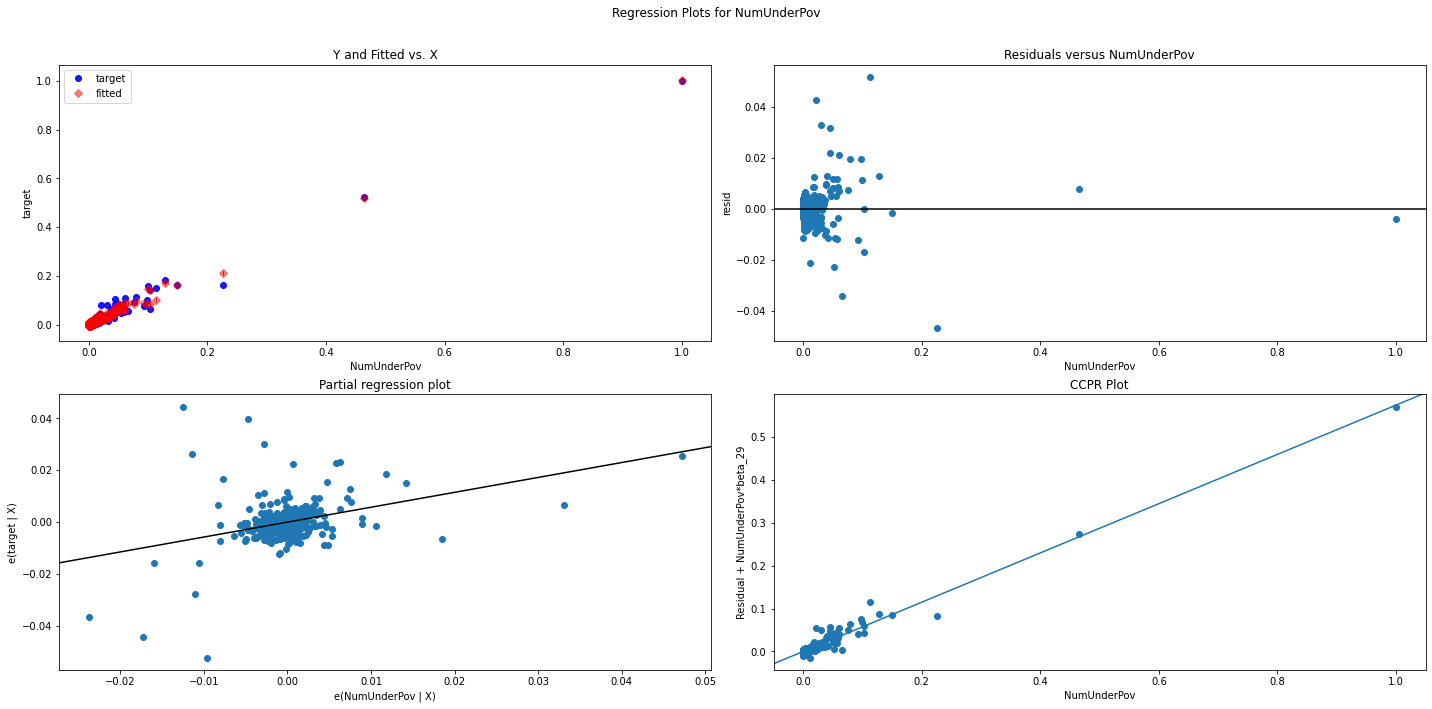

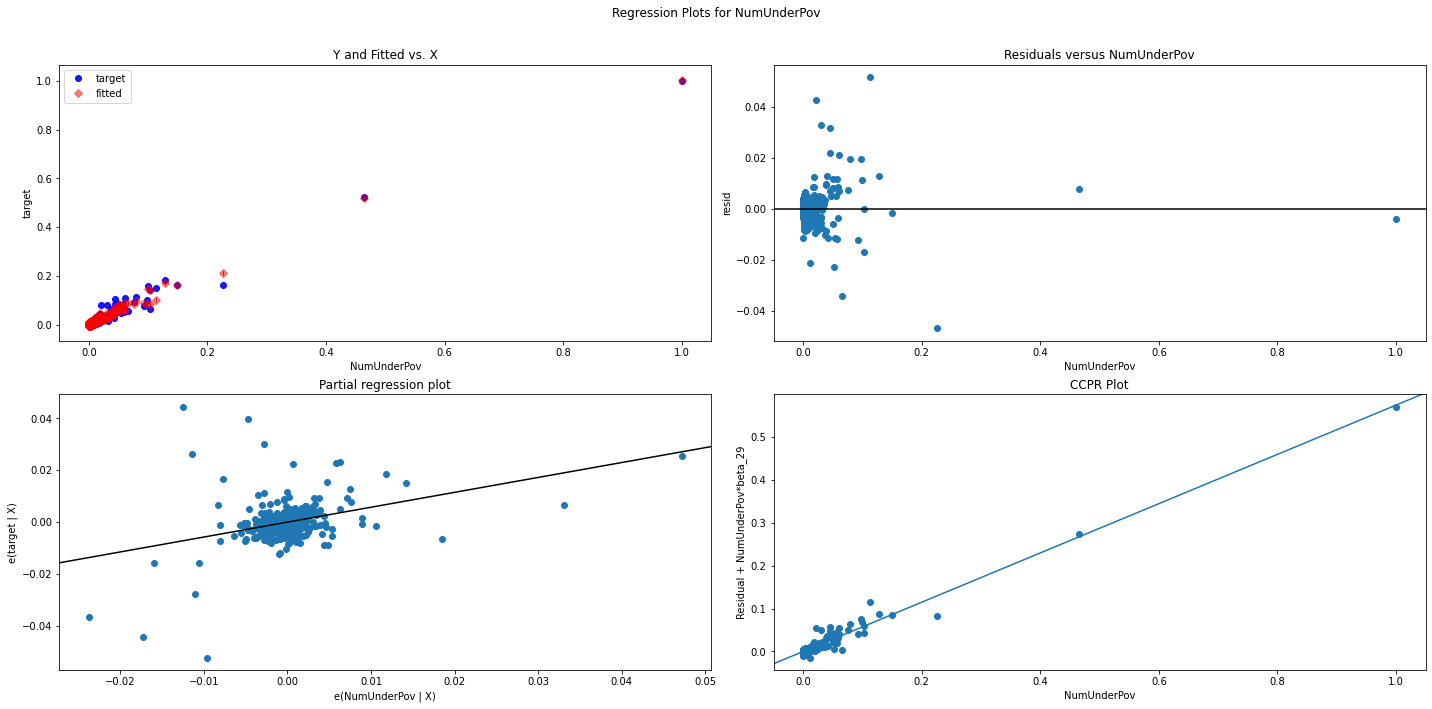

In [ ]:

fig = plt.figure(figsize=(20, 10))

sm.graphics.plot_regress_exog(model,
                              model.pvalues[1:].sort_values(ascending=True).index.values.tolist()[0], fig=fig)



Para el análisis de residuso, utilizamos la variable que posee un p-valor menor y que, por lo tanto, rechaza la hipótesis nula dando evidencia estadísticamente significativa de que la misma afecta a la variable dependiente.

Al analizar la regresión parcial de los residuos, notamos que los mismos no se ajustan perfectamente y que la nube de puntos se encuentra bastante dispersa, lo cual da a entender que el modelo no es lo suficientemente eficaz. Dicha situación se reafirma por el hecho de que poseemos variables que sabemos de antimeano que son correladas entre sí y aún falta seguir refinando la especificación del modelo.

In [ ]:
#R2 del modelo
print(model.rsquared)

0.987456293571235


# Regresion lineal (68 características)

Comenzamos buscando las variables que no tienen correlaciones significativas entre si. Dichas variables son 27 y las tomamos como el punto de partida para el dataframe que vamos a utilizar para esta nueva especificación del modelo.

In [ ]:
highly_correlated = correlation_analysis(["target"], df)
correlation_map = highly_correlated.groupby(by = "feature_1")["feature_2"].count().sort_values(ascending = False)

In [ ]:
not_corr = list()

for i in X_train:
  if i not in highly_correlated.iloc[:,0].unique():
    not_corr.append(i)

print("Cantidad de variables no correladas: {}".format(len(not_corr)))


Cantidad de variables no correladas: 27


Una vez agregadas las 27 variables, tomaremos las restantes 41 variables de la matriz de confusión. Estas 41 variables serán aquellas donde, si bien están correladas, serán las correlaciones mas bajas de dicha matriz.

In [ ]:
#Agrego las top -41 variables de la correlation matrix a las columnas a tomar en cuenta para el siguiente modelo
not_corr.extend(correlation_map[-41:].index.values.tolist())

print("Cantidad de variables luego de realizado el análisis de correlaciones: {}".format(len(not_corr)))

Cantidad de variables luego de realizado el análisis de correlaciones: 68


In [ ]:
#Dataframe de testing solamente con las variables seleccionadas en esta nueva especificación.
x = X_train[not_corr]

#Agregamos constante
x = sm.add_constant(x)

#fit del modelo
model = sm.OLS(y_train, x).fit()

#output summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     8.364
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           3.01e-65
Time:                        17:31:09   Log-Likelihood:                 3303.5
No. Observations:                1520   AIC:                            -6469.
Df Residuals:                    1451   BIC:                            -6101.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.62

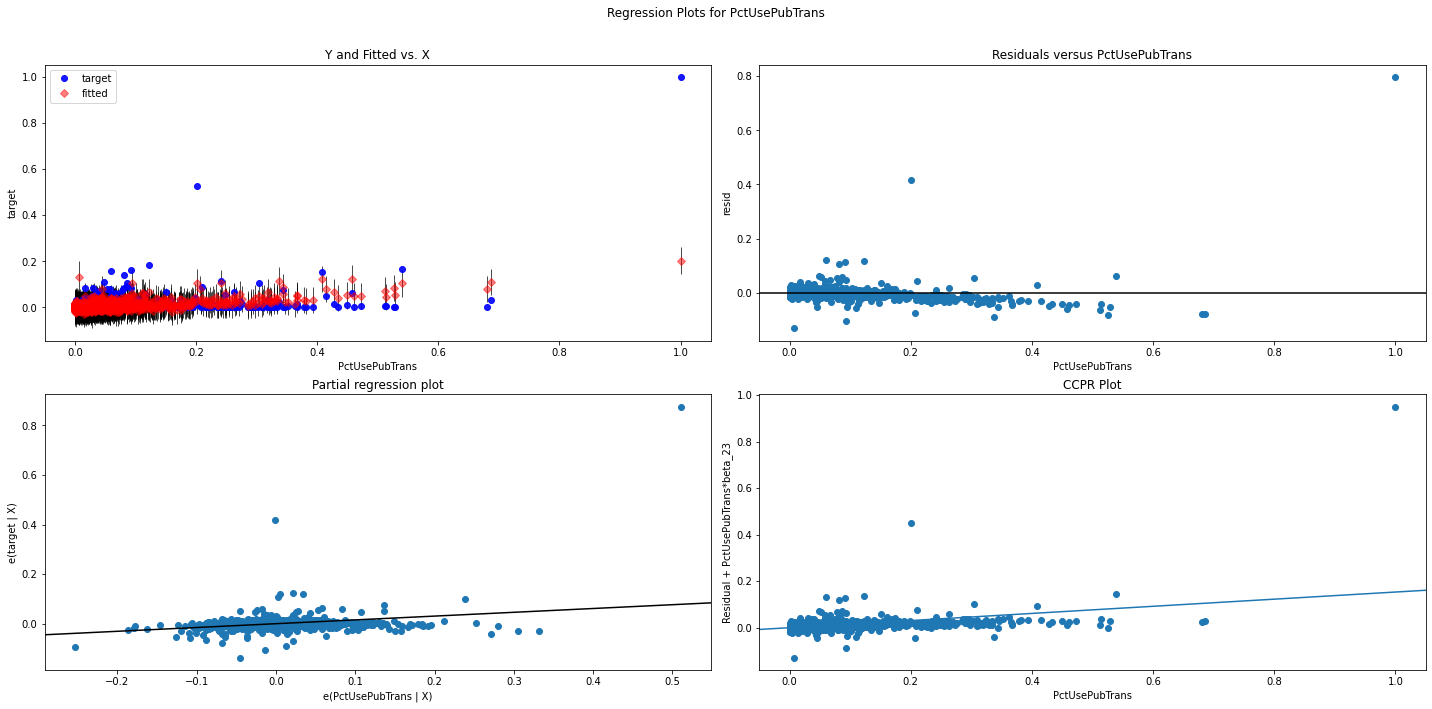

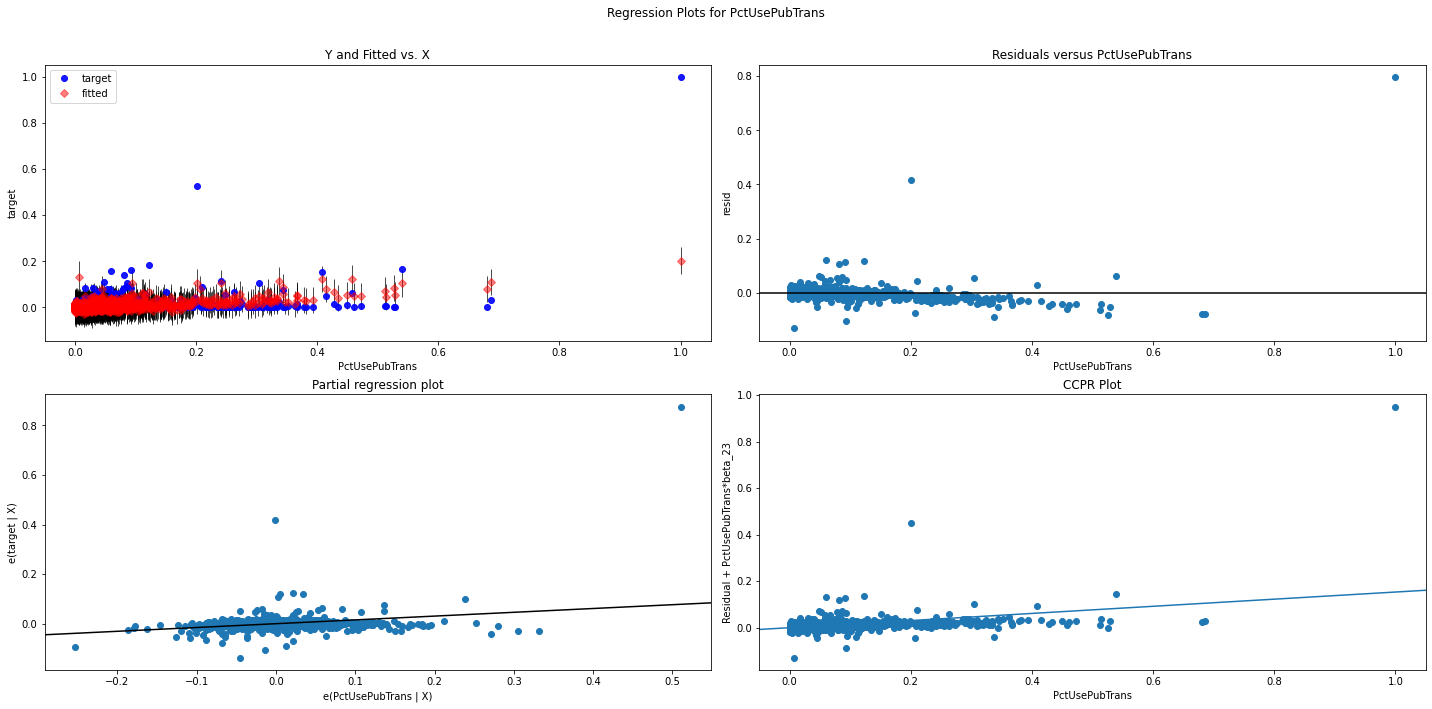

In [ ]:

fig = plt.figure(figsize=(20, 10))

sm.graphics.plot_regress_exog(model,
                              model.pvalues[1:].sort_values(ascending=True).index.values.tolist()[0], fig=fig)

In [ ]:
print(model.rsquared)

0.2815992983920731


En el caso de este modelo, notamos que para la variable mas significativa la recta parcial de regresión mejora y los puntos se ajustan mejor. Sin embargo, y a pesar de lo anterior, el R2 decrece significativamente. De lo anterior asumimos que no podemos tomar ni este modelo (bajo R2) ni el anterior (recta parcial de regresión no se ajusta a errores).

#Basado en p valor

A partir de una especificación mejorada, con respecto al modelo anterior, obtendremos las 23 mejores features donde el p-valor se encuentra mas cercano a un nivel de signifacación del 5%. Cabe destacar que no todos los valores p son menores a dicho nivel de significación y, por lo tanto, de preoponderancia resaltabla en el modelo anterior pero, con el fin de incluir las 23 variables elegidas, las continuamos incluyendo en el modelo.

In [ ]:
refined_p_value = model.pvalues[1:].sort_values(ascending=True)[:28].index.values.tolist() #selecciono del index 1 en adelante para no tomar el p valor de la constante

In [ ]:
#Dataframe de entrenamiento solo con las variables con mejor p valor
x = X_train[refined_p_value]

#Agrego constante
x = sm.add_constant(x)

#fit del modelo de regresión
model = sm.OLS(y_train, x).fit()

#output summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     19.58
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           6.42e-82
Time:                        17:31:11   Log-Likelihood:                 3290.1
No. Observations:                1520   AIC:                            -6522.
Df Residuals:                    1491   BIC:                            -6368.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.01

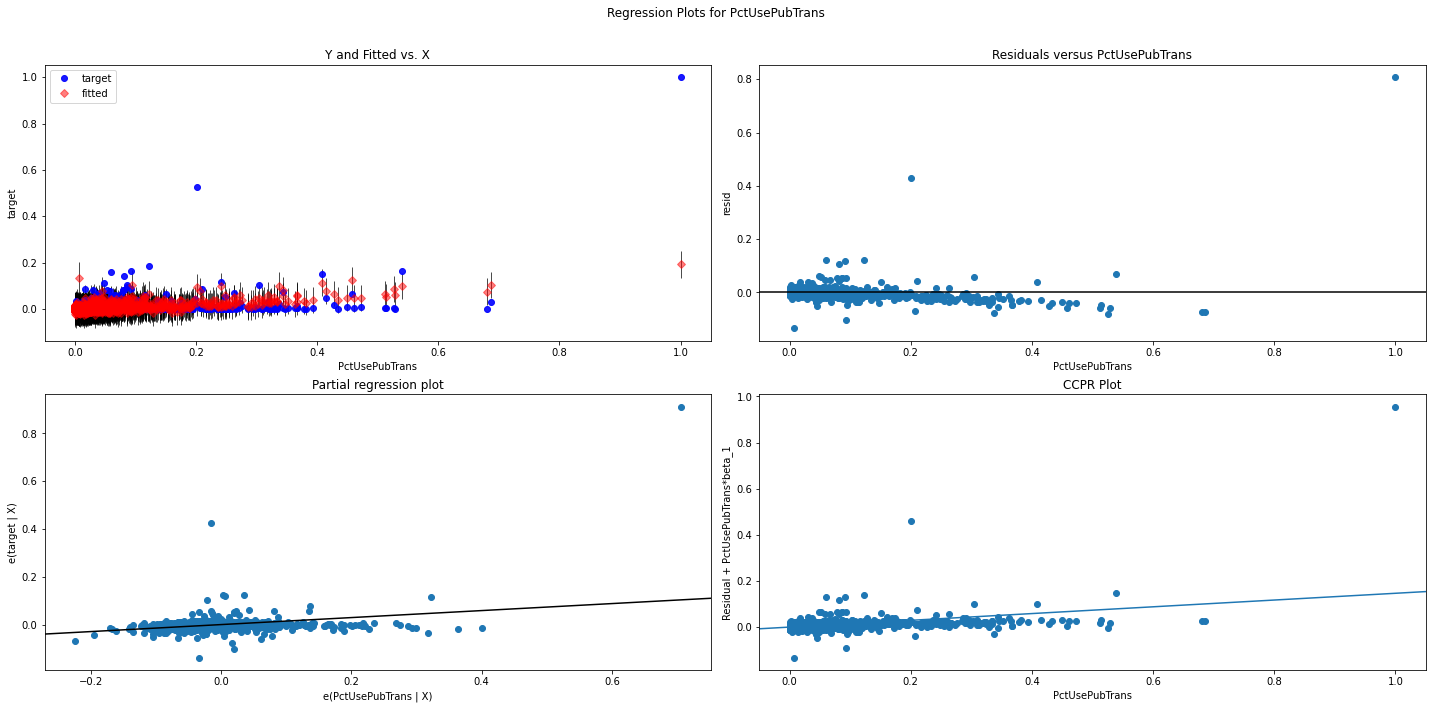

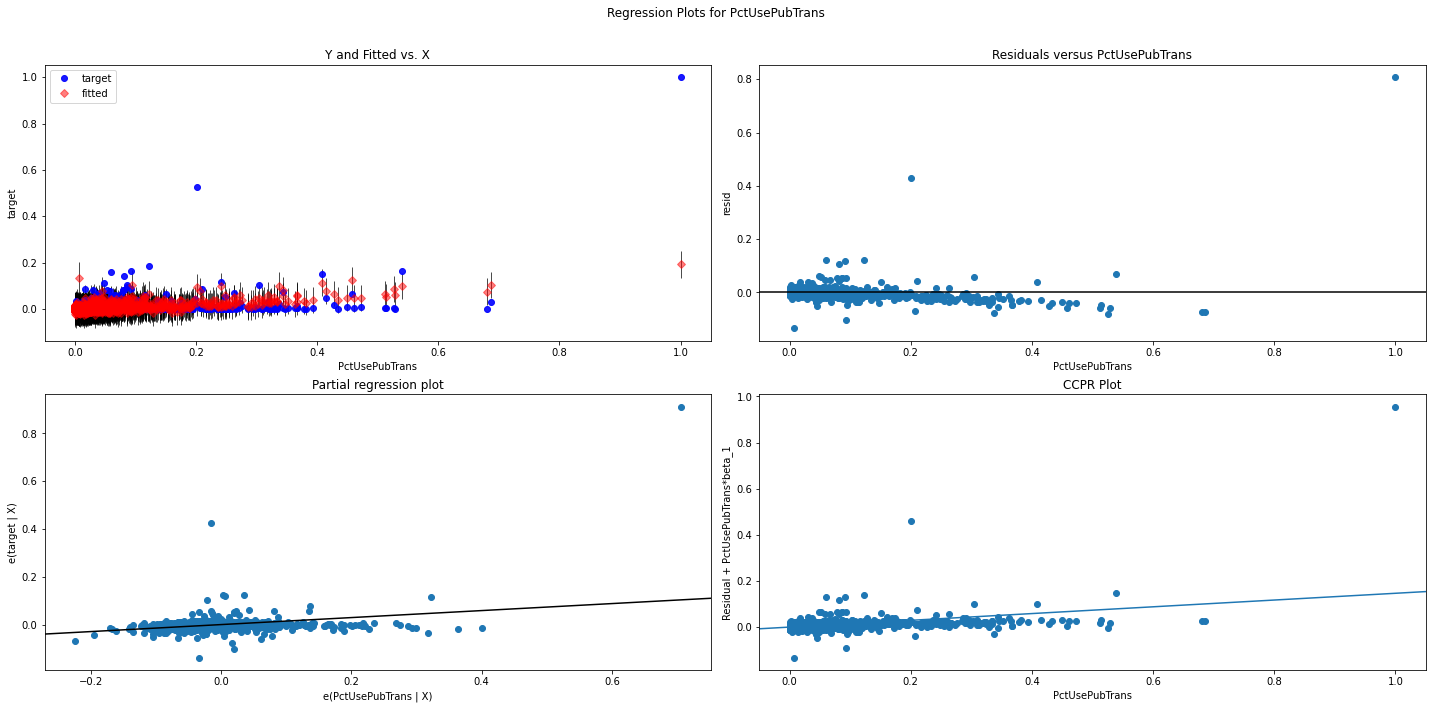

In [ ]:

fig = plt.figure(figsize=(20, 10))

sm.graphics.plot_regress_exog(model,
                              model.pvalues[1:].sort_values(ascending=True).index.values.tolist()[0], fig=fig)

In [ ]:

r = {'modelo': ['OLS_BestSpecification'], 'r2':[model.rsquared],
     'mse': [model.mse_model]
  }

results = pd.DataFrame(r)

results

modelo        r2       mse
0  OLS_BestSpecification  0.268884  0.015406

## Regresión Polinómica

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
xp = polynomial_features.fit_transform(X_train[refined_p_value])
xp.shape

(1520, 435)

In [ ]:
model = sm.OLS(y_train, xp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     257.1
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:31:13   Log-Likelihood:                 6580.6
No. Observations:                1520   AIC:                        -1.229e+04
Df Residuals:                    1085   BIC:                            -9974.
Df Model:                         434                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1537     95.285      0.012      0.990    -185.811     188.118
x1             2.8491      2.639      1.079      0.281      -2.330       8.028
x2             5.6554     14.258      0.397      0.692     -22.321      33.632
x3             0.4547      1.017      0.447      0.655      -1.541       2.450
x4            -2.2761      2.904     -0.784      0.433      -7.975       3.423
x5             1.9035      2.134      0.892      0.373      -2.283       6.090
x6            -3.2123      3.076     -1.044      0.297      -9.248       2.824
x7             1.1078      1.668      0.664      0.507      -2.165       4.381
x8             0.1482      0.401      0.369      0.712      -0.639       0.935
x9            -0.4440      1.290     -0.344      0.731      -2.975       2.087
x10            0.2544      4.140      0.061      0.951      -7.868       8.377
x11            0.3204      2.079      0.154      0.878      -3.760       4.400
x12            3.5069      1.852      1.893      0.059      -0.127       7.141
x13            1.7386      1.774      0.980      0.327      -1.742       5.219
x14           -1.1793      1.591     -0.741      0.459      -4.300       1.942
x15           -1.8456      2.209     -0.835      0.404      -6.180       2.489
x16            2.2446      6.264      0.358      0.720     -10.046      14.536
x17           -1.7244      5.707     -0.302      0.763     -12.922       9.473
x18           -0.5677      1.752     -0.324      0.746      -4.006       2.870
x19           -0.9583      1.325     -0.723      0.470      -3.557       1.641
x20           -3.8913   2614.454     -0.001      0.999   -5133.850    5126.067
x21         -174.0615    6.5e+04     -0.003      0.998   -1.28e+05    1.27e+05
x22         -267.1012      1e+05     -0.003      0.998   -1.97e+05    1.96e+05
x23          371.9434    1.4e+05      0.003      0.998   -2.74e+05    2.75e+05
x24          -30.3268   1.15e+04     -0.003      0.998   -2.26e+04    2.26e+04
x25            1.1958      1.083      1.105      0.270      -0.928       3.320
x26           -1.2275      1.746     -0.703      0.482      -4.653       2.198
x27            0.3276      1.362      0.241      0.810      -2.344       2.999
x28           -2.3403      1.213     -1.930      0.054      -4.720       0.039
x29            0.0487      0.027      1.808      0.071      -0.004       0.101
x30            8.6260      0.256     33.689      0.000       8.124       9.128
x31            0.0038      0.019      0.198      0.843      -0.034       0.042
x32           -0.3844      0.057     -6.686      0.000      -0.497      -0.272
x33           -0.1071      0.046     -2.324      0.020      -0.198      -0.017
x34            0.1107      0.071      1.556      0.120      -0.029       0.250
x35           -0.1678      0.036     -4.655      0.000      -0.238      -0.097
x3

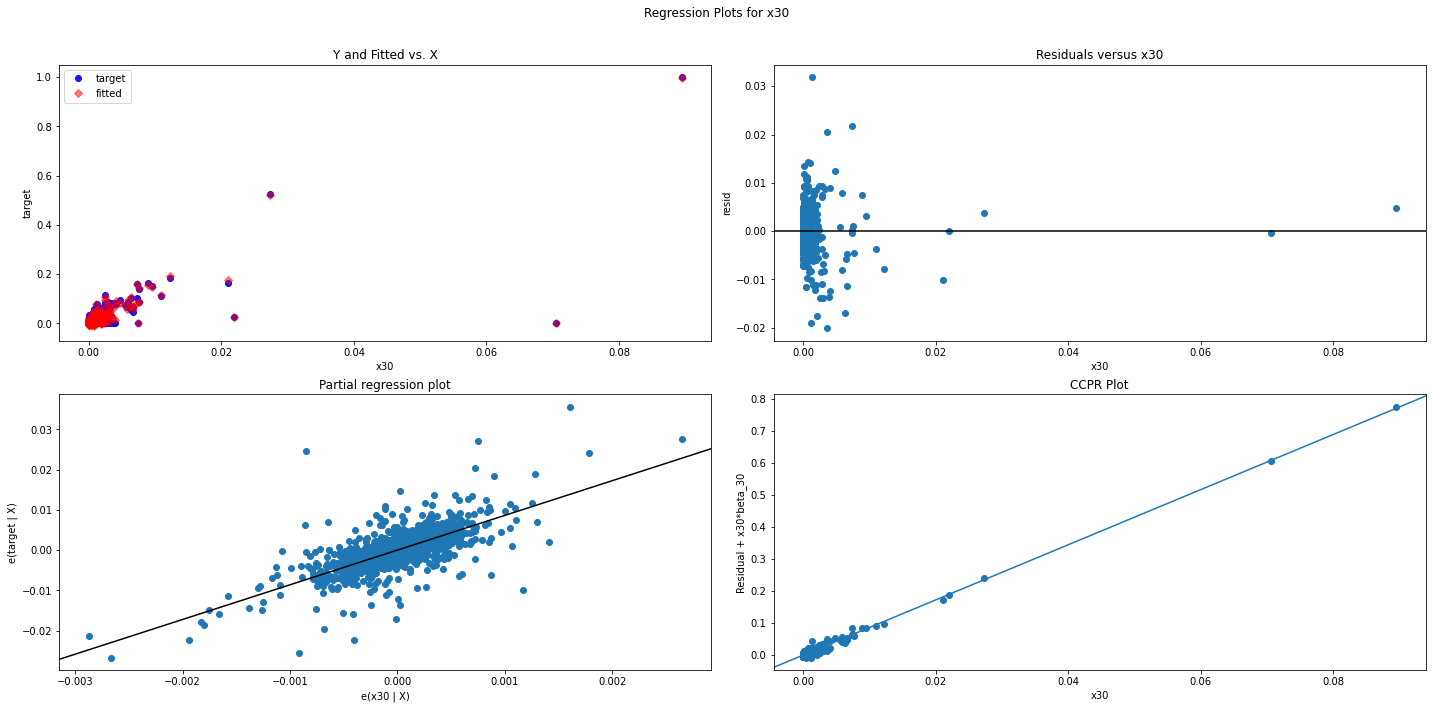

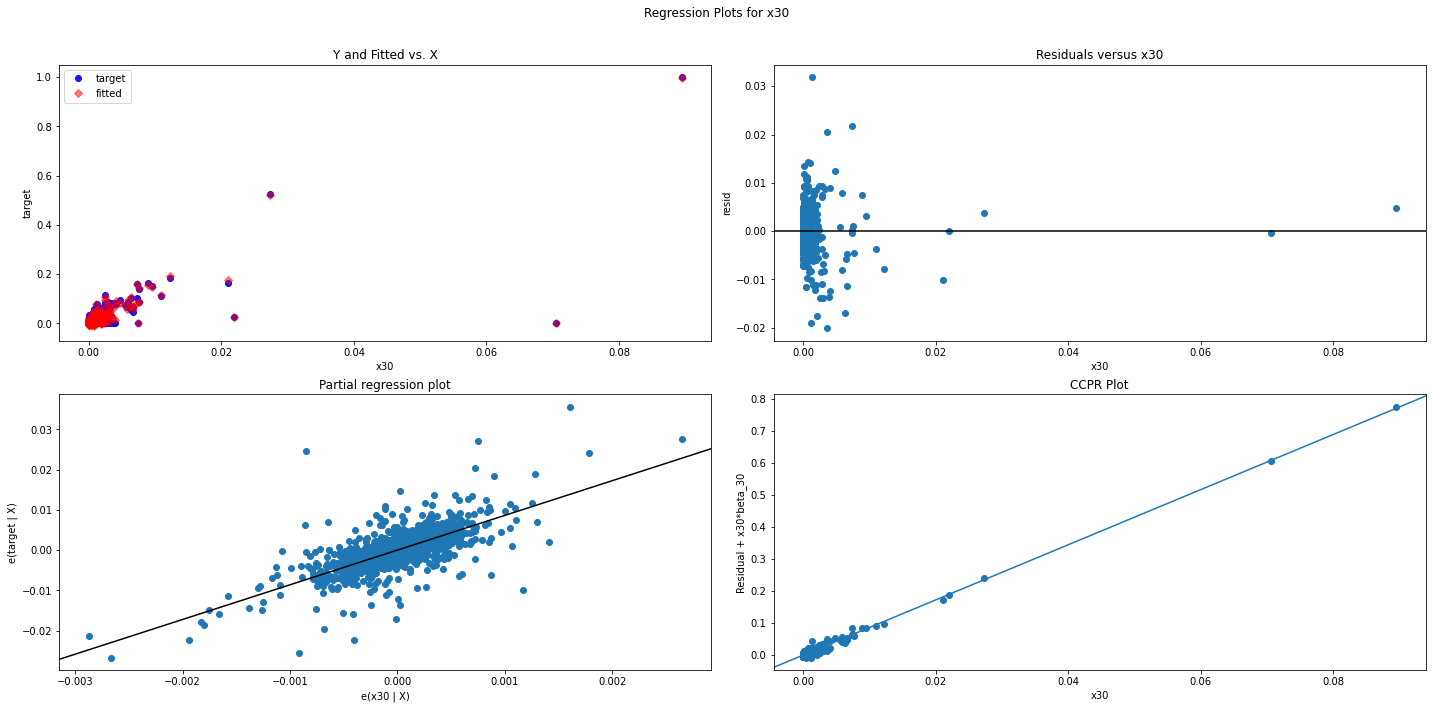

In [ ]:

fig = plt.figure(figsize=(20, 10))

sm.graphics.plot_regress_exog(model,
                              model.pvalues[1:].sort_values(ascending=True).index.values.tolist()[0], fig=fig)

In [ ]:
r = pd.DataFrame({'modelo': ['polinomial'], 'r2':[model.rsquared],
     'mse': [model.mse_model]
  })

results = results.append(r, ignore_index=True)
results

modelo        r2       mse
0  OLS_BestSpecification  0.268884  0.015406
1             polinomial  0.990369  0.003661

En este caso el modelo ajusta mucho mejor que en los modelos anteriores. Sin embargo, la recta parcial de regresión no ajusta del todo bien la nube de puntos de errores.

# Ridge

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha' : [1e-15,1e-10,1e-9,1e-4,1e-3,1e-2,1,5,10,20]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv= 5)
ridge_regressor.fit(X_train[refined_p_value],y_train)

print(ridge_regressor.best_estimator_)

ridge_model = ridge_regressor.best_estimator_
ridge_model.fit(X_train[refined_p_value],y_train)

Ridge(alpha=5)


Ridge(alpha=5)

In [ ]:
y_pred = ridge_model.predict(X_train[refined_p_value])

r2 = ridge_model.score(X_train[refined_p_value],y_train)
mse = mean_squared_error(y_pred,y_train)

r = pd.DataFrame({'modelo': ['Ridge'], 'r2':[r2],
     'mse': [mse]
  })

results = results.append(r, ignore_index=True)
results

modelo        r2       mse
0  OLS_BestSpecification  0.268884  0.015406
1             polinomial  0.990369  0.003661
2                  Ridge  0.221922  0.000821

# Weighted Linear Regression

Dados las distintos metodos investigados sobre que pesos aplicar a una regresion lineal ponderada, se decidio aplicar uno de ellos que consiste en primeramente calcular la regresion lineal simple y usar los errores/residuos de esta como pesos en la weighted linear regression.

In [ ]:
x = X_train[refined_p_value]

x = sm.add_constant(x)

#fit modelo sin pesos
model_reg = sm.OLS(y_train, x).fit()
print(model_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     19.58
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           6.42e-82
Time:                        17:31:15   Log-Likelihood:                 3290.1
No. Observations:                1520   AIC:                            -6522.
Df Residuals:                    1491   BIC:                            -6368.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.01

In [ ]:
# Obtengo los residuos de la regresión lineal.
res_ols = model_reg.resid

# elevo al cuadrado los residuos y calculo la diagonal
C = np.diag(res_ols**2)

#fit linear regression model con los pesos calculados
model_wls = sm.WLS(y_train, x, weights=C.diagonal()).fit()

print(model_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.970
Model:                            WLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1699.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:31:15   Log-Likelihood:                -793.92
No. Observations:                1520   AIC:                             1646.
Df Residuals:                    1491   BIC:                             1800.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -19.54

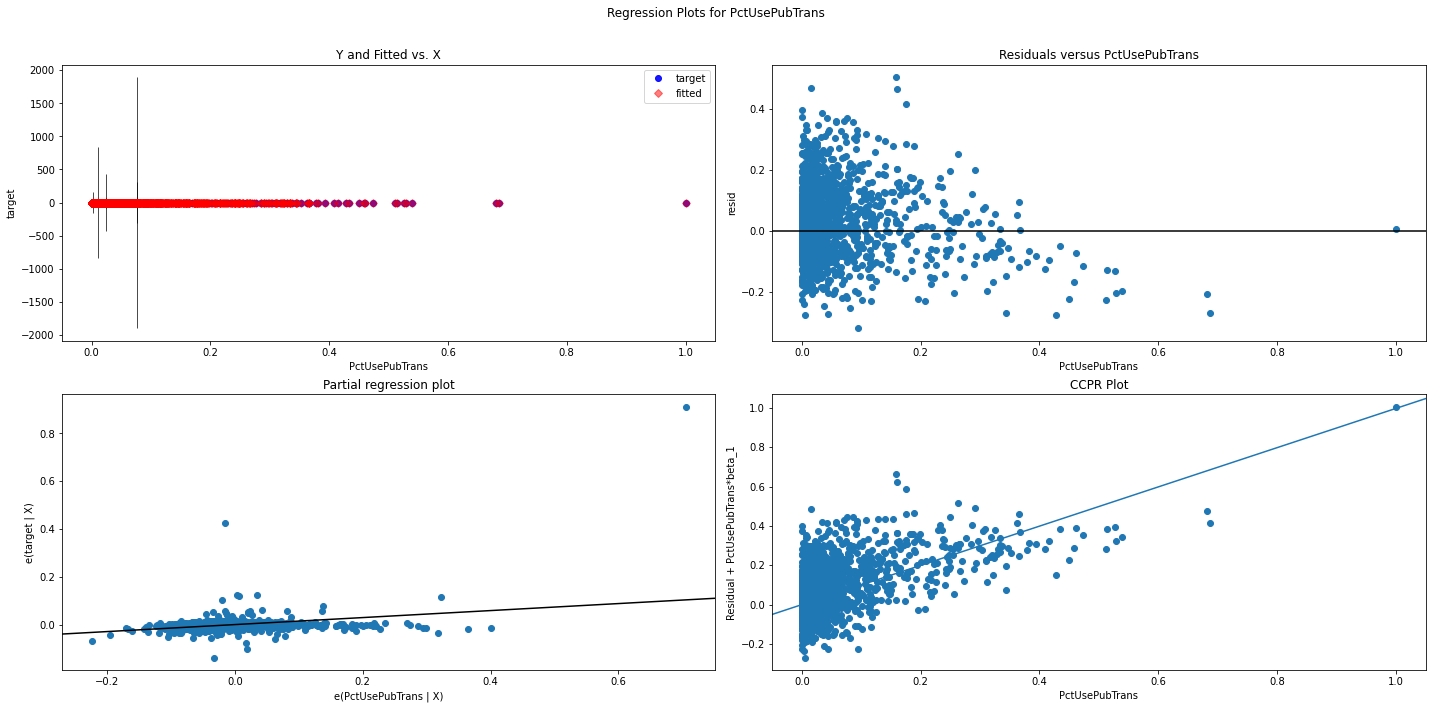

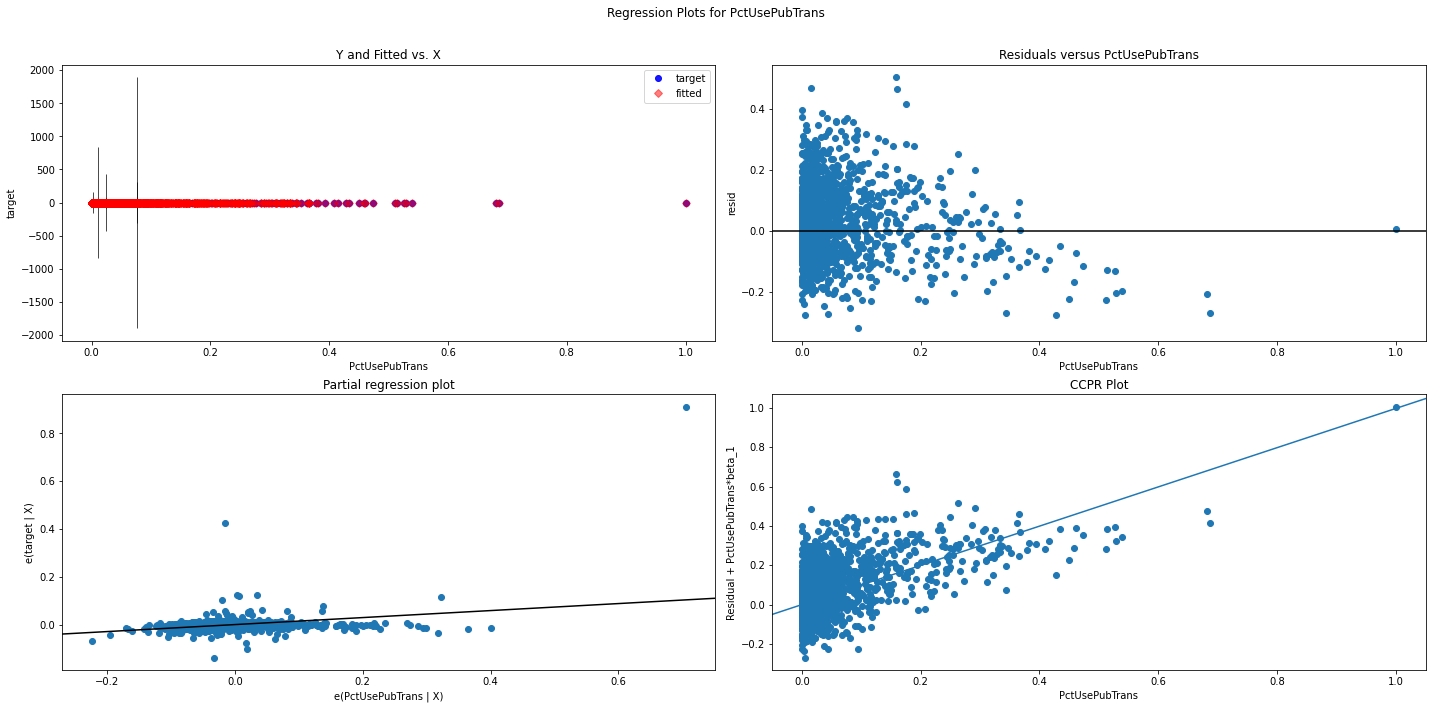

In [ ]:

fig = plt.figure(figsize=(20, 10))

sm.graphics.plot_regress_exog(model_wls,
                              model_wls.pvalues[1:].sort_values(ascending=True).index.values.tolist()[0], fig=fig)

Al aplicar los residuos como pesos en la regreseion ponderada, se obtuvo un R2 significativamente superior que la regresion lineal simple, pasando de un R2 ajustado = 26% al 96%.

Esto se encuentra apoyado a su vez por el análisis de los residuos que se muestra previamente y que ilustra un comportamiento ajustado a la regresión parcial.

In [ ]:
model_wls.pvalues.sort_values()

PctUsePubTrans           1.161606e-214
PctSameCity85             8.944333e-40
agePct12t29               4.541484e-32
LandArea                  2.351674e-30
MedYrHousBuilt            1.939336e-28
fold                      9.863542e-28
MalePctNevMarr            4.028392e-23
OwnOccQrange              4.931957e-21
PctEmploy                 1.078924e-19
PctWorkMom                1.762191e-17
racepctblack              1.534742e-15
PctOccupManu              1.762466e-14
LemasPctOfficDrugUn       7.165830e-12
MedOwnCostPctIncNoMtg     2.347620e-11
PctPersOwnOccup           1.107398e-07
PctEmplManu               3.790653e-07
PersPerOwnOccHous         7.356230e-07
PctHousOwnOcc             4.126488e-06
const                     8.547286e-06
murdPerPop                1.432144e-05
robbbPerPop               1.463858e-05
assaultPerPop             1.465261e-05
ViolentCrimesPerPop       1.465461e-05
rapesPerPop               1.472037e-05
PctTeen2Par               1.145375e-04
HispPerCap               

Basado en el pvalor las features más importantes son:
ctEmplManu, NumInShelters, NumStreet, ViolentCrimesPerPop, pctWWage, NumImmig, PctVacantBoarded, MedOwnCostPctIncNoMtg, PctNotHSGrad         

In [ ]:
r = pd.DataFrame({'modelo': ['wls'], 'r2':[model_wls.rsquared],
     'mse': [model_wls.mse_model]
  })

results = results.append(r, ignore_index=True)
results

modelo        r2       mse
0  OLS_BestSpecification  0.268884  0.015406
1             polinomial  0.990369  0.003661
2                  Ridge  0.221922  0.000821
3                    wls  0.969608  0.007180

# Regresión XG boost

In [ ]:
# !pip install xgboost

In [ ]:
from xgboost import XGBRegressor
from xgboost import DMatrix
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("once")
warnings.warn("deprecated", DeprecationWarning)

x = X_train[refined_p_value]

reg_xgb = XGBRegressor(random_state=0, subsample=0.7)

pipe = Pipeline(steps= [('xgb', reg_xgb)])

# Configuramos los parametros criterion y max_depth para que sean optimizados por el gridsearch
max_depth = [2,4,6,10,12]
learning_rate = [0.001, 0.01, 0.1, 1]
n_estimators = [1, 50, 100, 200]
booster = ['gbtree','gblinear']

params = dict(xgb__max_depth=max_depth,
            xgb__learning_rate =learning_rate,
            xgb__n_estimators = n_estimators,
            xgb__booster = booster
                  )

clf_xgb = GridSearchCV(pipe, param_grid= params, scoring='neg_mean_squared_error',cv=5, return_train_score=True)
clf_xgb.fit(x, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: deprecated
  if __name__ == '__main__':


[17:31:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('xgb', XGBRegressor(subsample=0.7))]),
             param_grid={'xgb__booster': ['gbtree', 'gblinear'],
                         'xgb__learning_rate': [0.001, 0.01, 0.1, 1],
                         'xgb__max_depth': [2, 4, 6, 10, 12],
                         'xgb__n_estimators': [1, 50, 100, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:

best_max_depth = clf_xgb.best_estimator_.get_params()['xgb__max_depth']
print('Mejor Depth:', best_max_depth)

best_lr = clf_xgb.best_estimator_.get_params()['xgb__learning_rate']
print('Mejor Learning_rate:', best_lr)
best_n_estim = clf_xgb.best_estimator_.get_params()['xgb__n_estimators']
print('Mejor n_estimators:', best_n_estim)
print()
print(clf_xgb.best_estimator_.get_params()['xgb'])

df_result_xgb_cv = pd.DataFrame(clf_xgb.cv_results_)
df_result_xgb_cv[(df_result_xgb_cv.param_xgb__learning_rate == best_lr) &
    (df_result_xgb_cv.param_xgb__max_depth == best_max_depth ) &
    (df_result_xgb_cv.param_xgb__n_estimators == best_n_estim)].T

Mejor Depth: 2
Mejor Learning_rate: 0.1
Mejor n_estimators: 200

XGBRegressor(max_depth=2, n_estimators=200, subsample=0.7)


43   \
mean_fit_time                                                       0.29052   
std_fit_time                                                        0.00347   
mean_score_time                                                    0.002572   
std_score_time                                                     0.000058   
param_xgb__booster                                                   gbtree   
param_xgb__learning_rate                                                0.1   
param_xgb__max_depth                                                      2   
param_xgb__n_estimators                                                 200   
params                    {'xgb__booster': 'gbtree', 'xgb__learning_rate...   
split0_test_score                                                 -0.000082   
split1_test_score                                                 -0.000046   
split2_test_score                                                 -0.000044   
split3_test_score                                                 -0.001797   
split4_test_score                                                 -0.000384   
mean_test_score                                                   -0.000471   
std_test_score                                                     0.000675   
rank_test_score                                                           1   
split0_train_score                                                -0.000009   
split1_train_score                                                -0.000009   
split2_train_score                                                -0.000008   
split3_train_score                                                -0.000006   
split4_train_score                                                -0.000008   
mean_train_score                                                  -0.000008   
std_train_score                                                    0.000001   

                                                                        123  
mean_fit_time                                                      0.107758  
std_fit_time                                                       0.006332  
mean_score_time                                                    0.001907  
std_score_time                                                     0.000352  
param_xgb__booster                                                 gblinear  
param_xgb__learning_rate                                                0.1  
param_xgb__max_depth                                                      2  
param_xgb__n_estimators                                                 200  
params                    {'xgb__booster': 'gblinear', 'xgb__learning_ra...  
split0_test_score                                                  -0.00034  
split1_test_score                                                 -0.000191  
split2_test_score                                                 -0.000138  
split3_test_score                                                 -0.003372  
split4_test_score                                                 -0.001153  
mean_test_score                                                   -0.001039  
std_test_score                                                     0.001223  
rank_test_score                                                          31  
split0_train_score                                                -0.001209  
split1_train_score                                                -0.001246  
split2_train_score                                                 -0.00126  
split3_train_score                                                -0.000454  
split4_train_score                                                -0.001006  
mean_train_score                                                  -0.001035  
std_train_score                                                    0.000305

Una vez hecho el grid search, reentrenamos el modelo con los hiperparámetros devueltos de dicha búsqueda.

[17:33:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Train: 99.98
MSE - Train: 2.2533332916662769e-07


<BarContainer object of 28 artists>

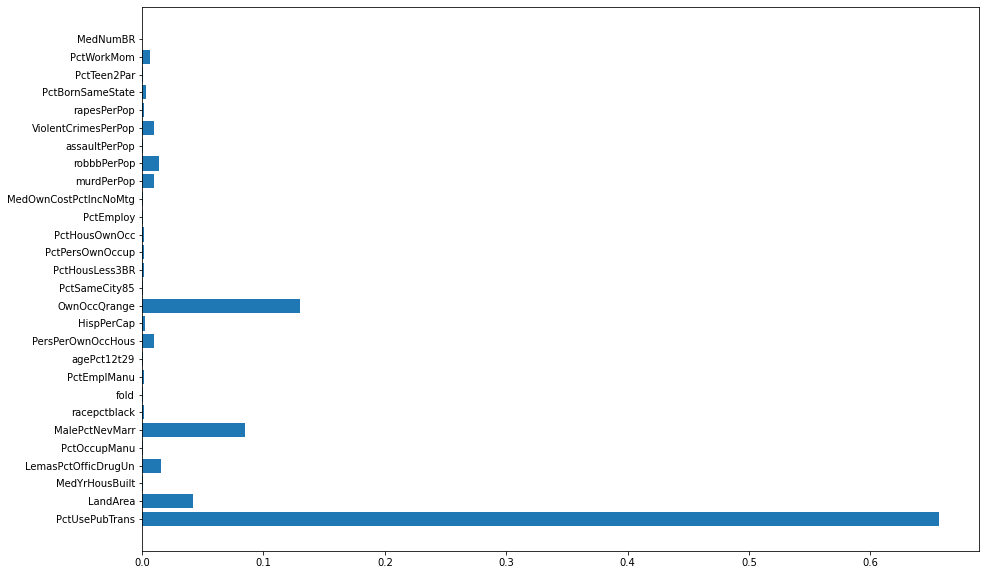

In [ ]:
# Re-entreno todo el modelo
xgb_reg = XGBRegressor( booster='gbtree', colsample_bylevel=1,learning_rate=0.1,
             max_depth=10, n_estimators=200, random_state=0)

xgb_reg.fit(x, y_train)

print("R2 Train: " + str(round((100*xgb_reg.score(x,y_train)),2)))

print("MSE - Train: {}".format(mean_squared_error(xgb_reg.predict(x),y_train)))


plt.figure(figsize=(15,10))
plt.barh(x.columns.values, xgb_reg.feature_importances_)

Una vez generado el modelo, las variables que el mismo interpreta como mas significativas son: PctUsePubTrans, OwnOccQrange, MalePctNevMarr, LandArea y LemasPctOfficDrugUn.

El R2 del modelo es 99.98, dicho valor implica que el modelo ajusta muy bien los datos de entrenamiento.

In [ ]:
r2 = xgb_reg.score(x,y_train)
r = pd.DataFrame({'modelo': ['xgb'],
                'r2':[r2],
              'mse': [mean_squared_error(xgb_reg.predict(x),y_train)]
  })

results = results.append(r, ignore_index=True)
results

modelo        r2           mse
0  OLS_BestSpecification  0.268884  1.540569e-02
1             polinomial  0.990369  3.660850e-03
2                  Ridge  0.221922  8.212103e-04
3                    wls  0.969608  7.180121e-03
4                    xgb  0.999787  2.253333e-07

# Regresión Gradient Boosting

In [ ]:
from sklearn.ensemble import  GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=0)

pipe = Pipeline(steps= [('gbr', gbr)])

# Configuramos los parametros criterion y max_depth para que sean optimizados por el gridsearch
loss = ['squared_error', 'absolute_error','huber','quantile']
learning_rate = [0.001, 0.01, 0.1, 1]
n_estimators = [1, 50, 100, 200]


# Definimos los parametros que va a usar el GridSEarch para buscar el modelo optimo
params = dict(gbr__loss=loss,
            gbr__learning_rate =learning_rate,
            gbr__n_estimators = n_estimators
            )

x = X_train[refined_p_value]

clf_gbr = GridSearchCV(pipe,param_grid= params, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
clf_gbr.fit(x, y_train)
# best_criterion = clf_gbr.best_estimator_.get_params()['gbr__criterion']
# print('Mejor Criterion:',best_criterion )
best_loss = clf_gbr.best_estimator_.get_params()['gbr__loss']
print('Mejor Loss:', best_loss)
best_lr = clf_gbr.best_estimator_.get_params()['gbr__learning_rate']
print('Mejor Learning_rate:', best_lr)
best_n_estim = clf_gbr.best_estimator_.get_params()['gbr__n_estimators']
print('Mejor n_estimators:', best_n_estim)
print()
print(clf_gbr.best_estimator_.get_params()['gbr'])

Mejor Loss: squared_error
Mejor Learning_rate: 0.1
Mejor n_estimators: 200

GradientBoostingRegressor(n_estimators=200, random_state=0)


In [ ]:
df_result_gbr_cv = pd.DataFrame(clf_gbr.cv_results_)
df_result_gbr_cv[(df_result_gbr_cv.param_gbr__learning_rate == best_lr) &
    (df_result_gbr_cv.param_gbr__loss == best_loss ) &
    (df_result_gbr_cv.param_gbr__n_estimators == best_n_estim)].T

35
mean_fit_time                                                      1.731956
std_fit_time                                                       0.010441
mean_score_time                                                    0.003261
std_score_time                                                     0.000116
param_gbr__learning_rate                                                0.1
param_gbr__loss                                               squared_error
param_gbr__n_estimators                                                 200
params                    {'gbr__learning_rate': 0.1, 'gbr__loss': 'squa...
split0_test_score                                                 -0.000123
split1_test_score                                                 -0.000062
split2_test_score                                                 -0.000049
split3_test_score                                                 -0.001084
split4_test_score                                                 -0.000471
mean_test_score                                                   -0.000358
std_test_score                                                     0.000395
rank_test_score                                                           1
split0_train_score                                                -0.000002
split1_train_score                                                -0.000002
split2_train_score                                                -0.000002
split3_train_score                                                -0.000001
split4_train_score                                                -0.000002
mean_train_score                                                  -0.000002
std_train_score                                                         0.0

Luego del grid search, reentrenamos el modelo.

R2 Train: 69.28
MSE - Train: 0.0003242810449214348


<BarContainer object of 28 artists>

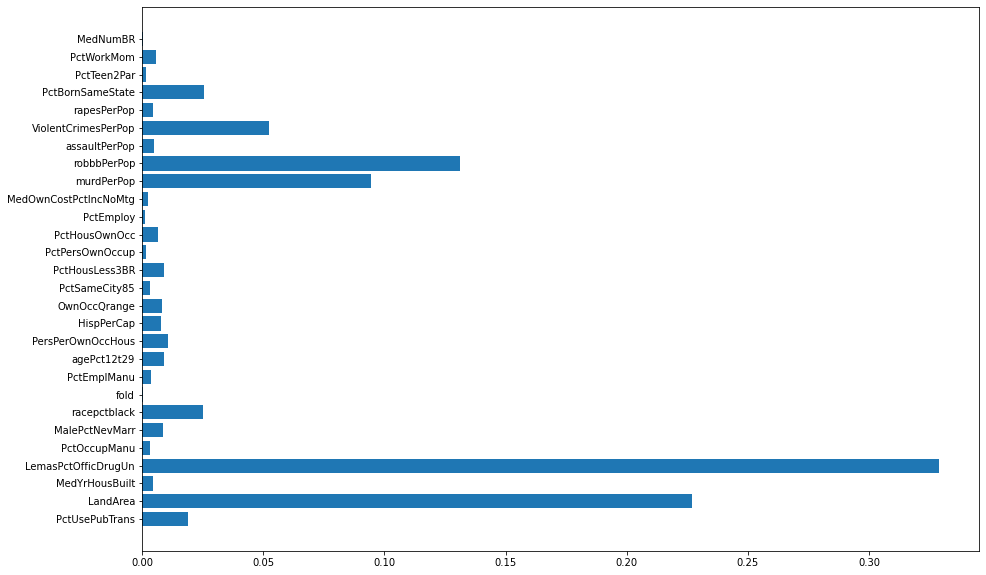

In [ ]:
gbr = GradientBoostingRegressor(learning_rate=0.01, loss='quantile',
                          n_estimators=200, random_state=0)

gbr.fit(x, y_train)

print("R2 Train: " + str(round((100*gbr.score(x,y_train)),2)))

print("MSE - Train: {}".format(mean_squared_error(gbr.predict(x),y_train)))

plt.figure(figsize=(15,10))
plt.barh(x.columns.values, gbr.feature_importances_)

Una vez generado el modelo, las variables que el mismo interpreta como mas significativas son: PctUsePubTrans, OwnOccQrange, MalePctNevMarr, LandArea y LemasPctOfficDrugUn, racepctblack, murederperpop,robperpop, murderperpop, violentcrimesperpop, pctbornsamestate.

El R2 es mas bajo que le antearior, con un valor del 69.28.

In [ ]:
r2 = gbr.score(x,y_train)
r = pd.DataFrame({'modelo': ['GradientBoosting'],
              'r2':r2,
              'mse': [mean_squared_error(gbr.predict(x),y_train)]
  })

results = results.append(r, ignore_index=True)
results

modelo        r2           mse
0  OLS_BestSpecification  0.268884  1.540569e-02
1             polinomial  0.990369  3.660850e-03
2                  Ridge  0.221922  8.212103e-04
3                    wls  0.969608  7.180121e-03
4                    xgb  0.999787  2.253333e-07
5       GradientBoosting  0.692751  3.242810e-04

# Regresión Light GBM

In [ ]:
from lightgbm import LGBMRegressor

import warnings
warnings.simplefilter('ignore')
lgb_reg = LGBMRegressor(random_state=0)

pipe = Pipeline(steps= [('lgbm_reg', lgb_reg)])

# Configuramos los parametros criterion y max_depth para que sean optimizados por el gridsearch
boosting_type  = ['gbdt', 'dart','goss','rf']
max_depth  = [-1] #Significa no limites
learning_rate = [0.001, 0.01, 0.1, 1]
n_estimators = [1, 50, 100, 200]


# Definimos los parametros que va a usar el GridSEarch para buscar el modelo optimo
params = dict(lgbm_reg__boosting_type = boosting_type,
            lgbm_reg__max_depth = max_depth ,
            lgbm_reg__learning_rate =learning_rate,
            lgbm_reg__n_estimators = n_estimators
            )

clf_lgbm = GridSearchCV(pipe,param_grid= params, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
clf_lgbm.fit(x, y_train)


/usr/local/lib/python3.7/dist-packages/lightgbm/__init__.py:30: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/lightgbm/VERSION.txt' mode='r' encoding='UTF-8'>
  __version__ = open(os.path.join(dir_path, 'VERSION.txt')).read().strip()


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('lgbm_reg',
                                        LGBMRegressor(random_state=0))]),
             param_grid={'lgbm_reg__boosting_type': ['gbdt', 'dart', 'goss',
                                                     'rf'],
                         'lgbm_reg__learning_rate': [0.001, 0.01, 0.1, 1],
                         'lgbm_reg__max_depth': [-1],
                         'lgbm_reg__n_estimators': [1, 50, 100, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:

best_boosting_type = clf_lgbm.best_estimator_.get_params()['lgbm_reg__boosting_type']
print('Mejor Boosting Type:',best_boosting_type)
best_max_depth = clf_lgbm.best_estimator_.get_params()['lgbm_reg__max_depth']
print('Mejor max_depth:',best_max_depth )
best_lr = clf_lgbm.best_estimator_.get_params()['lgbm_reg__learning_rate']
print('Mejor Learning_rate:', best_lr)
best_n_estim = clf_lgbm.best_estimator_.get_params()['lgbm_reg__n_estimators']
print('Mejor n_estimators:', best_n_estim)
print()
print(clf_lgbm.best_estimator_.get_params()['lgbm_reg'])


df_result_lgbm_cv = pd.DataFrame(clf_lgbm.cv_results_)
df_result_lgbm_cv[(df_result_lgbm_cv.param_lgbm_reg__boosting_type ==best_boosting_type ) &
    (df_result_lgbm_cv.param_lgbm_reg__learning_rate == best_lr) &
    (df_result_lgbm_cv.param_lgbm_reg__max_depth == best_max_depth ) &
    (df_result_lgbm_cv.param_lgbm_reg__n_estimators == best_n_estim)].T

Mejor Boosting Type: dart
Mejor max_depth: -1
Mejor Learning_rate: 1
Mejor n_estimators: 200

LGBMRegressor(boosting_type='dart', learning_rate=1, n_estimators=200,
              random_state=0)


31
mean_fit_time                                                           1.095386
std_fit_time                                                            0.006113
mean_score_time                                                         0.009796
std_score_time                                                          0.000267
param_lgbm_reg__boosting_type                                               dart
param_lgbm_reg__learning_rate                                                  1
param_lgbm_reg__max_depth                                                     -1
param_lgbm_reg__n_estimators                                                 200
params                         {'lgbm_reg__boosting_type': 'dart', 'lgbm_reg_...
split0_test_score                                                      -0.000161
split1_test_score                                                      -0.000114
split2_test_score                                                      -0.000091
split3_test_score                                                      -0.001982
split4_test_score                                                      -0.000246
mean_test_score                                                        -0.000519
std_test_score                                                          0.000734
rank_test_score                                                                1
split0_train_score                                                     -0.000025
split1_train_score                                                     -0.000022
split2_train_score                                                     -0.000029
split3_train_score                                                     -0.000009
split4_train_score                                                     -0.000031
mean_train_score                                                       -0.000023
std_train_score                                                         0.000008

Luego del gridsearch, reentrenamos el modelo con los mejores hiperparámetros.

R2 Train: 97.92
MSE - Train: 2.1960855785090467e-05


<BarContainer object of 28 artists>

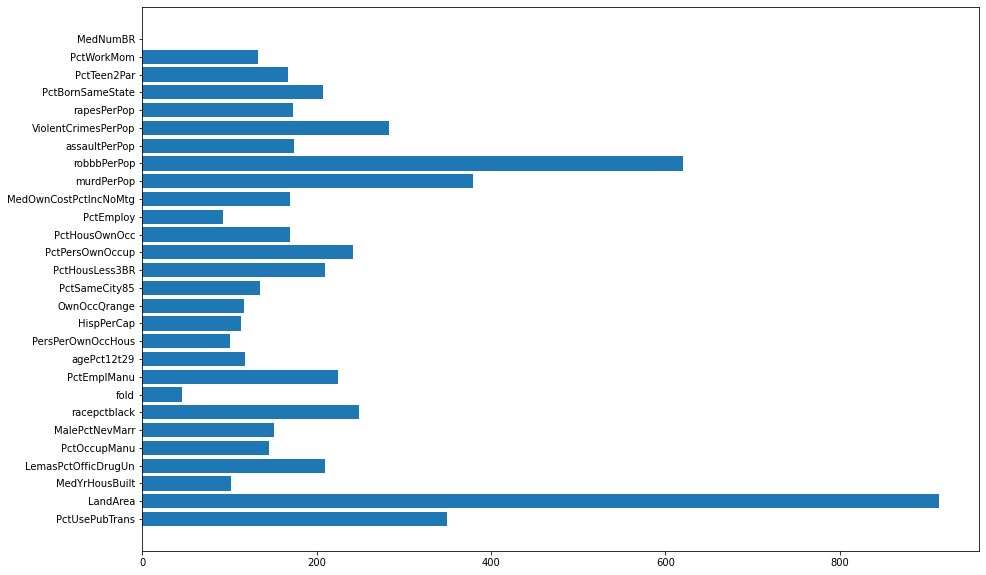

In [ ]:
lgb_reg = LGBMRegressor(boosting_type=best_boosting_type, max_depth=-1,
                        learning_rate=best_lr, n_estimators=best_n_estim,
              random_state=0)
lgb_reg.fit(x, y_train)

print("R2 Train: " + str(round((100*lgb_reg.score(x,y_train)),2)))
print("MSE - Train: {}".format(mean_squared_error(lgb_reg.predict(x),y_train)))

plt.figure(figsize=(15,10))
plt.barh(x.columns.values, lgb_reg.feature_importances_)

Del modelo generado, las variables que identificamos como mas significativas son LandArea, RobPerPop, MurdPerPop, PctUsePubTrans, ViolentCrimesPerPop, Racepctblack, pctpersownoccup y pctEmplManu.

# Conclusiones

A partir de los R2 y los MSE de cada modelo, generamos un DataFrame que resume dichas métricas para facilitar la comparabilidad.

Cabe destacar que para los modelos de regresión lineal (OLS_BestSpecification) tomamos solamente el que tiene una especificación refinada (23 variables basadas en p-valor).

In [ ]:
r2 = lgb_reg.score(x,y_train)
r = pd.DataFrame({'modelo': ['lightGBM'],
                'r2':r2,
              'mse': [mean_squared_error(lgb_reg.predict(x),y_train)]
  })

results = results.append(r, ignore_index=True)
results

modelo        r2           mse
0  OLS_BestSpecification  0.268884  1.540569e-02
1             polinomial  0.990369  3.660850e-03
2                  Ridge  0.221922  8.212103e-04
3                    wls  0.969608  7.180121e-03
4                    xgb  0.999787  2.253333e-07
5       GradientBoosting  0.692751  3.242810e-04
6               lightGBM  0.979193  2.196086e-05

A partir del resumen suministrado previamente, concluimos que el modelo que mejor ajusta la regresión es el XG Boost. Esto se debe a que posee un alto R2 (99,97 %) y a su vez tiene el menor MeanSquaredError.